In [1]:
from library import portfolio, utils, broker_funcs, config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbm.fbm import fbm
# price change is True
# updated weightData and alloc mechanic
assert config.changePrice == True
# print(config.changePrice)

In [2]:
print(config.config)

{'np': <module 'numpy' from '/home/braedyn/anaconda3/envs/mat36/lib/python3.6/site-packages/numpy/__init__.py'>, 'window': 500, 'changePrice': True, 'nportfs': 50, 'minPortfSize': 9, 'maxPortfSize': 12, 'overlapMin': 8, 'overlapMax': 10, 'tinit': 992, 'stockPool': './fbm/fbm100_2_14_july6.txt', 'hurstPool': './fbm/fbm100_2_14_july6_hurstpool.txt'}


In [3]:
traderIDs = portfolio.portfGen()

transactions = pd.DataFrame()
totalOrders = pd.DataFrame()
broker = pd.DataFrame()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
rzhel
Cash:  0.012199985489406928 | $ 1219.998548940693
Optimal Sharpe:  0.3621454893451162
Initial Sharpe:  0.36132901886232976
giqbe
Cash:  0.09801279806662155 | $ 980.1279806662155
Optimal Sharpe:  0.3186522706301807
Initial Sharpe:  0.311816747733844
rlkhz
Cash:  0.020038852380878103 | $ 2003.8852380878102
Optimal Sharpe:  0.3567641052175747
Initial Sharpe:  0.35510798822841627
aebdt
Cash:  0.013205701131141945 | $ 1320.5701131141946
Optimal Sharpe:  0.2892484919857017
Initial Sharpe:  0.2879442984427051
ysuaz
Cash:  0.07037609609587825 | $ 703.7609609587824
Optimal Sharpe:  0.14843048358893274
Initial Sharpe:  0.14299773184117967
qogcb
Cash:  0.1151854556687193 | $ 1151.8545566871

In [4]:
for t in range(993,1000):
    # 50 traders
    broker, totalOrders = broker_funcs.brokerage(traderIDs, t, broker, totalOrders)
    broker, transactions = broker_funcs.instantMatch(traderIDs, broker, transactions)
    print(traderIDs['djqyr'].alloc['cash'])
    print(traderIDs['djqyr'].cash[-1])
    print(traderIDs['djqyr'].value[-1])
    print(t)
    print('\n')

/home/braedyn/Documents/singapore/library/broker_funcs.py:147: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  broker.set_value(sID, 'order', 0)


0.009831570899075878
984.3307826165506
100119.37997711771
993


0.011211343968214842
1122.1794484350355
100093.21376781535
994


0.018167915661562065
1831.0506852817798
100784.85167980724
995


0.012569238346976732
1269.193646131084
100976.17779969636
996


0.006107014626621452
615.1826354534143
100733.7746943875
997


0.006931688721899123
695.7527384504617
100372.76143869333
998


fwkyl  cash allocation negative at  -0.0008448719602319986
0.013620537437288444
1371.5652514154247
100698.32102663886
999




In [17]:
# for i, portf in traderIDs.items():
# #     plt.plot(np.arange(len(portf.value)),portf.value)
# #     plt.plot(np.arange(len(portf.sharpeReal)), portf.sharpeReal, color="blue")
# #     plt.plot(np.arange(len(portf.sharpeOpt)), portf.sharpeOpt, color="green")
# #     plt.plot(np.arange(len(portf.sharpeNonOpt)), portf.sharpeNonOpt, color="red")
#     plt.plot(np.arange(len(portf.value)), portf.value, color="blue")
#     #plt.plot(np.arange(len(portf.cash)), portf.cash, color="red")
#     plt.grid(True)
#     plt.show()
#     print(min(portf.sharpeReal))
# # print(traderIDs['fgzra'].sharpeReal-traderIDs['fgzra'].sharpeNonOpt)

In [6]:
# normSharpes=np.asarray([])
# n = 0
# for i, v in traderIDs.items():
#     normSharpes = np.append(normSharpes,v.sharpeReal/max(v.sharpeReal))
#     n += 1
# plt.hist(normSharpes, bins =100)
# plt.title("Normalized Sharpe Ratios--w/ price Change--No Thresholding")
# plt.xlabel("(sharpe ratios)$_i$/max(sharpe ratio)$_i$ of 50 portfolios over 1000 time steps")
# plt.yscale('log')
# plt.savefig("./results/50_traders_change_price/priceChange_no_thresholding_50_normalized_sharperatios.png")


In [18]:
# stockPool, hurstPool = portfolio.stockChars()

In [19]:
# for i in range(len(stockPool)):
#     plt.plot(np.arange(2**13+1),stockPool[i])
#     plt.show()
#     plt.plot(np.arange(993,1000),hurstPool[i,993:1000])
#     plt.show()

In [20]:
# stockChars = utils.characterize(stockPool,tmax=2000)

In [13]:
Ttransactions = pd.DataFrame()
TtotalOrders = pd.DataFrame()
Tbroker = pd.DataFrame()

for key,portf in traderIDs.items():
    portf.reset(ptile=70)

for t in range(992,2000):
    Tbroker, TtotalOrders = broker_funcs.thresholdBrokerage(traderIDs, t, Tbroker, TtotalOrders)
    Tbroker, Ttransactions = broker_funcs.instantMatch(traderIDs, Tbroker, Ttransactions)
    print(traderIDs['djqyr'].alloc['cash'])
    print(traderIDs['djqyr'].cash[-1])
    print(traderIDs['djqyr'].value[-1])
    print(t)
    print('\n')

Cash:  0.012199985489406928 | $ 1219.998548940693
Optimal Sharpe:  0.3621454893451162
Initial Sharpe:  0.36132901886232976
reset!
threshold:  0.3757849474648792
_____
Cash:  0.09801279806662155 | $ 980.1279806662155
Optimal Sharpe:  0.3186522706301807
Initial Sharpe:  0.311816747733844
reset!
threshold:  0.32486101260335193
_____
Cash:  0.020038852380878103 | $ 2003.8852380878102
Optimal Sharpe:  0.3567641052175747
Initial Sharpe:  0.35510798822841627
reset!
threshold:  0.3666291922188363
_____
Cash:  0.013205701131141945 | $ 1320.5701131141946
Optimal Sharpe:  0.2892484919857017
Initial Sharpe:  0.2879442984427051
reset!
threshold:  0.2898318522021622
_____
Cash:  0.07037609609587825 | $ 703.7609609587824
Optimal Sharpe:  0.14843048358893274
Initial Sharpe:  0.14299773184117967
reset!
threshold:  0.14171954213851246
_____
Cash:  0.1151854556687193 | $ 1151.854556687193
Optimal Sharpe:  0.17215025292376906
Initial Sharpe:  0.16073179538795143
reset!
threshold:  0.15438923924436845
____

Cash:  0.013333577725100909 | $ 1333.3577725100909
Optimal Sharpe:  0.16875850495502645
Initial Sharpe:  0.16765887027093707
reset!
threshold:  0.1760140823843772
_____
rebalance prob:  0.3358210409766018
roll:  0.7413477040887492
rebalance prob:  0.423005487752693
roll:  0.38174623087753645
order sent
rebalance prob:  0.3791263890879075
roll:  0.443261703152668
rebalance prob:  0.49270186845181385
roll:  0.9562541387630756
rebalance prob:  0.5831062223762499
roll:  0.5666293313426605
order sent
rebalance prob:  0.7084868951120523
roll:  0.20865993831303298
order sent
rebalance prob:  0.5731113140621256
roll:  0.07830856141683173
order sent
rebalance prob:  0.6942350955880363
roll:  0.42500593253345464
order sent
rebalance prob:  0.5754497246146447
roll:  0.00877314190749734
order sent
rebalance prob:  0.3641001502558758
roll:  0.39939808770743823
rebalance prob:  0.5401975895504789
roll:  0.6051229041188001
rebalance prob:  0.7548926356098988
roll:  0.41431050635553823
order sent
reba

/home/braedyn/Documents/singapore/library/broker_funcs.py:147: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  broker.set_value(sID, 'order', 0)


0.01057540103567921
1057.6749217812408
100012.7482837639
992


rebalance prob:  0.3539245623811592
roll:  0.07029201224956028
order sent
rebalance prob:  0.4433189828645451
roll:  0.29971771700657923
order sent
rebalance prob:  0.46966423870792007
roll:  0.0636487490892319
order sent
rebalance prob:  0.5572809108489708
roll:  0.2224067290415962
order sent
rebalance prob:  0.5792354311707854
roll:  0.9467182858377311
rebalance prob:  0.6980556602355128
roll:  0.813052119060193
rebalance prob:  0.5689572618899753
roll:  0.06319784970548303
order sent
rebalance prob:  0.7001287197747924
roll:  0.6259809268059133
order sent
rebalance prob:  0.586744485823219
roll:  0.9882331518094013
rebalance prob:  0.40350002247564315
roll:  0.879190718808662
rebalance prob:  0.5251297628022352
roll:  0.5014009090797464
order sent
rebalance prob:  0.7024655275579863
roll:  0.8488048909565413
rebalance prob:  0.4366209674703566
roll:  0.7660410930370642
rebalance prob:  0.31158514068756277
roll:  0.443351

rebalance prob:  0.6639042718878577
roll:  0.7037811378659209
rebalance prob:  0.4328275256705855
roll:  0.9027317272323744
rebalance prob:  0.4339156916642463
roll:  0.944013714997403
rebalance prob:  0.5402287975086103
roll:  0.7205576594743683
rebalance prob:  0.5837873223073252
roll:  0.8476368247020251
rebalance prob:  0.583648448219867
roll:  0.4962138161749011
order sent
rebalance prob:  0.5746631576069521
roll:  0.3395637009007434
order sent
rebalance prob:  0.5916165979449113
roll:  0.18084842323562178
order sent
rebalance prob:  0.6259853138215726
roll:  0.6546477679423938
rebalance prob:  0.49277786071025237
roll:  0.6024218028495014
rebalance prob:  0.3953611457493299
roll:  0.9169683734347844
rebalance prob:  0.5209145146779365
roll:  0.23777237899373393
order sent
rebalance prob:  0.7421719851797768
roll:  0.12421180715928315
order sent
rebalance prob:  0.6066644322601628
roll:  0.9580280909558007
rebalance prob:  0.6157287568959506
roll:  0.9564588580587845
rebalance pro

rebalance prob:  0.2926340739466723
roll:  0.08565157307491389
order sent
rebalance prob:  0.5015057111404196
roll:  0.505626713360785
rebalance prob:  0.527878939769718
roll:  0.08480788666464623
order sent
rebalance prob:  0.5628280007900399
roll:  0.30654360254895374
order sent
rebalance prob:  0.6154925467804165
roll:  0.3082086579859712
order sent
rebalance prob:  0.5175291787005968
roll:  0.5685203072747328
rebalance prob:  0.5542769880829691
roll:  0.874190031643955
rebalance prob:  0.5189263558362794
roll:  0.07095764199174515
order sent
rebalance prob:  0.601125176493579
roll:  0.9354060859163995
rebalance prob:  0.6952558009786404
roll:  0.268820162898313
order sent
rebalance prob:  0.7573294324578851
roll:  0.17298197962617923
order sent
rebalance prob:  0.6915233417924667
roll:  0.8274228607924238
rebalance prob:  0.3395061995675512
roll:  0.6719214778673703
0.013094756105063858
1309.0516905479626
99967.62673890052
997


rebalance prob:  0.537956874631009
roll:  0.812412914

rebalance prob:  0.5730597909544488
roll:  0.38191898880991915
order sent
rebalance prob:  0.3862190553240526
roll:  0.20426459369950223
order sent
rebalance prob:  0.6148712584006709
roll:  0.7204841380759318
rebalance prob:  0.6193315626235557
roll:  0.6127248121001236
order sent
rebalance prob:  0.6420395552389115
roll:  0.5252578924518909
order sent
rebalance prob:  0.7620141732174996
roll:  0.7148797639066249
order sent
rebalance prob:  0.7056300961432062
roll:  0.4663772283233394
order sent
rebalance prob:  0.5984654081476329
roll:  0.25944351571120283
order sent
rebalance prob:  0.27102816998424256
roll:  0.07257230240198254
order sent
rebalance prob:  0.5375623682403939
roll:  0.8397215791430598
rebalance prob:  0.4494957999040121
roll:  0.6874210820064764
rebalance prob:  0.5715138453238513
roll:  0.3175568304607759
order sent
rebalance prob:  0.48420403792146366
roll:  0.24079342279437577
order sent
rebalance prob:  0.5214181509282533
roll:  0.215926442512279
order sent
rebal

rebalance prob:  0.350735313146206
roll:  0.876086900099341
rebalance prob:  0.5926622091328844
roll:  0.2472682402702685
order sent
rebalance prob:  0.5331633995192463
roll:  0.4931825986920372
order sent
rebalance prob:  0.23604201512653739
roll:  0.6436026609365479
rebalance prob:  0.1402576816188417
roll:  0.8214213180451869
rebalance prob:  0.4194780977790258
roll:  0.6608509693879969
rebalance prob:  0.7689045262653187
roll:  0.5840033461615582
order sent
rebalance prob:  0.49613293633671873
roll:  0.8009137143322361
rebalance prob:  0.19336753629909662
roll:  0.20499897255456634
rebalance prob:  0.4796293056470636
roll:  0.28564124652636547
order sent
rebalance prob:  0.364854050945916
roll:  0.4879345989907522
rebalance prob:  0.2714892203341057
roll:  0.9862115692853058
rebalance prob:  0.11919342741505327
roll:  0.1467197813456782
rebalance prob:  0.10772975958785888
roll:  0.3328102662179736
rebalance prob:  0.26563195945160006
roll:  0.41066681093475077
rebalance prob:  0.5

rebalance prob:  0.3656617890282707
roll:  0.04839177474780332
order sent
rebalance prob:  0.3168211410892669
roll:  0.3120289268215334
order sent
rebalance prob:  0.5780217630737675
roll:  0.561416537854634
order sent
rebalance prob:  0.8420609197076468
roll:  0.9620493658390512
rebalance prob:  0.778506021040577
roll:  0.5626961866010494
order sent
rebalance prob:  0.2760735651298323
roll:  0.3042369777077595
0.01451391737657087
1453.4123011413785
100139.21558404027
1004


rebalance prob:  0.502104833727091
roll:  0.3569448248079362
order sent
rebalance prob:  0.6750006629450148
roll:  0.653618917160318
order sent
rebalance prob:  0.1427834111651857
roll:  0.05375256914012794
order sent
rebalance prob:  0.07211816868852373
roll:  0.6690719114108532
rebalance prob:  0.2616181641419593
roll:  0.03889064123196995
order sent
rebalance prob:  0.41625904813160775
roll:  0.3816044542138869
order sent
rebalance prob:  0.1836637586386341
roll:  0.11787093173207064
order sent
rebalance prob:  

rebalance prob:  0.32143688924507774
roll:  0.640516047766652
rebalance prob:  0.41361765249150373
roll:  0.29496410501453474
order sent
rebalance prob:  0.38736192103378947
roll:  0.7020130276921825
rebalance prob:  0.27411675472152197
roll:  0.5878882511166347
rebalance prob:  0.19041861587933467
roll:  0.9965672903088719
rebalance prob:  0.3966040307903468
roll:  0.5928022017828102
rebalance prob:  0.3454804069321895
roll:  0.8816290403325241
rebalance prob:  0.25040994058468796
roll:  0.1773136595635848
order sent
rebalance prob:  0.3223739379487422
roll:  0.44264913892360325
rebalance prob:  0.28171621912863465
roll:  0.4248682785531952
rebalance prob:  0.2475461061211609
roll:  0.7912176111330167
rebalance prob:  0.3338055061561516
roll:  0.6070104779304409
rebalance prob:  0.6130543917937447
roll:  0.5417164396539412
order sent
rebalance prob:  0.5286165560153492
roll:  0.02706284857314578
order sent
rebalance prob:  0.2207704561410665
roll:  0.8663382187656272
rebalance prob:  

rebalance prob:  0.3994200951877168
roll:  0.9400459260667722
rebalance prob:  0.21579455869178338
roll:  0.08855225392693156
order sent
rebalance prob:  0.14583438884094313
roll:  0.8957451362094276
rebalance prob:  0.09985748206824271
roll:  0.3993692524638577
rebalance prob:  0.12339055824551494
roll:  0.0824711762990662
order sent
rebalance prob:  0.20610591999871947
roll:  0.33529314290373746
rebalance prob:  0.32708486438325624
roll:  0.992935881578463
rebalance prob:  0.39396615730071227
roll:  0.07036294846456603
order sent
rebalance prob:  0.405785584673676
roll:  0.8517007547404788
rebalance prob:  0.27824567053683125
roll:  0.07594024314784253
order sent
rebalance prob:  0.3278257491861555
roll:  0.07317975737732207
order sent
rebalance prob:  0.40758206731020047
roll:  0.8901426167003397
rebalance prob:  0.5338702263765762
roll:  0.5943479137822495
rebalance prob:  0.6138572293101664
roll:  0.24600744633624594
order sent
rebalance prob:  0.82128287678252
roll:  0.4104501958

rebalance prob:  0.0629390807646554
roll:  0.1461458438225124
rebalance prob:  0.4837664707570394
roll:  0.8642658638715123
rebalance prob:  0.5723652017626225
roll:  0.21508431892496083
order sent
rebalance prob:  0.308496286785288
roll:  0.5973838880777614
rebalance prob:  0.3838090105462363
roll:  0.3905869499004351
rebalance prob:  0.423306847786775
roll:  0.9239247849722351
rebalance prob:  0.6503146137594047
roll:  0.9749874913601979
rebalance prob:  0.7732408930959579
roll:  0.8167267375694223
rebalance prob:  0.7205859534749212
roll:  0.1560014986623507
order sent
rebalance prob:  0.656958894916838
roll:  0.26928959239271166
order sent
rebalance prob:  0.2596344614781649
roll:  0.46144257078011286
rebalance prob:  0.5749857461637905
roll:  0.6814249123704924
rebalance prob:  0.398274302642276
roll:  0.90397329244348
rebalance prob:  0.27258404184186497
roll:  0.07424256194210721
order sent
rebalance prob:  0.11303858722516817
roll:  0.5890531620661925
rebalance prob:  0.1829803

rebalance prob:  0.753758414561648
roll:  0.18757707642188415
order sent
rebalance prob:  0.6593851142410655
roll:  0.14877196648305813
order sent
rebalance prob:  0.3419369706426462
roll:  0.43862024792588683
rebalance prob:  0.16935161306275442
roll:  0.3142243626630825
rebalance prob:  0.6341927152779548
roll:  0.9335136917829289
rebalance prob:  0.8533407227667483
roll:  0.9255687046625485
rebalance prob:  0.386801973955349
roll:  0.9574311845932738
rebalance prob:  0.13927667772843208
roll:  0.6220211569303326
rebalance prob:  0.3289583841617443
roll:  0.32686146292001894
order sent
rebalance prob:  0.24047257218461351
roll:  0.3593331995036019
rebalance prob:  0.15478895559608435
roll:  0.16384592737831893
rebalance prob:  0.13782296349382003
roll:  0.9427324984064409
rebalance prob:  0.11714093061317914
roll:  0.1669881829688179
rebalance prob:  0.2663071321203288
roll:  0.2583341431495769
order sent
rebalance prob:  0.2848348067674257
roll:  0.1607275503938721
order sent
rebala

rebalance prob:  0.7283127758314724
roll:  0.5223786084388493
order sent
rebalance prob:  0.9143173437540892
roll:  0.8646081133089314
order sent
rebalance prob:  0.8964027251236646
roll:  0.514592692675511
order sent
rebalance prob:  0.4362109908942024
roll:  0.672232645119979
0.020365228261743366
2052.2980598179697
100774.6160976387
1016


rebalance prob:  0.4324860622052424
roll:  0.6094383460444878
rebalance prob:  0.6955061879399212
roll:  0.18459838739506795
order sent
rebalance prob:  0.09332830540257955
roll:  0.22853495861060824
rebalance prob:  0.0678162824118545
roll:  0.4521038427509353
rebalance prob:  0.4148091231309167
roll:  0.14858348424528245
order sent
rebalance prob:  0.5627077701854597
roll:  0.9062740583337343
rebalance prob:  0.33646757266866206
roll:  0.016091364045556333
order sent
rebalance prob:  0.4888010929641259
roll:  0.6120520289323651
rebalance prob:  0.542122071414898
roll:  0.2906674317117587
order sent
rebalance prob:  0.5188974610648072
roll:  0.954

rebalance prob:  0.4112731394008468
roll:  0.9423366250046881
rebalance prob:  0.13858403466441557
roll:  0.8843623974889476
rebalance prob:  0.13784856142895147
roll:  0.1967218615742432
rebalance prob:  0.23637487521269288
roll:  0.07769815981464923
order sent
rebalance prob:  0.2680055770717341
roll:  0.4040586256694231
rebalance prob:  0.3557955951220329
roll:  0.5271299276465843
rebalance prob:  0.41005306309428374
roll:  0.44990188146437604
rebalance prob:  0.30990688329064414
roll:  0.21549820681840126
order sent
rebalance prob:  0.4256699852420602
roll:  0.6769344972648075
rebalance prob:  0.5726092640387241
roll:  0.6506921312138801
rebalance prob:  0.4606839136441639
roll:  0.8078066265154594
rebalance prob:  0.1843814489345517
roll:  0.8041576936479153
rebalance prob:  0.06533941138626077
roll:  0.06425687758487553
order sent
rebalance prob:  0.5803718842625737
roll:  0.08236147553154216
order sent
rebalance prob:  0.9291267108365528
roll:  0.08503141377353296
order sent
reb

rebalance prob:  0.19425008359290744
roll:  0.006215330137874009
order sent
rebalance prob:  0.30929917489523706
roll:  0.4573207670188375
rebalance prob:  0.4079996519576712
roll:  0.4733524460177888
rebalance prob:  0.4323264196002341
roll:  0.7533161994533328
rebalance prob:  0.2831990852687991
roll:  0.45217958463846897
rebalance prob:  0.25898338217499034
roll:  0.9673071742130862
rebalance prob:  0.21439308560067002
roll:  0.8812132853179583
rebalance prob:  0.4128005493953224
roll:  0.42781285312342665
rebalance prob:  0.6200236613705712
roll:  0.6741855551521178
rebalance prob:  0.8909492084652109
roll:  0.8148917211970914
order sent
rebalance prob:  0.8960417197869975
roll:  0.8104530262635493
order sent
rebalance prob:  0.22311566023692486
roll:  0.53942993113626
0.006884928713369599
688.4867591583877
99999.11223792916
1021


rebalance prob:  0.3359756135667575
roll:  0.8934872435419309
rebalance prob:  0.5679687505615243
roll:  0.08711003084860869
order sent
rebalance prob: 

rebalance prob:  0.41863193395398374
roll:  0.2694512639759028
order sent
fwkyl  cash allocation negative at  -0.0011917109315939896
rebalance prob:  0.6988105061864498
roll:  0.5937071054802143
order sent
rebalance prob:  0.6646087766332466
roll:  0.09602573996143349
order sent
rebalance prob:  0.5263730164817686
roll:  0.3450543398955075
order sent
rebalance prob:  0.1310894148058671
roll:  0.7104007591301803
rebalance prob:  0.4216729206632929
roll:  0.025011708610043537
order sent
rebalance prob:  0.2723316257656436
roll:  0.5275266462945185
rebalance prob:  0.45600524489235755
roll:  0.7685494844800156
rebalance prob:  0.1522132284666576
roll:  0.20868029692807388
rebalance prob:  0.135150758902165
roll:  0.53373591495538
rebalance prob:  0.21260953533197607
roll:  0.5440216464146405
rebalance prob:  0.1300821341837894
roll:  0.22470128358899844
rebalance prob:  0.17778804850682367
roll:  0.7568397062175525
rebalance prob:  0.3138827681510731
roll:  0.5319303599900662
rebalance pr

rebalance prob:  0.5896066534363176
roll:  0.35399733386641574
order sent
rebalance prob:  0.9249741529695761
roll:  0.6836615184784494
order sent
rebalance prob:  0.4519849200207845
roll:  0.014581880222412802
order sent
rebalance prob:  0.14195225472796336
roll:  0.9200424830587695
rebalance prob:  0.44543776626201687
roll:  0.7721177187419863
rebalance prob:  0.28052852726968114
roll:  0.8702242701397439
rebalance prob:  0.18716536285987012
roll:  0.768767936314162
rebalance prob:  0.07025556764612176
roll:  0.8676901094610309
rebalance prob:  0.060084325031866316
roll:  0.3573107547479988
rebalance prob:  0.1752643911649209
roll:  0.8076984112307808
rebalance prob:  0.17631372686123137
roll:  0.2871783592130799
rebalance prob:  0.2406747256655361
roll:  0.7731254710593999
rebalance prob:  0.2506106074094269
roll:  0.6406988271398947
rebalance prob:  0.10624874659326082
roll:  0.8313608482213793
rebalance prob:  0.1805016294066561
roll:  0.598786482359497
rebalance prob:  0.14696706

rebalance prob:  0.13725551244174344
roll:  0.7675005668362606
rebalance prob:  0.30071339135871394
roll:  0.29645105722404674
order sent
rebalance prob:  0.025279417964798226
roll:  0.7199125900009439
rebalance prob:  0.055229514952276154
roll:  0.2055355453365415
rebalance prob:  0.39069906424571665
roll:  0.6307040452468903
rebalance prob:  0.5345659447535067
roll:  0.5316642755578266
order sent
rebalance prob:  0.3445025023753972
roll:  0.30928201570508174
order sent
rebalance prob:  0.5511662807808755
roll:  0.3366581424120948
order sent
rebalance prob:  0.6568785681820559
roll:  0.9535137443469228
rebalance prob:  0.4487516072738575
roll:  0.4008235752576327
order sent
rebalance prob:  0.7658205974434084
roll:  0.49151506501570164
order sent
rebalance prob:  0.761855377364721
roll:  0.716519213429042
order sent
rebalance prob:  0.6664789535152906
roll:  0.407048909286169
order sent
rebalance prob:  0.0920667629825395
roll:  0.7592428743338184
rebalance prob:  0.4157264991957742
r

rebalance prob:  0.1912224677525025
roll:  0.028236364572092554
order sent
rebalance prob:  0.34445238441016535
roll:  0.42308400089844467
rebalance prob:  0.18420129302473434
roll:  0.9484685751384057
rebalance prob:  0.28041273927812976
roll:  0.6618628053494231
rebalance prob:  0.5645533384381022
roll:  0.9185275546062212
rebalance prob:  0.506487656333272
roll:  0.7513049752768841
rebalance prob:  0.1519668321182081
roll:  0.10801206001489749
order sent
rebalance prob:  0.07218355485093811
roll:  0.44487116799168747
rebalance prob:  0.5806574460065295
roll:  0.04193497105290289
order sent
rebalance prob:  0.9090212297344814
roll:  0.6055926612983901
order sent
rebalance prob:  0.44304440264853295
roll:  0.0745036569092522
order sent
rebalance prob:  0.15595320803051707
roll:  0.3123893022014387
rebalance prob:  0.3690840586093596
roll:  0.37036887158502163
rebalance prob:  0.31433614708625246
roll:  0.7723764085565955
rebalance prob:  0.19886987535243505
roll:  0.22774473875325807


rebalance prob:  0.10583893644624269
roll:  0.2754707204470538
rebalance prob:  0.11947202568496038
roll:  0.794525581204261
rebalance prob:  0.3585757195852388
roll:  0.16651831846463305
order sent
rebalance prob:  0.6051819699673747
roll:  0.8487075051379819
rebalance prob:  0.9003454395618196
roll:  0.956099120783864
rebalance prob:  0.8797028701101454
roll:  0.0818188217010446
order sent
rebalance prob:  0.23373855002936128
roll:  0.4008970137738699
0.007469030345613751
746.4979381841541
99945.76319033717
1033


rebalance prob:  0.1475399737582125
roll:  0.34182193876648614
rebalance prob:  0.28464918321932564
roll:  0.36901159754226653
rebalance prob:  0.017074870110341832
roll:  0.12929817895084295
rebalance prob:  0.052689311111463515
roll:  0.7653844835423876
rebalance prob:  0.3894107718389539
roll:  0.19993184219743587
order sent
rebalance prob:  0.5463913134629556
roll:  0.7080335499079617
rebalance prob:  0.34724852993801913
roll:  0.6113911923303387
rebalance prob:  0.5270

rebalance prob:  0.2310397288405632
roll:  0.6613135441845934
rebalance prob:  0.09191608963490035
roll:  0.5309388029334315
rebalance prob:  0.09768339050955635
roll:  0.17631572601894807
rebalance prob:  0.16873188015235113
roll:  0.5319411951188001
rebalance prob:  0.06512775296614927
roll:  0.003486666574355035
order sent
vzbfx  cash allocation negative at  -0.003386067369244608
rebalance prob:  0.14265551204413268
roll:  0.8257058883257541
rebalance prob:  0.2928362365623665
roll:  0.24252519260180394
order sent
rebalance prob:  0.15264520637461512
roll:  0.01975402270528448
order sent
rebalance prob:  0.17795322595525886
roll:  0.393045913779843
rebalance prob:  0.678667315529293
roll:  0.9384879943621369
rebalance prob:  0.6941844879622067
roll:  0.35186230250370454
order sent
rebalance prob:  0.25684770453303885
roll:  0.9399620986693399
rebalance prob:  0.08148085395968262
roll:  0.2522136331068171
rebalance prob:  0.5641901282258168
roll:  0.4237352446958208
order sent
rebala

rebalance prob:  0.04312030254715211
roll:  0.8132335191470041
rebalance prob:  0.03941085906148985
roll:  0.7988355798411452
rebalance prob:  0.1524910144812346
roll:  0.15052209964175323
order sent
rebalance prob:  0.15011933640657066
roll:  0.8142132307972028
rebalance prob:  0.20102709826255724
roll:  0.31735703608359
rebalance prob:  0.18254520999886556
roll:  0.1250377780084455
order sent
rebalance prob:  0.04290442022615566
roll:  0.7931551038140169
rebalance prob:  0.08117341875572903
roll:  0.5463762733996894
rebalance prob:  0.0893558418539358
roll:  0.700689385355173
rebalance prob:  0.36660964431618964
roll:  0.07428220716249112
order sent
rebalance prob:  0.6306253235564593
roll:  0.6777617811535096
rebalance prob:  0.9124389814625895
roll:  0.9039616568680415
order sent
rebalance prob:  0.8702244537995696
roll:  0.47167240161383917
order sent
rebalance prob:  0.30573961791862914
roll:  0.36929709399356847
0.018914298710371473
1893.1928676781058
100093.20972815089
1038


r

rebalance prob:  0.4189867771098932
roll:  0.6082436961748922
rebalance prob:  0.6098397226759572
roll:  0.7304851131175557
rebalance prob:  0.6710977467761783
roll:  0.9437315296429959
rebalance prob:  0.8635129789418895
roll:  0.8155879607774982
order sent
rebalance prob:  0.7353860052852752
roll:  0.2531535545316932
order sent
rebalance prob:  0.7997543805258577
roll:  0.865225366315559
rebalance prob:  0.09060114749352421
roll:  0.09168952885158
rebalance prob:  0.3846912682592751
roll:  0.526125853763267
rebalance prob:  0.36848619061491633
roll:  0.40380348178286096
rebalance prob:  0.17311628771744111
roll:  0.9375897645670983
rebalance prob:  0.05579392524625145
roll:  0.9721047748457317
rebalance prob:  0.07756913868549219
roll:  0.5107488941048131
rebalance prob:  0.2502999118330711
roll:  0.4405156356779203
rebalance prob:  0.0627708129053402
roll:  0.6804384218203251
rebalance prob:  0.14513393483098447
roll:  0.13637479754012916
order sent
rebalance prob:  0.23250608818926

rebalance prob:  0.14323961684079922
roll:  0.7634022140863652
rebalance prob:  0.4753462588985818
roll:  0.3360645247069557
order sent
rebalance prob:  0.8630669362141903
roll:  0.6169429497290201
order sent
rebalance prob:  0.48283597930968997
roll:  0.5930423668790865
rebalance prob:  0.06995406641943883
roll:  0.6553390734900554
rebalance prob:  0.3776379464907767
roll:  0.382689694228732
rebalance prob:  0.1311338054362429
roll:  0.5844721333161804
rebalance prob:  0.07653079519564603
roll:  0.38665370071565985
rebalance prob:  0.05234116599016702
roll:  0.6820050287967288
rebalance prob:  0.04870800395322338
roll:  0.4649171236270606
rebalance prob:  0.14241850192283895
roll:  0.3440744715081725
rebalance prob:  0.13024891881533623
roll:  0.813476771526414
rebalance prob:  0.15130558638359876
roll:  0.45984106780946055
rebalance prob:  0.14064210276882047
roll:  0.9107220529408006
rebalance prob:  0.029000833464657545
roll:  0.8846872773397535
rebalance prob:  0.05680597328633512

rebalance prob:  0.05169126811185519
roll:  0.8627642224130081
rebalance prob:  0.09933388786711904
roll:  0.2566574534471291
rebalance prob:  0.00573598841226247
roll:  0.3913353803759494
rebalance prob:  0.01945384380592558
roll:  0.12879115900368854
rebalance prob:  0.37372836702940354
roll:  0.9603357508402928
rebalance prob:  0.5845247564455087
roll:  0.30838408854161037
order sent
rebalance prob:  0.27166861860028946
roll:  0.1696312722885872
order sent
rebalance prob:  0.4122213324328152
roll:  0.012450187288129078
order sent
rebalance prob:  0.6488235708698044
roll:  0.6139284766510862
order sent
rebalance prob:  0.7388046803987174
roll:  0.26439822355241327
order sent
rebalance prob:  0.8978990467194488
roll:  0.9218680945715791
rebalance prob:  0.801137389735706
roll:  0.7156877161987137
order sent
rebalance prob:  0.802241240739502
roll:  0.388098427168982
order sent
rebalance prob:  0.08461091148506639
roll:  0.29889932133170594
rebalance prob:  0.2947969001670652
roll:  0.

rebalance prob:  0.1492229420719999
roll:  0.4410354541177445
rebalance prob:  0.22265076212360174
roll:  0.3184542569251302
rebalance prob:  0.07490829946328649
roll:  0.6382475940371929
rebalance prob:  0.1003549796800959
roll:  0.07544683028757715
order sent
rebalance prob:  0.7638772030439241
roll:  0.8638345932560089
rebalance prob:  0.7777485528026363
roll:  0.13187731584532658
order sent
rebalance prob:  0.2553255999979374
roll:  0.30626913381994847
rebalance prob:  0.05958128403607599
roll:  0.31632939703145324
rebalance prob:  0.2695239973161034
roll:  0.13654534711819055
order sent
rebalance prob:  0.8196053520851552
roll:  0.5533624613829551
order sent
rebalance prob:  0.5590558175616301
roll:  0.7726598049404916
rebalance prob:  0.037732068560659575
roll:  0.20681653832538327
rebalance prob:  0.4161748737626653
roll:  0.3051040707540097
order sent
rebalance prob:  0.1261478910903647
roll:  0.8260719116964893
rebalance prob:  0.06137014363737814
roll:  0.01596899640833127
or

rebalance prob:  0.5505839400981597
roll:  0.6461197390396176
rebalance prob:  0.8342635123937393
roll:  0.4557716614110783
order sent
rebalance prob:  0.7744329143872584
roll:  0.724941947038052
order sent
rebalance prob:  0.3167473587410743
roll:  0.012572308380429331
order sent
0.019273540404706312
1931.19502907045
100199.28817016311
1050


rebalance prob:  0.0456537661610307
roll:  0.20619296163598255
rebalance prob:  0.09127190913733245
roll:  0.3545265007948486
rebalance prob:  0.0034345684260585958
roll:  0.7966810671975378
rebalance prob:  0.009855089994223102
roll:  0.3227523061431117
rebalance prob:  0.3785282498919506
roll:  0.004962942685591831
order sent
rebalance prob:  0.5600411650564018
roll:  0.5797227224602283
rebalance prob:  0.35766955127000427
roll:  0.25760440844447297
order sent
rebalance prob:  0.506215560147868
roll:  0.9707466946051084
rebalance prob:  0.6593539396632372
roll:  0.553414008020961
order sent
rebalance prob:  0.5888357055673065
roll:  0.742866094

rebalance prob:  0.21619678732717126
roll:  0.22173928503346285
rebalance prob:  0.22111039790807346
roll:  0.25189933202302983
rebalance prob:  0.04133312579081295
roll:  0.9528921395556478
rebalance prob:  0.026213192626589662
roll:  0.3593211111729421
rebalance prob:  0.17244217073633442
roll:  0.647926773343907
rebalance prob:  0.06048670296955897
roll:  0.29374543536637987
rebalance prob:  0.1900424703931838
roll:  0.7849333210886533
rebalance prob:  0.268301491803531
roll:  0.6330714700367988
rebalance prob:  0.0830704298636566
roll:  0.012330299209802331
order sent
rebalance prob:  0.0918453758832432
roll:  0.13002102532693316
rebalance prob:  0.5938907953433818
roll:  0.352962156951918
order sent
rebalance prob:  0.6336721891314867
roll:  0.1696989011522928
order sent
rebalance prob:  0.15147790212479242
roll:  0.6349244120304847
rebalance prob:  0.06718299704911875
roll:  0.5304589660673392
rebalance prob:  0.31346386718004166
roll:  0.3006609326599965
order sent
rebalance pro

rebalance prob:  0.10061906626289793
roll:  0.9567362489880847
rebalance prob:  0.0987112446119337
roll:  0.9531949582895852
rebalance prob:  0.08998831939689736
roll:  0.5720398250403433
rebalance prob:  0.0155503635837821
roll:  0.01622907426142861
rebalance prob:  0.03437000378020959
roll:  0.5453832574067176
rebalance prob:  0.08874607446205993
roll:  0.5355991577297714
rebalance prob:  0.5077784520182234
roll:  0.39078393504372255
order sent
rebalance prob:  0.5035044597440314
roll:  0.2937639401179841
order sent
rebalance prob:  0.7618789570389568
roll:  0.8998624900978052
rebalance prob:  0.69827685901807
roll:  0.983194868179086
rebalance prob:  0.34232314209261544
roll:  0.005475436000010214
order sent
0.017925558068315552
1801.4202380253162
100494.51354094406
1055


rebalance prob:  0.030316913309203285
roll:  0.4385421344440331
rebalance prob:  0.04084497378970278
roll:  0.0069253005450363725
order sent
rebalance prob:  0.0012361574265022728
roll:  0.28139698670285984
rebala

rebalance prob:  0.8298937436685152
roll:  0.6010508221356382
order sent
rebalance prob:  0.9213760647084316
roll:  0.4584723286693281
order sent
rebalance prob:  0.9030255574424018
roll:  0.9141103645110144
rebalance prob:  0.10051964926963974
roll:  0.5035556392551653
rebalance prob:  0.2222110408115615
roll:  0.27724308956991317
rebalance prob:  0.2210887841906025
roll:  0.8685474779799546
rebalance prob:  0.2112640106734631
roll:  0.0914276262779371
order sent
rebalance prob:  0.03461438545054406
roll:  0.3562840817224182
rebalance prob:  0.017732530593766217
roll:  0.9237229383065081
rebalance prob:  0.13947933842382315
roll:  0.8951883353453084
rebalance prob:  0.03305451808292652
roll:  0.610699434689368
rebalance prob:  0.13639295295643575
roll:  0.0347535665207509
order sent
rebalance prob:  0.2332744180707257
roll:  0.8791987009024129
rebalance prob:  0.0578235099640357
roll:  0.7641173628672733
rebalance prob:  0.06173519683308272
roll:  0.12501233758795582
rebalance prob:  

rebalance prob:  0.007807235997192628
roll:  0.2917755866681434
rebalance prob:  0.44497754688615915
roll:  0.4448852270296557
order sent
rebalance prob:  0.08418277664232039
roll:  0.5026425054149911
rebalance prob:  0.04905483476257594
roll:  0.35580767274185177
rebalance prob:  0.023862524021985305
roll:  0.5231467014997024
rebalance prob:  0.03613942380475949
roll:  0.5459452969505637
rebalance prob:  0.11088610786128152
roll:  0.7578124669375815
rebalance prob:  0.07969187736890308
roll:  0.5902119413214472
rebalance prob:  0.0841839111281967
roll:  0.021414259029304827
order sent
rebalance prob:  0.06820384919735038
roll:  0.11078372686882865
rebalance prob:  0.008051856195996736
roll:  0.1270641504833422
rebalance prob:  0.0244544578611128
roll:  0.9660264299283793
rebalance prob:  0.08848441201654475
roll:  0.807521087785575
rebalance prob:  0.6560946457812429
roll:  0.07243258385529006
order sent
rebalance prob:  0.3645690031946609
roll:  0.9397537409520552
rebalance prob:  0.

rebalance prob:  0.0006863810686327593
roll:  0.5331275599632155
rebalance prob:  0.004869056246518991
roll:  0.5073936676725044
rebalance prob:  0.3033993842605328
roll:  0.15309101775449208
order sent
rebalance prob:  0.5116505310622501
roll:  0.002220816296758743
order sent
rebalance prob:  0.5537047144428531
roll:  0.6374382020906493
rebalance prob:  0.650507611897315
roll:  0.4124384747267167
order sent
rebalance prob:  0.5844826946033573
roll:  0.31396577087781563
order sent
rebalance prob:  0.28031686575274295
roll:  0.7577591946317926
rebalance prob:  0.7556576859987723
roll:  0.9879071054384844
rebalance prob:  0.9306617144367809
roll:  0.7135490401966922
order sent
rebalance prob:  0.9227096115164249
roll:  0.9231024915523265
rebalance prob:  0.14403212376097113
roll:  0.6875537490380665
rebalance prob:  0.21345082428438472
roll:  0.8217125425827129
rebalance prob:  0.2838274353398841
roll:  0.3205118641120803
rebalance prob:  0.2986873405543104
roll:  0.5209135229103892
reba

rebalance prob:  0.28499352584198984
roll:  0.9430297505955336
rebalance prob:  0.4011901905654377
roll:  0.21088225793178095
order sent
rebalance prob:  0.06412565235993267
roll:  0.15105718086681807
rebalance prob:  0.14040922912562112
roll:  0.2352963110105265
rebalance prob:  0.37627978369502424
roll:  0.4245936927618714
rebalance prob:  0.7623251942675606
roll:  0.13232137952080814
order sent
rebalance prob:  0.33376594349071614
roll:  0.2958894954707123
order sent
rebalance prob:  0.004565707405668905
roll:  0.17396445330130939
rebalance prob:  0.4682681643711734
roll:  0.5104283921971653
rebalance prob:  0.1264472613452642
roll:  0.3588306900823156
rebalance prob:  0.09275012829417534
roll:  0.6268528006238351
rebalance prob:  0.022407910339053327
roll:  0.4769508081157552
rebalance prob:  0.015515773147222928
roll:  0.5157237964841646
rebalance prob:  0.09402658738854011
roll:  0.21503572904954082
rebalance prob:  0.08765290009428703
roll:  0.6691206620462266
rebalance prob:  0

rebalance prob:  0.5053277518348797
roll:  0.701053044901962
0.014226721357467756
1442.1786485808575
101371.11793672986
1067


rebalance prob:  0.012923564786993236
roll:  0.516005608267247
rebalance prob:  0.026973775144645457
roll:  0.8944716928375684
rebalance prob:  0.0006534983960511869
roll:  0.3379478403392282
rebalance prob:  0.0043760161540742784
roll:  0.5300008323209576
rebalance prob:  0.3101886833390797
roll:  0.2562872848995914
order sent
rebalance prob:  0.46109935337345453
roll:  0.300739053114479
order sent
rebalance prob:  0.6165940698829385
roll:  0.37307171234555325
order sent
rebalance prob:  0.7128999400068807
roll:  0.59591443743544
order sent
rebalance prob:  0.5322685108305754
roll:  0.0625382988501908
order sent
rebalance prob:  0.19269972463256818
roll:  0.15745311733971123
order sent
fwkyl  cash allocation negative at  -0.003589159659136066
rebalance prob:  0.7108557935044417
roll:  0.3416823704151821
order sent
rebalance prob:  0.957950714484779
roll:  0.89

rebalance prob:  0.025428254324822108
roll:  0.9077979914003481
rebalance prob:  0.15863472874431053
roll:  0.9992632965495649
rebalance prob:  0.3528330400941748
roll:  0.23828865681853617
order sent
rebalance prob:  0.09311539110037893
roll:  0.970874687755689
rebalance prob:  0.0362834801496172
roll:  0.5156483660922748
rebalance prob:  0.18235203411282933
roll:  0.8620872296144636
rebalance prob:  0.22902714043680128
roll:  0.187544524235723
order sent
rebalance prob:  0.033803226364827466
roll:  0.19774983956982417
rebalance prob:  0.11132341519881077
roll:  0.7591042574303319
rebalance prob:  0.5120269437992726
roll:  0.6445319078365244
rebalance prob:  0.8480926330023125
roll:  0.5156176903490322
order sent
rebalance prob:  0.30381611709196565
roll:  0.1388499324982384
order sent
rebalance prob:  0.003049067625779395
roll:  0.9216522318735426
rebalance prob:  0.5364118694262451
roll:  0.2834581935987308
order sent
rebalance prob:  0.12286797293021177
roll:  0.8310090598757904
re

rebalance prob:  0.006916653820581636
roll:  0.0663670612677778
rebalance prob:  0.0236207818444212
roll:  0.9209085873309207
rebalance prob:  0.6957058870098504
roll:  0.09999119520334787
order sent
rebalance prob:  0.21059829378856076
roll:  0.831527469453091
rebalance prob:  0.6665746465486643
roll:  0.4209551783933697
order sent
rebalance prob:  0.8934705362409225
roll:  0.5044321789194339
order sent
rebalance prob:  0.5576049497911644
roll:  0.4926437290728777
order sent
0.009659062095602773
980.7915095309812
101541.0709469898
1072


rebalance prob:  0.01643851655259052
roll:  0.5236758136093569
rebalance prob:  0.042129299168160945
roll:  0.28613519155646494
rebalance prob:  0.0005517131205202612
roll:  0.7621253759601611
rebalance prob:  0.003798644967108037
roll:  0.3117571599700574
rebalance prob:  0.44303954934647743
roll:  0.8955014455619469
rebalance prob:  0.5134767229953455
roll:  0.12953113004554795
order sent
rebalance prob:  0.6501976620622647
roll:  0.6272416976315834

rebalance prob:  0.3413163646237551
roll:  0.11302027965015038
order sent
rebalance prob:  0.020664058319474994
roll:  0.6708654405189811
rebalance prob:  0.0028597752207818097
roll:  0.7005309214703614
rebalance prob:  0.03197628597831747
roll:  0.12392518213330606
rebalance prob:  0.04516825957958866
roll:  0.7969473285358952
rebalance prob:  0.21434610985045788
roll:  0.752798272877219
rebalance prob:  0.3187810150896821
roll:  0.7574950897241369
rebalance prob:  0.08317136435881706
roll:  0.4127015444083759
rebalance prob:  0.022383428740149206
roll:  0.33064727968962215
rebalance prob:  0.1584695809355879
roll:  0.11891095999675705
order sent
rebalance prob:  0.22236523640665146
roll:  0.8863525706107004
rebalance prob:  0.02494258118205133
roll:  0.2485896328458701
rebalance prob:  0.1264043888801453
roll:  0.2631463094793882
rebalance prob:  0.6629994418438624
roll:  0.258131684489727
order sent
rebalance prob:  0.8715674883802446
roll:  0.8389016257708928
order sent
rebalance p

rebalance prob:  0.18536558552863766
roll:  0.6670109685707255
rebalance prob:  0.15273097888594137
roll:  0.6298859296221502
rebalance prob:  0.23054710131851272
roll:  0.08168900846119176
order sent
rebalance prob:  0.1127028379087101
roll:  0.278781110793473
rebalance prob:  0.011980494848893495
roll:  0.7706494376771719
rebalance prob:  0.0049994122189705986
roll:  0.48895675938464733
rebalance prob:  0.02548430064347084
roll:  0.7112271064694026
rebalance prob:  0.7096419199611531
roll:  0.8847089459620826
rebalance prob:  0.17288557969511767
roll:  0.21194776346575994
rebalance prob:  0.5921521342771529
roll:  0.9425504846102102
rebalance prob:  0.8609229004137511
roll:  0.6096941020531901
order sent
rebalance prob:  0.4773578119598756
roll:  0.7957578938593385
0.011189620495740528
1136.7172074219739
101586.75245998555
1077


rebalance prob:  0.014478689021434168
roll:  0.4965825194496467
rebalance prob:  0.03950344684624001
roll:  0.5125418790267323
rebalance prob:  0.0007791283

rebalance prob:  0.9413116262689681
roll:  0.8167470103279235
order sent
rebalance prob:  0.9504453647439213
roll:  0.13819675558997702
order sent
rebalance prob:  0.0623720672360536
roll:  0.3578688537512106
rebalance prob:  0.19700781556174546
roll:  0.899646258794596
rebalance prob:  0.5970341321011685
roll:  0.49299792340434456
order sent
rebalance prob:  0.2481406047324426
roll:  0.9994120858883723
rebalance prob:  0.014427838828726895
roll:  0.10234006754525327
rebalance prob:  0.002998826810434856
roll:  0.8263469834682826
rebalance prob:  0.01952226778399421
roll:  0.29695399623409213
rebalance prob:  0.02946725908975561
roll:  0.03816686436603167
rebalance prob:  0.15635553739183627
roll:  0.5087010875501756
rebalance prob:  0.3655777918951471
roll:  0.49084672576571176
rebalance prob:  0.0723244758953178
roll:  0.12693749417419975
rebalance prob:  0.01930097726360478
roll:  0.18902834371256916
rebalance prob:  0.1380467282562097
roll:  0.1809626183685642
rebalance prob:  0.18

rebalance prob:  0.011378077446648422
roll:  0.37130362824265795
rebalance prob:  0.008225499754266723
roll:  0.8074918220346812
rebalance prob:  0.184956478710795
roll:  0.9720696608907219
rebalance prob:  0.1545354440501719
roll:  0.47826172429677294
rebalance prob:  0.2516697254884343
roll:  0.8762125512237507
rebalance prob:  0.11876979760577355
roll:  0.9958770105410464
rebalance prob:  0.008678065074916435
roll:  0.8165250872965375
rebalance prob:  0.0034588828429337986
roll:  0.5444668031841663
rebalance prob:  0.016721300350700682
roll:  0.48197749990809957
rebalance prob:  0.7218097547561957
roll:  0.4722614328576391
order sent
rebalance prob:  0.20521368884520408
roll:  0.595732351197864
rebalance prob:  0.5399880714549988
roll:  0.8108887616547336
rebalance prob:  0.8507448695733472
roll:  0.13929121657819898
order sent
rebalance prob:  0.3980954170301436
roll:  0.6189339619713513
0.011189620495740528
1136.7172074219739
101586.75245998555
1082


rebalance prob:  0.0103507191

rebalance prob:  0.22228528498335046
roll:  0.6048585539791039
rebalance prob:  0.7130959408559362
roll:  0.14801021794851632
order sent
rebalance prob:  0.9479864386082365
roll:  0.7277652636861064
order sent
rebalance prob:  0.9634236103525055
roll:  0.7792737481800036
order sent
rebalance prob:  0.048787297662614665
roll:  0.9161564456612873
rebalance prob:  0.21073666090293972
roll:  0.4893172155835436
rebalance prob:  0.5361943001301451
roll:  0.5955798507520415
rebalance prob:  0.2510884426846041
roll:  0.4304830274965221
rebalance prob:  0.019030347098984945
roll:  0.38214142947503715
rebalance prob:  0.004690987693417273
roll:  0.9631154607637877
rebalance prob:  0.0127000091187048
roll:  0.3142553702872666
rebalance prob:  0.016399910722140306
roll:  0.11412104979758741
rebalance prob:  0.1415774948583823
roll:  0.17685064093138747
rebalance prob:  0.3674112280942434
roll:  0.893025732583272
rebalance prob:  0.053654505816411416
roll:  0.4240650657677746
rebalance prob:  0.017

rebalance prob:  0.0034314092948715025
roll:  0.9763282474869637
rebalance prob:  0.2564416610000084
roll:  0.2170585301667305
order sent
rebalance prob:  0.10827440658457181
roll:  0.4950097006592614
rebalance prob:  0.06032944952039514
roll:  0.7789158856690969
rebalance prob:  0.011665227902367886
roll:  0.8050200176307342
rebalance prob:  0.008115755334764831
roll:  0.5886242767198525
rebalance prob:  0.181217439105463
roll:  0.6121063403047187
rebalance prob:  0.15258563904365774
roll:  0.07900184370908092
order sent
rebalance prob:  0.22944145106044683
roll:  0.8284877395326852
rebalance prob:  0.11871650139446287
roll:  0.3713205790759505
rebalance prob:  0.006146133858399629
roll:  0.7200504373523838
rebalance prob:  0.003112973973362927
roll:  0.9393786377928987
rebalance prob:  0.01489707978960132
roll:  0.2818968210512395
rebalance prob:  0.6870488650118253
roll:  0.9017103948183893
rebalance prob:  0.24229182025163948
roll:  0.6351765896317728
rebalance prob:  0.64317960024

rebalance prob:  0.000768317995351334
roll:  0.39899933720676917
rebalance prob:  0.00546824740321999
roll:  0.6196754694245074
rebalance prob:  0.5132570663165688
roll:  0.5488915330341626
rebalance prob:  0.4231193060373837
roll:  0.939300091484719
rebalance prob:  0.4188767901691518
roll:  0.3388485121328766
order sent
rebalance prob:  0.6540782221652193
roll:  0.05679768243584671
order sent
rebalance prob:  0.7488678902559488
roll:  0.6192017014799734
order sent
rebalance prob:  0.28690192641826484
roll:  0.557856441343959
rebalance prob:  0.6693056679785634
roll:  0.33648742625050776
order sent
rebalance prob:  0.9354362253218619
roll:  0.21072068536962507
order sent
rebalance prob:  0.9594761013844658
roll:  0.05463064975083731
order sent
rebalance prob:  0.056337663830247554
roll:  0.916593713691473
rebalance prob:  0.26437048632134186
roll:  0.13218959566154775
order sent
rebalance prob:  0.5111755056528859
roll:  0.0355319801319951
order sent
rebalance prob:  0.224437265442593

rebalance prob:  0.2727547948696662
roll:  0.21198583684108496
order sent
rebalance prob:  0.2747747183788114
roll:  0.7984369206334287
rebalance prob:  0.030904426558563843
roll:  0.07213025289516106
rebalance prob:  0.11589020244845825
roll:  0.21054087599584215
rebalance prob:  0.673100767090532
roll:  0.9227301311523034
rebalance prob:  0.806528381432925
roll:  0.09514838796771108
order sent
rebalance prob:  0.06015711691271868
roll:  0.6697334403793272
rebalance prob:  0.003922856970315839
roll:  0.16186992718731574
rebalance prob:  0.25884462883632625
roll:  0.097130802436449
order sent
rebalance prob:  0.14766391899013764
roll:  0.8118739196875978
rebalance prob:  0.07198649502832745
roll:  0.6932644748389878
rebalance prob:  0.01809864779887042
roll:  0.9389203620132832
rebalance prob:  0.006179090253516887
roll:  0.8042806189484046
rebalance prob:  0.24887089427659617
roll:  0.4700122653824069
rebalance prob:  0.24651502213136095
roll:  0.36264493991666025
rebalance prob:  0.3

rebalance prob:  0.6101163692129102
roll:  0.44859121423821735
order sent
0.01139686996404599
1169.6307956733317
102627.37044146308
1094


rebalance prob:  0.013161113141263931
roll:  0.19401988350644261
rebalance prob:  0.06255401063721105
roll:  0.49495019417239505
rebalance prob:  0.0009513008552817532
roll:  0.5449060391856346
rebalance prob:  0.00434550838417595
roll:  0.6049299706832864
rebalance prob:  0.5114803246167636
roll:  0.3680671110234003
order sent
rebalance prob:  0.4132514816407089
roll:  0.8101865607647799
rebalance prob:  0.3597111048200108
roll:  0.5842912880597534
rebalance prob:  0.6183386441139009
roll:  0.04654931828236197
order sent
rebalance prob:  0.8499854449336753
roll:  0.0025080155943416615
order sent
rebalance prob:  0.4096676528224625
roll:  0.6237131981460505
rebalance prob:  0.7221159645433275
roll:  0.9921070684736417
rebalance prob:  0.9495238319106241
roll:  0.302895120975081
order sent
rebalance prob:  0.9630006345708257
roll:  0.0840223184098944

rebalance prob:  0.007230376098143972
roll:  0.17871622709181245
rebalance prob:  0.00983480998955205
roll:  0.9964804829650633
rebalance prob:  0.030906034291371943
roll:  0.4998273542788414
rebalance prob:  0.12328625816446255
roll:  0.9762209629337825
rebalance prob:  0.33330220210594086
roll:  0.8292231519306151
rebalance prob:  0.03134140500702652
roll:  0.20611538221201364
rebalance prob:  0.011337600356810295
roll:  0.5139986871608699
rebalance prob:  0.2730781113823951
roll:  0.09597394272649062
order sent
rebalance prob:  0.33401227548086293
roll:  0.21824288902411115
order sent
rebalance prob:  0.03702205977754483
roll:  0.7562336006182939
rebalance prob:  0.12228222443578758
roll:  0.9577364870183572
rebalance prob:  0.6295917579981503
roll:  0.9442740852657546
rebalance prob:  0.7867915970020946
roll:  0.18052598952908017
order sent
rebalance prob:  0.09079413753327996
roll:  0.35199180784101725
rebalance prob:  0.003507547475363572
roll:  0.41476932108715103
rebalance prob

rebalance prob:  0.1523213911547656
roll:  0.18648173517721645
rebalance prob:  0.01154236263915051
roll:  0.11440592316320775
rebalance prob:  0.0023158878616077647
roll:  0.45620615627582484
rebalance prob:  0.01765629526675168
roll:  0.8887072062094155
rebalance prob:  0.6797659535258301
roll:  0.3512504254115002
order sent
rebalance prob:  0.148736651655726
roll:  0.9032545765983869
rebalance prob:  0.54786761796352
roll:  0.26435708131713176
order sent
rebalance prob:  0.8052517061640823
roll:  0.3497067270218286
order sent
rebalance prob:  0.570607456567557
roll:  0.8519990417541753
0.012428779745616814
1280.7951746717763
103050.75807007257
1099


rebalance prob:  0.007520073606918015
roll:  0.8243487649755267
rebalance prob:  0.03310845287433359
roll:  0.852772152505991
rebalance prob:  0.0004788206586550926
roll:  0.015359808094910332
rebalance prob:  0.0021987424910611154
roll:  0.1062050158597464
rebalance prob:  0.42361467654794277
roll:  0.8162365118101669
rebalance prob:  

rebalance prob:  0.024919572209796008
roll:  0.8478203401968003
rebalance prob:  0.18682466809477852
roll:  0.18913477984194993
rebalance prob:  0.7655937707376108
roll:  0.9278282807390671
rebalance prob:  0.2683761558211095
roll:  0.5380906541160665
rebalance prob:  0.026387007173479027
roll:  0.5363754291253438
rebalance prob:  0.00661765218416044
roll:  0.36675538734772695
rebalance prob:  0.006613236601678485
roll:  0.289902185166762
rebalance prob:  0.020531626333082628
roll:  0.261798293976241
rebalance prob:  0.09210484469764504
roll:  0.6556207936679258
rebalance prob:  0.2253596547750076
roll:  0.6796625495564651
rebalance prob:  0.010643552668708816
roll:  0.5738133196341991
rebalance prob:  0.005777692568786289
roll:  0.8303429219005476
rebalance prob:  0.2601605416955134
roll:  0.06394818379581668
order sent
rebalance prob:  0.3381106488403145
roll:  0.506733481261959
rebalance prob:  0.035101301733198274
roll:  0.48853056034320297
rebalance prob:  0.09254376187297968
roll

rebalance prob:  0.002757919176066316
roll:  0.5313628629357247
rebalance prob:  0.40740983163530214
roll:  0.05785157869790214
order sent
rebalance prob:  0.23725436620917661
roll:  0.021909249238440842
order sent
rebalance prob:  0.2732883929455811
roll:  0.08229100996179528
order sent
rebalance prob:  0.08208007937564375
roll:  0.4830526040800469
rebalance prob:  0.005924457615917469
roll:  0.8781855727206719
rebalance prob:  0.0010516596786304643
roll:  0.5231071752275397
rebalance prob:  0.013231584495151523
roll:  0.871331669275368
rebalance prob:  0.6212172779376504
roll:  0.6657911025417091
rebalance prob:  0.14770383547850782
roll:  0.12572815626487444
order sent
rebalance prob:  0.5971438429198767
roll:  0.8215704169698366
rebalance prob:  0.8624288482687106
roll:  0.07356320745634415
order sent
rebalance prob:  0.4429570334304636
roll:  0.5664713397959587
0.008813099162432517
906.3338559093723
102839.4029392963
1104


rebalance prob:  0.0055177941221690036
roll:  0.237868175

rebalance prob:  0.4580595802511778
roll:  0.9835536138602654
rebalance prob:  0.7942251876876594
roll:  0.8626768551940639
rebalance prob:  0.9525939061127018
roll:  0.5293585850997432
order sent
rebalance prob:  0.9587868778355871
roll:  0.06030813989311645
order sent
rebalance prob:  0.016504138500040712
roll:  0.6443754344037622
rebalance prob:  0.19387496934359374
roll:  0.5081153336476628
rebalance prob:  0.7843128957695116
roll:  0.7392296956805442
order sent
rebalance prob:  0.3168357004080114
roll:  0.3679118325271451
rebalance prob:  0.03783616636041643
roll:  0.8605912575153154
rebalance prob:  0.010628588366996618
roll:  0.07292401608211696
rebalance prob:  0.004381838353200876
roll:  0.61582053278232
rebalance prob:  0.012548400935785381
roll:  0.5747149319351292
rebalance prob:  0.0658704608802389
roll:  0.32212086210096136
rebalance prob:  0.2253152968134989
roll:  0.2129014424435166
order sent
rebalance prob:  0.00845045245153463
roll:  0.7428691536992672
rebalance prob

rebalance prob:  0.00519439583921259
roll:  0.18990798182471147
rebalance prob:  0.26202018473885935
roll:  0.1448490956702323
order sent
rebalance prob:  0.08662377204441661
roll:  0.4869679032103219
rebalance prob:  0.04682730720996134
roll:  0.20289204712599662
rebalance prob:  0.006574263852216029
roll:  0.1675012642520889
rebalance prob:  0.0037432931439318044
roll:  0.6754487825873776
rebalance prob:  0.3437652016471494
roll:  0.08379242005879972
order sent
rebalance prob:  0.2456847001815437
roll:  0.9206518115219668
rebalance prob:  0.27444173197127036
roll:  0.5216785006569018
rebalance prob:  0.11944187717586022
roll:  0.77219618396467
rebalance prob:  0.007322306655837061
roll:  0.33415043150639057
rebalance prob:  0.0008795147568329547
roll:  0.2951195759955917
rebalance prob:  0.01500385764257969
roll:  0.6452011323039075
rebalance prob:  0.6109663383751669
roll:  0.2289688489822852
order sent
rebalance prob:  0.14649004040015937
roll:  0.6341687327231724
rebalance prob:  

rebalance prob:  0.000608240395875659
roll:  0.8740252352242769
rebalance prob:  0.0023873714721009786
roll:  0.5367988440792995
rebalance prob:  0.2838937993665386
roll:  0.10017082099831454
order sent
rebalance prob:  0.22782616230427397
roll:  0.5695178116595272
rebalance prob:  0.23043052502801376
roll:  0.4222640157072701
rebalance prob:  0.654338212685062
roll:  0.07553878616585763
order sent
rebalance prob:  0.939285482220193
roll:  0.09374687559952
order sent
rebalance prob:  0.5545199076357216
roll:  0.163165516201761
order sent
rebalance prob:  0.8189694384738443
roll:  0.30350334786398414
order sent
rebalance prob:  0.9464036510194329
roll:  0.6094469374215747
order sent
rebalance prob:  0.9495304083036243
roll:  0.31453879948751806
order sent
rebalance prob:  0.010412636926397979
roll:  0.34396609302825876
rebalance prob:  0.21258054415093877
roll:  0.24415280856218113
rebalance prob:  0.8030077155092507
roll:  0.07919602440103879
order sent
rebalance prob:  0.3060718297363

rebalance prob:  0.007861470648870158
roll:  0.3518361432592265
rebalance prob:  0.3311458382023578
roll:  0.496773378394316
rebalance prob:  0.4403815089599539
roll:  0.9443387798972991
rebalance prob:  0.0532901295493078
roll:  0.9243710733297488
rebalance prob:  0.07460533993787909
roll:  0.25643743829320376
rebalance prob:  0.34650219188562503
roll:  0.455483885224084
rebalance prob:  0.5727505312014893
roll:  0.08715148925043992
order sent
rebalance prob:  0.05691040780222164
roll:  0.9677741256713799
rebalance prob:  0.0031614993684213875
roll:  0.22396936645640753
rebalance prob:  0.26453909780658447
roll:  0.32796970455483343
rebalance prob:  0.08005970925944454
roll:  0.8690381409690998
rebalance prob:  0.035174589029638506
roll:  0.35867834661534403
rebalance prob:  0.006865518822637584
roll:  0.31785136852072515
rebalance prob:  0.002066629594008965
roll:  0.6002624320131292
rebalance prob:  0.4319408486241159
roll:  0.6230625550144395
rebalance prob:  0.21809122103224654
ro

rebalance prob:  0.7246562255315674
roll:  0.16840451616301566
order sent
rebalance prob:  0.37493663540145866
roll:  0.8343475993616051
0.006012993426946813
614.4513269459876
102187.26070651709
1116


rebalance prob:  0.004749695572685925
roll:  0.6378940727951985
rebalance prob:  0.017643423215089014
roll:  0.4054965868466657
rebalance prob:  0.0004828884822461743
roll:  0.9736191820609869
rebalance prob:  0.001804842363673177
roll:  0.0789947833314194
rebalance prob:  0.3610022752790345
roll:  0.36415240049084596
rebalance prob:  0.28628760548755744
roll:  0.17890637710088797
order sent
rebalance prob:  0.26245094064799007
roll:  0.3592346109930139
rebalance prob:  0.6242182237811496
roll:  0.9923355429990164
rebalance prob:  0.9373851591970294
roll:  0.2114536315754102
order sent
rebalance prob:  0.6576088424857754
roll:  0.5950500566787192
order sent
rebalance prob:  0.7387916834053267
roll:  0.19436310614743246
order sent
rebalance prob:  0.8924624360712464
roll:  0.4060762188361

rebalance prob:  0.017299352166064125
roll:  0.77956306962206
rebalance prob:  0.04232223046242191
roll:  0.04424255293014512
rebalance prob:  0.20339973334254566
roll:  0.23262899617169963
rebalance prob:  0.015372878364671478
roll:  0.5026878697909912
rebalance prob:  0.01003208696835306
roll:  0.766469757598965
rebalance prob:  0.2910381654764006
roll:  0.2729847847862722
order sent
rebalance prob:  0.433336775872187
roll:  0.878309325408232
rebalance prob:  0.055279034521571825
roll:  0.7985054669651118
rebalance prob:  0.11643708697360394
roll:  0.8591459747943411
rebalance prob:  0.3411472267000391
roll:  0.9421482518776891
rebalance prob:  0.511833582045553
roll:  0.26268823010400444
order sent
rebalance prob:  0.08831161798191578
roll:  0.4876902833120146
rebalance prob:  0.0037115822227212366
roll:  0.7053904743164894
rebalance prob:  0.22416632766280917
roll:  0.6414501362545597
rebalance prob:  0.09358902029397036
roll:  0.387776593397987
rebalance prob:  0.03882186677026054

rebalance prob:  0.0012904833954230867
roll:  0.3239295107638688
rebalance prob:  0.026172514455032814
roll:  0.48874123555062177
rebalance prob:  0.7630239030277162
roll:  0.4108873999911078
order sent
rebalance prob:  0.2075565014035429
roll:  0.7352333256093467
rebalance prob:  0.4896381906258145
roll:  0.6931102182292185
rebalance prob:  0.6631652189566504
roll:  0.6696117600804574
rebalance prob:  0.5772032780436545
roll:  0.0619452538188896
order sent
0.014066782254197474
1462.4713782717622
103966.3052888564
1121


rebalance prob:  0.004027057444977764
roll:  0.5373577638572858
rebalance prob:  0.01466341535238295
roll:  0.7933733003819876
rebalance prob:  0.0004989365775386399
roll:  0.45650760286839653
rebalance prob:  0.002908123980771268
roll:  0.25123893783830165
rebalance prob:  0.47536921641816365
roll:  0.42632026838203996
order sent
rebalance prob:  0.4608170626193644
roll:  0.928723488238721
rebalance prob:  0.3864027784605733
roll:  0.42407275869428573
rebalance prob: 

rebalance prob:  0.40328390190011526
roll:  0.49038975252828243
rebalance prob:  0.7726911914790343
roll:  0.7806700062955954
rebalance prob:  0.31836452058138687
roll:  0.6367995554272744
rebalance prob:  0.0464651524971002
roll:  0.9642668647790534
rebalance prob:  0.011074503930409528
roll:  0.8844079325026453
rebalance prob:  0.003950909202151941
roll:  0.6283653356925323
rebalance prob:  0.020230274152658788
roll:  0.4885554927934378
rebalance prob:  0.06210750287389064
roll:  0.9289561015828651
rebalance prob:  0.3675939385953171
roll:  0.6600469348918262
rebalance prob:  0.03179635005114633
roll:  0.3051339031195228
rebalance prob:  0.012676455590633262
roll:  0.12494676235897517
rebalance prob:  0.171901571269794
roll:  0.6231327927406712
rebalance prob:  0.2471011330925503
roll:  0.5755920637172053
rebalance prob:  0.027863566101375487
roll:  0.003948537567062149
order sent
rebalance prob:  0.11097609766364465
roll:  0.25811052958673353
rebalance prob:  0.3646477847495297
roll

rebalance prob:  0.0037860959639336926
roll:  0.5179326515387391
rebalance prob:  0.5452187389739803
roll:  0.6374885337080882
rebalance prob:  0.1904252389156888
roll:  0.14820802162759306
order sent
rebalance prob:  0.1937709766463502
roll:  0.27599382821762686
rebalance prob:  0.05260429168835434
roll:  0.9744076481191356
rebalance prob:  0.005505520739925748
roll:  0.5306629916720819
rebalance prob:  0.0009686212707203463
roll:  0.7988429667390756
rebalance prob:  0.021057483996830925
roll:  0.7573381798804847
rebalance prob:  0.7753835918308386
roll:  0.5259775831224077
order sent
rebalance prob:  0.08843277041565324
roll:  0.5450747707721052
rebalance prob:  0.3133719743916088
roll:  0.904759841200113
rebalance prob:  0.6869320419192755
roll:  0.03214743199080128
order sent
rebalance prob:  0.69125820552531
roll:  0.7647285175627312
0.00345859768752914
358.7739097018617
103733.92401073793
1126


rebalance prob:  0.00320683077425923
roll:  0.7641227950032804
rebalance prob:  0.012

rebalance prob:  0.9364576302733628
roll:  0.7364045043567755
order sent
rebalance prob:  0.39672567734901515
roll:  0.601426791122054
rebalance prob:  0.5753656226751725
roll:  0.3531052636735985
order sent
rebalance prob:  0.949852626155093
roll:  0.6597366790292069
order sent
rebalance prob:  0.9399416662162665
roll:  0.31024403189438043
order sent
rebalance prob:  0.026655412134414757
roll:  0.3554578097401413
rebalance prob:  0.515199839342888
roll:  0.921629372359391
rebalance prob:  0.7689867806562456
roll:  0.37800309982462643
order sent
rebalance prob:  0.4818507844617488
roll:  0.6217404222905005
rebalance prob:  0.07462359182431112
roll:  0.8876248000811726
rebalance prob:  0.012518769455973184
roll:  0.7719567817677475
rebalance prob:  0.002205821667831519
roll:  0.11703489433584058
rebalance prob:  0.016358115706062947
roll:  0.6482773102314737
rebalance prob:  0.044066869028010096
roll:  0.6721817405652728
rebalance prob:  0.32504474630840013
roll:  0.1639954501814973
ord

rebalance prob:  0.006185984883404328
roll:  0.7665629555830024
rebalance prob:  0.5005184157326383
roll:  0.796597335326232
rebalance prob:  0.33603968586618155
roll:  0.9034561096210348
rebalance prob:  0.1419705096278151
roll:  0.025553553354756176
order sent
rebalance prob:  0.04260257269840759
roll:  0.6499389836957918
rebalance prob:  0.0054571848609450985
roll:  0.5842256590555597
rebalance prob:  0.32534316117013606
roll:  0.7913523384677624
rebalance prob:  0.05565643100316703
roll:  0.47565655918629135
rebalance prob:  0.07212229950462759
roll:  0.7906355067583127
rebalance prob:  0.025644362821505076
roll:  0.9476550554086831
rebalance prob:  0.0036177144975363513
roll:  0.7184093565433624
rebalance prob:  0.001038565924960878
roll:  0.04316355539562822
rebalance prob:  0.029713934719179807
roll:  0.6767726351954878
rebalance prob:  0.8407513921976919
roll:  0.7902127578328596
order sent
rebalance prob:  0.14088468078771996
roll:  0.4837802438114427
rebalance prob:  0.311954

rebalance prob:  0.60866330118847
roll:  0.12144744554984943
order sent
rebalance prob:  0.5160249661925791
roll:  0.8447835858274305
rebalance prob:  0.8185574669704835
roll:  0.48962777173572314
order sent
rebalance prob:  0.9430719977664273
roll:  0.36740464036921405
order sent
rebalance prob:  0.34128111171475517
roll:  0.09379195605816548
order sent
rebalance prob:  0.5133332314275671
roll:  0.40889231982829144
order sent
rebalance prob:  0.9110963234520857
roll:  0.4447547674745884
order sent
rebalance prob:  0.9017660971295017
roll:  0.8461567963941723
order sent
rebalance prob:  0.013654880068612997
roll:  0.6875172401469472
rebalance prob:  0.5590498058016389
roll:  0.2885804268833687
order sent
rebalance prob:  0.8106368872968249
roll:  0.20031346923642046
order sent
rebalance prob:  0.43940829207694415
roll:  0.23333770528252973
order sent
rebalance prob:  0.09363584163224603
roll:  0.5683048370800005
rebalance prob:  0.021698585472766024
roll:  0.20711310877667743
rebalance

rebalance prob:  0.051073952412162
roll:  0.9343500112378296
rebalance prob:  0.21332771925072072
roll:  0.28529627275149716
rebalance prob:  0.4131432588866957
roll:  0.26801040938303755
order sent
rebalance prob:  0.48630947056555746
roll:  0.6698561564078264
rebalance prob:  0.14344398540784148
roll:  0.7484042793291786
rebalance prob:  0.011060753455391767
roll:  0.21861257244851773
rebalance prob:  0.5277778515179834
roll:  0.32162815853571547
order sent
rebalance prob:  0.40801319622012994
roll:  0.03616220286383176
order sent
rebalance prob:  0.16416656151917608
roll:  0.9299045135168709
rebalance prob:  0.08150174955046562
roll:  0.27136105960073
rebalance prob:  0.010013511618767245
roll:  0.3234410294519393
rebalance prob:  0.6422786211922914
roll:  0.6281932710310273
order sent
rebalance prob:  0.10853404156044721
roll:  0.9954465301040811
rebalance prob:  0.10840842888730877
roll:  0.13239898261984795
rebalance prob:  0.020225802607436894
roll:  0.25463460340257926
rebalanc

rebalance prob:  0.8119853981295643
roll:  0.5886802059455746
order sent
0.012812364044413493
1335.2277237245924
104214.00134245987
1138


rebalance prob:  0.0019062450034447959
roll:  0.5788942270439726
rebalance prob:  0.008634838789556863
roll:  0.8573780407886668
rebalance prob:  0.0008730930563800586
roll:  0.753613722890245
rebalance prob:  0.01427824058006702
roll:  0.4748280643351457
rebalance prob:  0.6550690999712911
roll:  0.7087103679805065
rebalance prob:  0.6739893022264886
roll:  0.04236197516993678
order sent
rebalance prob:  0.4763582474120102
roll:  0.817404360484113
rebalance prob:  0.8550988581962041
roll:  0.8727475416243448
rebalance prob:  0.9714477563799334
roll:  0.34605151435351433
order sent
rebalance prob:  0.35697378433645643
roll:  0.06822845625676122
order sent
rebalance prob:  0.4907464785687784
roll:  0.40061203082315944
order sent
rebalance prob:  0.8950602260503472
roll:  0.4707422745702621
order sent
rebalance prob:  0.9193861115963742
roll:  0.23224

rebalance prob:  0.04743755268555954
roll:  0.9038595111091752
rebalance prob:  0.003578806361947243
roll:  0.46859790121141764
rebalance prob:  0.006012398143390929
roll:  0.7161831862063104
rebalance prob:  0.01705645465702666
roll:  0.7795029134496849
rebalance prob:  0.3420144481322699
roll:  0.2508369215684625
order sent
rebalance prob:  0.061738799434510716
roll:  0.0055640486720358595
order sent
rebalance prob:  0.011553634049547998
roll:  0.7675406049758886
rebalance prob:  0.11734445843334992
roll:  0.9604206394677199
rebalance prob:  0.28058217133823127
roll:  0.8601169162665674
rebalance prob:  0.048359873310814844
roll:  0.5284696958595174
rebalance prob:  0.2863997928364132
roll:  0.14082763298916057
order sent
rebalance prob:  0.4349816296128774
roll:  0.00893986114508738
order sent
rebalance prob:  0.45628377981157653
roll:  0.5267979726548413
rebalance prob:  0.1940573578687404
roll:  0.4602739550726609
rebalance prob:  0.01105292977768605
roll:  0.5542664264560545
reba

rebalance prob:  0.09511593102184915
roll:  0.8460117173183617
rebalance prob:  0.07775814203311131
roll:  0.8594690333479312
rebalance prob:  0.022350576425454315
roll:  0.08862762839113436
rebalance prob:  0.002896530680831316
roll:  0.41284398317018867
rebalance prob:  0.0014722590730847068
roll:  0.026167079581211228
rebalance prob:  0.04322466743258471
roll:  0.5700058982087074
rebalance prob:  0.821986817630324
roll:  0.4937194780773744
order sent
rebalance prob:  0.055766658295182216
roll:  0.042519828644675295
order sent
rebalance prob:  0.20180828076550297
roll:  0.577988245788755
rebalance prob:  0.6831277575781084
roll:  0.26969427599923235
order sent
rebalance prob:  0.8886516867879819
roll:  0.4308021984238499
order sent
0.010997861627118162
1152.3976972291732
104783.79673259656
1143


rebalance prob:  0.0019978100313720448
roll:  0.6792591798217131
rebalance prob:  0.011188802333841006
roll:  0.9402483760228467
rebalance prob:  0.0010027631486758436
roll:  0.5831731809943

rebalance prob:  0.8794608254770994
roll:  0.5716601878171018
order sent
rebalance prob:  0.9006656800925263
roll:  0.41238790246648716
order sent
rebalance prob:  0.015025805595420019
roll:  0.3633113600533566
rebalance prob:  0.5706129619475506
roll:  0.7728720529227695
rebalance prob:  0.8603135918934423
roll:  0.4235281271294241
order sent
rebalance prob:  0.29515004698397607
roll:  0.13549788269992846
order sent
rebalance prob:  0.09329550941912901
roll:  0.1015362095297353
rebalance prob:  0.06763783488431298
roll:  0.8042524776370517
rebalance prob:  0.0021356976363771122
roll:  0.7113084274085619
rebalance prob:  0.004356812209652603
roll:  0.5225353352563663
rebalance prob:  0.009449814752629538
roll:  0.13852084853831192
rebalance prob:  0.29500355007232676
roll:  0.6881460365957036
rebalance prob:  0.07543852682858958
roll:  0.9450777406754803
rebalance prob:  0.008909951863403388
roll:  0.7353023449925623
rebalance prob:  0.10574994726306405
roll:  0.9850629396091074
rebala

rebalance prob:  0.015642565877233595
roll:  0.07848630995457817
rebalance prob:  0.28257166817703083
roll:  0.6001411355463792
rebalance prob:  0.24391233269910761
roll:  0.8009271667797931
rebalance prob:  0.10771806148644297
roll:  0.2570477248388783
rebalance prob:  0.12865894188518942
roll:  0.5166939760762679
rebalance prob:  0.013423891040019164
roll:  0.8126969073694768
rebalance prob:  0.5919490697091447
roll:  0.34188950243880545
order sent
rebalance prob:  0.06691160225503116
roll:  0.9116288967949675
rebalance prob:  0.05466152871945027
roll:  0.18750744464070856
rebalance prob:  0.019113829869171463
roll:  0.0276280699434599
rebalance prob:  0.0028422918056725394
roll:  0.9862642614657476
rebalance prob:  0.0020751615282190703
roll:  0.23450440083867208
rebalance prob:  0.025862785534411046
roll:  0.5404485485173288
rebalance prob:  0.7068917444493453
roll:  0.6361271240642149
order sent
rebalance prob:  0.04788464456192803
roll:  0.3600832228743711
rebalance prob:  0.1529

rebalance prob:  0.8361128791307926
roll:  0.7038309355871739
order sent
rebalance prob:  0.15539334388540268
roll:  0.2542804098273137
rebalance prob:  0.5655937061819379
roll:  0.9657750410623485
rebalance prob:  0.9608332183022368
roll:  0.5981952467030757
order sent
rebalance prob:  0.23873133365486643
roll:  0.2734403866097229
rebalance prob:  0.3824705086566205
roll:  0.9584474800423627
rebalance prob:  0.903692755506369
roll:  0.7743679486563568
order sent
rebalance prob:  0.9111388025972432
roll:  0.667777642771291
order sent
rebalance prob:  0.013773472103424557
roll:  0.42648422937283614
rebalance prob:  0.645091226217622
roll:  0.3373096398883979
order sent
rebalance prob:  0.8660310518108814
roll:  0.24836531386548166
order sent
rebalance prob:  0.18063638823890288
roll:  0.8993204829814759
rebalance prob:  0.05789781229917426
roll:  0.8992184225470002
rebalance prob:  0.06347188826179888
roll:  0.6558470970889742
rebalance prob:  0.0020147701240156857
roll:  0.263705331265

rebalance prob:  0.45106841963647887
roll:  0.8682688949804817
rebalance prob:  0.4707677384473555
roll:  0.28411664163623906
order sent
rebalance prob:  0.24255696280965827
roll:  0.7125675348580507
rebalance prob:  0.009245760645443855
roll:  0.9032307573465063
rebalance prob:  0.16853778213969633
roll:  0.7838902966285501
rebalance prob:  0.13302165315933298
roll:  0.44923111363324075
rebalance prob:  0.06509154062981783
roll:  0.08447528846807117
rebalance prob:  0.16827642937165102
roll:  0.4149036694970675
rebalance prob:  0.02232455762431233
roll:  0.5373267812571637
rebalance prob:  0.6104699898478367
roll:  0.08087218084661973
order sent
rebalance prob:  0.0617530562483601
roll:  0.023836988770159495
order sent
rebalance prob:  0.06193827446617684
roll:  0.09627840833661172
rebalance prob:  0.018708426884982077
roll:  0.4343616293667477
rebalance prob:  0.0023193209890453436
roll:  0.7518507848969284
rebalance prob:  0.0028709809319628857
roll:  0.9156688560928365
rebalance pr

rebalance prob:  0.0012488873735926821
roll:  0.0840254302959016
rebalance prob:  0.006669316226418652
roll:  0.4248722533936876
rebalance prob:  0.0006079019267176875
roll:  0.21561146512801865
rebalance prob:  0.013449464021764312
roll:  0.3803012425157538
rebalance prob:  0.7196979633295266
roll:  0.8754729465353454
rebalance prob:  0.7803584632315225
roll:  0.842780424746432
rebalance prob:  0.14466386405772502
roll:  0.3650391921017313
rebalance prob:  0.5739489234229357
roll:  0.3561891285046723
order sent
rebalance prob:  0.9614374314099738
roll:  0.5227197661514991
order sent
rebalance prob:  0.19316761602008087
roll:  0.6997027540196988
rebalance prob:  0.3291339111115628
roll:  0.31211725410557456
order sent
rebalance prob:  0.8580604579265327
roll:  0.1103674621452887
order sent
rebalance prob:  0.865275635192142
roll:  0.8041889898767658
order sent
rebalance prob:  0.005816561530718897
roll:  0.8610419479799188
rebalance prob:  0.6177788977026625
roll:  0.0675977581773326
o

rebalance prob:  0.0632130311381261
roll:  0.6450352896055248
rebalance prob:  0.009325642046881449
roll:  0.033410421184580597
rebalance prob:  0.07683634277803415
roll:  0.9925437151829941
rebalance prob:  0.09149646794754787
roll:  0.42307332573160816
rebalance prob:  0.0235388795894235
roll:  0.06310632539138195
rebalance prob:  0.09199923976032066
roll:  0.19857285196353447
rebalance prob:  0.3248164735147995
roll:  0.11936679960093421
order sent
rebalance prob:  0.4060698171010152
roll:  0.1556352528521302
order sent
rebalance prob:  0.17793346297069487
roll:  0.5449160741583924
rebalance prob:  0.00386356034210586
roll:  0.7214716216621655
rebalance prob:  0.10455551585137787
roll:  0.1170473830339791
rebalance prob:  0.07197188300647785
roll:  0.9435862048754942
rebalance prob:  0.03169303514782744
roll:  0.7571334413594437
rebalance prob:  0.2045215296084974
roll:  0.6341367139673676
rebalance prob:  0.029744723595324877
roll:  0.10151748894485635
rebalance prob:  0.7044936446

rebalance prob:  0.06457631126661668
roll:  0.9671682945087099
rebalance prob:  0.3786254809071722
roll:  0.4423285208284017
rebalance prob:  0.7845961783189785
roll:  0.527496974398809
order sent
0.01349941293015243
1409.285276384133
104396.04178907209
1160


rebalance prob:  0.0011384752312682126
roll:  0.14833462558135602
rebalance prob:  0.0046358638237274635
roll:  0.8609001068857517
rebalance prob:  0.0005030155195579169
roll:  0.8709148869123554
rebalance prob:  0.011856234278084878
roll:  0.04939602182660496
rebalance prob:  0.7173346532495145
roll:  0.9349489272156908
rebalance prob:  0.809298976420086
roll:  0.5707666422243202
order sent
rebalance prob:  0.07461444502548815
roll:  0.36520321464516814
rebalance prob:  0.42418775039719436
roll:  0.49192348124961516
rebalance prob:  0.9446489066940695
roll:  0.012362135181684275
order sent
rebalance prob:  0.17050694467771002
roll:  0.024813680364554447
order sent
rebalance prob:  0.5202456186525172
roll:  0.3757361673271644
ord

rebalance prob:  0.0013717927750705352
roll:  0.5915666820238135
rebalance prob:  0.003735394731058349
roll:  0.22608594437052176
rebalance prob:  0.016621601944016386
roll:  0.01724453648067703
rebalance prob:  0.5503725092597104
roll:  0.5075231422513042
order sent
rebalance prob:  0.06474453491839884
roll:  0.8291054595688266
rebalance prob:  0.008807376480971657
roll:  0.8809060982555288
rebalance prob:  0.08414998114851448
roll:  0.437425438747557
rebalance prob:  0.08830212626512403
roll:  0.11048787121758319
rebalance prob:  0.020189645272790473
roll:  0.3150379728268863
rebalance prob:  0.06274100733692381
roll:  0.8235799472854969
rebalance prob:  0.21567972146299244
roll:  0.6152559370203223
rebalance prob:  0.28546949534730626
roll:  0.48413861788405677
rebalance prob:  0.13802879985333916
roll:  0.4913271074656994
rebalance prob:  0.0026802637186379317
roll:  0.15193906100840782
rebalance prob:  0.07604303436556294
roll:  0.7041644276290172
rebalance prob:  0.05369481904304

rebalance prob:  0.002592606907346349
roll:  0.596031880375706
rebalance prob:  0.0116871855480686
roll:  0.30416968756959095
rebalance prob:  0.4890820922494767
roll:  0.09880294513106713
order sent
rebalance prob:  0.03917153175449953
roll:  0.563884869838308
rebalance prob:  0.05374172864401067
roll:  0.5910267991681089
rebalance prob:  0.37687037254137595
roll:  0.23687228882142286
order sent
rebalance prob:  0.8284722095386904
roll:  0.6639704869941114
order sent
0.011401984401387687
1190.111037115565
104377.53598143159
1165


rebalance prob:  0.0009326401658752711
roll:  0.7677525554792994
rebalance prob:  0.0029866307056261895
roll:  0.9444617832173989
rebalance prob:  0.00040399627590156727
roll:  0.9026246327114826
rebalance prob:  0.0099522146938535
roll:  0.5659855966273875
rebalance prob:  0.6537687130262625
roll:  0.49572347398529315
order sent
rebalance prob:  0.7506939557474931
roll:  0.7276390058254778
order sent
rebalance prob:  0.09399038889585712
roll:  0.64760199508

rebalance prob:  0.6405826027407011
roll:  0.2579571193600344
order sent
rebalance prob:  0.06425842944512489
roll:  0.469584074839671
rebalance prob:  0.015619279860428483
roll:  0.5419252059881327
rebalance prob:  0.03492256444861273
roll:  0.28685302323596706
rebalance prob:  0.0009756218824936592
roll:  0.8933975395997377
rebalance prob:  0.003608897227296717
roll:  0.6339537035311629
rebalance prob:  0.019752018502826693
roll:  0.54096428404568
rebalance prob:  0.530326786137149
roll:  0.9140141959082055
rebalance prob:  0.031512106673471985
roll:  0.7187891686618656
rebalance prob:  0.007108264516653746
roll:  0.30291952487654583
rebalance prob:  0.07814158191346991
roll:  0.0697910599062267
order sent
rebalance prob:  0.06205444510911361
roll:  0.5672725536806926
rebalance prob:  0.018320355381829998
roll:  0.9839122907075016
rebalance prob:  0.07945437204118647
roll:  0.4642341307732004
rebalance prob:  0.2812236281870177
roll:  0.7758836979825144
rebalance prob:  0.25743489335

rebalance prob:  0.7237447679454144
roll:  0.6023443562452864
order sent
rebalance prob:  0.09203359186868589
roll:  0.6735117625161129
rebalance prob:  0.09951723835863839
roll:  0.635683279692089
rebalance prob:  0.017651084285505804
roll:  0.38337955968011295
rebalance prob:  0.0011130031358317586
roll:  0.05241750263898792
rebalance prob:  0.0023211122515765918
roll:  0.5165063238057187
rebalance prob:  0.012573703873641129
roll:  0.23863902734997366
rebalance prob:  0.49379020745985486
roll:  0.6677144508300072
rebalance prob:  0.023111205610899976
roll:  0.4916354884218165
rebalance prob:  0.05084136182955766
roll:  0.016197326268649004
order sent
rebalance prob:  0.4619587288502931
roll:  0.20165321175516504
order sent
rebalance prob:  0.8231996192266533
roll:  0.43673384172012775
order sent
0.017067575226206347
1782.6723994610097
104447.90052683125
1170


rebalance prob:  0.0010389813671807132
roll:  0.842463769973939
rebalance prob:  0.0036200165388802718
roll:  0.191037201458

rebalance prob:  0.09413515389259756
roll:  0.15405702195195337
rebalance prob:  0.5269289470419171
roll:  0.6603124786673918
rebalance prob:  0.9574482201574721
roll:  0.002169343387575795
order sent
rebalance prob:  0.9515469539900183
roll:  0.04134892095888243
order sent
rebalance prob:  0.005846488305406035
roll:  0.9374124896128433
rebalance prob:  0.5428094405125864
roll:  0.25555022452966325
order sent
rebalance prob:  0.6783992626345106
roll:  0.790310369679669
rebalance prob:  0.030935320352498623
roll:  0.2509623670216071
rebalance prob:  0.006927829878799887
roll:  0.8154852959465447
rebalance prob:  0.020695211253991538
roll:  0.2364204722726202
rebalance prob:  0.0015503890502623298
roll:  0.41409991883599306
rebalance prob:  0.0033912780071142508
roll:  0.9368723911007406
rebalance prob:  0.01999419172631544
roll:  0.6138961196057319
rebalance prob:  0.5797999898274621
roll:  0.2452078559494233
order sent
rebalance prob:  0.029655912983215137
roll:  0.5668559464004544
reb

rebalance prob:  0.23248269903068547
roll:  0.5929912564129486
rebalance prob:  0.21325933013772755
roll:  0.6283562740307599
rebalance prob:  0.06262946880403583
roll:  0.6896669241788715
rebalance prob:  0.00147732668184087
roll:  0.7581774903358028
rebalance prob:  0.03306591221813368
roll:  0.6770798355645077
rebalance prob:  0.01513017333284937
roll:  0.8341684400922551
rebalance prob:  0.005795360900722658
roll:  0.6907120130150922
rebalance prob:  0.09289144293287607
roll:  0.5033503815581315
rebalance prob:  0.017661164861953668
roll:  0.7756574191401479
rebalance prob:  0.7179498146638755
roll:  0.881204635049276
rebalance prob:  0.1133858121377785
roll:  0.12340541026081708
rebalance prob:  0.13472446527752024
roll:  0.6953860789195403
rebalance prob:  0.02488618585807135
roll:  0.3147234421778403
rebalance prob:  0.0007657947547578297
roll:  0.5172773150409402
rebalance prob:  0.0027553858243800316
roll:  0.42207741005790145
rebalance prob:  0.014715575189455217
roll:  0.749

rebalance prob:  0.00021396478097280024
roll:  0.8058430346664378
rebalance prob:  0.006610064417291188
roll:  0.8460204618294992
rebalance prob:  0.6076778845430902
roll:  0.5530263108853686
order sent
rebalance prob:  0.6462321818012939
roll:  0.6350623204492828
order sent
rebalance prob:  0.020861732665043032
roll:  0.5876837513872107
rebalance prob:  0.18939561301238306
roll:  0.1846782772387695
order sent
rebalance prob:  0.9116073001915422
roll:  0.4691844555142908
order sent
rebalance prob:  0.11243574567509683
roll:  0.5291911480765625
rebalance prob:  0.5793675460962993
roll:  0.909552015618662
rebalance prob:  0.9544020378703523
roll:  0.49692094297069
order sent
rebalance prob:  0.9555457018479047
roll:  0.8442625162293914
order sent
rebalance prob:  0.005290381476313287
roll:  0.4866609958927155
rebalance prob:  0.49525086868974655
roll:  0.09769174428714456
order sent
rebalance prob:  0.5684791026724122
roll:  0.4119232223513013
order sent
rebalance prob:  0.02894825639489

rebalance prob:  0.02947542356291816
roll:  0.3678246503191913
rebalance prob:  0.004225141684389779
roll:  0.8661611591936638
rebalance prob:  0.03934740960675307
roll:  0.9549796726369347
rebalance prob:  0.04022116935362533
roll:  0.25084141414927386
rebalance prob:  0.009171549243757245
roll:  0.3210811910898089
rebalance prob:  0.04729513594303477
roll:  0.5794648553233946
rebalance prob:  0.21117935468172416
roll:  0.08559740914365255
order sent
rebalance prob:  0.23903794599516803
roll:  0.8535311647775456
rebalance prob:  0.0450028965312637
roll:  0.210991353535403
rebalance prob:  0.0008087053235472109
roll:  0.18899974225001748
rebalance prob:  0.030576449646091606
roll:  0.8044994771880271
rebalance prob:  0.00876703831900349
roll:  0.02082693090542942
rebalance prob:  0.005720333811679754
roll:  0.9036527447153009
rebalance prob:  0.09574027355262454
roll:  0.11391464512123572
rebalance prob:  0.025123013783615863
roll:  0.6556184800449468
rebalance prob:  0.694870820287265

rebalance prob:  0.4047068588437431
roll:  0.8092751983004912
rebalance prob:  0.6846656248282881
roll:  0.08518907475984772
order sent
0.01812644302556653
1881.5060207311817
103798.96475427652
1182


rebalance prob:  0.0009228740044939306
roll:  0.37495306563276753
rebalance prob:  0.002344744339340913
roll:  0.9511649631513276
rebalance prob:  0.00010761127178093108
roll:  0.28484189575556007
rebalance prob:  0.0024905119969262095
roll:  0.07105286668817146
rebalance prob:  0.4228804102404307
roll:  0.24725876582750306
order sent
rebalance prob:  0.5327030223493608
roll:  0.6422708004608352
rebalance prob:  0.020391053364128036
roll:  0.5012466038751198
rebalance prob:  0.23554126984039603
roll:  0.49318677824622636
rebalance prob:  0.9311933046021652
roll:  0.47752132837296934
order sent
rebalance prob:  0.09151695554662877
roll:  0.15389760851311785
rebalance prob:  0.501039554003214
roll:  0.16307910244688417
order sent
rebalance prob:  0.9574505270499407
roll:  0.9509611647016725

rebalance prob:  0.003487754954771864
roll:  0.6183921436200546
rebalance prob:  0.024233094851228234
roll:  0.42935279030667084
rebalance prob:  0.5752533120915394
roll:  0.8082930369831027
rebalance prob:  0.012473013776019988
roll:  0.6613847001878351
rebalance prob:  0.0025488246586410947
roll:  0.029213773633113616
rebalance prob:  0.035706526444474
roll:  0.23563153427838912
rebalance prob:  0.02920722150494286
roll:  0.5535680462491122
rebalance prob:  0.004868601206386652
roll:  0.4615844388755963
rebalance prob:  0.02806513927468501
roll:  0.0863181930827921
rebalance prob:  0.12857588005250314
roll:  0.7514073419961663
rebalance prob:  0.15939270433112998
roll:  0.23880047425975504
rebalance prob:  0.05472194351505069
roll:  0.21638518984495103
rebalance prob:  0.0003759408491868304
roll:  0.991885906784431
rebalance prob:  0.05383276131384852
roll:  0.2697983756491701
rebalance prob:  0.00677037574005921
roll:  0.30260690754864816
rebalance prob:  0.004220381364533546
roll: 

rebalance prob:  0.45233636910980096
roll:  0.9907638705262835
rebalance prob:  0.009456277909081186
roll:  0.6290449176912488
rebalance prob:  0.012277392014070928
roll:  0.8330776082315859
rebalance prob:  0.30650143389522294
roll:  0.7288270638667516
rebalance prob:  0.6997380675719174
roll:  0.38074740979568134
order sent
0.014608909338492735
1515.6637726696993
103749.2763868488
1187


rebalance prob:  0.0009818991743752727
roll:  0.2582022115446194
rebalance prob:  0.0010071428834778993
roll:  0.15679649858889833
rebalance prob:  8.825656297643938e-05
roll:  0.3337390174163266
rebalance prob:  0.0011215761607230163
roll:  0.11486543127518178
rebalance prob:  0.2922877287569077
roll:  0.4881285134335729
rebalance prob:  0.4589641734691082
roll:  0.20106812725388212
order sent
rebalance prob:  0.029372185306588344
roll:  0.8022208416242177
rebalance prob:  0.22014466894513873
roll:  0.7723158738528845
rebalance prob:  0.9145632099467509
roll:  0.840681684022248
order sent
rebalance 

rebalance prob:  0.1781384856521544
roll:  0.043143219831009993
order sent
rebalance prob:  0.01974311433214628
roll:  0.4494491936962858
rebalance prob:  0.04205978435984066
roll:  0.3657017840141319
rebalance prob:  0.003153750457153892
roll:  0.5351768702717323
rebalance prob:  0.0036399067246700055
roll:  0.1635589374756936
rebalance prob:  0.021950625407113348
roll:  0.6663805011695868
rebalance prob:  0.5878232343884673
roll:  0.05883941114213176
order sent
rebalance prob:  0.009604851111274165
roll:  0.35041268358282207
rebalance prob:  0.0027584679302635026
roll:  0.013274774704849945
rebalance prob:  0.026072517546987983
roll:  0.9516154931647733
rebalance prob:  0.01682140095139322
roll:  0.6129354095849007
rebalance prob:  0.0031724345141589502
roll:  0.5515879827915573
rebalance prob:  0.024368822819254052
roll:  0.4422941243782116
rebalance prob:  0.08895088153053995
roll:  0.23961649711924982
rebalance prob:  0.09704006364511056
roll:  0.08948777092510984
order sent
rebal

rebalance prob:  0.19291505038399648
roll:  0.6597950935839014
rebalance prob:  0.017483924822983526
roll:  0.43719648345183537
rebalance prob:  0.0007289209631459039
roll:  0.46738921851472826
rebalance prob:  0.004650837235144872
roll:  0.8380630971672387
rebalance prob:  0.010647550624049703
roll:  0.9828886371365553
rebalance prob:  0.5151508949848919
roll:  0.7372704036437241
rebalance prob:  0.011054307272547857
roll:  0.7060921548674473
rebalance prob:  0.010250287190084504
roll:  0.6084904152127814
rebalance prob:  0.39511415665014904
roll:  0.5748477184212535
rebalance prob:  0.7747697364141938
roll:  0.5013083888433518
order sent
0.013449397620474384
1403.343799555654
104342.50210725464
1192


rebalance prob:  0.00060102562311823
roll:  0.0053110246228833535
rebalance prob:  0.000729919077881784
roll:  0.08437533563137822
rebalance prob:  5.3825222392650364e-05
roll:  0.9169395746018558
rebalance prob:  0.0013297650824737077
roll:  0.6027932010460721
rebalance prob:  0.405482

rebalance prob:  0.013621251702964843
roll:  0.22002467188766783
rebalance prob:  0.5143033776880652
roll:  0.8502869956866432
rebalance prob:  0.696978503834636
roll:  0.5954769379138484
order sent
rebalance prob:  0.22747362234722251
roll:  0.12497797961910395
order sent
rebalance prob:  0.021722379094377447
roll:  0.025356215158821027
rebalance prob:  0.04324157743175533
roll:  0.9467875610936822
rebalance prob:  0.002821708441493201
roll:  0.06434374469237514
rebalance prob:  0.003414988702628862
roll:  0.0476451097918581
rebalance prob:  0.02461469294238783
roll:  0.3567673507624003
rebalance prob:  0.7184718884930326
roll:  0.14768040124511472
order sent
rebalance prob:  0.021311133250792886
roll:  0.04644672391354565
rebalance prob:  0.004761866222698479
roll:  0.693925293831476
rebalance prob:  0.029577210639607655
roll:  0.6612609233334024
rebalance prob:  0.019203496589738817
roll:  0.6101258441999476
rebalance prob:  0.0025600159124241234
roll:  0.9929186334776049
rebalance 

rebalance prob:  0.06332921655182415
roll:  0.47718150858790254
rebalance prob:  0.02011957412638946
roll:  0.5749761755950984
rebalance prob:  0.6506625626770652
roll:  0.10955677352235815
order sent
rebalance prob:  0.0918521468885226
roll:  0.5170396088401753
rebalance prob:  0.18838043082269998
roll:  0.35142921213898726
rebalance prob:  0.023312794793274083
roll:  0.17645538202734667
rebalance prob:  0.0007303156315555207
roll:  0.07533419845383882
rebalance prob:  0.007186364519028386
roll:  0.9110343953927995
rebalance prob:  0.021398963185168002
roll:  0.8894577429788124
rebalance prob:  0.6744327738268009
roll:  0.9072736070474889
rebalance prob:  0.008153393212358025
roll:  0.16236623347694001
rebalance prob:  0.006818143050523801
roll:  0.8171659847854952
rebalance prob:  0.4050831780141323
roll:  0.27602756248919347
order sent
rebalance prob:  0.8047487178979109
roll:  0.8350654793726051
0.014386777279970196
1509.5780495161453
104928.15869317972
1197


rebalance prob:  0.00

rebalance prob:  0.08064428447061349
roll:  0.28351046579530426
rebalance prob:  0.5692573490559945
roll:  0.16829654586213516
order sent
rebalance prob:  0.988311159152325
roll:  0.9936453787953687
rebalance prob:  0.985961894702292
roll:  0.30664733921973253
order sent
rebalance prob:  0.022431172346478526
roll:  0.8443245218143295
rebalance prob:  0.5532243282615137
roll:  0.35683989771798896
order sent
rebalance prob:  0.6933854506717003
roll:  0.15778807889008628
order sent
rebalance prob:  0.21117033225332238
roll:  0.41292303928984087
rebalance prob:  0.020054058052671284
roll:  0.47004920284162854
rebalance prob:  0.03150610816008633
roll:  0.5844606102142105
rebalance prob:  0.001783545636350323
roll:  0.38929923575377345
rebalance prob:  0.0020652823376736476
roll:  0.9302842379676648
rebalance prob:  0.018223336312723333
roll:  0.42282798978147196
rebalance prob:  0.715001547054604
roll:  0.41398033141378365
order sent
rebalance prob:  0.026300233507582177
roll:  0.628227586

rebalance prob:  0.0010920634679355056
roll:  0.3107946444456998
rebalance prob:  0.1257710495393197
roll:  0.18257676973379944
rebalance prob:  0.007945121538665058
roll:  0.2538765591044929
rebalance prob:  0.0076299870430895835
roll:  0.07249010331571648
rebalance prob:  0.05894663171229951
roll:  0.51246259185253
rebalance prob:  0.027634902702551114
roll:  0.21078468889114643
rebalance prob:  0.5700842739208325
roll:  0.041879176458150424
order sent
rebalance prob:  0.07602835070450652
roll:  0.2696678164859341
rebalance prob:  0.1889574666248636
roll:  0.2877174366296986
rebalance prob:  0.025349101869249987
roll:  0.4412715282766425
rebalance prob:  0.0007516082211363065
roll:  0.17886391611583685
rebalance prob:  0.007956834718639515
roll:  0.5245956574613563
rebalance prob:  0.030903812732822465
roll:  0.2666969540395181
rebalance prob:  0.7841441059096106
roll:  0.6949807854270168
order sent
rebalance prob:  0.010533550441801544
roll:  0.8892862656024457
rebalance prob:  0.00

rebalance prob:  0.6441202273280943
roll:  0.5407386062289509
order sent
rebalance prob:  0.07100169371286331
roll:  0.7744681875045235
rebalance prob:  0.4714454847165789
roll:  0.1294743926980363
order sent
rebalance prob:  0.9559188808962303
roll:  0.12596495772080085
order sent
rebalance prob:  0.08220698679848251
roll:  0.16229229561651415
rebalance prob:  0.5287601580909856
roll:  0.48952559762856496
order sent
rebalance prob:  0.9870127077150275
roll:  0.5539083351934142
order sent
rebalance prob:  0.9863482919571751
roll:  0.9662466626996732
order sent
rebalance prob:  0.03351144264316773
roll:  0.2559137351293874
rebalance prob:  0.6661249942329108
roll:  0.44966494207643437
order sent
rebalance prob:  0.7801828461852236
roll:  0.5239601095548456
order sent
rebalance prob:  0.23799999502331334
roll:  0.8941596515665234
rebalance prob:  0.026698772232006323
roll:  0.9658248527457266
rebalance prob:  0.0690516056304401
roll:  0.7185331041690293
rebalance prob:  0.002571234131965

rebalance prob:  0.14585138660677738
roll:  0.5439589773832734
rebalance prob:  0.10166533037794782
roll:  0.1699929889497911
rebalance prob:  0.22027516204873587
roll:  0.23955481017347402
rebalance prob:  0.0028390499619981202
roll:  1.2536213901404025e-06
order sent
rebalance prob:  0.1771808782833504
roll:  0.21921472780994067
rebalance prob:  0.01102612458167211
roll:  0.6470012858015733
rebalance prob:  0.011774306698252463
roll:  0.8327522771043888
rebalance prob:  0.08839343610140409
roll:  0.6587481964927432
rebalance prob:  0.03496703889004452
roll:  0.36060597791350857
rebalance prob:  0.5609329764769073
roll:  0.14905382516042542
order sent
rebalance prob:  0.07969462322211972
roll:  0.0906128717069693
rebalance prob:  0.20530822349078187
roll:  0.7901614609174324
rebalance prob:  0.03433545098526884
roll:  0.5764752287544728
rebalance prob:  0.0010608528237849516
roll:  0.132470199425206
rebalance prob:  0.007155172685744088
roll:  0.8606368798742657
rebalance prob:  0.030

0.010664782943092475
1128.0146181970379
105770.04934991641
1209


rebalance prob:  0.0003684950394442959
roll:  0.9211131927054992
rebalance prob:  0.0013070962938260815
roll:  0.8591540316790793
rebalance prob:  0.00012712781105493078
roll:  0.5787614964747171
rebalance prob:  0.0019814711193180718
roll:  0.9696668946060124
rebalance prob:  0.43010803494438077
roll:  0.6456415896542569
rebalance prob:  0.706824080417619
roll:  0.08009537686475598
order sent
rebalance prob:  0.10973317349270033
roll:  0.7115523794641478
rebalance prob:  0.5209289641956767
roll:  0.7217724933080191
rebalance prob:  0.9418808968776402
roll:  0.6663101302810547
order sent
rebalance prob:  0.08032518273558714
roll:  0.6959106658269701
rebalance prob:  0.6560832169651661
roll:  0.4433698402242576
order sent
rebalance prob:  0.9936737206513616
roll:  0.5716623439894857
order sent
rebalance prob:  0.9924220375672816
roll:  0.07312854730683116
order sent
rebalance prob:  0.047891650611514146
roll:  0.959496471

rebalance prob:  0.015586769091907583
roll:  0.31251355236102696
rebalance prob:  0.7010612896057846
roll:  0.3915280864601077
order sent
rebalance prob:  0.04352563364794195
roll:  0.8309936155543151
rebalance prob:  0.013910938446581336
roll:  0.43870716339579297
rebalance prob:  0.015591509474665772
roll:  0.2839880033328134
rebalance prob:  0.012289375256188501
roll:  0.5053690952266766
rebalance prob:  0.0019114731995458602
roll:  0.9972588338523856
rebalance prob:  0.07726309981016921
roll:  0.312074615134321
rebalance prob:  0.15081078361556888
roll:  0.8895343673203674
rebalance prob:  0.0876249130011707
roll:  0.7228297239214062
rebalance prob:  0.2605681370490937
roll:  0.632667396270392
rebalance prob:  0.0029455540079328124
roll:  0.03904302009680227
rebalance prob:  0.2554481155546311
roll:  0.72788123611221
rebalance prob:  0.015773624245123203
roll:  0.6343061838537081
rebalance prob:  0.012189964201949654
roll:  0.7921038391738481
rebalance prob:  0.08166244190545581
ro

rebalance prob:  0.859848464069395
roll:  0.18701797250829966
order sent
rebalance prob:  0.01744790599400086
roll:  0.8095048547091678
rebalance prob:  0.007297659574999826
roll:  0.3994531463338449
rebalance prob:  0.5304116187832053
roll:  0.39902230630900426
order sent
rebalance prob:  0.8944335365364132
roll:  0.9575920313455967
0.005719710536809044
606.2981106913232
106001.53745360154
1214


rebalance prob:  0.0006952859367868843
roll:  0.14093417633963135
rebalance prob:  0.0018800423016290784
roll:  0.8950253947920475
rebalance prob:  0.00015744432699312894
roll:  0.15173452735903903
rebalance prob:  0.0017016623209148369
roll:  0.31455377201458046
rebalance prob:  0.3562031240360356
roll:  0.06234689838673557
order sent
rebalance prob:  0.6691464524177256
roll:  0.9745632460968621
rebalance prob:  0.09376862494490996
roll:  0.18924988219867311
rebalance prob:  0.4933118000853946
roll:  0.04558972868577971
order sent
rebalance prob:  0.9427308639530382
roll:  0.6739286646745098

rebalance prob:  0.02045155126614275
roll:  0.6947832298192202
rebalance prob:  0.06039379829310835
roll:  0.8739988005050408
rebalance prob:  0.0025930374348141897
roll:  0.998227665151689
rebalance prob:  0.004183954591442193
roll:  0.7574399697464954
rebalance prob:  0.021272164477274855
roll:  0.8674379100499588
rebalance prob:  0.7826010467744948
roll:  0.5567987587104948
order sent
rebalance prob:  0.05273390900584778
roll:  0.2293292012475322
rebalance prob:  0.02111988740672312
roll:  0.7989476898637461
rebalance prob:  0.026054594948490894
roll:  0.6703317890565478
rebalance prob:  0.03068938307681361
roll:  0.8041482168784073
rebalance prob:  0.003223281239685227
roll:  0.2064869040259707
rebalance prob:  0.10396555374479553
roll:  0.03181049223600296
order sent
rebalance prob:  0.1574823231809363
roll:  0.27214849879837943
rebalance prob:  0.0838374702449902
roll:  0.12260060040364096
rebalance prob:  0.2911421053302616
roll:  0.4042099488804626
rebalance prob:  0.0043021930

rebalance prob:  0.2178772189216146
roll:  0.5837066617270711
rebalance prob:  0.03205883250535495
roll:  0.5001886853638416
rebalance prob:  0.0016417672832814687
roll:  0.43913885085211146
rebalance prob:  0.011158411486532321
roll:  0.32262997670651306
rebalance prob:  0.06290476758271156
roll:  0.6529386984036725
rebalance prob:  0.8999399407760564
roll:  0.7374824757101041
order sent
rebalance prob:  0.022705555895595766
roll:  0.11184850407885916
rebalance prob:  0.005122302546936412
roll:  0.5518776359309833
rebalance prob:  0.2743314044706539
roll:  0.8516669739099716
rebalance prob:  0.9241097538412858
roll:  0.8548183665638015
order sent
0.016456987997447294
1755.4353785689595
106668.08402857509
1219


rebalance prob:  0.0006897606352141482
roll:  0.09508729372893798
rebalance prob:  0.0014721914816553526
roll:  0.5881296297176397
rebalance prob:  0.0001473871263382017
roll:  0.7440436863326948
rebalance prob:  0.0019305392050384246
roll:  0.11945537975500387
rebalance prob: 

rebalance prob:  0.9964191398189303
roll:  0.3237832346438927
order sent
rebalance prob:  0.9942390141260063
roll:  0.4898533041667058
order sent
rebalance prob:  0.08379619798777144
roll:  0.9848867927092498
rebalance prob:  0.7930960190396235
roll:  0.3000180398839435
order sent
rebalance prob:  0.8530278951926055
roll:  0.9507587418631887
rebalance prob:  0.22897858605605517
roll:  0.7204897860239852
rebalance prob:  0.02553594401847071
roll:  0.0005616184441522565
order sent
rebalance prob:  0.0572456191540011
roll:  0.5171870029674527
rebalance prob:  0.0020322838435488906
roll:  0.029315877753545494
rebalance prob:  0.0038277043098055917
roll:  0.7992028926336128
rebalance prob:  0.01916067792751456
roll:  0.8805191096672453
rebalance prob:  0.7190394275540156
roll:  0.09371644007164803
order sent
rebalance prob:  0.038514035637524056
roll:  0.17919005204403649
rebalance prob:  0.023288721364355815
roll:  0.5314480069964026
rebalance prob:  0.021554639438931402
roll:  0.232432072

rebalance prob:  0.016814821056215998
roll:  0.17379697157979845
rebalance prob:  0.007826472405067394
roll:  0.04085644565684077
rebalance prob:  0.045649363584009305
roll:  0.3035186704642264
rebalance prob:  0.03110705769979511
roll:  0.32523657325497657
rebalance prob:  0.5330777741461867
roll:  0.42167424791173136
order sent
rebalance prob:  0.047922331510800165
roll:  0.6419777804238428
rebalance prob:  0.2143476742997043
roll:  0.21528423997399215
rebalance prob:  0.038802276253523865
roll:  0.0456888860043515
rebalance prob:  0.0022835100504606637
roll:  0.3371989585741507
rebalance prob:  0.0220305658978394
roll:  0.037066251242453996
rebalance prob:  0.09736766068213937
roll:  0.45238393131060894
rebalance prob:  0.9303901017576426
roll:  0.2862980299945558
order sent
rebalance prob:  0.019692481278967285
roll:  0.1163366404664945
rebalance prob:  0.0032639330588018468
roll:  0.2288134368267537
rebalance prob:  0.29407471808864116
roll:  0.19437426945998348
order sent
rebalan

rebalance prob:  0.5208998407682109
roll:  0.7280686873210467
rebalance prob:  0.08773180652945099
roll:  0.9409762523328649
rebalance prob:  0.40481048754609844
roll:  0.6372935725042045
rebalance prob:  0.841563626749956
roll:  0.43845599636278854
order sent
rebalance prob:  0.0681556473516927
roll:  0.95343478007398
rebalance prob:  0.5538703097074489
roll:  0.9099316167960992
rebalance prob:  0.9968280048421121
roll:  0.9685547161610343
order sent
rebalance prob:  0.9952984919298046
roll:  0.4937378413755529
order sent
rebalance prob:  0.12605094920098384
roll:  0.5596858817294871
rebalance prob:  0.7744546419067845
roll:  0.8523277685931112
rebalance prob:  0.7693622001627286
roll:  0.590939298933916
order sent
rebalance prob:  0.18757592087093478
roll:  0.10966518553739701
order sent
rebalance prob:  0.01794732169148676
roll:  0.2505961326020151
rebalance prob:  0.05032191911952253
roll:  0.9160405694593704
rebalance prob:  0.002793253435495208
roll:  0.09414328452658405
rebalanc

rebalance prob:  0.0017867227759223528
roll:  0.5587278719855346
rebalance prob:  0.22079559353684733
roll:  0.21310506497287585
order sent
rebalance prob:  0.25562477184269883
roll:  0.6230267036640296
rebalance prob:  0.045321268925880225
roll:  0.3910510000982508
rebalance prob:  0.4337461230571897
roll:  0.7293888620595951
rebalance prob:  0.004339806715429195
roll:  0.6566284331329449
rebalance prob:  0.2024770856506334
roll:  0.7253579938145249
rebalance prob:  0.018444219845416783
roll:  0.1253860816935609
rebalance prob:  0.008509816954928312
roll:  0.2129743607567487
rebalance prob:  0.04130280051830096
roll:  0.8211910701457882
rebalance prob:  0.03609753918871399
roll:  0.8015604760871894
rebalance prob:  0.4587306062263832
roll:  0.1465093854815558
order sent
rebalance prob:  0.03655096426775047
roll:  0.554968538849613
rebalance prob:  0.1926479300505271
roll:  0.9939359169154548
rebalance prob:  0.04903615731460143
roll:  0.2647782445042318
rebalance prob:  0.004171960022

0.01101087639121585
1182.988502650204
107438.17845362038
1231


rebalance prob:  0.0007125674432033047
roll:  0.2988014045060795
rebalance prob:  0.0027597706900908546
roll:  0.45233859982616886
rebalance prob:  0.0002916448914805166
roll:  0.2287795803715147
rebalance prob:  0.001932169765672505
roll:  0.4768684012358184
rebalance prob:  0.312091987699899
roll:  0.13755031055490397
order sent
rebalance prob:  0.4511647987467403
roll:  0.2840742008350967
order sent
rebalance prob:  0.07260296745495279
roll:  0.09482147540417085
rebalance prob:  0.3528281216656904
roll:  0.668479171156084
rebalance prob:  0.8289463945256149
roll:  0.5579015314898413
order sent
rebalance prob:  0.043041207780636116
roll:  0.6855350680374444
rebalance prob:  0.5665749827052532
roll:  0.14298225598143288
order sent
rebalance prob:  0.9977839674837128
roll:  0.749800508663467
order sent
rebalance prob:  0.9973073745962769
roll:  0.7279891059398325
order sent
rebalance prob:  0.1608147397507363
roll:  0.4792

rebalance prob:  0.0020577509469218123
roll:  0.6892630014100154
rebalance prob:  0.011984231492940985
roll:  0.42640627797498376
rebalance prob:  0.5875095767903963
roll:  0.15585181601597142
order sent
rebalance prob:  0.03524500482795002
roll:  0.503107537045329
rebalance prob:  0.021630894456608308
roll:  0.6135113252947326
rebalance prob:  0.017944875187745336
roll:  0.3052268275238339
rebalance prob:  0.012596186471827857
roll:  0.9473962932694071
rebalance prob:  0.0013120645236235585
roll:  0.42137670985182796
rebalance prob:  0.13220379992321274
roll:  0.34007284052081166
rebalance prob:  0.211877186434725
roll:  0.13009062543207028
order sent
rebalance prob:  0.07022614921870622
roll:  0.7927008228902367
rebalance prob:  0.36359093447969526
roll:  0.7112027485969744
rebalance prob:  0.00437388691722536
roll:  0.9635892435900151
rebalance prob:  0.19825511871409962
roll:  0.9844996595958312
rebalance prob:  0.024172954599114314
roll:  0.6695223165854314
rebalance prob:  0.0098

rebalance prob:  0.01691381189214901
roll:  0.835903758577975
rebalance prob:  0.07119963383082452
roll:  0.9265134838968042
rebalance prob:  0.8904718632414282
roll:  0.4786017730582405
order sent
rebalance prob:  0.009605875967659295
roll:  0.13234523644283047
rebalance prob:  0.001681276330855829
roll:  0.7455843667108855
rebalance prob:  0.1591991096489278
roll:  0.07153139108619766
order sent
rebalance prob:  0.963961404491247
roll:  0.6071556941031476
order sent
0.01630268740933064
1751.0569011334142
107409.09502633405
1236


rebalance prob:  0.0013080755769322308
roll:  0.6398103394056959
rebalance prob:  0.0033873216194125993
roll:  0.48805203291730537
rebalance prob:  0.000318142390010522
roll:  0.36323578182642835
rebalance prob:  0.002443767713162571
roll:  0.5456371725835496
rebalance prob:  0.46916323056451464
roll:  0.10091067560503042
order sent
rebalance prob:  0.6132155454604054
roll:  0.8916543470210605
rebalance prob:  0.09603456566755822
roll:  0.12450731193482178
r

rebalance prob:  0.778909267697499
roll:  0.9246506133442025
rebalance prob:  0.10446363028953745
roll:  0.6768460330912963
rebalance prob:  0.008700159268364474
roll:  0.2685003462785702
rebalance prob:  0.021717578982459167
roll:  0.022594810654295916
rebalance prob:  0.002920362333944611
roll:  0.6174015230440584
rebalance prob:  0.0030917785158959725
roll:  0.33510152282976413
rebalance prob:  0.018709324725688887
roll:  0.1368169293617696
rebalance prob:  0.6075796174341237
roll:  0.7911942293032996
rebalance prob:  0.03640176639524246
roll:  0.212262041853572
rebalance prob:  0.034170617634227185
roll:  0.11097192918013299
rebalance prob:  0.022497309677656348
roll:  0.2836494821010911
rebalance prob:  0.007776495629712592
roll:  0.9097287003742507
rebalance prob:  0.000925085168766204
roll:  0.16153162951761546
rebalance prob:  0.11743421292480935
roll:  0.8795987486793746
rebalance prob:  0.19254595089765375
roll:  0.41204292650620844
rebalance prob:  0.06633337223696252
roll: 

rebalance prob:  0.49522229579134874
roll:  0.7528255646808287
rebalance prob:  0.06021374208696348
roll:  0.15082573736518234
rebalance prob:  0.25233979722530014
roll:  0.3634602764960573
rebalance prob:  0.06392297464607449
roll:  0.7339613357326965
rebalance prob:  0.003131974316120008
roll:  0.9344212379158255
rebalance prob:  0.028112524798088383
roll:  0.34321718038376525
rebalance prob:  0.12461001803148723
roll:  0.08054041821787672
order sent
rebalance prob:  0.9267450877605781
roll:  0.045347296631884526
order sent
rebalance prob:  0.01253372687562487
roll:  0.5456279316660285
rebalance prob:  0.0014456790113741137
roll:  0.5179038861600266
rebalance prob:  0.08839034018039962
roll:  0.9626721345103145
rebalance prob:  0.9675781606354162
roll:  0.8511207278888231
order sent
0.014038478457369533
1508.2537270985172
107437.12231198074
1241


rebalance prob:  0.0010702722575516585
roll:  0.10470692797153236
rebalance prob:  0.0024238841733702303
roll:  0.6567387900499336
rebalan

rebalance prob:  0.996428820464556
roll:  0.4693914871269712
order sent
rebalance prob:  0.08001038412885023
roll:  0.4161964368543296
rebalance prob:  0.7837970421771651
roll:  0.5271451898653468
order sent
rebalance prob:  0.8151828909587324
roll:  0.6401168862480041
order sent
rebalance prob:  0.0735957029393045
roll:  0.22727630213875893
rebalance prob:  0.005443234806745733
roll:  0.4374087388522959
rebalance prob:  0.018864651232293455
roll:  0.6749479321064091
rebalance prob:  0.004458025917025983
roll:  0.2824442613402599
rebalance prob:  0.00441606714632865
roll:  0.5911378713052781
rebalance prob:  0.02540025812699714
roll:  0.30957318140180967
rebalance prob:  0.6563407597792172
roll:  0.863955510243393
rebalance prob:  0.031031879765836153
roll:  0.8438812003436804
rebalance prob:  0.027539328447042703
roll:  0.6215901529634634
rebalance prob:  0.011513863440446652
roll:  0.9534797039335264
rebalance prob:  0.005678681746065669
roll:  0.7575316512988156
rebalance prob:  0.0

rebalance prob:  0.00807994369371521
roll:  0.40378162023997477
rebalance prob:  0.03445740757584155
roll:  0.42001803905963053
rebalance prob:  0.053199670786495894
roll:  0.7964174454490364
rebalance prob:  0.47890821310356263
roll:  0.9743440168580483
rebalance prob:  0.045955360406439626
roll:  0.7680191564131426
rebalance prob:  0.20979208349266718
roll:  0.2529833027288084
rebalance prob:  0.062412021828165645
roll:  0.6810504368715697
rebalance prob:  0.0019487089536848426
roll:  0.05377874815417494
rebalance prob:  0.053019136656578765
roll:  0.2909060542919998
rebalance prob:  0.15463456261584363
roll:  0.7845945832280965
rebalance prob:  0.934760439865648
roll:  0.17567349473921068
order sent
rebalance prob:  0.008363495160164732
roll:  0.9761961279464069
rebalance prob:  0.0012203659139374914
roll:  0.3945320824356554
rebalance prob:  0.06667351447680496
roll:  0.5346773072782891
rebalance prob:  0.9587612118013314
roll:  0.5778647816689776
order sent
0.010161238876213462
10

rebalance prob:  0.12120264514594895
roll:  0.8087736117079446
rebalance prob:  0.28451742050026546
roll:  0.30348457445213217
rebalance prob:  0.4310363360395472
roll:  0.9389577066195685
rebalance prob:  0.014671189219212698
roll:  0.021280518295263007
rebalance prob:  0.5991300473147663
roll:  0.27727110499951235
order sent
rebalance prob:  0.9981910888799844
roll:  0.8164803059059702
order sent
rebalance prob:  0.9971210797545507
roll:  0.49520895132574483
order sent
rebalance prob:  0.08931997691702417
roll:  0.2544986885958024
rebalance prob:  0.8721337597933029
roll:  0.852238003290343
order sent
rebalance prob:  0.8299776082870174
roll:  0.5507496583584741
order sent
rebalance prob:  0.09750181098702644
roll:  0.38354556885242364
rebalance prob:  0.005933540858629053
roll:  0.6918268857971179
rebalance prob:  0.018672120659067818
roll:  0.033919313223781056
rebalance prob:  0.004403012109203365
roll:  0.017828794101496293
rebalance prob:  0.00409285318459908
roll:  0.7788199738

rebalance prob:  0.33544895638495004
roll:  0.8159533388308831
rebalance prob:  0.08705806721514339
roll:  0.9854489170176588
rebalance prob:  0.2810692012211961
roll:  0.06359414714948841
order sent
rebalance prob:  0.0035393398819590924
roll:  0.4805114112405502
rebalance prob:  0.11924302701928878
roll:  0.43706985064422754
rebalance prob:  0.017350668908800868
roll:  0.9890343807865019
rebalance prob:  0.009093322829868668
roll:  0.6738153027013362
rebalance prob:  0.05897423690835548
roll:  0.8568752072797011
rebalance prob:  0.08609738471494452
roll:  0.6899694646715642
rebalance prob:  0.41028962370340594
roll:  0.5139763298372318
rebalance prob:  0.04549080436051928
roll:  0.7334307701389718
rebalance prob:  0.1992177967566899
roll:  0.23683666917845303
rebalance prob:  0.06282604225835246
roll:  0.800637933510344
rebalance prob:  0.0017500012183849715
roll:  0.06387100106412125
rebalance prob:  0.05429208082531558
roll:  0.41384616658417983
rebalance prob:  0.23304894487496802

rebalance prob:  0.0008919819307961133
roll:  0.6437959317893209
rebalance prob:  0.00026165774099485986
roll:  0.008081068491988308
rebalance prob:  0.0038842873208646085
roll:  0.4480825341218395
rebalance prob:  0.30531212257070667
roll:  0.6087101648365996
rebalance prob:  0.7070496565174559
roll:  0.9542136581069651
rebalance prob:  0.14315589230875903
roll:  0.7521837966826392
rebalance prob:  0.3622044261182817
roll:  0.7493576633009239
rebalance prob:  0.4901844123349247
roll:  0.8406009199472071
rebalance prob:  0.01583572824721412
roll:  0.47461369343465465
rebalance prob:  0.6309895928735733
roll:  0.4981464531934334
order sent
rebalance prob:  0.9983960609352935
roll:  0.2864055655592779
order sent
rebalance prob:  0.9973631989406099
roll:  0.6910496326781872
order sent
rebalance prob:  0.09466890359778032
roll:  0.3926996932350395
rebalance prob:  0.8382001415144461
roll:  0.7351807857525239
order sent
rebalance prob:  0.8401674838041232
roll:  0.46211318793599165
order se

rebalance prob:  0.029552014213517015
roll:  0.5811623542965947
rebalance prob:  0.011004184623923796
roll:  0.9244809380069783
rebalance prob:  0.004824341405264483
roll:  0.20281177106289972
rebalance prob:  0.0016633896579566724
roll:  0.23960701090454561
rebalance prob:  0.2947078901680862
roll:  0.04480352555535494
order sent
rebalance prob:  0.37591877497839005
roll:  0.5960523933086551
rebalance prob:  0.06836968484607227
roll:  0.6352013233903661
rebalance prob:  0.14397730207158432
roll:  0.798075850823304
rebalance prob:  0.00395667586732663
roll:  0.6680326718574862
rebalance prob:  0.12885940609513533
roll:  0.4574443249643596
rebalance prob:  0.016029734344119712
roll:  0.7935689770151471
rebalance prob:  0.006151787016184163
roll:  0.8565685573243508
rebalance prob:  0.0429411611696878
roll:  0.23295953251086954
rebalance prob:  0.07745421408167802
roll:  0.9754317368005712
rebalance prob:  0.4589607169937206
roll:  0.4394066892139329
order sent
rebalance prob:  0.0603954

rebalance prob:  0.0006578047696861192
roll:  0.13340905341326592
rebalance prob:  0.04755681836344027
roll:  0.6763641167161789
rebalance prob:  0.9348581863692353
roll:  0.27052204821707737
order sent
0.015074292094631219
1619.5747555509552
107439.52322164265
1258


rebalance prob:  0.0004718271868643096
roll:  0.8313578951337512
rebalance prob:  0.0007943828404243955
roll:  0.20479583554577507
rebalance prob:  0.00023732757117136098
roll:  0.5326136190408516
rebalance prob:  0.002900508168598993
roll:  0.16866316589205288
rebalance prob:  0.274572499924085
roll:  0.7366126575306605
rebalance prob:  0.8293364922089198
roll:  0.07951025387122224
order sent
rebalance prob:  0.21368153328785153
roll:  0.8614197133898871
rebalance prob:  0.41923716066095934
roll:  0.9275786676450822
rebalance prob:  0.42315645445281963
roll:  0.31418988215640065
order sent
rebalance prob:  0.01385718435177607
roll:  0.6540675255948275
rebalance prob:  0.7387440726252866
roll:  0.04376988231086154
order s

rebalance prob:  0.00488201949402045
roll:  0.5824150555946397
rebalance prob:  0.020851605736027984
roll:  0.5940401136940112
rebalance prob:  0.006379985678290695
roll:  0.3172981388311792
rebalance prob:  0.004772845997828004
roll:  0.8469696343721851
rebalance prob:  0.04126498370427855
roll:  0.5962226418402916
rebalance prob:  0.707780649612836
roll:  0.9463436829411547
rebalance prob:  0.016490433751062704
roll:  0.16074085462406817
rebalance prob:  0.0337505337873751
roll:  0.5033036724565657
rebalance prob:  0.015557687057406379
roll:  0.33490466254939366
rebalance prob:  0.005821761539291258
roll:  0.4053777601448263
rebalance prob:  0.0013925755280007404
roll:  0.19796255777745386
rebalance prob:  0.19969789697568663
roll:  0.9916388866463464
rebalance prob:  0.3825882628119742
roll:  0.6567217580759337
rebalance prob:  0.1342446737033091
roll:  0.08538334346329568
order sent
rebalance prob:  0.10191439478818676
roll:  0.731556908696719
rebalance prob:  0.004217386550226878


rebalance prob:  0.08385793169061366
roll:  0.02045788157118944
order sent
rebalance prob:  0.0008039464824562861
roll:  0.2756542637709595
rebalance prob:  0.02960708365308491
roll:  0.5034899893988962
rebalance prob:  0.3740715616594059
roll:  0.758316321060393
rebalance prob:  0.9818356261190947
roll:  0.5307334230378465
order sent
rebalance prob:  0.02115871961691682
roll:  0.649936817829838
rebalance prob:  0.0011556961699977762
roll:  0.7993979059262124
rebalance prob:  0.045314191985702086
roll:  0.22318172000586545
rebalance prob:  0.9368493863840606
roll:  0.6587274239485114
order sent
0.01045969374609993
1124.1037245964349
107470.04184664351
1263


rebalance prob:  0.0005000871506899747
roll:  0.47764242696200176
rebalance prob:  0.0010611904883576512
roll:  0.9872414405150354
rebalance prob:  0.0003669353690678291
roll:  0.961525328980588
rebalance prob:  0.004273353596207684
roll:  0.5281902430162341
rebalance prob:  0.28425900185224073
roll:  0.24613282689310734
order sent

rebalance prob:  0.9987707388801452
roll:  0.9660302479276186
order sent
rebalance prob:  0.14213697733985745
roll:  0.6082138018391307
rebalance prob:  0.8728319781341858
roll:  0.9914796148587364
rebalance prob:  0.8675061888052936
roll:  0.40511914097918544
order sent
rebalance prob:  0.10696263708029505
roll:  0.34519100747485343
rebalance prob:  0.007250398171197318
roll:  0.777359766475428
rebalance prob:  0.0272319119429614
roll:  0.7187380598863524
rebalance prob:  0.006204349023939294
roll:  0.08878426700110731
rebalance prob:  0.0053223119637562264
roll:  0.5469704067221131
rebalance prob:  0.03603794498848681
roll:  0.8181626208472017
rebalance prob:  0.6725252914128745
roll:  0.5945714915166577
order sent
rebalance prob:  0.018678924270589765
roll:  0.42673542236032547
rebalance prob:  0.030435365705423618
roll:  0.3381285648914807
rebalance prob:  0.0191699557909768
roll:  0.515547320650552
rebalance prob:  0.012387536670305288
roll:  0.9432641199671956
rebalance prob:  0.

rebalance prob:  0.019113515460123704
roll:  0.8259050184585565
rebalance prob:  0.01310707606454284
roll:  0.6601587757610918
rebalance prob:  0.04149092514937155
roll:  0.07273823050720041
rebalance prob:  0.08187068399300429
roll:  0.6222400064022133
rebalance prob:  0.17543303737283097
roll:  0.10262806900707921
order sent
rebalance prob:  0.04232590195508763
roll:  0.4678051851268893
rebalance prob:  0.15359993397349556
roll:  0.9042491769302006
rebalance prob:  0.058830987897853924
roll:  0.9508228191842377
rebalance prob:  0.0007669415549520329
roll:  0.14331254383151149
rebalance prob:  0.03637673852309577
roll:  0.47173256829077104
rebalance prob:  0.5017432325190438
roll:  0.6218651769005079
rebalance prob:  0.987949680030393
roll:  0.27686421838039843
order sent
rebalance prob:  0.02214897963884312
roll:  0.22540009933038063
rebalance prob:  0.0011573189149385937
roll:  0.2774461257645705
rebalance prob:  0.046529351337264345
roll:  0.5328679426693906
rebalance prob:  0.9619

rebalance prob:  0.2950613792019269
roll:  0.9601020976600705
rebalance prob:  0.5068889049340863
roll:  0.09665093053456664
order sent
rebalance prob:  0.3724206930242521
roll:  0.18777433446265357
order sent
rebalance prob:  0.014344217254227094
roll:  0.42698977515324343
rebalance prob:  0.7530692006114453
roll:  0.4582361331547129
order sent
rebalance prob:  0.9991455100525697
roll:  0.3959061541629111
order sent
rebalance prob:  0.9983626697060576
roll:  0.025050396573059297
order sent
rebalance prob:  0.12448603080616455
roll:  0.2733042116018697
rebalance prob:  0.8444280031950281
roll:  0.21509599591884898
order sent
rebalance prob:  0.8737735592247404
roll:  0.28660096431273385
order sent
rebalance prob:  0.14281844932123453
roll:  0.5789039247030294
rebalance prob:  0.009234756060367024
roll:  0.4301401339506751
rebalance prob:  0.0309986917088434
roll:  0.27712173776372506
rebalance prob:  0.006343987275455204
roll:  0.1292500247197459
rebalance prob:  0.0028471533975734584


rebalance prob:  0.46997451146975755
roll:  0.48997234082228935
rebalance prob:  0.138398255531755
roll:  0.4169120606061998
rebalance prob:  0.15004773972680746
roll:  0.9744611428335049
rebalance prob:  0.0011095411311687641
roll:  0.8231660373329834
rebalance prob:  0.16988286481515602
roll:  0.8353171095887824
rebalance prob:  0.01274501680907562
roll:  0.7315099757615365
rebalance prob:  0.011488882630671634
roll:  0.7113454883887972
rebalance prob:  0.04365851085469824
roll:  0.23169523291130045
rebalance prob:  0.08037809010702406
roll:  0.5003840625270051
rebalance prob:  0.10137412095576838
roll:  0.8153569234184285
rebalance prob:  0.02328313680641929
roll:  0.026031832762996476
rebalance prob:  0.09642995454546063
roll:  0.8330550371322569
rebalance prob:  0.04031054740213585
roll:  0.6616581561189895
rebalance prob:  0.0004186751746207515
roll:  0.6108734247682686
rebalance prob:  0.03667363845380612
roll:  0.6253573649931806
rebalance prob:  0.3807218324857091
roll:  0.465

rebalance prob:  8.075851936977232e-05
roll:  0.2897549893746014
rebalance prob:  0.0008827815999968954
roll:  0.6943124551711981
rebalance prob:  0.15083549296397983
roll:  0.26997921285515747
rebalance prob:  0.7707464814296454
roll:  0.3871635483908411
order sent
rebalance prob:  0.19051701087898681
roll:  0.08731056080641597
order sent
rebalance prob:  0.4178264000444222
roll:  0.2473372121958778
order sent
rebalance prob:  0.4787039667653321
roll:  0.38264135701558377
order sent
rebalance prob:  0.01920187044967696
roll:  0.24521204393592078
rebalance prob:  0.7371357041648542
roll:  0.5195179481374226
order sent
rebalance prob:  0.9992533186872241
roll:  0.08218119370255095
order sent
rebalance prob:  0.9986386960061715
roll:  0.5939310414178309
order sent
rebalance prob:  0.1822421706813693
roll:  0.5713132180857909
rebalance prob:  0.816206376076576
roll:  0.9551517637225146
rebalance prob:  0.8857380447403496
roll:  0.7386319650169197
order sent
rebalance prob:  0.128099700852

rebalance prob:  0.018967883461881864
roll:  0.3883047726954473
rebalance prob:  0.009769299006637677
roll:  0.2902499792665615
rebalance prob:  0.001143623796374354
roll:  0.4139709948918673
rebalance prob:  0.3303646575547757
roll:  0.5788658230144578
rebalance prob:  0.44528293714179745
roll:  0.179808491728921
order sent
rebalance prob:  0.08919944806622403
roll:  0.4896466334337717
rebalance prob:  0.12875834892113455
roll:  0.21303531787089935
rebalance prob:  0.0017824401911632319
roll:  0.16594184802052558
rebalance prob:  0.12790766828949998
roll:  0.11121530144741654
order sent
rebalance prob:  0.009389863638142872
roll:  0.25819657410004704
rebalance prob:  0.006213203349542789
roll:  0.02776169466269507
rebalance prob:  0.030839117486017652
roll:  0.5636180809824896
rebalance prob:  0.05838416749471704
roll:  0.8631131497554696
rebalance prob:  0.15806774759681408
roll:  0.32394657487526457
rebalance prob:  0.02054000979375605
roll:  0.30885497830509534
rebalance prob:  0.0

rebalance prob:  0.0016157547724888418
roll:  0.7148776729425937
rebalance prob:  0.06957250870924944
roll:  0.6383986536673946
rebalance prob:  0.9602863745895839
roll:  0.0730841814614458
order sent
0.016585272722737878
1784.4079450511354
107589.90671312682
1280


rebalance prob:  0.00026106157823507363
roll:  0.9805275754155007
rebalance prob:  0.0003343809058763963
roll:  0.06127568207449552
rebalance prob:  6.934527836784873e-05
roll:  0.5392441888630131
rebalance prob:  0.0008085637120141885
roll:  0.3661442491804223
rebalance prob:  0.1724610327535166
roll:  0.49434925029865506
rebalance prob:  0.7284843543305634
roll:  0.2177892732268747
order sent
rebalance prob:  0.11764415544167188
roll:  0.5398387679751865
rebalance prob:  0.2835907331354717
roll:  0.03296057541528197
order sent
rebalance prob:  0.46003957249252664
roll:  0.399127594084711
order sent
rebalance prob:  0.030695218916431
roll:  0.8705230650355297
rebalance prob:  0.6527203709130411
roll:  0.6027097205818216
or

rebalance prob:  0.005218850735466553
roll:  0.9859943796028536
rebalance prob:  0.0030636436392035647
roll:  0.3228588400178791
rebalance prob:  0.012226368516695328
roll:  0.7666132276076908
rebalance prob:  0.3787106019031396
roll:  0.9399973874113038
rebalance prob:  0.0065875069016804125
roll:  0.2899839651871362
rebalance prob:  0.0204871859534469
roll:  0.7296033353463898
rebalance prob:  0.02293330105610624
roll:  0.8633766502002127
rebalance prob:  0.005655255719669516
roll:  0.8865730393996495
rebalance prob:  0.0007311719436368726
roll:  0.5387349939576923
rebalance prob:  0.22720113381805415
roll:  0.2970228487826504
rebalance prob:  0.36354736621469136
roll:  0.34353370845282827
order sent
rebalance prob:  0.08896651891370622
roll:  0.36154248186547777
rebalance prob:  0.1355948720379567
roll:  0.7178134213311134
rebalance prob:  0.0017487153624450474
roll:  0.4486273436378546
rebalance prob:  0.12015893307844526
roll:  0.0360061350635017
order sent
rebalance prob:  0.0055

rebalance prob:  0.00024349434637712942
roll:  0.6885602586459988
rebalance prob:  0.021795997045824474
roll:  0.13683749783420263
rebalance prob:  0.41186397415758247
roll:  0.9110036630247003
rebalance prob:  0.9812834114092938
roll:  0.40074447658413204
order sent
rebalance prob:  0.018585215837796643
roll:  0.7304327991342915
rebalance prob:  0.0010819327802906679
roll:  0.5724342673958172
rebalance prob:  0.05836062739845766
roll:  0.026766201828889225
order sent
rebalance prob:  0.9435289907842609
roll:  0.23539382023492395
order sent
0.026666919909990754
2877.193773792935
107893.7418908659
1285


rebalance prob:  0.0002573566701104465
roll:  0.9903724646277792
rebalance prob:  0.00024222625738067247
roll:  0.15565632056833156
rebalance prob:  6.549668405835804e-05
roll:  0.6107373324955199
rebalance prob:  0.0005782246369759006
roll:  0.7578453117041687
rebalance prob:  0.13558768867868412
roll:  0.8923636232391935
rebalance prob:  0.6839765880298186
roll:  0.7840765204243698
re

rebalance prob:  0.9176310471909425
roll:  0.1736490311099368
order sent
rebalance prob:  0.08444921340758113
roll:  0.17125812639316873
rebalance prob:  0.004079617169061754
roll:  0.9670349601032593
rebalance prob:  0.025473340428030067
roll:  0.16121276949222574
rebalance prob:  0.007012976799575752
roll:  0.9998591516149281
rebalance prob:  0.00192922953725197
roll:  0.4682821917327985
rebalance prob:  0.009026507783038182
roll:  0.8494356679046314
rebalance prob:  0.3434312921262088
roll:  0.6876217010370893
rebalance prob:  0.007268540752366593
roll:  0.4765804485316648
rebalance prob:  0.02697913430094007
roll:  0.9049692257876721
rebalance prob:  0.027232833695861308
roll:  0.7224944401536874
rebalance prob:  0.005803327828723583
roll:  0.33172307233063625
rebalance prob:  0.0006150382485364977
roll:  0.6976472521157149
rebalance prob:  0.28031071468862157
roll:  0.11491792108584997
order sent
rebalance prob:  0.3109725253638167
roll:  0.5000847012234184
rebalance prob:  0.0510

rebalance prob:  0.10325465480385275
roll:  0.7841356794684384
rebalance prob:  0.012589594154573829
roll:  0.6481639609228662
rebalance prob:  0.052996718880308435
roll:  0.8829299121342064
rebalance prob:  0.016753491777781394
roll:  0.4575916199560881
rebalance prob:  0.0002920944537990045
roll:  0.9827228399156709
rebalance prob:  0.0167275973022004
roll:  0.29750379644207825
rebalance prob:  0.41797013978962066
roll:  0.43976264746261773
rebalance prob:  0.9826768106270137
roll:  0.3070979327988633
order sent
rebalance prob:  0.023446758407158857
roll:  0.39890390091102823
rebalance prob:  0.0006130418220470872
roll:  0.7726206533599907
rebalance prob:  0.042455579966109894
roll:  0.5510415861196231
rebalance prob:  0.9273741511667265
roll:  0.6367654937860283
order sent
0.010616123655753994
1136.2786798060338
107033.29356852063
1290


rebalance prob:  0.0002059696190031643
roll:  0.14162397037494234
rebalance prob:  0.0002558631133606099
roll:  0.19234536729240226
rebalance prob:

rebalance prob:  0.9990746079675079
roll:  0.22619664063543155
order sent
rebalance prob:  0.9979518020930405
roll:  0.1926651344563416
order sent
rebalance prob:  0.1686909981510675
roll:  0.3300553309403852
rebalance prob:  0.7165565393993474
roll:  0.43560425059569163
order sent
rebalance prob:  0.9290473975345608
roll:  0.6753377754913402
order sent
rebalance prob:  0.11132203395161262
roll:  0.5602110961797654
rebalance prob:  0.005420560991040876
roll:  0.010290650700597093
rebalance prob:  0.021484358995268422
roll:  0.006244136132140143
order sent
rebalance prob:  0.0036384938249833885
roll:  0.4235260463179361
rebalance prob:  0.0018476029176396822
roll:  0.195455029201984
rebalance prob:  0.012461080280742737
roll:  0.5056552414289948
rebalance prob:  0.4448518532431541
roll:  0.1934604017444821
order sent
rebalance prob:  0.011935008952444886
roll:  0.7195652799753194
rebalance prob:  0.04097834009598272
roll:  0.8217778364812699
rebalance prob:  0.020401007620747872
roll:  

rebalance prob:  0.18017572217001482
roll:  0.820141892105884
rebalance prob:  0.007441994384750246
roll:  0.9205859094423782
rebalance prob:  0.005332861903560067
roll:  0.07635271619285133
rebalance prob:  0.02792322281259139
roll:  0.05685655527063749
rebalance prob:  0.059122836292148526
roll:  0.5307417461028227
rebalance prob:  0.12498547356904374
roll:  0.3662390448818077
rebalance prob:  0.015127217115735806
roll:  0.16152657555963035
rebalance prob:  0.056350571711665604
roll:  0.12405572726554437
rebalance prob:  0.02004475259754573
roll:  0.9497652804562856
rebalance prob:  0.00026350862535365143
roll:  0.9163712940298834
rebalance prob:  0.014234480061505968
roll:  0.6282167671251411
rebalance prob:  0.5006584337503995
roll:  0.5448206071452718
rebalance prob:  0.9862730078096831
roll:  0.6281676620439762
order sent
rebalance prob:  0.02660836776832706
roll:  0.8433521196249492
rebalance prob:  0.0006630304916466945
roll:  0.5010634494888103
rebalance prob:  0.0745140462129

rebalance prob:  0.8508525127745583
roll:  0.6725911988019102
order sent
rebalance prob:  0.16340753334817565
roll:  0.25064248770276787
rebalance prob:  0.3778562782587706
roll:  0.22314511723873887
order sent
rebalance prob:  0.7493745644875297
roll:  0.4373933789215013
order sent
rebalance prob:  0.028521848185494757
roll:  0.9319183240996348
rebalance prob:  0.7476556050456604
roll:  0.3781667532650582
order sent
rebalance prob:  0.999157407290538
roll:  0.06380881656855775
order sent
rebalance prob:  0.9978008506778986
roll:  0.22603498934868826
order sent
rebalance prob:  0.11183946416091904
roll:  0.22645926947278383
rebalance prob:  0.7663591611187595
roll:  0.3687946694199402
order sent
rebalance prob:  0.9406778703547318
roll:  0.06773043490492903
order sent
rebalance prob:  0.12392059388161805
roll:  0.7389934115781498
rebalance prob:  0.006939108722587399
roll:  0.9392117092905761
rebalance prob:  0.032284456437112925
roll:  0.8416219338467149
rebalance prob:  0.00442720731

rebalance prob:  0.0010402630542692966
roll:  0.6267297160909848
rebalance prob:  0.3218752155067017
roll:  0.28692775930593273
order sent
rebalance prob:  0.3908102733473504
roll:  0.4580914926550186
rebalance prob:  0.08772549744546493
roll:  0.15264582751225142
rebalance prob:  0.26214184965546494
roll:  0.5272787837502987
rebalance prob:  0.007222049411085743
roll:  0.25302889858176825
rebalance prob:  0.21629017173973383
roll:  0.4087238669377059
rebalance prob:  0.006812321245707811
roll:  0.707396397536809
rebalance prob:  0.0043702117681565485
roll:  0.5778501580527432
rebalance prob:  0.03392067559553786
roll:  0.5329739009878269
rebalance prob:  0.06957199991952383
roll:  0.4181951825997353
rebalance prob:  0.14072379048456882
roll:  0.4313867685938253
rebalance prob:  0.01750092146611861
roll:  0.8377688319630026
rebalance prob:  0.05833523827485277
roll:  0.6030563507237308
rebalance prob:  0.02272272049124731
roll:  0.08928766136196009
rebalance prob:  0.000436270366948843

0.02423076265866436
2594.287787050739
107065.87421931938
1302


rebalance prob:  0.0002327592827931284
roll:  0.44922074693741454
rebalance prob:  0.000451317760177367
roll:  0.7318677793966739
rebalance prob:  0.00018733400102911513
roll:  0.05254653999305525
rebalance prob:  0.0037140617696447137
roll:  0.048112337871575095
rebalance prob:  0.4860655358561053
roll:  0.36773844128277033
order sent
rebalance prob:  0.860370542866493
roll:  0.16871317346312587
order sent
rebalance prob:  0.14734715721928723
roll:  0.8892578112256198
rebalance prob:  0.32616593270635164
roll:  0.2988510418465192
order sent
rebalance prob:  0.74335418991003
roll:  0.2981450307379282
order sent
rebalance prob:  0.03337340928462608
roll:  0.4681559242894078
rebalance prob:  0.8239343317087507
roll:  0.8602289005893804
rebalance prob:  0.9994482143523902
roll:  0.9469764169033996
order sent
rebalance prob:  0.9979948667787746
roll:  0.9496750559428186
order sent
rebalance prob:  0.12775883268010985
roll:  0.

rebalance prob:  0.004863526497995391
roll:  0.424891352944454
rebalance prob:  0.02898282131023116
roll:  0.056074634425215986
rebalance prob:  0.6272939983588739
roll:  0.14909789478837931
order sent
rebalance prob:  0.020444763000597346
roll:  0.23441319319726683
rebalance prob:  0.06375124448496708
roll:  0.29285267878091537
rebalance prob:  0.012714653144963723
roll:  0.8083655526762521
rebalance prob:  0.010120945185001985
roll:  0.04482637149629787
rebalance prob:  0.0015694364821517276
roll:  0.4033727711271693
rebalance prob:  0.47316993807727875
roll:  0.16353593839956282
order sent
rebalance prob:  0.44464636577635314
roll:  0.8852741379854824
rebalance prob:  0.0617890325731485
roll:  0.27868284276918653
rebalance prob:  0.4354851124184064
roll:  0.5179841230656541
rebalance prob:  0.011179279025423325
roll:  0.22063940157354645
rebalance prob:  0.23336128916584908
roll:  0.11015815494153847
order sent
rebalance prob:  0.0069531955256805535
roll:  0.22007155188145033
rebala

rebalance prob:  0.0009178529698427491
roll:  0.1247277773545985
rebalance prob:  0.01469298412851648
roll:  0.5537729477621591
rebalance prob:  0.6919719249974497
roll:  0.21517681020063684
order sent
rebalance prob:  0.9946218022754543
roll:  0.4153579711420349
order sent
rebalance prob:  0.1080289439014746
roll:  0.8549498535663921
rebalance prob:  0.0023492065665353373
roll:  0.5954792091712373
rebalance prob:  0.11606845547269519
roll:  0.1779007915307641
rebalance prob:  0.9591924497735675
roll:  0.5249797813719174
order sent
0.019074151309233147
2050.7801805456115
107516.19546778465
1307


rebalance prob:  0.0005928208950539515
roll:  0.10430667224718626
rebalance prob:  0.0010344309970717362
roll:  0.94844975472679
rebalance prob:  0.00044689744421696933
roll:  0.5936482763692318
rebalance prob:  0.004927872303769093
roll:  0.6859660821119199
rebalance prob:  0.492197506107678
roll:  0.08441411589663228
order sent
rebalance prob:  0.8555138708664278
roll:  0.37123656665255655
o

rebalance prob:  0.25403734830730995
roll:  0.8388644666484526
rebalance prob:  0.7987445447317929
roll:  0.0016706559965785628
order sent
rebalance prob:  0.9880478500552418
roll:  0.22493705722774382
order sent
rebalance prob:  0.13388870740131034
roll:  0.8656220549964765
rebalance prob:  0.007429884586746164
roll:  0.7449149000531864
rebalance prob:  0.042723135182823134
roll:  0.40154242796796813
rebalance prob:  0.007318634193406247
roll:  0.373266957029061
rebalance prob:  0.008170871620934602
roll:  0.7636870335176126
rebalance prob:  0.04478592642899146
roll:  0.12744702642786165
rebalance prob:  0.6379291273964613
roll:  0.3425826053132218
order sent
rebalance prob:  0.021492314548987576
roll:  0.3462405231709963
rebalance prob:  0.06389363440672707
roll:  0.016726199417395393
order sent
rebalance prob:  0.017748868423564317
roll:  0.4513972655095022
rebalance prob:  0.016470372966396894
roll:  0.528314978888008
rebalance prob:  0.0029342220768969855
roll:  0.5572953644837946

rebalance prob:  0.0022743503090504108
roll:  0.616105514657804
rebalance prob:  0.03249598805511854
roll:  0.42349884678201033
rebalance prob:  0.05049128147198185
roll:  0.890036529595493
rebalance prob:  0.30077569667734905
roll:  0.5272849966639599
rebalance prob:  0.06338840881530629
roll:  0.6728279347127617
rebalance prob:  0.1889321335271285
roll:  0.8360248504396067
rebalance prob:  0.05205031575857857
roll:  0.7082733301578655
rebalance prob:  0.0025366283091357088
roll:  0.2357682577654251
rebalance prob:  0.02577576572611904
roll:  0.8565058488898767
rebalance prob:  0.784268509956295
roll:  0.28171224222623126
order sent
rebalance prob:  0.9962786706736648
roll:  0.4595844912177409
order sent
rebalance prob:  0.09261934117352058
roll:  0.5462309243010192
rebalance prob:  0.0020600569261668045
roll:  0.5579773245674363
rebalance prob:  0.1248228111937027
roll:  0.6853970222948728
rebalance prob:  0.9832870055255741
roll:  0.08692366716446054
order sent
0.016888078472735633


rebalance prob:  0.1297954406666908
roll:  0.154717765101812
rebalance prob:  0.16133303830076146
roll:  0.03841541215069111
order sent
rebalance prob:  0.6874202186488984
roll:  0.8191013901107159
rebalance prob:  0.030254431216668366
roll:  0.0017355626008298541
order sent
rebalance prob:  0.7594808473746627
roll:  0.3854960648239556
order sent
rebalance prob:  0.9996721822365374
roll:  0.29492209505319633
order sent
rebalance prob:  0.9982700663785888
roll:  0.4550377378136483
order sent
rebalance prob:  0.2498901821830491
roll:  0.6821941222212918
rebalance prob:  0.8723152530396632
roll:  0.10546077716500901
order sent
rebalance prob:  0.9880246645106163
roll:  0.8212488514344112
order sent
rebalance prob:  0.08654548624573098
roll:  0.2863523518376436
rebalance prob:  0.0049834664785118575
roll:  0.9276693066575422
rebalance prob:  0.03274429254565055
roll:  0.32850381953485375
rebalance prob:  0.011289674450010891
roll:  0.7936810136634871
rebalance prob:  0.015825008340666004
r

rebalance prob:  0.005488080240665138
roll:  0.34838750495912707
rebalance prob:  0.7728873439439077
roll:  0.47557065670523646
order sent
rebalance prob:  0.5939962444527385
roll:  0.26242339959301353
order sent
rebalance prob:  0.046254735305574834
roll:  0.7209041657764935
rebalance prob:  0.5776065799339826
roll:  0.7882666627702173
rebalance prob:  0.007697769870931836
roll:  0.1021445858308514
rebalance prob:  0.21911591057416505
roll:  0.2202481569193957
rebalance prob:  0.005055826987075698
roll:  0.12201979316118772
rebalance prob:  0.0014607285674255537
roll:  0.8511326087833131
rebalance prob:  0.02561502389509178
roll:  0.532301884574852
rebalance prob:  0.04438769468206256
roll:  0.36073371640175944
rebalance prob:  0.2938369930003838
roll:  0.4635688904701618
rebalance prob:  0.06524403162494495
roll:  0.6919468132141972
rebalance prob:  0.20100273304461877
roll:  0.16033088882309565
order sent
rebalance prob:  0.051665170394162366
roll:  0.8850567302121697
rebalance prob

0.011510379432640164
1246.0743385953717
108256.58232098406
1319


rebalance prob:  0.0015512638277911156
roll:  0.10078754457129158
rebalance prob:  0.0020398009693386432
roll:  0.3598305620501925
rebalance prob:  0.0011274823428559632
roll:  0.7941708803248767
rebalance prob:  0.003506370943425253
roll:  0.15598743210415322
rebalance prob:  0.605973196507932
roll:  0.7778990157359555
rebalance prob:  0.8931013233246498
roll:  0.7135072939977861
order sent
rebalance prob:  0.11248348656849065
roll:  0.5447073673982976
rebalance prob:  0.16514211773516907
roll:  0.42087920704846526
rebalance prob:  0.8777314385135326
roll:  0.2806595423224072
order sent
rebalance prob:  0.08976882830229338
roll:  0.9296023198078462
rebalance prob:  0.6630431308898125
roll:  0.5221746051734298
order sent
rebalance prob:  0.9995320682554262
roll:  0.4008600319215829
order sent
rebalance prob:  0.9974930540950527
roll:  0.11596317238785625
order sent
rebalance prob:  0.23929546325924522
roll:  0.9586742343

rebalance prob:  0.020827907819042035
roll:  0.39068551745262037
rebalance prob:  0.06910542639068393
roll:  0.4715713180869304
rebalance prob:  0.5321032696262686
roll:  0.25828274807420626
order sent
rebalance prob:  0.014560353361120609
roll:  0.5399909914136618
rebalance prob:  0.05767861361936358
roll:  0.6766596240151516
rebalance prob:  0.02213273677633911
roll:  0.6688713098323426
rebalance prob:  0.03920392526817077
roll:  0.45424711987968935
rebalance prob:  0.00709868734511427
roll:  0.3593987536027007
rebalance prob:  0.8490250092603763
roll:  0.8855142218667728
rebalance prob:  0.7160351516502427
roll:  0.9261272674389681
rebalance prob:  0.07026357052358745
roll:  0.17694125237858027
rebalance prob:  0.5809970864889464
roll:  0.017575675894936138
order sent
rebalance prob:  0.004675707016164747
roll:  0.6629016695012292
rebalance prob:  0.316333921260628
roll:  0.21856100042724325
order sent
rebalance prob:  0.009406375160331203
roll:  0.9531995292309652
rebalance prob:  

rebalance prob:  0.004384216048045934
roll:  0.7379701150295211
rebalance prob:  0.050879798530564166
roll:  0.3378724444708233
rebalance prob:  0.884173445398145
roll:  0.8932897815575892
rebalance prob:  0.998093449351676
roll:  0.7983447074991378
order sent
rebalance prob:  0.037912937506377434
roll:  0.94508020793672
rebalance prob:  0.0012571548366392914
roll:  0.5033641356742931
rebalance prob:  0.10885185863637849
roll:  0.5145085963938509
rebalance prob:  0.9938068382982177
roll:  0.7064340806669349
order sent
0.024216792978804608
2648.0638625263928
109348.2470963051
1324


rebalance prob:  0.0011786548966816368
roll:  0.053425249667376606
rebalance prob:  0.0022643784797946836
roll:  0.5346046234792226
rebalance prob:  0.0010878555210509261
roll:  0.9451074445634888
rebalance prob:  0.0029144846645922312
roll:  0.16373158338722527
rebalance prob:  0.5192744403118563
roll:  0.34554243958106945
order sent
rebalance prob:  0.8854136199473213
roll:  0.412650082353633
order sent
re

rebalance prob:  0.5537616839907302
roll:  0.6695477295682756
rebalance prob:  0.920513980023788
roll:  0.28200953410461616
order sent
rebalance prob:  0.9776601815327935
roll:  0.9594346830983476
order sent
rebalance prob:  0.11083260978835775
roll:  0.272133033668162
rebalance prob:  0.0097264490536281
roll:  0.34635157656368254
rebalance prob:  0.05317718654451525
roll:  0.5663461437785426
rebalance prob:  0.008897235726782703
roll:  0.3192434368132736
rebalance prob:  0.007652135441281184
roll:  0.0012839416975266582
order sent
vzbfx  cash allocation negative at  -0.020638442063521202
rebalance prob:  0.04940142506203924
roll:  0.6000352237557318
rebalance prob:  0.5997192324117882
roll:  0.9802399433183075
rebalance prob:  0.016099827400581846
roll:  0.4240292351897843
rebalance prob:  0.04275969866063304
roll:  0.9027561622167312
rebalance prob:  0.03605248526024429
roll:  0.5582070701635122
rebalance prob:  0.06717262429852662
roll:  0.5805533110017203
rebalance prob:  0.0101735

rebalance prob:  0.31303647310076654
roll:  0.829588203435679
rebalance prob:  0.00935433874625455
roll:  0.30550830445870913
rebalance prob:  0.002129415153223204
roll:  0.38474299639925413
rebalance prob:  0.0341698793553184
roll:  0.4020833125768777
rebalance prob:  0.05761281398282681
roll:  0.916031224225754
rebalance prob:  0.35622567340728745
roll:  0.4588547070577361
rebalance prob:  0.04185764122244598
roll:  0.2144328386897062
rebalance prob:  0.11283449804785281
roll:  0.5619215895030051
rebalance prob:  0.02638911693637176
roll:  0.6619068056954596
rebalance prob:  0.003784442574609434
roll:  0.637733137585956
rebalance prob:  0.05078383097518075
roll:  0.448572937435495
rebalance prob:  0.921732141329549
roll:  0.7374950272740942
order sent
rebalance prob:  0.9986393560487247
roll:  0.3161551674788481
order sent
rebalance prob:  0.02161305730321844
roll:  0.042896158355856806
rebalance prob:  0.001363010256204005
roll:  0.06944223431094809
rebalance prob:  0.14069011749618

rebalance prob:  0.7847653516117257
roll:  0.023981634749997816
order sent
rebalance prob:  0.08473017912505076
roll:  0.662270160295464
rebalance prob:  0.09778836845146237
roll:  0.11555258828209736
rebalance prob:  0.8224369624478645
roll:  0.86663865455761
rebalance prob:  0.10517852310080704
roll:  0.8400924381584546
rebalance prob:  0.7412210278928621
roll:  0.8360257941646031
rebalance prob:  0.9998020934589132
roll:  0.16169751581331837
order sent
rebalance prob:  0.9992387824358357
roll:  0.748753492209853
order sent
rebalance prob:  0.5122642817851112
roll:  0.573291094241736
rebalance prob:  0.8601343332241905
roll:  0.5426217917030823
order sent
rebalance prob:  0.9781329306500621
roll:  0.7316107560374124
order sent
rebalance prob:  0.07176646539399703
roll:  0.7769620214117394
rebalance prob:  0.005264637521279003
roll:  0.4388667986753422
rebalance prob:  0.030360050948959806
roll:  0.2936987809611381
rebalance prob:  0.009281350866594824
roll:  0.41084765030380344
rebal

rebalance prob:  0.7838404358840713
roll:  0.10197733715153157
order sent
rebalance prob:  0.06315216631536158
roll:  0.044035912471724115
order sent
rebalance prob:  0.5063065310939158
roll:  0.017933932372097394
order sent
rebalance prob:  0.0041376329193101025
roll:  0.6263357959990467
rebalance prob:  0.20851482708559108
roll:  0.9575813814532146
rebalance prob:  0.005477314933133306
roll:  0.40505398997291264
rebalance prob:  0.0013713411514466895
roll:  0.05115877203465802
rebalance prob:  0.024240353623478605
roll:  0.3807901177934091
rebalance prob:  0.0573340847563002
roll:  0.0004891528629339392
order sent
qunis  cash allocation negative at  -0.004284954383240242
rebalance prob:  0.412900998322053
roll:  0.1486655543534946
order sent
rebalance prob:  0.040732386362723666
roll:  0.8309449041681192
rebalance prob:  0.12257858849618522
roll:  0.33317758955442467
rebalance prob:  0.0264515363696589
roll:  0.03994734427328894
rebalance prob:  0.002850649437003606
roll:  0.00834673

0.015881155184710016
1761.6260159628455
110925.55897060281
1336


rebalance prob:  0.0012006022881866853
roll:  0.3145720134883414
rebalance prob:  0.0019846166327129313
roll:  0.9863584504817384
rebalance prob:  0.0009967546279279495
roll:  0.7860149280349017
rebalance prob:  0.0030863741770715677
roll:  0.525769125155574
rebalance prob:  0.5907859055348494
roll:  0.2438084479584237
order sent
rebalance prob:  0.8504584731358373
roll:  0.8303956307265684
order sent
rebalance prob:  0.09573281227308673
roll:  0.16195371180893514
rebalance prob:  0.0842273437463828
roll:  0.40663250054170075
rebalance prob:  0.8279248339653968
roll:  0.9079704699895549
rebalance prob:  0.138908559950774
roll:  0.03240580870317544
order sent
rebalance prob:  0.7399842880626443
roll:  0.5258720848971661
order sent
rebalance prob:  0.9998369390198362
roll:  0.8144500806103127
order sent
rebalance prob:  0.9991572346978757
roll:  0.675952703739294
order sent
rebalance prob:  0.5482813535803184
roll:  0.9311

rebalance prob:  0.005954866578180049
roll:  0.13389164746888937
rebalance prob:  0.03416397818673647
roll:  0.5492505188242003
rebalance prob:  0.39592537244362463
roll:  0.37423815374303737
order sent
rebalance prob:  0.0033382753574189767
roll:  0.5504303022982098
rebalance prob:  0.019218241503077493
roll:  0.4984064533314979
rebalance prob:  0.027909512195899367
roll:  0.18493762600032027
rebalance prob:  0.14996662966300067
roll:  0.9858425903232689
rebalance prob:  0.015699603453657545
roll:  0.11028604711748846
rebalance prob:  0.9407111034784552
roll:  0.11108849829120515
order sent
rebalance prob:  0.7545446675422522
roll:  0.3234663948048483
order sent
rebalance prob:  0.04357196869589658
roll:  0.9546027557165405
rebalance prob:  0.6038932374014426
roll:  0.39143847544390153
order sent
rebalance prob:  0.0058404464725290706
roll:  0.9638169817208896
rebalance prob:  0.29763548042600907
roll:  0.29367906758420714
order sent
rebalance prob:  0.007696630657040424
roll:  0.8795

rebalance prob:  0.0022347218424679416
roll:  0.8476810994165954
rebalance prob:  0.036050540989246156
roll:  0.46495567120307346
rebalance prob:  0.9255574676129082
roll:  0.2096304949697334
order sent
rebalance prob:  0.9986293454139066
roll:  0.3539012059053861
order sent
rebalance prob:  0.012794098442417225
roll:  0.954995988054334
rebalance prob:  0.002115057513205928
roll:  0.5643744984293897
rebalance prob:  0.11222929580046172
roll:  0.20534373766987535
rebalance prob:  0.9954178241930758
roll:  0.15052253489794443
order sent
0.018787398295383787
2082.8554561930837
110864.49669323601
1341


rebalance prob:  0.0007874692710702709
roll:  0.6996617267736063
rebalance prob:  0.0016260299355411987
roll:  0.07540535197366349
rebalance prob:  0.00083126143234798
roll:  0.27471547242799466
rebalance prob:  0.0026242833992638965
roll:  0.8310635383746287
rebalance prob:  0.6621770952679759
roll:  0.7743769673879053
rebalance prob:  0.8348322810891019
roll:  0.6394107106251055
order sen

rebalance prob:  0.9993298156947795
roll:  0.8365765681841048
order sent
rebalance prob:  0.5898713619208971
roll:  0.1678086679659252
order sent
rebalance prob:  0.8817867918893921
roll:  0.8190893567173606
order sent
rebalance prob:  0.9950756535927484
roll:  0.5403318321931263
order sent
rebalance prob:  0.06645753476131208
roll:  0.2746572893340712
rebalance prob:  0.007799027824989806
roll:  0.5184480850734781
rebalance prob:  0.07629489911302496
roll:  0.9751278679386939
rebalance prob:  0.016205172114203675
roll:  0.7849878265259413
rebalance prob:  0.004879066666076642
roll:  0.07681571467771553
rebalance prob:  0.025331466577658498
roll:  0.8828669474899683
rebalance prob:  0.36374139720953597
roll:  0.7632681804409814
rebalance prob:  0.002399013438841298
roll:  0.6476418948312125
rebalance prob:  0.013937988170343835
roll:  0.02173943457787042
rebalance prob:  0.01563223702567538
roll:  0.3044052730630584
rebalance prob:  0.1602690236365127
roll:  0.06283707317077758
order s

rebalance prob:  0.3474555388797942
roll:  0.875845481514219
rebalance prob:  0.007638112492833223
roll:  0.15925501825658983
rebalance prob:  0.0007894588677707881
roll:  0.33643703117096535
rebalance prob:  0.010563546350303538
roll:  0.011463370281956098
rebalance prob:  0.04298364488213397
roll:  0.1656587541498612
rebalance prob:  0.26781294230850294
roll:  0.7937683492005975
rebalance prob:  0.02039340300626331
roll:  0.42860950571055223
rebalance prob:  0.0798187941028752
roll:  0.3197068324672091
rebalance prob:  0.02173926410518988
roll:  0.03848886004183927
rebalance prob:  0.0021333945563500748
roll:  0.690608615007892
rebalance prob:  0.02617208167164921
roll:  0.7099755530175558
rebalance prob:  0.9150258980832987
roll:  0.8980150765100713
order sent
rebalance prob:  0.9984915949196369
roll:  0.3582437957410385
order sent
rebalance prob:  0.01882773861446914
roll:  0.8281916876026288
rebalance prob:  0.002328304540980342
roll:  0.9541592581932147
rebalance prob:  0.1514601

rebalance prob:  0.0019053941007888965
roll:  0.4139495308489315
rebalance prob:  0.5790326508391577
roll:  0.5918491946581497
rebalance prob:  0.8109040858505401
roll:  0.20755484551204229
order sent
rebalance prob:  0.06121778627912757
roll:  0.12167216995583718
rebalance prob:  0.05339813334908271
roll:  0.8289431653542702
rebalance prob:  0.8975538170611661
roll:  0.748835175833106
order sent
rebalance prob:  0.30964902300778674
roll:  0.26055723352747096
order sent
rebalance prob:  0.7853216565676906
roll:  0.47401715250328247
order sent
rebalance prob:  0.9998907887392107
roll:  0.7837384364464924
order sent
rebalance prob:  0.9994282543671831
roll:  0.006308108892903896
order sent
rebalance prob:  0.6179356645981449
roll:  0.4287077856870223
order sent
rebalance prob:  0.796085937082441
roll:  0.4461626942565765
order sent
rebalance prob:  0.9918678164553657
roll:  0.7572591547533977
order sent
rebalance prob:  0.06564340506133391
roll:  0.735773783157205
rebalance prob:  0.0039

rebalance prob:  0.02174013272632354
roll:  0.9195237377226336
rebalance prob:  0.17437170118748357
roll:  0.31344060399012463
rebalance prob:  0.018090157635431297
roll:  0.518250256274326
rebalance prob:  0.9573483488686801
roll:  0.6234679916310855
order sent
rebalance prob:  0.7370167908076743
roll:  0.2805353245283969
order sent
rebalance prob:  0.026141530442105813
roll:  0.39140122419696144
rebalance prob:  0.4742822098848176
roll:  0.11016400559994588
order sent
rebalance prob:  0.0100039845777015
roll:  0.165767518055569
rebalance prob:  0.24976287614366866
roll:  0.944635196072304
rebalance prob:  0.004672823759019691
roll:  0.9146164534463153
rebalance prob:  0.0008027811790437934
roll:  0.41797803809983836
rebalance prob:  0.01023932115708377
roll:  0.6714065417233747
rebalance prob:  0.03088728170144008
roll:  0.9468267048767424
rebalance prob:  0.26534660473290017
roll:  0.8691001671468555
rebalance prob:  0.0245482111856268
roll:  0.6057290628471397
rebalance prob:  0.08

rebalance prob:  0.012127821559910391
roll:  0.8811397523784797
rebalance prob:  0.001493739294617468
roll:  0.4602478576036222
rebalance prob:  0.13852257070206353
roll:  0.07074325493937605
order sent
rebalance prob:  0.9903070684107756
roll:  0.6270494388333521
order sent
0.010471018378386321
1154.2516835695299
110232.99185035052
1353


rebalance prob:  0.0003463864690217291
roll:  0.9870320711830538
rebalance prob:  0.00042845871770332
roll:  0.6180521906352159
rebalance prob:  0.0002655007186831749
roll:  0.16496197823334557
rebalance prob:  0.0016533928897493058
roll:  0.4538173975639389
rebalance prob:  0.5415224369610024
roll:  0.7781365665192463
rebalance prob:  0.6973722159392741
roll:  0.8985593445380754
rebalance prob:  0.04008151237549949
roll:  0.9445542094592125
rebalance prob:  0.03223324116996739
roll:  0.6087466188143378
rebalance prob:  0.928387822377183
roll:  0.9822421677590859
rebalance prob:  0.42977024144140485
roll:  0.8886468607223744
rebalance prob:  0.753991

rebalance prob:  0.05362191891352934
roll:  0.050884511494376006
order sent
rebalance prob:  0.0015416428976729106
roll:  0.5883015753067433
rebalance prob:  0.01156594076099944
roll:  0.7929712778397191
rebalance prob:  0.00622582983012258
roll:  0.306150794812417
rebalance prob:  0.0034285801982825506
roll:  0.6491267556764097
rebalance prob:  0.0409097636091849
roll:  0.13412456441641019
rebalance prob:  0.5410929487171111
roll:  0.807778303521505
rebalance prob:  0.003294590011730383
roll:  0.6635028805337692
rebalance prob:  0.027033735491288898
roll:  0.6859384041321003
rebalance prob:  0.03355816282888497
roll:  0.415236484117416
rebalance prob:  0.12149931714940013
roll:  0.9771644426222557
rebalance prob:  0.011054097452535282
roll:  0.37229013537867006
rebalance prob:  0.9029029356207439
roll:  0.7386329240762298
order sent
rebalance prob:  0.5344707901799892
roll:  0.7960206905848752
rebalance prob:  0.015387928582910857
roll:  0.55003304545952
rebalance prob:  0.43349764755

rebalance prob:  0.3666271814354527
roll:  0.6122634569367319
rebalance prob:  0.03649087719745151
roll:  0.5441374002376582
rebalance prob:  0.11996381544117443
roll:  0.815893758554392
rebalance prob:  0.027068197018009384
roll:  0.9094521238117309
rebalance prob:  0.001625945011058259
roll:  0.5917566719798919
rebalance prob:  0.020698446232218594
roll:  0.12242818645212017
rebalance prob:  0.9065248812054405
roll:  0.6444382431135088
order sent
rebalance prob:  0.9984924605885123
roll:  0.7474750081341235
order sent
rebalance prob:  0.009197821549187525
roll:  0.6077597260066977
rebalance prob:  0.0007689538411997488
roll:  0.16660548386416307
rebalance prob:  0.14261878101136954
roll:  0.1583297974540826
rebalance prob:  0.9755620512961685
roll:  0.809437888850371
order sent
0.01686103890666344
1857.1919284611452
110146.94519963344
1358


rebalance prob:  0.0001702721577715501
roll:  0.04976749329642938
rebalance prob:  0.00018353960697304431
roll:  0.6382055113209878
rebalance pr

rebalance prob:  0.9406270032930817
roll:  0.29550849219416375
order sent
rebalance prob:  0.5282971632387975
roll:  0.2622113341190525
order sent
rebalance prob:  0.7947794699698776
roll:  0.8691997559573436
rebalance prob:  0.999810060300784
roll:  0.5132827290458796
order sent
rebalance prob:  0.9989922944841938
roll:  0.6498995911007134
order sent
rebalance prob:  0.42572186784724453
roll:  0.7465298609541039
rebalance prob:  0.611039937265077
roll:  0.19468914409320404
order sent
rebalance prob:  0.9928369153119195
roll:  0.28387775710446295
order sent
rebalance prob:  0.0495869782426739
roll:  0.5731900370276909
rebalance prob:  0.0009515130575776571
roll:  0.10302695088077674
rebalance prob:  0.004702201381802361
roll:  0.634773517270129
rebalance prob:  0.004274764452710737
roll:  0.45924977515652576
rebalance prob:  0.0023929380426759017
roll:  0.6981519832404881
rebalance prob:  0.056445764891766885
roll:  0.6147985714221149
rebalance prob:  0.6200370983837181
roll:  0.873833

rebalance prob:  0.5243498744053968
roll:  0.11469508818159968
order sent
rebalance prob:  0.006742530486328204
roll:  0.9941567790335896
rebalance prob:  0.07614546569446132
roll:  0.5823215192576568
rebalance prob:  0.0005937326858649611
roll:  0.7980697456129235
rebalance prob:  0.00031117555421782844
roll:  0.7540533137268641
rebalance prob:  0.007487977604084117
roll:  0.49565849258790584
rebalance prob:  0.021493022318495196
roll:  0.4938620857760271
rebalance prob:  0.39568122771979314
roll:  0.28036291145537684
order sent
rebalance prob:  0.04285506335287139
roll:  0.779044531490036
rebalance prob:  0.1482796178144637
roll:  0.90860712244289
rebalance prob:  0.033777104074393376
roll:  0.6227822098027519
rebalance prob:  0.0016431406256810404
roll:  0.8744738592221593
rebalance prob:  0.015638544348798918
roll:  0.630100577815673
rebalance prob:  0.872409888034588
roll:  0.5520556565451247
order sent
rebalance prob:  0.9979833315788987
roll:  0.9452750307135326
order sent
rebal

rebalance prob:  7.274033235652102e-05
roll:  0.9809388304129586
rebalance prob:  0.0007817350712324821
roll:  0.7908108151702362
rebalance prob:  0.5030552259237526
roll:  0.43807654135811
order sent
rebalance prob:  0.6479832162108721
roll:  0.3550715734414662
order sent
rebalance prob:  0.020733514462398683
roll:  0.50347966449615
rebalance prob:  0.015149777823581411
roll:  0.5859735078061642
rebalance prob:  0.9390356739786438
roll:  0.1630094058629764
order sent
rebalance prob:  0.5345198569173135
roll:  0.982087529882188
rebalance prob:  0.8064201386080915
roll:  0.31270516344067
order sent
rebalance prob:  0.9997792638553968
roll:  0.38188611125747096
order sent
rebalance prob:  0.9985095756482693
roll:  0.04463738449044208
order sent
rebalance prob:  0.35285738440254283
roll:  0.11171505361879264
order sent
rebalance prob:  0.6756269109469828
roll:  0.5099339471092866
order sent
rebalance prob:  0.9929079332191435
roll:  0.0005823348953292173
order sent
rebalance prob:  0.0495

rebalance prob:  0.011457766211243493
roll:  0.7178780309615824
rebalance prob:  0.037181388544154946
roll:  0.006377759331414157
order sent
rebalance prob:  0.20108046317476025
roll:  0.07784234814403335
order sent
rebalance prob:  0.018786130095473082
roll:  0.18372877172539936
rebalance prob:  0.8929518943856903
roll:  0.8144201742760818
order sent
rebalance prob:  0.45787063016607726
roll:  0.3242727245406334
order sent
rebalance prob:  0.01890698964929715
roll:  0.22182563283317203
rebalance prob:  0.5471237319506318
roll:  0.5879119588624054
rebalance prob:  0.003774915683513797
roll:  0.016901182404442938
rebalance prob:  0.04745194734247701
roll:  0.6899099289687846
rebalance prob:  0.00039546130775341065
roll:  0.5304235178752078
rebalance prob:  0.0002157567034670149
roll:  0.49515124646138764
rebalance prob:  0.005461857174543842
roll:  0.11570442906793055
rebalance prob:  0.016070834985189818
roll:  0.9949533459751665
rebalance prob:  0.330999756495079
roll:  0.896018972081

rebalance prob:  0.9981892258598613
roll:  0.22639421193096665
order sent
rebalance prob:  0.008184266008002004
roll:  0.6993826360094665
rebalance prob:  0.0006641903868690749
roll:  0.4588494534091577
rebalance prob:  0.07888339235631833
roll:  0.8905194026100056
rebalance prob:  0.9312553732573136
roll:  0.8716235257093436
order sent
0.0105404150532982
1150.7578667167031
109175.764037548
1370


rebalance prob:  9.960883781724536e-05
roll:  0.08616326753269776
rebalance prob:  5.8385410075228004e-05
roll:  0.3965987382739995
rebalance prob:  3.8630307574695376e-05
roll:  0.9411981605352288
rebalance prob:  0.0004315278903002209
roll:  0.5979558110184623
rebalance prob:  0.3228889735589075
roll:  0.9129789348634189
rebalance prob:  0.6869153398711982
roll:  0.38527392319242026
order sent
rebalance prob:  0.03638454850544236
roll:  0.38484917270087127
rebalance prob:  0.026635918089001245
roll:  0.7413606142113641
rebalance prob:  0.9232770475637437
roll:  0.6275395080012517
order sent

rebalance prob:  0.5906316230158563
roll:  0.9025037663490113
rebalance prob:  0.9918531458698006
roll:  0.8849831683765358
order sent
rebalance prob:  0.03879387511602478
roll:  0.676908305542886
rebalance prob:  0.0004034245046244132
roll:  0.38015848239335814
rebalance prob:  0.005436236122170613
roll:  0.1547589255733931
rebalance prob:  0.019762147297821036
roll:  0.8650643550859664
rebalance prob:  0.0046670201935447705
roll:  0.061229698730319804
rebalance prob:  0.03002896847249045
roll:  0.5971739639410728
rebalance prob:  0.392211886920606
roll:  0.7500287945421072
rebalance prob:  0.0016601518927308676
roll:  0.7486963644120785
rebalance prob:  0.0149188044986402
roll:  0.22250829110677828
rebalance prob:  0.05440504455570782
roll:  0.2871141100672695
rebalance prob:  0.19520775564243753
roll:  0.6833260603681427
rebalance prob:  0.016482404784716267
roll:  0.9403864183979124
rebalance prob:  0.8765567720502242
roll:  0.41305259722458754
order sent
rebalance prob:  0.4256485

rebalance prob:  0.0065793618947405956
roll:  0.7506899512427353
rebalance prob:  0.01906824709610181
roll:  0.20778047982327819
rebalance prob:  0.25436927643381696
roll:  0.8104595795452528
rebalance prob:  0.007934351641673752
roll:  0.12469408531665505
rebalance prob:  0.030313551823822425
roll:  0.22017036255898503
rebalance prob:  0.006278015590093963
roll:  0.1223365081358192
rebalance prob:  0.0010767511906291153
roll:  0.31719384853567545
rebalance prob:  0.07092854801032668
roll:  0.5309315572095903
rebalance prob:  0.9264781719017638
roll:  0.560964887971054
order sent
rebalance prob:  0.9990430128152056
roll:  0.7767046670065662
order sent
rebalance prob:  0.014815109492077897
roll:  0.36895873589922534
rebalance prob:  0.0003785609945560974
roll:  0.008798141295455308
rebalance prob:  0.06203160037893303
roll:  0.659330877083181
rebalance prob:  0.9455042517432651
roll:  0.07053738126473907
order sent
0.010770968794456253
1174.1698883845918
109012.46775396187
1375


rebala

rebalance prob:  0.01500708630315297
roll:  0.5519587209008742
rebalance prob:  0.9332454572753847
roll:  0.010016276245104039
order sent
rebalance prob:  0.5390933296964124
roll:  0.5251065219161186
order sent
rebalance prob:  0.7075585228090046
roll:  0.49229819591333634
order sent
rebalance prob:  0.9997661102988153
roll:  0.9045329309540202
order sent
rebalance prob:  0.9976089852568212
roll:  0.011746988318652507
order sent
rebalance prob:  0.4242042259357171
roll:  0.37790279381405434
order sent
rebalance prob:  0.4899415327410676
roll:  0.22315789290695354
order sent
rebalance prob:  0.9907887913811755
roll:  0.2065862834288804
order sent
rebalance prob:  0.026437888147407867
roll:  0.43880070154541395
rebalance prob:  0.00018732217990295518
roll:  0.8411554905529396
rebalance prob:  0.0035930983057892705
roll:  0.4139465657333202
rebalance prob:  0.01295953458301764
roll:  0.325423277933094
rebalance prob:  0.002221828087632477
roll:  0.21850271614200523
rebalance prob:  0.0161

rebalance prob:  0.016279937922210753
roll:  0.4712331236926788
rebalance prob:  0.8893561642898872
roll:  0.011951460412144677
order sent
rebalance prob:  0.3768934175962455
roll:  0.25770521410380576
order sent
rebalance prob:  0.01931544543015942
roll:  0.4345054298898402
rebalance prob:  0.5915834975722231
roll:  0.2038651358779192
order sent
rebalance prob:  0.003620627142877891
roll:  0.07801118554191955
rebalance prob:  0.03848821829608484
roll:  0.4867081215791107
rebalance prob:  0.00014453259960151574
roll:  0.7233141936180253
rebalance prob:  0.00013110695698540398
roll:  0.1836048078583602
rebalance prob:  0.003652847353808104
roll:  0.9825179392973209
rebalance prob:  0.005808358773637628
roll:  0.18514535007111632
rebalance prob:  0.15110932723421747
roll:  0.3205723819578802
rebalance prob:  0.0060435903150444885
roll:  0.11894512578361105
rebalance prob:  0.022690546933750697
roll:  0.08866953111091735
rebalance prob:  0.004004779952884247
roll:  0.21357833528532344
reb

rebalance prob:  0.04241730720076762
roll:  0.5103291461981947
rebalance prob:  0.9580854095612065
roll:  0.5856136546794115
order sent
0.020366083505950473
2219.859873448867
108997.87741714198
1382


rebalance prob:  5.752388370706517e-05
roll:  0.6766608050861768
rebalance prob:  3.185515726113997e-05
roll:  0.6847609256422533
rebalance prob:  1.1136452451386446e-05
roll:  0.09793744518168468
rebalance prob:  0.0001544265148106348
roll:  0.44770756845769255
rebalance prob:  0.29679567887385605
roll:  0.7588544831234895
rebalance prob:  0.7319219215363457
roll:  0.6536577156770776
order sent
rebalance prob:  0.03979831216546528
roll:  0.7818073251537216
rebalance prob:  0.019946820121814715
roll:  0.3016948657796713
rebalance prob:  0.9507627431943316
roll:  0.7030024019966201
order sent
rebalance prob:  0.5935664833140234
roll:  0.7869800577509164
rebalance prob:  0.7547286029704425
roll:  0.2238226778771174
order sent
rebalance prob:  0.9998332786594669
roll:  0.0012401859796997705


rebalance prob:  0.007169149213505956
roll:  0.42420280424038226
rebalance prob:  0.02814539115573015
roll:  0.8075025495692254
rebalance prob:  0.003650360220669782
roll:  0.7867538868188411
rebalance prob:  0.016198744266568404
roll:  0.9988661930709513
rebalance prob:  0.3334218777587579
roll:  0.08084008429993661
order sent
rebalance prob:  0.002643057270982075
roll:  0.17462702024291843
rebalance prob:  0.01953406699363031
roll:  0.8496116189057014
rebalance prob:  0.04577543691949529
roll:  0.539854118027649
rebalance prob:  0.42441489197751187
roll:  0.682918742866875
rebalance prob:  0.0488713811472684
roll:  0.3728218027143766
rebalance prob:  0.9480635177255959
roll:  0.9132940554746188
order sent
rebalance prob:  0.46249465040044324
roll:  0.33844513128192844
order sent
rebalance prob:  0.017098199216354425
roll:  0.7653824919333231
rebalance prob:  0.6180428272358404
roll:  0.3845493157826556
order sent
rebalance prob:  0.003928532601175248
roll:  0.45182703650015843
rebala

rebalance prob:  0.02071042925956381
roll:  0.11143425145734298
rebalance prob:  0.005786067119501104
roll:  0.6373662015676953
rebalance prob:  0.0018008170985024186
roll:  0.5343214577108943
rebalance prob:  0.1321375487130087
roll:  0.008331456957873629
order sent
rebalance prob:  0.9717815850274628
roll:  0.3592171315672239
order sent
rebalance prob:  0.999574877171085
roll:  0.9987346821795835
order sent
rebalance prob:  0.015784747372258476
roll:  0.04174453800603506
rebalance prob:  0.00038622007418599665
roll:  0.34360876355528147
rebalance prob:  0.05090006890675271
roll:  0.9090067841156302
rebalance prob:  0.9453991786465371
roll:  0.014276939486332019
order sent
0.014987093417641597
1629.392103462662
108719.68687034893
1387


rebalance prob:  5.744298047978311e-05
roll:  0.02283337866229762
rebalance prob:  2.2193463075676247e-05
roll:  0.7065807171686679
rebalance prob:  1.0579040863008994e-05
roll:  0.7437645655338999
rebalance prob:  0.00018158708394650256
roll:  0.24497

rebalance prob:  0.9998039460214271
roll:  0.3081910861075976
order sent
rebalance prob:  0.9972695713585167
roll:  0.030624683717679346
order sent
rebalance prob:  0.44435118548900815
roll:  0.8761360359591337
rebalance prob:  0.44983317062044503
roll:  0.10548032793388817
order sent
rebalance prob:  0.9821205983197304
roll:  0.9587827026232114
order sent
rebalance prob:  0.016050302446256312
roll:  0.8145769885381235
rebalance prob:  0.00013483016652828496
roll:  0.09967513849091458
rebalance prob:  0.004564296290180785
roll:  0.6889697540594424
rebalance prob:  0.021508979768848413
roll:  0.21748128294703994
rebalance prob:  0.0024635152748368632
roll:  0.49510413324184555
rebalance prob:  0.017921280324887216
roll:  0.5683261325729918
rebalance prob:  0.44893280281529974
roll:  0.3676205074797111
order sent
rebalance prob:  0.0037775669490239757
roll:  0.15285413890423205
rebalance prob:  0.02689896600405826
roll:  0.09920388359868093
rebalance prob:  0.07926320410708042
roll:  0.7

rebalance prob:  0.004452880810148455
roll:  0.2544061886230048
rebalance prob:  0.03354986343111069
roll:  0.3484532260726747
rebalance prob:  7.857588563647109e-05
roll:  0.591810043007056
rebalance prob:  7.128626637176119e-05
roll:  0.11621158079224425
rebalance prob:  0.0018521820784023766
roll:  0.7391658457183352
rebalance prob:  0.003215446053674588
roll:  0.6894135308969099
rebalance prob:  0.06041000467395311
roll:  0.19901839106150432
rebalance prob:  0.002668858419958541
roll:  0.08636258681276299
rebalance prob:  0.013467979782344156
roll:  0.3635158913650365
rebalance prob:  0.0035360047580831797
roll:  0.30930549485391734
rebalance prob:  0.0015468983131010053
roll:  0.18984735837668876
rebalance prob:  0.1099374218266975
roll:  0.26579902698271873
rebalance prob:  0.9730191080577111
roll:  0.04696993918273662
order sent
rebalance prob:  0.9996091614788049
roll:  0.6268645566337174
order sent
rebalance prob:  0.0122314197034659
roll:  0.0894677026754026
rebalance prob:  

rebalance prob:  6.99330476192858e-06
roll:  0.09824466058609604
rebalance prob:  9.623267618443201e-05
roll:  0.6439712094001552
rebalance prob:  0.2818460578894826
roll:  0.22898903616129884
order sent
rebalance prob:  0.7318285479280697
roll:  0.4294536199774902
order sent
rebalance prob:  0.03529491400505635
roll:  0.7476209584343025
rebalance prob:  0.015930161903025913
roll:  0.2885441935446156
rebalance prob:  0.9383039411989131
roll:  0.29652111953177496
order sent
rebalance prob:  0.6433418220772568
roll:  0.741548651023079
rebalance prob:  0.796599849586094
roll:  0.4348300853151268
order sent
rebalance prob:  0.9996943724784775
roll:  0.9694301727277813
order sent
rebalance prob:  0.9950454701736093
roll:  0.9647090811643574
order sent
rebalance prob:  0.2924031693200552
roll:  0.286167326659742
order sent
rebalance prob:  0.4950089903038044
roll:  0.6127727207394437
rebalance prob:  0.9743069194890872
roll:  0.5995429129822608
order sent
rebalance prob:  0.01489337614613915

rebalance prob:  0.003166710497343424
roll:  0.07113608370933211
rebalance prob:  0.02839695349891174
roll:  0.64093191639705
rebalance prob:  0.08298986654282683
roll:  0.02430075074610738
order sent
rebalance prob:  0.4448646040135871
roll:  0.467947471229042
rebalance prob:  0.03344595395094512
roll:  0.5656885573381548
rebalance prob:  0.904726580181216
roll:  0.6272368638965854
order sent
rebalance prob:  0.35370451986444285
roll:  0.6258573330664536
rebalance prob:  0.021525990708166666
roll:  0.30229091592432145
rebalance prob:  0.46197984238566747
roll:  0.8779182164578743
rebalance prob:  0.004616772656673019
roll:  0.23685861582482481
rebalance prob:  0.04175500136830959
roll:  0.2700597549048058
rebalance prob:  0.00012378415013226786
roll:  0.3426331514627142
rebalance prob:  9.762973121342001e-05
roll:  0.030376694130977544
rebalance prob:  0.0023307212957456914
roll:  0.6441690728522588
rebalance prob:  0.002777339489918077
roll:  0.10965245367374488
rebalance prob:  0.05

rebalance prob:  0.9991188119770169
roll:  0.17886529861433575
order sent
rebalance prob:  0.010887815924344553
roll:  0.8022277833293603
rebalance prob:  0.0002698400172854472
roll:  0.3026835038604401
rebalance prob:  0.030942214790336157
roll:  0.883079320701165
rebalance prob:  0.8793988747656273
roll:  0.7620328906176415
order sent
0.009807105618827115
1047.1598096575685
106775.62273289803
1399


rebalance prob:  2.4175335499325354e-05
roll:  0.5170244885828305
rebalance prob:  1.1582560930055077e-05
roll:  0.5282357620122998
rebalance prob:  4.374687636740439e-06
roll:  0.06318152010491407
rebalance prob:  0.00012159159909186625
roll:  0.48286638477478694
rebalance prob:  0.39494539121495587
roll:  0.7925878878370328
rebalance prob:  0.7277912718051603
roll:  0.9570623409889003
rebalance prob:  0.022314152208999762
roll:  0.317241206697811
rebalance prob:  0.008945939089378383
roll:  0.9154312824991316
rebalance prob:  0.9559202480643051
roll:  0.7209505609538656
order sent
rebal

rebalance prob:  0.983088519761464
roll:  0.3183146382933105
order sent
rebalance prob:  0.01372932413084855
roll:  0.46874807245229655
rebalance prob:  0.00010275902393048529
roll:  0.511197071090203
rebalance prob:  0.0020128606281481507
roll:  0.003524659864203028
rebalance prob:  0.011833381323584573
roll:  0.7221026216001027
rebalance prob:  0.0010718231489566697
roll:  0.4561986763433752
rebalance prob:  0.010719564092004747
roll:  0.06318065566439146
rebalance prob:  0.3334931684987921
roll:  0.4973886730542848
rebalance prob:  0.002589853404254873
roll:  0.7326842923814302
rebalance prob:  0.024755692890693355
roll:  0.609262989373803
rebalance prob:  0.0608200971687511
roll:  0.9311696325912896
rebalance prob:  0.388402247209844
roll:  0.036041190779732446
order sent
rebalance prob:  0.03078954561170656
roll:  0.7505083814391664
rebalance prob:  0.8681836273509285
roll:  0.2908678308233561
order sent
rebalance prob:  0.22522057089731104
roll:  0.9553706417789972
rebalance prob

rebalance prob:  0.05069233527796677
roll:  0.5770581415664636
rebalance prob:  0.0014303434137851987
roll:  0.45165897374265873
rebalance prob:  0.009954482947176269
roll:  0.9478018702241079
rebalance prob:  0.002515778174931885
roll:  0.6655999016909758
rebalance prob:  0.0016497877668698942
roll:  0.22111387480425382
rebalance prob:  0.055633896457202466
roll:  0.12336740368347876
rebalance prob:  0.9266959579863974
roll:  0.22239901078028934
order sent
rebalance prob:  0.998981461800493
roll:  0.16856681126515216
order sent
rebalance prob:  0.007192908533621652
roll:  0.29214616356995116
rebalance prob:  0.00020543818203719536
roll:  0.7968387365223297
rebalance prob:  0.026583340950425097
roll:  0.1927252722393097
rebalance prob:  0.8279698289733196
roll:  0.7669761071267276
order sent
0.013082364198959917
1396.788657965113
106768.82532257904
1404


rebalance prob:  1.971105344971086e-05
roll:  0.6690809317919147
rebalance prob:  8.310472820455016e-06
roll:  0.34533236645621457
r

rebalance prob:  0.649981286858968
roll:  0.23915302873358113
order sent
rebalance prob:  0.47962730903338635
roll:  0.8875227635340296
rebalance prob:  0.9991960665901227
roll:  0.26645677852912397
order sent
rebalance prob:  0.9907783930862197
roll:  0.8432475861936353
order sent
rebalance prob:  0.22957601629430732
roll:  0.6059974833700226
rebalance prob:  0.31920621724442144
roll:  0.8915410478109034
rebalance prob:  0.9819145560594024
roll:  0.7363626282540954
order sent
rebalance prob:  0.014388260527612703
roll:  0.89949199527814
rebalance prob:  9.049489853345011e-05
roll:  0.9897817319013673
rebalance prob:  0.0016139513487633426
roll:  0.501583963608453
rebalance prob:  0.014272990509755872
roll:  0.38524906166210215
rebalance prob:  0.0007633647655128796
roll:  0.5471221529280492
rebalance prob:  0.005503022661556632
roll:  0.23458289814939026
rebalance prob:  0.19785892151492304
roll:  0.7428787347892877
rebalance prob:  0.003066050074852108
roll:  0.1495724315208724
rebal

rebalance prob:  0.33293164559490446
roll:  0.3009723317163683
order sent
rebalance prob:  0.0037577344837302446
roll:  0.35076118038333814
rebalance prob:  0.015175209391920307
roll:  0.5544070523520844
rebalance prob:  3.826646736577003e-05
roll:  0.9719237966755776
rebalance prob:  6.714087557111935e-05
roll:  0.7552218455125531
rebalance prob:  0.0014826174456580076
roll:  0.5283009730421246
rebalance prob:  0.0021841043558496333
roll:  0.5464707062679387
rebalance prob:  0.026148782412740722
roll:  0.05585364725848796
rebalance prob:  0.000652604228577849
roll:  0.4652108841338938
rebalance prob:  0.004893507772243898
roll:  0.625847408743919
rebalance prob:  0.001446418308670768
roll:  0.29129663633503355
rebalance prob:  0.0018047203958984853
roll:  0.35920449356428474
rebalance prob:  0.04794984398725575
roll:  0.7426008911996139
rebalance prob:  0.9081805593790755
roll:  0.055988336938561756
order sent
rebalance prob:  0.9985415206805972
roll:  0.09020494992130257
order sent
r

rebalance prob:  7.787650430074157e-06
roll:  0.8863563389727106
rebalance prob:  2.0074613423124624e-06
roll:  0.3935828805932228
rebalance prob:  4.021927779280237e-05
roll:  0.63926964601328
rebalance prob:  0.33763233126908987
roll:  0.043374072929745267
order sent
rebalance prob:  0.7000240863990398
roll:  0.7280578406439692
rebalance prob:  0.021392563585940567
roll:  0.22216036093824487
rebalance prob:  0.008935042395852168
roll:  0.8620656062938373
rebalance prob:  0.9479393590473898
roll:  0.6272572559061854
order sent
rebalance prob:  0.6790922854679073
roll:  0.12420534473697031
order sent
rebalance prob:  0.3657768811953832
roll:  0.2707893858235346
order sent
rebalance prob:  0.9985766809981652
roll:  0.4558470943709495
order sent
rebalance prob:  0.986558285389246
roll:  0.6369665796979792
order sent
rebalance prob:  0.18824981969653126
roll:  0.4686661346720584
rebalance prob:  0.1823223468288123
roll:  0.5108580061296468
rebalance prob:  0.9853924440355141
roll:  0.7567

rebalance prob:  0.012428335694247335
roll:  0.6061592143031319
rebalance prob:  0.029168186321776028
roll:  0.6705512738990841
rebalance prob:  0.14122953038847716
roll:  0.8019119943989543
rebalance prob:  0.00907137176740245
roll:  0.19383529159931046
rebalance prob:  0.7007872092301181
roll:  0.40605445754803815
order sent
rebalance prob:  0.17619563274492825
roll:  0.7601515069343568
rebalance prob:  0.013210542440023124
roll:  0.2824313211517009
rebalance prob:  0.34446783406686987
roll:  0.2869571135166086
order sent
rebalance prob:  0.0023163205902540468
roll:  0.7386866127043137
rebalance prob:  0.012142398480864363
roll:  0.4486122598791761
rebalance prob:  3.263645856887963e-05
roll:  0.6573966606304191
rebalance prob:  7.298570591452038e-05
roll:  0.4681543004757738
rebalance prob:  0.0012626810627881385
roll:  0.15310873404432201
rebalance prob:  0.0011530400421233269
roll:  0.6267378012686381
rebalance prob:  0.0235437083356996
roll:  0.31605313411103375
rebalance prob:  

rebalance prob:  0.00014384326281006692
roll:  0.17137888655049827
rebalance prob:  0.03204018612746548
roll:  0.049110790584606656
rebalance prob:  0.7460291635344868
roll:  0.5646247899464882
order sent
0.013738199567602177
1457.0113821939542
106055.4823813974
1416


rebalance prob:  1.7748677440336128e-05
roll:  0.6833450652353062
rebalance prob:  5.414159055278805e-06
roll:  0.7194317298481888
rebalance prob:  1.7341833279409687e-06
roll:  0.8597741852776185
rebalance prob:  3.1338752123921273e-05
roll:  0.1150708037575241
rebalance prob:  0.22665719617615998
roll:  0.946878203322999
rebalance prob:  0.6945586433886695
roll:  0.7967022219151116
rebalance prob:  0.020501003125818103
roll:  0.5651258172792768
rebalance prob:  0.00881227824118878
roll:  0.7878545092567598
rebalance prob:  0.9437933601463451
roll:  0.08883912716595432
order sent
rebalance prob:  0.6209140296686672
roll:  0.8641280267584467
rebalance prob:  0.30670469317159177
roll:  0.670478816367153
rebalance prob:  0

rebalance prob:  0.03543996800461269
roll:  0.75718470380068
rebalance prob:  0.0002455445766747067
roll:  0.5476634592465339
rebalance prob:  0.003081388647071265
roll:  0.736795578932817
rebalance prob:  0.01733160219029252
roll:  0.42703651445420465
rebalance prob:  0.001440265785742052
roll:  0.14784522775262998
rebalance prob:  0.008000571827180673
roll:  0.22213669935101676
rebalance prob:  0.24644720630564665
roll:  0.7967621178618264
rebalance prob:  0.0016338529261300456
roll:  0.7356694993237872
rebalance prob:  0.014681320726833752
roll:  0.9799719642716876
rebalance prob:  0.031171464315171142
roll:  0.9848334265510308
rebalance prob:  0.16456577839541908
roll:  0.33053783282314286
rebalance prob:  0.011053779961275881
roll:  0.859460766028895
rebalance prob:  0.6555177283730538
roll:  0.1708362185111263
order sent
rebalance prob:  0.13206609527176652
roll:  0.42602464110854976
rebalance prob:  0.016476397510404747
roll:  0.22131769755777397
rebalance prob:  0.3885660746788

rebalance prob:  0.006331228871796218
roll:  0.30089913939309454
rebalance prob:  0.0013154722260071317
roll:  0.09601199627456658
rebalance prob:  0.002725394918084055
roll:  0.5056603606951406
rebalance prob:  0.06586051490016222
roll:  0.13202442137141035
rebalance prob:  0.882528001805139
roll:  0.24504065974161704
order sent
rebalance prob:  0.9983367268723917
roll:  0.3026110135428983
order sent
rebalance prob:  0.007777874934751241
roll:  0.05068598272763947
rebalance prob:  0.00019711914118391785
roll:  0.1311719205413613
rebalance prob:  0.04068480581454394
roll:  0.3782061413064197
rebalance prob:  0.7175504345562796
roll:  0.6503884828262122
order sent
0.017411665266412867
1855.078081672184
106542.25505073504
1421


rebalance prob:  1.8845978346247003e-05
roll:  0.5640999431657202
rebalance prob:  3.527977563867941e-06
roll:  0.606182328685077
rebalance prob:  1.196358085395139e-06
roll:  0.749928374327725
rebalance prob:  3.157664500939127e-05
roll:  0.5301508318325927
reba

rebalance prob:  0.3345482676722821
roll:  0.04011136560058637
order sent
rebalance prob:  0.9970256818632738
roll:  0.677511959573972
order sent
rebalance prob:  0.9759886035082602
roll:  0.14084536899070577
order sent
rebalance prob:  0.09460418588537367
roll:  0.8150249216155245
rebalance prob:  0.08842510935600027
roll:  0.09947906838922427
rebalance prob:  0.9737003194216998
roll:  0.7711375959090556
order sent
rebalance prob:  0.017271167885201198
roll:  0.963004075190731
rebalance prob:  0.00010966631009737205
roll:  0.3266254336995984
rebalance prob:  0.001732533374353507
roll:  0.7965290340166868
rebalance prob:  0.015955022216280305
roll:  0.0877375755008114
rebalance prob:  0.0014724296342531586
roll:  0.991698903765892
rebalance prob:  0.008290057491437493
roll:  0.3801034798697559
rebalance prob:  0.27452823166303675
roll:  0.19826502009471436
order sent
rebalance prob:  0.002236986787898293
roll:  0.8693741762877499
rebalance prob:  0.01809322337206912
roll:  0.2982146172

rebalance prob:  0.0015332601166271507
roll:  0.772768468849643
rebalance prob:  0.007291009346661374
roll:  0.43297023080992614
rebalance prob:  2.1110121436168466e-05
roll:  0.36032701849377813
rebalance prob:  4.613339890192652e-05
roll:  0.7190125906092982
rebalance prob:  0.0006390875682777635
roll:  0.4182910346266835
rebalance prob:  0.0006408905984293182
roll:  0.9336133005947325
rebalance prob:  0.028835418939319256
roll:  0.7540603076239423
rebalance prob:  0.0006732152321898461
roll:  0.5527024949795524
rebalance prob:  0.00638627929858763
roll:  0.8766492533548534
rebalance prob:  0.00135338035605957
roll:  0.48774364881655696
rebalance prob:  0.0023288406301713413
roll:  0.8914409330419765
rebalance prob:  0.05347166785142444
roll:  0.3971846898130724
rebalance prob:  0.8374101224737585
roll:  0.06831669832202547
order sent
rebalance prob:  0.9976974319828366
roll:  0.24279219081848125
order sent
rebalance prob:  0.00990971885334575
roll:  0.3716553714525834
rebalance prob

rebalance prob:  4.018985746037478e-05
roll:  0.9308330633608872
rebalance prob:  0.24403453878404005
roll:  0.2337823939536391
order sent
rebalance prob:  0.5930548520013025
roll:  0.49611145557870373
order sent
rebalance prob:  0.011659063436823694
roll:  0.536253268624706
rebalance prob:  0.008642937109860627
roll:  0.3752009674470512
rebalance prob:  0.964444636508911
roll:  0.503354066492638
order sent
rebalance prob:  0.7648317513424018
roll:  0.9186472947547354
rebalance prob:  0.38149203982197566
roll:  0.9491343627469871
rebalance prob:  0.9964063601360688
roll:  0.902135972179599
order sent
rebalance prob:  0.962731389824279
roll:  0.558234733100752
order sent
rebalance prob:  0.06022340935312565
roll:  0.8619319166584146
rebalance prob:  0.12210229420553834
roll:  0.7086525723826581
rebalance prob:  0.9787625361286986
roll:  0.3527267242273173
order sent
rebalance prob:  0.02196039033316162
roll:  0.4143612430715171
rebalance prob:  0.00019085864639374267
roll:  0.5482547160

rebalance prob:  0.04252674859985287
roll:  0.5413244060963669
rebalance prob:  0.13740070918965153
roll:  0.8490043173582275
rebalance prob:  0.0121633374349312
roll:  0.6790064021177407
rebalance prob:  0.5375787047458861
roll:  0.3896146621787322
order sent
rebalance prob:  0.07922680085928098
roll:  0.07368720687587715
order sent
rebalance prob:  0.015508361758285122
roll:  0.6586334091559671
rebalance prob:  0.3814372244246132
roll:  0.5947821956330296
rebalance prob:  0.0017410169068647102
roll:  0.2267530304917662
rebalance prob:  0.008804008959416652
roll:  0.32316533503854084
rebalance prob:  3.0375747311479104e-05
roll:  0.7898252965651645
rebalance prob:  3.7407729984135106e-05
roll:  0.11982284184709524
rebalance prob:  0.0006819508482802338
roll:  0.25585652994749053
rebalance prob:  0.0008302440956713097
roll:  0.7312644654489966
rebalance prob:  0.04568472304864969
roll:  0.8942163001497496
rebalance prob:  0.0006182272656971221
roll:  0.60843209224908
rebalance prob:  0

rebalance prob:  0.6465159293375047
roll:  0.9991837142870732
0.006929410801257968
736.795904183162
106328.79552319278
1433


rebalance prob:  3.0228516157679832e-05
roll:  0.3977669527001676
rebalance prob:  2.5359149599065767e-06
roll:  0.18551997156334576
rebalance prob:  9.525598596019761e-07
roll:  0.2628020261356526
rebalance prob:  3.236051086391501e-05
roll:  0.10541795923761088
rebalance prob:  0.17315028683775252
roll:  0.56562598282043
rebalance prob:  0.5463129388603716
roll:  0.02109806397977343
order sent
rebalance prob:  0.009098380538472766
roll:  0.34139899431666476
rebalance prob:  0.007745165307253805
roll:  0.06565986639263133
rebalance prob:  0.9698302138234569
roll:  0.12325942272334078
order sent
rebalance prob:  0.8130052405138376
roll:  0.2635531715445506
order sent
rebalance prob:  0.5029453708094863
roll:  0.6663692907272298
rebalance prob:  0.9974762543798296
roll:  0.6840679074988284
order sent
rebalance prob:  0.9610889823085906
roll:  0.31020191543488307


rebalance prob:  0.011373674461009226
roll:  0.7169534474779294
rebalance prob:  0.3662789500630927
roll:  0.8391314561333308
rebalance prob:  0.003092775336679177
roll:  0.26898401263422933
rebalance prob:  0.03241100542881455
roll:  0.21676424502357572
rebalance prob:  0.05825013609047377
roll:  0.04645544823560033
order sent
rebalance prob:  0.2897074680041312
roll:  0.6148996676503846
rebalance prob:  0.025365937477594764
roll:  0.6346870732568745
rebalance prob:  0.6693277757049356
roll:  0.003853004630043344
order sent
rebalance prob:  0.054955916760463
roll:  0.05842284774136197
rebalance prob:  0.007788242984788633
roll:  0.5940147509975101
rebalance prob:  0.2831694994538701
roll:  0.6142913021113666
rebalance prob:  0.001030907846047291
roll:  0.2533517072166327
rebalance prob:  0.015319270910460805
roll:  0.8733998742383688
rebalance prob:  2.4796242581176407e-05
roll:  0.8111362141088055
rebalance prob:  3.326598460202418e-05
roll:  0.04102894898003773
rebalance prob:  0.00

rebalance prob:  0.8747483904840795
roll:  0.4477784369270238
order sent
rebalance prob:  0.9989998188149535
roll:  0.20392278809055875
order sent
rebalance prob:  0.03281552676041748
roll:  0.25046833248858014
rebalance prob:  0.0002905700021848394
roll:  0.6239144184745073
rebalance prob:  0.018619450331137266
roll:  0.5289414675661849
rebalance prob:  0.5051202213623968
roll:  0.09668354879520658
order sent
0.014303751860149054
1523.9774949266412
106543.89909912492
1438


rebalance prob:  3.162909421972425e-05
roll:  0.3670037709922809
rebalance prob:  1.8129706894247035e-06
roll:  0.2836109034581712
rebalance prob:  7.950478953946469e-07
roll:  0.6576226275729923
rebalance prob:  3.3376924440117657e-05
roll:  0.14112487955630204
rebalance prob:  0.11295041222073002
roll:  0.7911308895526218
rebalance prob:  0.5195073394492249
roll:  0.49020614243056615
order sent
rebalance prob:  0.007635890296306974
roll:  0.4997211977867101
rebalance prob:  0.006559645490937531
roll:  0.141157075

rebalance prob:  0.2808539439719348
roll:  0.9866466569165443
rebalance prob:  0.9834648086341132
roll:  0.6291730558743241
order sent
rebalance prob:  0.015100644074837744
roll:  0.7887655402240599
rebalance prob:  0.00012038506936661348
roll:  0.6036584510913658
rebalance prob:  0.0021576461824620017
roll:  0.7891336821262764
rebalance prob:  0.010037558215050361
roll:  0.20692205570872646
rebalance prob:  0.001046532939053604
roll:  0.2665791613134112
rebalance prob:  0.006211020252462177
roll:  0.39715622223998803
rebalance prob:  0.22758618474361048
roll:  0.07508132756745733
order sent
rebalance prob:  0.002960338799610989
roll:  0.04641424798340288
rebalance prob:  0.03447718675391078
roll:  0.7961442248260757
rebalance prob:  0.07003182350801321
roll:  0.4986810701566291
rebalance prob:  0.3519335725533433
roll:  0.026954276632899066
order sent
rebalance prob:  0.035902874279986875
roll:  0.125721361994377
rebalance prob:  0.7392245010438441
roll:  0.4709568987954985
order sent

rebalance prob:  0.0013403028086198074
roll:  0.1995318755787271
rebalance prob:  0.035078976995827724
roll:  0.569315618912258
rebalance prob:  0.0002525650086644728
roll:  0.6699997757288806
rebalance prob:  0.0018812769333852407
roll:  0.5649492469401127
rebalance prob:  0.0003483377287092393
roll:  0.21909639453814456
rebalance prob:  0.0010096809571774501
roll:  0.3722790957743958
rebalance prob:  0.040378566536241375
roll:  0.9365801284102242
rebalance prob:  0.8816475336418855
roll:  0.2420680808562965
order sent
rebalance prob:  0.998936178690996
roll:  0.664285384135657
order sent
rebalance prob:  0.03846275421395916
roll:  0.4496309877472545
rebalance prob:  0.0002815854111994779
roll:  0.8830245358722721
rebalance prob:  0.02163233093425158
roll:  0.6712987852203807
rebalance prob:  0.6120536865862679
roll:  0.4546470542741633
order sent
0.015469137367646652
1656.8287501922905
107105.4390956221
1443


rebalance prob:  2.3530441166147725e-05
roll:  0.5930793036087435
rebalanc

rebalance prob:  0.8298038769376436
roll:  0.9415074400675624
rebalance prob:  0.5622909158357278
roll:  0.854642465104398
rebalance prob:  0.9979492506876112
roll:  0.5580164586031662
order sent
rebalance prob:  0.9536654578131818
roll:  0.6873827029685405
order sent
rebalance prob:  0.06129043493679331
roll:  0.1559569213423604
rebalance prob:  0.30125274120213064
roll:  0.01856607721307235
order sent
rebalance prob:  0.9878431176203806
roll:  0.6374746238281396
order sent
rebalance prob:  0.012262722684742388
roll:  0.21830920554106636
rebalance prob:  0.00012696958357939314
roll:  0.48491430722246076
rebalance prob:  0.0021645454775940597
roll:  0.5619924348637662
rebalance prob:  0.008226368962296981
roll:  0.011782451331059485
rebalance prob:  0.000584665886291066
roll:  0.8843579518222343
rebalance prob:  0.006402463695925159
roll:  0.6388526203232443
rebalance prob:  0.24616169243143557
roll:  0.6762752793405711
rebalance prob:  0.002109251014917208
roll:  0.7684699088784966
re

rebalance prob:  0.004291158928772188
roll:  0.4308883395531692
rebalance prob:  0.019817088715755063
roll:  0.16622976719784166
rebalance prob:  2.0981469863291464e-05
roll:  0.4460425723194711
rebalance prob:  3.112276272058437e-05
roll:  0.5334034285587329
rebalance prob:  0.0011477044090251137
roll:  0.5641946105941024
rebalance prob:  0.0029112807639931496
roll:  0.6399502516278254
rebalance prob:  0.046499241727944465
roll:  0.25429703067561693
rebalance prob:  0.00022258852010213027
roll:  0.11079688019497735
rebalance prob:  0.0010601739982002863
roll:  0.3858073140409267
rebalance prob:  0.0002420672127843849
roll:  0.8754854257171493
rebalance prob:  0.0005122425212748297
roll:  0.5786571176914733
rebalance prob:  0.03194575197509116
roll:  0.3481023305313612
rebalance prob:  0.8702496234357273
roll:  0.8684718020821559
order sent
rebalance prob:  0.9989529814462856
roll:  0.7429620409588112
order sent
rebalance prob:  0.05091311066657972
roll:  0.1592927379454686
rebalance p

rebalance prob:  8.454707237483172e-05
roll:  0.1291733971627339
rebalance prob:  0.21345622845774495
roll:  0.8226649272640161
rebalance prob:  0.4435903442518626
roll:  0.5247342518105802
rebalance prob:  0.004562720908232763
roll:  0.48735255140503797
rebalance prob:  0.0029456316553247716
roll:  0.9048455639052024
rebalance prob:  0.9544528765161973
roll:  0.4793900664170815
order sent
rebalance prob:  0.7551537729332247
roll:  0.3591551345387263
order sent
rebalance prob:  0.5997019094305385
roll:  0.53348229647183
order sent
rebalance prob:  0.9982030903614665
roll:  0.6505329024862593
order sent
rebalance prob:  0.9600270282753953
roll:  0.9811851225656832
rebalance prob:  0.06343919719251395
roll:  0.42706182990640273
rebalance prob:  0.41585420765060477
roll:  0.20433945020835875
order sent
rebalance prob:  0.985106784458605
roll:  0.5209239815264122
order sent
rebalance prob:  0.007827732824805311
roll:  0.8068938216056994
rebalance prob:  0.00013338282192486108
roll:  0.2479

rebalance prob:  0.09926486992628972
roll:  0.1133970510161385
rebalance prob:  0.3182178782131222
roll:  0.5729212673276033
rebalance prob:  0.026810831876084452
roll:  0.17793795298953807
rebalance prob:  0.7129217705839699
roll:  0.9575128611009844
rebalance prob:  0.060194310136660815
roll:  0.4135199539059947
rebalance prob:  0.005356391934785494
roll:  0.709945402059179
rebalance prob:  0.22773396563711318
roll:  0.3899266644350642
rebalance prob:  0.005005035225162318
roll:  0.6591791601303062
rebalance prob:  0.021345905445717666
roll:  0.6392144751594385
rebalance prob:  2.8355378758552258e-05
roll:  0.2862133210029467
rebalance prob:  2.3347059489378706e-05
roll:  0.6328464111451781
rebalance prob:  0.0010924952934838739
roll:  0.8293436645936645
rebalance prob:  0.0028921472014621476
roll:  0.3537169840467683
rebalance prob:  0.05179477793149073
roll:  0.5235448380115552
rebalance prob:  0.00027840931840412264
roll:  0.9342814398478418
rebalance prob:  0.0009822219161031856


rebalance prob:  0.6588011692401718
roll:  0.34320703294970056
order sent
0.017955351932412874
1947.9304318858103
108487.45483898983
1455


rebalance prob:  3.4203352576580085e-05
roll:  0.8852949181231035
rebalance prob:  5.4954945153295854e-06
roll:  0.9634928683808321
rebalance prob:  1.057601404567585e-06
roll:  0.50786816876312
rebalance prob:  4.743881560663575e-05
roll:  0.11566924562904579
rebalance prob:  0.12487084718371573
roll:  0.752769107671001
rebalance prob:  0.40943265911629184
roll:  0.29007134513413924
order sent
rebalance prob:  0.004865711250777299
roll:  0.8126156601268316
rebalance prob:  0.002085733569022259
roll:  0.7283201174902452
rebalance prob:  0.9583089321370196
roll:  0.45977670711208773
order sent
rebalance prob:  0.8198463408067462
roll:  0.5375070423094069
order sent
rebalance prob:  0.7016182753892763
roll:  0.6551516815037898
order sent
rebalance prob:  0.9987484098870351
roll:  0.23381930327518508
order sent
rebalance prob:  0.9594327363395442
roll

rebalance prob:  0.0078031430759829086
roll:  0.3127509727456207
rebalance prob:  0.0005575116086983815
roll:  0.7722971927539125
rebalance prob:  0.008004216099918662
roll:  0.7485161334593762
rebalance prob:  0.30374756046061835
roll:  0.40133537557163745
rebalance prob:  0.0031271323839430327
roll:  0.7357728496366653
rebalance prob:  0.03975064594455168
roll:  0.8080373151920265
rebalance prob:  0.07619331894680988
roll:  0.4308256295270244
rebalance prob:  0.37461217576623623
roll:  0.7401955313865778
rebalance prob:  0.03314996744563943
roll:  0.8126323459814323
rebalance prob:  0.7349859423232958
roll:  0.23439979077634476
order sent
rebalance prob:  0.058703404714165644
roll:  0.1866328508826277
rebalance prob:  0.006276165656906187
roll:  0.572211795165972
rebalance prob:  0.2699339451934641
roll:  0.010344668486157338
order sent
rebalance prob:  0.0036638349821778676
roll:  0.7945276163106959
rebalance prob:  0.02112531778343696
roll:  0.6335122469558693
rebalance prob:  1.82

rebalance prob:  0.00020027717356188338
roll:  0.29322215496413295
rebalance prob:  0.018790925660728902
roll:  0.5677788839031426
rebalance prob:  0.9021002458321913
roll:  0.27501282000810445
order sent
rebalance prob:  0.9992263849872979
roll:  0.08666955737945814
order sent
rebalance prob:  0.06246465453326001
roll:  0.7181350638688256
rebalance prob:  0.00014376713232427908
roll:  0.9283039823507626
rebalance prob:  0.005994381041116274
roll:  0.17494855106272011
rebalance prob:  0.6185583542574058
roll:  0.34795955553352065
order sent
0.016448925643184058
1785.7974264231455
108566.20457538066
1460


rebalance prob:  3.222756873452032e-05
roll:  0.9692611801145765
rebalance prob:  5.022047188091539e-06
roll:  0.9084958663153688
rebalance prob:  9.963988823944307e-07
roll:  0.8874426318033393
rebalance prob:  4.689509721739093e-05
roll:  0.5976014676137018
rebalance prob:  0.12504629136636725
roll:  0.8189337284582434
rebalance prob:  0.4640103678866356
roll:  0.1801556655101466
or

rebalance prob:  0.08285530364311482
roll:  0.9045890238152564
rebalance prob:  0.6285831352270245
roll:  0.026423084027066612
order sent
rebalance prob:  0.9784153171488462
roll:  0.12302650678436333
order sent
rebalance prob:  0.004061331861246546
roll:  0.36395899986520586
rebalance prob:  0.0001011394767413255
roll:  0.4176173516912588
rebalance prob:  0.002314235739787876
roll:  0.2395963329916303
rebalance prob:  0.008579617239486257
roll:  0.661353247285548
rebalance prob:  0.00047834769015986004
roll:  0.6859517176593075
rebalance prob:  0.011218704764223226
roll:  0.5429102728915054
rebalance prob:  0.3869679951766252
roll:  0.9655111072355373
rebalance prob:  0.005539235740790705
roll:  0.8955372729229386
rebalance prob:  0.0720355867737973
roll:  0.45807484062634674
rebalance prob:  0.12409235409509942
roll:  0.6902022793760376
rebalance prob:  0.4703633652068155
roll:  0.024606582826597556
order sent
rebalance prob:  0.04463474060134843
roll:  0.4544929381075067
rebalance p

rebalance prob:  2.712853838529762e-05
roll:  0.4446513553665088
rebalance prob:  0.0012786338786005475
roll:  0.2978035751108097
rebalance prob:  0.0016576658620913308
roll:  0.973825399832127
rebalance prob:  0.04011202442382099
roll:  0.5205263003014813
rebalance prob:  0.00048233701100194767
roll:  0.47773392053289065
rebalance prob:  0.00115842447622165
roll:  0.4078861327858868
rebalance prob:  0.00021977777879976388
roll:  0.43701602544320906
rebalance prob:  0.00017000403207066234
roll:  0.0724817881640113
rebalance prob:  0.03016426016535487
roll:  0.46792941140094246
rebalance prob:  0.9487271582752215
roll:  0.08381214411637461
order sent
rebalance prob:  0.9995756956048872
roll:  0.1648021732839715
order sent
rebalance prob:  0.06445433670097918
roll:  0.9981324195892375
rebalance prob:  0.00011368865138896393
roll:  0.6487075570499535
rebalance prob:  0.003507609052691718
roll:  0.8207107007071772
rebalance prob:  0.7570162794164784
roll:  0.7310727688917248
order sent
0.0

rebalance prob:  0.006281076533880094
roll:  0.308790824006663
rebalance prob:  0.001447136319437078
roll:  0.9324124405759019
rebalance prob:  0.9716950128564026
roll:  0.07146029282410482
order sent
rebalance prob:  0.8674913976226009
roll:  0.7295196012717677
order sent
rebalance prob:  0.8579587468049771
roll:  0.7047793275949134
order sent
rebalance prob:  0.9995959626226874
roll:  0.44383389176938004
order sent
rebalance prob:  0.9812575667877114
roll:  0.11694421415465006
order sent
rebalance prob:  0.112096907309751
roll:  0.9228325908945589
rebalance prob:  0.8152260514489795
roll:  0.05870767791108
order sent
rebalance prob:  0.9722885899260824
roll:  0.16970420829194766
order sent
rebalance prob:  0.0028959497283482616
roll:  0.18924644077928254
rebalance prob:  0.00014055139947627353
roll:  0.8075972950689814
rebalance prob:  0.0037945389552880666
roll:  0.9447690298624994
rebalance prob:  0.0100755968033916
roll:  0.5238257511513681
rebalance prob:  0.0003733444967949476
r

rebalance prob:  0.0819914755279541
roll:  0.5119112971629897
rebalance prob:  0.011688440511107389
roll:  0.6370477207417921
rebalance prob:  0.31209109795490064
roll:  0.017013680216003246
order sent
rebalance prob:  0.0037209180848302905
roll:  0.2665544944940298
rebalance prob:  0.0497989267889592
roll:  0.024796045119807486
order sent
rebalance prob:  4.770585463880674e-05
roll:  0.5152807573678664
rebalance prob:  2.196542088720393e-05
roll:  0.7668149647285203
rebalance prob:  0.0009950472799762405
roll:  0.1248897971593389
rebalance prob:  0.0013919444695913359
roll:  0.6887635979526819
rebalance prob:  0.021647999274009965
roll:  0.08748495615578045
rebalance prob:  0.0003369496232805785
roll:  0.7339113483186243
rebalance prob:  0.0007941908325083489
roll:  0.5450319500456252
rebalance prob:  0.00027887253809520343
roll:  0.9113007093464605
rebalance prob:  0.00022533910433344482
roll:  0.8355244213536591
rebalance prob:  0.03359039184413779
roll:  0.2448805668446965
rebalanc

rebalance prob:  3.622923999206256e-05
roll:  0.728252917745967
rebalance prob:  8.240817621025777e-06
roll:  0.7744017519179047
rebalance prob:  1.2384955919385056e-06
roll:  0.4949790034011703
rebalance prob:  3.198234883800602e-05
roll:  0.06254511734365098
rebalance prob:  0.13566870702068703
roll:  0.3551978907976767
rebalance prob:  0.6197412819670726
roll:  0.907947018508012
rebalance prob:  0.010112855755011285
roll:  0.4390118711811152
rebalance prob:  0.0019279344756111345
roll:  0.18763587041203578
rebalance prob:  0.9685417854297317
roll:  0.06176403360359428
order sent
rebalance prob:  0.8590048448215173
roll:  0.916095027372124
rebalance prob:  0.8086475534149336
roll:  0.8724527119920747
rebalance prob:  0.999563213701625
roll:  0.5871201350102461
order sent
rebalance prob:  0.9849506936036135
roll:  0.6213705516027738
order sent
rebalance prob:  0.14132972228613208
roll:  0.05155640282420293
order sent
rebalance prob:  0.6765210211452684
roll:  0.3565164409519509
order 

rebalance prob:  0.00878611800468041
roll:  0.13901440590915104
rebalance prob:  0.30819793570328735
roll:  0.1926745881295533
order sent
rebalance prob:  0.004200077915517382
roll:  0.4072982515315422
rebalance prob:  0.05544933024963492
roll:  0.8853631849011474
rebalance prob:  0.1446219146135053
roll:  0.21409290750805754
rebalance prob:  0.5826250685944951
roll:  0.5472789335077549
order sent
rebalance prob:  0.060597603981849824
roll:  0.2764153432951456
rebalance prob:  0.870638897824186
roll:  0.3972088214298193
order sent
rebalance prob:  0.11613430839751551
roll:  0.7581817216862372
rebalance prob:  0.009908719535777493
roll:  0.05120130982809401
rebalance prob:  0.2667627672018935
roll:  0.8709626906348544
rebalance prob:  0.002807021369136326
roll:  0.82079655157617
rebalance prob:  0.03800798121216762
roll:  0.6662264388577838
rebalance prob:  2.7085552769895302e-05
roll:  0.18114614608326918
rebalance prob:  3.287793382058551e-05
roll:  0.8225866099980031
rebalance prob: 

rebalance prob:  0.05262910134396465
roll:  0.2506642656123249
rebalance prob:  0.9620822968581975
roll:  0.5265088026427216
order sent
rebalance prob:  0.9996492799059723
roll:  0.12086950367105098
order sent
rebalance prob:  0.04954728249178952
roll:  0.3750552084462546
rebalance prob:  6.467385666271564e-05
roll:  0.9906829291772286
rebalance prob:  0.0021960041063982024
roll:  0.3059419008340244
rebalance prob:  0.7164085070384636
roll:  0.884361249232567
0.010992470076937646
1194.8217485532714
108694.56456925216
1477


rebalance prob:  2.6859992336434804e-05
roll:  0.9366260519947872
rebalance prob:  5.701634785543459e-06
roll:  0.0756759943273776
rebalance prob:  7.627690619642424e-07
roll:  0.9900928607562941
rebalance prob:  1.7076826275808005e-05
roll:  0.17505185905886145
rebalance prob:  0.08789444939511067
roll:  0.8132189688010687
rebalance prob:  0.5629769339505465
roll:  0.9371811459119436
rebalance prob:  0.008237465598047344
roll:  0.8602840716987717
rebalance prob:  0

stvch  cash allocation negative at  -0.0021699351720270823
rebalance prob:  0.6023272701975243
roll:  0.797377161777372
rebalance prob:  0.9456193269371176
roll:  0.15288798930280556
order sent
rebalance prob:  0.0018420629004964962
roll:  0.17904275646226098
rebalance prob:  4.966615752389695e-05
roll:  0.33982831718194695
rebalance prob:  0.0019414416492288158
roll:  0.20502845731506458
rebalance prob:  0.010300561135718147
roll:  0.5296409180516399
rebalance prob:  0.0003615547674229102
roll:  0.0856694443424727
rebalance prob:  0.011279321782438604
roll:  0.6119122607304308
rebalance prob:  0.36062930247084346
roll:  0.9094662863284949
rebalance prob:  0.004708459436094774
roll:  0.03950820355024742
rebalance prob:  0.06257507026266199
roll:  0.5022104997132458
rebalance prob:  0.17994635362205583
roll:  0.4156414625460906
rebalance prob:  0.5476175937274713
roll:  0.44412999751006366
order sent
rebalance prob:  0.04959807127128597
roll:  0.7393555578892723
rebalance prob:  0.81904

rebalance prob:  2.2152829575327958e-05
roll:  0.8850707120683513
rebalance prob:  0.00086191462695565
roll:  0.16799428755705137
rebalance prob:  0.0005314545859876263
roll:  0.7772801501432586
rebalance prob:  0.011924242920521968
roll:  0.547047416991114
rebalance prob:  0.00023797143951736962
roll:  0.8402177718480965
rebalance prob:  0.0006005313127620104
roll:  0.8043049624522255
rebalance prob:  0.0001550842506674969
roll:  0.01864498609929366
rebalance prob:  0.00035190587670862796
roll:  0.7307347897937843
rebalance prob:  0.053305211121901556
roll:  0.5596036351444972
rebalance prob:  0.9641866797244724
roll:  0.8385905037960217
order sent
rebalance prob:  0.9996748881262995
roll:  0.633500939244187
order sent
rebalance prob:  0.06691412672471633
roll:  0.9181867348356527
rebalance prob:  5.5591408513205404e-05
roll:  0.6651427740877377
rebalance prob:  0.001532886785420727
roll:  0.47477650876560684
rebalance prob:  0.7038995339998995
roll:  0.890458511133868
0.0132919128153

rebalance prob:  0.5839852112654714
roll:  0.1967360910379653
order sent
rebalance prob:  0.008792996704384609
roll:  0.5918965748160074
rebalance prob:  0.0013449683045412694
roll:  0.6135249987784442
rebalance prob:  0.9860286201668904
roll:  0.7314705211596645
order sent
rebalance prob:  0.9438392640272182
roll:  0.2989955082596448
order sent
rebalance prob:  0.7608726192779627
roll:  0.3557019385171851
order sent
rebalance prob:  0.999034385830828
roll:  0.07211034378146974
order sent
rebalance prob:  0.9691415069038392
roll:  0.3943944392800953
order sent
rebalance prob:  0.10070803938248774
roll:  0.7193923713830063
rebalance prob:  0.5286433837247196
roll:  0.2498034234937342
order sent
rebalance prob:  0.9340849164585212
roll:  0.8033718446606675
order sent
rebalance prob:  0.001631523588130749
roll:  0.9357851626182523
rebalance prob:  4.286291289455136e-05
roll:  0.485687751254648
rebalance prob:  0.001744864534733009
roll:  0.31568951375344356
rebalance prob:  0.010436892876

rebalance prob:  0.045616432657975735
roll:  0.551148940652952
rebalance prob:  0.725616797666913
roll:  0.032128419837459066
order sent
rebalance prob:  0.06658573320296331
roll:  0.6928515976578097
rebalance prob:  0.011928805090340638
roll:  0.3430297221344366
rebalance prob:  0.27802049549049446
roll:  0.4649743998762733
rebalance prob:  0.004041692222412867
roll:  0.3687465346879695
rebalance prob:  0.0197268856725218
roll:  0.3331077120111221
rebalance prob:  2.3352091413322976e-05
roll:  0.19136394815896385
rebalance prob:  2.8895681689471287e-05
roll:  0.24947271973529817
rebalance prob:  0.0010711177505691408
roll:  0.22935837020822192
rebalance prob:  0.0006358584771558236
roll:  0.4303432529430654
rebalance prob:  0.007417236344679349
roll:  0.9791840310548161
rebalance prob:  0.00016287648687508458
roll:  0.5743556195204433
rebalance prob:  0.000435810968490949
roll:  0.5221160856025688
rebalance prob:  0.00016761794011353035
roll:  0.7393106531592701
rebalance prob:  0.000

rebalance prob:  0.622459322325622
roll:  0.4347778199439667
order sent
0.015723443645236337
1700.4666283372078
108148.48621614711
1489


rebalance prob:  1.9905212598689795e-05
roll:  0.24049065284512983
rebalance prob:  5.608328470445491e-06
roll:  0.25419745587135323
rebalance prob:  7.612690343373337e-07
roll:  0.25811716932658546
rebalance prob:  2.6467284810874574e-05
roll:  0.2560559562591197
rebalance prob:  0.1365934322840521
roll:  0.7509177224611706
rebalance prob:  0.5787697227452377
roll:  0.663707582214463
rebalance prob:  0.00859398027463329
roll:  0.24656602693397256
rebalance prob:  0.0015262371935270695
roll:  0.9902727141498714
rebalance prob:  0.9872030986044362
roll:  0.8203050780084626
order sent
rebalance prob:  0.9492766919502474
roll:  0.978091608023469
rebalance prob:  0.7701681205673284
roll:  0.5089429680817597
order sent
rebalance prob:  0.9986807801292961
roll:  0.7167745499938991
order sent
rebalance prob:  0.9643419753006737
roll:  0.7872638612074787
ord

rebalance prob:  0.008085772406496314
roll:  0.3724918997579344
rebalance prob:  0.00025190974912372375
roll:  0.056441857595617484
rebalance prob:  0.018804093146404955
roll:  0.24789734562814802
rebalance prob:  0.501865238156472
roll:  0.17261819733488548
order sent
rebalance prob:  0.0037546546269958906
roll:  0.10893351108185845
rebalance prob:  0.055379798299652484
roll:  0.8383325657712182
rebalance prob:  0.18308885231169678
roll:  0.28740288945550374
rebalance prob:  0.49988393833920003
roll:  0.6098633196727267
rebalance prob:  0.0459264296316013
roll:  0.5060068967705982
rebalance prob:  0.6947929705432933
roll:  0.39678502307529007
order sent
rebalance prob:  0.06551092262787062
roll:  0.2812085637652878
rebalance prob:  0.013126102335646539
roll:  0.0956255761085979
rebalance prob:  0.29423592389137726
roll:  0.21487098261308257
order sent
rebalance prob:  0.0027968465707161267
roll:  0.5835909131728075
rebalance prob:  0.016991618760935925
roll:  0.3753946199005319
rebala

rebalance prob:  0.0005940932039265287
roll:  0.5987482417061184
rebalance prob:  0.0002529218185282743
roll:  0.24645992727241806
rebalance prob:  0.0006134218673164137
roll:  0.31928843623486014
rebalance prob:  0.0727576645261709
roll:  0.7581578448051918
rebalance prob:  0.9387398975154918
roll:  0.3948994156880197
order sent
rebalance prob:  0.9992831191885001
roll:  0.6594639110506565
order sent
rebalance prob:  0.04427410629559912
roll:  0.1476949022981915
rebalance prob:  2.3945658582211212e-05
roll:  0.8546435137921
rebalance prob:  0.0020893320292836087
roll:  0.1608923474035202
rebalance prob:  0.5409787199868958
roll:  0.2846354850871946
order sent
0.013397796950040007
1446.314175860809
107951.64169557669
1494


rebalance prob:  1.198705771639278e-05
roll:  0.6408807419900162
rebalance prob:  4.5032735485119e-06
roll:  0.40392355927570456
rebalance prob:  6.566517378748191e-07
roll:  0.6420534515996585
rebalance prob:  3.11837064335993e-05
roll:  0.5089613706704377
rebalanc

rebalance prob:  0.5873703586239256
roll:  0.9849160124185042
rebalance prob:  0.996873124599802
roll:  0.9801051590152909
order sent
rebalance prob:  0.943019558518173
roll:  0.3950602509511756
order sent
rebalance prob:  0.06047241046729103
roll:  0.6826422348437192
rebalance prob:  0.2834957618499397
roll:  0.6065310654460876
rebalance prob:  0.9288780196764134
roll:  0.7672489100887877
order sent
rebalance prob:  0.001654260409084763
roll:  0.29450178703868846
rebalance prob:  3.1287887286146764e-05
roll:  0.1288084122575578
rebalance prob:  0.0005478924440539301
roll:  0.4987428271857217
rebalance prob:  0.004160746158243473
roll:  0.902791014666468
rebalance prob:  0.00011405863731450153
roll:  0.24031224603100276
rebalance prob:  0.00900526594348655
roll:  0.46086970458217924
rebalance prob:  0.3058546605310049
roll:  0.6002451829151474
rebalance prob:  0.0031352340428155013
roll:  0.5889977592673173
rebalance prob:  0.050962614665976146
roll:  0.5868442168275928
rebalance prob:

rebalance prob:  0.004228181298124917
roll:  0.8923316499978652
rebalance prob:  8.13648248057836e-06
roll:  0.22310943378639314
rebalance prob:  2.2004856625734215e-05
roll:  0.4774657131571529
rebalance prob:  0.0010691954446382522
roll:  0.009553498488626855
rebalance prob:  0.0011949204869212862
roll:  0.07215379188972626
rebalance prob:  0.00926472092757638
roll:  0.30544611908015173
rebalance prob:  0.00015513659934124376
roll:  0.4817331877116944
rebalance prob:  0.0004320285135490842
roll:  0.10773621416526846
rebalance prob:  0.00017817705742024186
roll:  0.6069216612363713
rebalance prob:  0.0006056192906156746
roll:  0.16198870140378296
rebalance prob:  0.04460051168133545
roll:  0.02839698375148003
order sent
rebalance prob:  0.8960509859325952
roll:  0.7407951852817328
order sent
rebalance prob:  0.9987507578919278
roll:  0.03091717974479835
order sent
rebalance prob:  0.048778800971976004
roll:  0.6228266684625257
rebalance prob:  3.1070500718691166e-05
roll:  0.379984040

rebalance prob:  0.4676174057753406
roll:  0.9989283364996407
rebalance prob:  0.0054818586407763695
roll:  0.5379545988957724
rebalance prob:  0.0007055085398395461
roll:  0.4527140624181226
rebalance prob:  0.9443853314803904
roll:  0.15976531163247853
order sent
rebalance prob:  0.8164344624729664
roll:  0.5294000057108923
order sent
rebalance prob:  0.5273391515388652
roll:  0.28263656654511926
order sent
rebalance prob:  0.9950379123133584
roll:  0.19140726048678836
order sent
rebalance prob:  0.9215507416541743
roll:  0.029424664901301578
order sent
rebalance prob:  0.04667625138820302
roll:  0.2848926338320942
rebalance prob:  0.18249911227112894
roll:  0.7214496432810251
rebalance prob:  0.9255684444757909
roll:  0.4940427725491131
order sent
rebalance prob:  0.001241221095080542
roll:  0.7649537340772898
rebalance prob:  1.863896424991853e-05
roll:  0.2448695181577889
rebalance prob:  0.00025203966149939824
roll:  0.760917600353477
rebalance prob:  0.004086427624711467
roll:  

rebalance prob:  0.017463181176179787
roll:  0.7804688696083433
rebalance prob:  0.37619277300985277
roll:  0.12002229715613466
order sent
rebalance prob:  0.035481059885416666
roll:  0.14928500698043012
rebalance prob:  0.017823587158398935
roll:  0.7011338841152708
rebalance prob:  0.3886929955540766
roll:  0.5478294451269443
rebalance prob:  0.005117413418934293
roll:  0.48846108658786236
rebalance prob:  0.002535114781979102
roll:  0.06708149165121491
rebalance prob:  9.946381525858293e-06
roll:  0.9999858732518924
rebalance prob:  3.6713764135287413e-05
roll:  0.2651407403807906
rebalance prob:  0.0018777526886380725
roll:  0.0031484326186400624
rebalance prob:  0.0029673469720615285
roll:  0.7341503993372309
rebalance prob:  0.02816194155583507
roll:  0.42270848938094896
rebalance prob:  0.0002108121399770991
roll:  0.5414634640084789
rebalance prob:  0.0004239467448483941
roll:  0.4258207076172632
rebalance prob:  0.00014119578713437216
roll:  0.703965914089562
rebalance prob:  

0.008098289997193305
867.4294304161261
107112.6658488099
1506


rebalance prob:  1.2534307394150094e-05
roll:  0.4472660102663891
rebalance prob:  1.5964184669385715e-06
roll:  0.3897832127098254
rebalance prob:  2.905083853042563e-07
roll:  0.7487400337224422
rebalance prob:  7.205553239916726e-05
roll:  0.36311467957285715
rebalance prob:  0.25257391252980776
roll:  0.5814772654522239
rebalance prob:  0.3690148805188736
roll:  0.8134334748531462
rebalance prob:  0.0033590756495831967
roll:  0.0741472087906827
rebalance prob:  0.000875273798282794
roll:  0.39760137206467316
rebalance prob:  0.9519519631804266
roll:  0.8226984199691291
order sent
rebalance prob:  0.8561027200653487
roll:  0.41361823039944756
order sent
rebalance prob:  0.5729773065005409
roll:  0.04565089184111604
order sent
rebalance prob:  0.9942925729338857
roll:  0.21723258739585738
order sent
rebalance prob:  0.9246528932053162
roll:  0.8834350957067187
order sent
rebalance prob:  0.030482192353424184
roll:  0.232

rebalance prob:  0.008035739020242245
roll:  0.4331645485592144
rebalance prob:  0.2628110020434258
roll:  0.9318807114625635
rebalance prob:  0.00906368048353255
roll:  0.12333958078727936
rebalance prob:  0.14466014671114197
roll:  0.8142493833125396
rebalance prob:  0.37113535970709405
roll:  0.5561008475980865
rebalance prob:  0.2598509554388841
roll:  0.4909608121378668
rebalance prob:  0.012016676885872645
roll:  0.5384434713568355
rebalance prob:  0.2972222102305527
roll:  0.6173543719406023
rebalance prob:  0.028064713605599836
roll:  0.6889646650297006
rebalance prob:  0.026771115089574023
roll:  0.0721548336677088
rebalance prob:  0.4800669247899175
roll:  0.13434768805480313
order sent
rebalance prob:  0.006720078702110021
roll:  0.33056159133241103
rebalance prob:  0.0018996991104994808
roll:  0.037863241805101366
rebalance prob:  1.1948997638572385e-05
roll:  0.7181366060992767
rebalance prob:  3.323222640003603e-05
roll:  0.3718819587188057
rebalance prob:  0.001801244451

rebalance prob:  0.02917644126027366
roll:  0.5307127960963464
rebalance prob:  0.7018218798784185
roll:  0.7800556509631634
rebalance prob:  0.9976723885680115
roll:  0.42577892685764007
order sent
rebalance prob:  0.09529556015202167
roll:  0.7696473023090503
rebalance prob:  3.4112823816791905e-05
roll:  0.2962370337484067
rebalance prob:  0.0008063705737369437
roll:  0.32421266813422067
rebalance prob:  0.4493047193765814
roll:  0.7309066791051781
0.012211994057151596
1319.9541406380404
108086.70021134247
1511


rebalance prob:  1.3717633121740789e-05
roll:  0.3961841798976875
rebalance prob:  2.0455170164373096e-06
roll:  0.8547396535945627
rebalance prob:  4.2982711076554756e-07
roll:  0.6080281665937243
rebalance prob:  6.0249507236481996e-05
roll:  0.20538812004056572
rebalance prob:  0.22585757461397668
roll:  0.5840252683392223
rebalance prob:  0.334760008056936
roll:  0.9705445707334197
rebalance prob:  0.0031639578002294133
roll:  0.5196882812955325
rebalance prob:  0.00082

rebalance prob:  0.03408771160561283
roll:  0.9696266311239121
rebalance prob:  0.12537748091011255
roll:  0.1986437696892137
rebalance prob:  0.9040034272269587
roll:  0.33771020417425124
order sent
rebalance prob:  0.0009756755387002791
roll:  0.0806986055329425
rebalance prob:  1.9494481571623097e-05
roll:  0.9111332325726974
rebalance prob:  0.00026450642171642634
roll:  0.8486668508402121
rebalance prob:  0.003694880196422586
roll:  0.11054153816129908
rebalance prob:  0.00016477194139360069
roll:  0.5392762622253827
rebalance prob:  0.004635313312163185
roll:  0.4011462126124813
rebalance prob:  0.17399081271364683
roll:  0.11792896420038113
order sent
rebalance prob:  0.005613623229344401
roll:  0.7007526024476933
rebalance prob:  0.08927708675728525
roll:  0.9853251638889248
rebalance prob:  0.278556065271834
roll:  0.8598202852040473
rebalance prob:  0.19870645883434965
roll:  0.0857839956941342
order sent
rebalance prob:  0.007754329326461658
roll:  0.9079811166446149
rebalan

rebalance prob:  0.0014739396449845693
roll:  0.5077647469175527
rebalance prob:  0.001987398758497757
roll:  0.9715859654108411
rebalance prob:  0.030548056894120754
roll:  0.8191030003145875
rebalance prob:  0.0005439431044787919
roll:  0.12517033614345563
rebalance prob:  0.0007020514268595705
roll:  0.6173793293419506
rebalance prob:  0.0003218207579032466
roll:  0.2915032431526101
rebalance prob:  0.0003786078545502764
roll:  0.3154583700472451
rebalance prob:  0.02091183943584857
roll:  0.46149072465698204
rebalance prob:  0.6408570554417257
roll:  0.8622144165001397
rebalance prob:  0.9974177317470144
roll:  0.6954340577204554
order sent
rebalance prob:  0.07512892519831428
roll:  0.3784182151093516
rebalance prob:  2.5478901372958534e-05
roll:  0.10181815323895915
rebalance prob:  0.0019760564683898064
roll:  0.27984544516913223
rebalance prob:  0.5217202692686694
roll:  0.13630421936065706
order sent
0.003833899271441566
415.4563150598749
108363.90985923352
1516


rebalance pr

rebalance prob:  0.7584049678828522
roll:  0.32088340128962556
order sent
rebalance prob:  0.5112116546623007
roll:  0.969059744410844
rebalance prob:  0.996761775580231
roll:  0.44699879132005316
order sent
rebalance prob:  0.9720305480713501
roll:  0.468079397629763
order sent
rebalance prob:  0.06119282003454533
roll:  0.4010452877260444
rebalance prob:  0.1636684484806057
roll:  0.31394205408249476
rebalance prob:  0.9089748260144722
roll:  0.9017724886990137
order sent
rebalance prob:  0.0011325286899858198
roll:  0.37450742246532165
rebalance prob:  2.2743968239983343e-05
roll:  0.30563377842632533
rebalance prob:  0.00033974820894388884
roll:  0.2303582573491978
rebalance prob:  0.003478621283918524
roll:  0.19822491384943297
rebalance prob:  0.00017591253680083034
roll:  0.44829538350084186
rebalance prob:  0.005796002354669817
roll:  0.33708856456219327
rebalance prob:  0.1808081284645334
roll:  0.8380923581373232
rebalance prob:  0.006715548588910975
roll:  0.9080922607284189

rebalance prob:  0.6196607002383375
roll:  0.4608806544016628
order sent
rebalance prob:  0.005110050971809794
roll:  0.19636927519994407
rebalance prob:  0.0031408101277542173
roll:  0.5208025114884537
rebalance prob:  2.60172992853961e-05
roll:  0.7213118778516592
rebalance prob:  1.3487414644507482e-05
roll:  0.7007515241499026
rebalance prob:  0.0011733460207047392
roll:  0.1698427880268285
rebalance prob:  0.0036295675916284266
roll:  0.818813293720022
rebalance prob:  0.04278118612721889
roll:  0.22002201210876438
rebalance prob:  0.0006929909619118571
roll:  0.7539896496805827
rebalance prob:  0.0009643688985700983
roll:  0.21340879471631913
rebalance prob:  0.00034759054279955855
roll:  0.21743811544351732
rebalance prob:  0.0005349219348837475
roll:  0.9249069704954084
rebalance prob:  0.021161771286572456
roll:  0.7272988086425762
rebalance prob:  0.6566759146505695
roll:  0.3898007135975744
order sent
rebalance prob:  0.9980222254187653
roll:  0.4647307850932628
order sent
r

rebalance prob:  1.5054074013925658e-06
roll:  0.7524524929562251
rebalance prob:  2.9611605532110827e-05
roll:  0.9724707648333183
rebalance prob:  0.10840920419071275
roll:  0.8778768612490256
rebalance prob:  0.1290607084370223
roll:  0.875631934715202
rebalance prob:  0.0007901509845151085
roll:  0.9648616834609925
rebalance prob:  0.0005068128881798776
roll:  0.22035668477154746
rebalance prob:  0.9252107262059596
roll:  0.34042167096345466
order sent
rebalance prob:  0.7653997856356574
roll:  0.2869409398612365
order sent
rebalance prob:  0.5647743616279104
roll:  0.5418740398813319
order sent
rebalance prob:  0.9972495123840133
roll:  0.03541955721310874
order sent
rebalance prob:  0.9729151959614377
roll:  0.7292136621907201
order sent
rebalance prob:  0.04674128233325079
roll:  0.5040226480998882
rebalance prob:  0.20822021141619995
roll:  0.6423635945544466
rebalance prob:  0.829530905588295
roll:  0.3808835799870266
order sent
rebalance prob:  0.0006395507766399191
roll:  0.

rebalance prob:  0.3996485996041487
roll:  0.31630934704177227
order sent
rebalance prob:  0.23300954538913302
roll:  0.9092258902937729
rebalance prob:  0.012288792465888165
roll:  0.5670502411968266
rebalance prob:  0.38867455963210745
roll:  0.754406685913726
rebalance prob:  0.0503688734016667
roll:  0.4518359447410649
rebalance prob:  0.0439203781421559
roll:  0.2381468016150644
rebalance prob:  0.5697733781054617
roll:  0.5491158649432923
order sent
rebalance prob:  0.005017193662231442
roll:  0.7513102717628194
rebalance prob:  0.0043582605832565005
roll:  0.271322325113476
rebalance prob:  3.0559143909534785e-05
roll:  0.499144701225256
rebalance prob:  1.04776712260984e-05
roll:  0.09360080931591186
rebalance prob:  0.0009632877308762903
roll:  0.6895796519843129
rebalance prob:  0.004859115061883322
roll:  0.14600288453781418
rebalance prob:  0.04915946207247224
roll:  0.8589245511035134
rebalance prob:  0.0005462337332292252
roll:  0.49203269979612196
rebalance prob:  0.0006

rebalance prob:  3.853133355167179e-05
roll:  0.9271452951874887
rebalance prob:  0.0026903833422189756
roll:  0.7385613988272776
rebalance prob:  0.6530414009965048
roll:  0.8683206776607839
0.014668348746373341
1587.95937471712
108257.54160704238
1528


rebalance prob:  6.087878627271994e-05
roll:  0.36299774877044566
rebalance prob:  1.0309349124431864e-05
roll:  0.4552499898446497
rebalance prob:  1.7774850440651033e-06
roll:  0.3634334448730757
rebalance prob:  2.6701230730937093e-05
roll:  0.3937021482371801
rebalance prob:  0.09851678186094233
roll:  0.5839229229824497
rebalance prob:  0.10961256881555037
roll:  0.3761329833852196
rebalance prob:  0.0008268079584328409
roll:  0.6879932591546919
rebalance prob:  0.0004857051224335651
roll:  0.015089778024045208
rebalance prob:  0.8956138471303868
roll:  0.9446036978353146
rebalance prob:  0.8214529657871829
roll:  0.43057086288000657
order sent
rebalance prob:  0.6846775515610564
roll:  0.9510306951561047
rebalance prob:  0.99772

rebalance prob:  0.0004734513195163246
roll:  0.2475857726751075
rebalance prob:  0.005384056905929959
roll:  0.8194524080504891
rebalance prob:  0.0005573394362688882
roll:  0.2984434925525016
rebalance prob:  0.012183182293694216
roll:  0.25211153129000674
rebalance prob:  0.25397271171321595
roll:  0.9354572279923894
rebalance prob:  0.005276609947415168
roll:  0.3251603169120717
rebalance prob:  0.07325799248120089
roll:  0.38629980471763403
rebalance prob:  0.3704017022831671
roll:  0.6061807999495694
rebalance prob:  0.31041716615963233
roll:  0.16560006808245764
order sent
rebalance prob:  0.011654103281849217
roll:  0.019179280735761806
rebalance prob:  0.36487914566869745
roll:  0.9435670959002709
rebalance prob:  0.05055490819755434
roll:  0.8001304356453399
rebalance prob:  0.05565214793044898
roll:  0.29214696627645875
rebalance prob:  0.6294848890765521
roll:  0.09303299709467305
order sent
rebalance prob:  0.005311577974289532
roll:  0.17663515928440876
rebalance prob:  0

rebalance prob:  0.00042226246494678004
roll:  0.4230996259407429
rebalance prob:  0.0002147361066967746
roll:  0.9911503713245036
rebalance prob:  0.0006882725377266229
roll:  0.3934345743569879
rebalance prob:  0.03209436971929823
roll:  0.88491953750597
rebalance prob:  0.6570527945648108
roll:  0.26475583493336685
order sent
rebalance prob:  0.9984881391968496
roll:  0.970641240732531
order sent
rebalance prob:  0.12711117059649213
roll:  0.9765494848861312
rebalance prob:  1.94037940619014e-05
roll:  0.5943238716071434
rebalance prob:  0.003448381269238154
roll:  0.8549588001347975
rebalance prob:  0.7902018886202526
roll:  0.770722584753706
order sent
0.017729997540812243
1937.584847658334
109282.86048535851
1533


rebalance prob:  5.6060933314050415e-05
roll:  0.5474000384823775
rebalance prob:  1.2958675124863805e-05
roll:  0.4753950102685284
rebalance prob:  2.0358760600919495e-06
roll:  0.9272389668555906
rebalance prob:  1.1062778753908661e-05
roll:  0.05697082215078719
reba

rebalance prob:  0.9989780588441718
roll:  0.6502914824709015
order sent
rebalance prob:  0.9823406103167527
roll:  0.27093699398447657
order sent
rebalance prob:  0.12348240067312041
roll:  0.6820178531858235
rebalance prob:  0.46834018415879447
roll:  0.7129678893296336
rebalance prob:  0.8890453498396985
roll:  0.64776438998663
order sent
rebalance prob:  0.0008790052319593808
roll:  0.7946983228149176
rebalance prob:  6.467276108568211e-05
roll:  0.12820230748279826
rebalance prob:  0.0009834943565275778
roll:  0.6345503816441846
rebalance prob:  0.00804698342428074
roll:  0.8761297270077983
rebalance prob:  0.0007954156590256132
roll:  0.6621558058672129
rebalance prob:  0.018667506763495153
roll:  0.024377748253469056
rebalance prob:  0.3091231151244773
roll:  0.5607320520962412
rebalance prob:  0.005225837477358999
roll:  0.6590050022110976
rebalance prob:  0.06728396093296025
roll:  0.031041458120938503
order sent
rebalance prob:  0.3705582548165158
roll:  0.5331079929895861
re

rebalance prob:  0.0037767685591000803
roll:  0.2521231062009074
rebalance prob:  0.01350395078124832
roll:  0.9801221326786738
rebalance prob:  8.664283317102953e-05
roll:  0.23899189741065574
rebalance prob:  1.129756376155345e-05
roll:  0.473305358363192
rebalance prob:  0.0012183550067713172
roll:  0.7807840668382544
rebalance prob:  0.014492049024601817
roll:  0.5709492296853895
rebalance prob:  0.06211573345642915
roll:  0.24544323014523417
rebalance prob:  0.00041211017239467605
roll:  0.7252037266159582
rebalance prob:  0.0006151169382064797
roll:  0.7286468354202985
rebalance prob:  0.00035953532403674727
roll:  0.23981985160612018
rebalance prob:  0.0005160178499761569
roll:  0.9785531922810273
rebalance prob:  0.02538104755271318
roll:  0.20831727443736925
rebalance prob:  0.6404113319320973
roll:  0.603782373227712
order sent
rebalance prob:  0.9980924834519285
roll:  0.317538446971798
order sent
rebalance prob:  0.1051213600432756
roll:  0.836923220280664
rebalance prob:  

rebalance prob:  1.912492453946317e-05
roll:  0.8200370185458207
rebalance prob:  0.05679576503315281
roll:  0.7703517112936042
rebalance prob:  0.08315681801967513
roll:  0.46571247833609764
rebalance prob:  0.0005945530001850392
roll:  0.32125613471847647
rebalance prob:  0.0008372170975101071
roll:  0.8328727708914943
rebalance prob:  0.9492285949193567
roll:  0.2212768710260813
order sent
rebalance prob:  0.9108087997785793
roll:  0.7491629628113098
order sent
rebalance prob:  0.8279944187667224
roll:  0.24327183303709654
order sent
rebalance prob:  0.9988569220765893
roll:  0.3494986059120835
order sent
rebalance prob:  0.9745307218784264
roll:  0.8072509486840455
order sent
rebalance prob:  0.10668513538071733
roll:  0.5130427367318724
rebalance prob:  0.5649625303774353
roll:  0.47564838295522494
order sent
rebalance prob:  0.9236816799057656
roll:  0.27799954987860764
order sent
rebalance prob:  0.0011348801477632957
roll:  0.906751803696097
rebalance prob:  6.747450146303657e-

rebalance prob:  0.21631907908034598
roll:  0.45206388722780544
rebalance prob:  0.4899403751180653
roll:  0.08951340719337353
order sent
rebalance prob:  0.029596563916932595
roll:  0.13046428445179337
rebalance prob:  0.5921619997105121
roll:  0.29023627969279275
order sent
rebalance prob:  0.062390871930491344
roll:  0.7078207927844606
rebalance prob:  0.031714244859487886
roll:  0.8281470872152796
rebalance prob:  0.47862415574756817
roll:  0.8703406076465293
rebalance prob:  0.004923780177923001
roll:  0.3998754623703651
rebalance prob:  0.026105870071376807
roll:  0.005699257601107122
order sent
rebalance prob:  7.761723989341697e-05
roll:  0.6613511052509797
rebalance prob:  9.746707369718952e-06
roll:  0.8624714988039437
rebalance prob:  0.0009495815075593383
roll:  0.612564977800255
rebalance prob:  0.015659409450797128
roll:  0.02963313441664983
rebalance prob:  0.0822163818570692
roll:  0.24492253278580434
rebalance prob:  0.0003584151103472291
roll:  0.1830825039459837
reba

rebalance prob:  0.004808376722270622
roll:  0.7440070237643542
rebalance prob:  0.7394593116786375
roll:  0.10018317171723923
order sent
0.021890076750112748
2404.9690099327136
109865.71848910153
1545


rebalance prob:  3.4869283349348577e-05
roll:  0.2897869333772771
rebalance prob:  1.6989302451107595e-05
roll:  0.5732558989525596
rebalance prob:  3.1913192615813383e-06
roll:  0.06629119376880255
rebalance prob:  2.6827694762497027e-05
roll:  0.5139861308376045
rebalance prob:  0.06814088233855309
roll:  0.5374781876639757
rebalance prob:  0.08898376677271463
roll:  0.4463822670314369
rebalance prob:  0.000693839664203757
roll:  0.6264436274520625
rebalance prob:  0.0012082242728047245
roll:  0.6989167971990891
rebalance prob:  0.9473268517367966
roll:  0.7738551296851692
order sent
rebalance prob:  0.9042095629762708
roll:  0.42799995055618123
order sent
rebalance prob:  0.8671267545152906
roll:  0.4734849371275759
order sent
rebalance prob:  0.9991719109807263
roll:  0.36054250665

rebalance prob:  0.0014173791829990181
roll:  0.9688480376371114
rebalance prob:  0.015661083116121705
roll:  0.41337052783040873
rebalance prob:  0.0010630722721953906
roll:  0.27726009802395524
rebalance prob:  0.015237776706011485
roll:  0.05198984628111247
rebalance prob:  0.27506616151157004
roll:  0.6454771174794008
rebalance prob:  0.0031045074284268806
roll:  0.8681945797554464
rebalance prob:  0.04181272547873966
roll:  0.4520607020499433
rebalance prob:  0.21441723964315948
roll:  0.7998695001820824
rebalance prob:  0.5802644512783112
roll:  0.8344855089812132
rebalance prob:  0.042582023683020116
roll:  0.49202088263993293
rebalance prob:  0.6895377161975209
roll:  0.6429956325419769
order sent
rebalance prob:  0.07981052303343585
roll:  0.7030156972611901
rebalance prob:  0.030318584389621334
roll:  0.13125035930875295
rebalance prob:  0.4599829858426716
roll:  0.3916942387359261
order sent
rebalance prob:  0.007236656519654788
roll:  0.40795490082983077
rebalance prob:  0.

rebalance prob:  0.0003428811320405002
roll:  0.6189184867652785
rebalance prob:  0.00023834178179230482
roll:  0.7009573297702093
rebalance prob:  0.0003212303592429655
roll:  0.5958117411919278
rebalance prob:  0.019749306842824076
roll:  0.40849502359297085
rebalance prob:  0.6897022972191701
roll:  0.3583830395208015
order sent
rebalance prob:  0.9981328258453998
roll:  0.4441867465384476
order sent
rebalance prob:  0.0729386540286956
roll:  0.8038701567187286
rebalance prob:  2.4687850397932038e-05
roll:  0.8421629976164332
rebalance prob:  0.004224236785970314
roll:  0.9698225876593138
rebalance prob:  0.7663988229544823
roll:  0.5662984428551482
order sent
0.009596867164342219
1053.200733469061
109744.22334220658
1550


rebalance prob:  3.99889639225396e-05
roll:  0.4109091706191844
rebalance prob:  3.1273859311000324e-05
roll:  0.5699267740430127
rebalance prob:  6.250840881637801e-06
roll:  0.035611704558778046
rebalance prob:  4.274554621275472e-05
roll:  0.6714808949528855
r

rebalance prob:  0.9048448323919749
roll:  0.11386623766460324
order sent
rebalance prob:  0.9992947700898192
roll:  0.1332122058475761
order sent
rebalance prob:  0.9599235682989159
roll:  0.8305417980921203
order sent
rebalance prob:  0.1044474640509783
roll:  0.43549561297002204
rebalance prob:  0.8263894627870312
roll:  0.719017182215937
order sent
rebalance prob:  0.8333867134968979
roll:  0.6692882363910503
order sent
rebalance prob:  0.0004822737837057641
roll:  0.7222406097072853
rebalance prob:  5.7688588595583684e-05
roll:  0.2532144370894003
rebalance prob:  0.0016021558660397476
roll:  0.8250640079151245
rebalance prob:  0.021643397077788444
roll:  0.9339978658022711
rebalance prob:  0.0013987844256686862
roll:  0.6906490201903597
rebalance prob:  0.012739404069611687
roll:  0.5771019376640503
rebalance prob:  0.21922373428626427
roll:  0.7118520326327218
rebalance prob:  0.0036529843745966815
roll:  0.35486552690881845
rebalance prob:  0.0509299702586444
roll:  0.537058070

rebalance prob:  0.4254255168401307
roll:  0.6885616781421898
rebalance prob:  0.00950275843913161
roll:  0.977008266554082
rebalance prob:  0.06482625019194797
roll:  0.43798204661017515
rebalance prob:  0.00011249330613486092
roll:  0.016605715242456687
rebalance prob:  1.6472121301177745e-05
roll:  0.7911774469158386
rebalance prob:  0.0019800534020015088
roll:  0.8735547833786835
rebalance prob:  0.029523161395009972
roll:  0.46918844197360676
rebalance prob:  0.1234818648749817
roll:  0.6785627135068798
rebalance prob:  0.00021103724985300666
roll:  0.9354501703889583
rebalance prob:  0.0002313951020167912
roll:  0.6197857036951666
rebalance prob:  0.00014891628693062745
roll:  0.641724921894925
rebalance prob:  0.0002376314080507606
roll:  0.32962687998402573
rebalance prob:  0.022169422976901828
roll:  0.43633830061869716
rebalance prob:  0.6862890736978542
roll:  0.3304326415843172
order sent
rebalance prob:  0.998403231517893
roll:  0.4492323318868866
order sent
rebalance prob

rebalance prob:  3.430915157894332e-05
roll:  0.5801807679294885
rebalance prob:  2.6714798713977703e-05
roll:  0.2835796373173286
rebalance prob:  6.135825968915578e-06
roll:  0.41572985583387234
rebalance prob:  5.488143705196452e-05
roll:  0.9053963116785624
rebalance prob:  0.08375266890441758
roll:  0.6429051437747274
rebalance prob:  0.20056371792557495
roll:  0.7508119804679638
rebalance prob:  0.0018406436639412903
roll:  0.6321908052388646
rebalance prob:  0.0030986469105156104
roll:  0.7850349433699518
rebalance prob:  0.9384994400605773
roll:  0.015035694952345025
order sent
rebalance prob:  0.8937305336235658
roll:  0.5445478315599984
order sent
rebalance prob:  0.924671100269413
roll:  0.4965133314524306
order sent
rebalance prob:  0.9993844347498312
roll:  0.21576523818297777
order sent
rebalance prob:  0.9487189307005173
roll:  0.5345441117752244
order sent
rebalance prob:  0.07074282667020229
roll:  0.6472617931415257
rebalance prob:  0.8931744175518191
roll:  0.0506376

rebalance prob:  0.007046229225885538
roll:  0.27047706757056644
rebalance prob:  0.0952919872944054
roll:  0.8444486906205161
rebalance prob:  0.2815405085853036
roll:  0.6550590057670309
rebalance prob:  0.9032075523684309
roll:  0.3395750438178605
order sent
rebalance prob:  0.24984871713638418
roll:  0.876666849981176
rebalance prob:  0.8747956735748346
roll:  0.9564284224415035
rebalance prob:  0.036472107283486044
roll:  0.2491744874762618
rebalance prob:  0.026952843803070767
roll:  0.1378658266088113
rebalance prob:  0.4224201622589171
roll:  0.17429120888143412
order sent
rebalance prob:  0.012611449066216777
roll:  0.7050715478911554
rebalance prob:  0.1666426671661601
roll:  0.4113042625794152
rebalance prob:  0.00016327404431221897
roll:  0.89895736350273
rebalance prob:  2.0166213233754153e-05
roll:  0.7254972119743899
rebalance prob:  0.002518791116036626
roll:  0.7252931448463035
rebalance prob:  0.029480699800335103
roll:  0.865113663822374
rebalance prob:  0.1161200744

rebalance prob:  0.9984123063280325
roll:  0.08692059458418622
order sent
rebalance prob:  0.1626869273904965
roll:  0.5713714802139924
rebalance prob:  3.0513937056913245e-05
roll:  0.990217854781703
rebalance prob:  0.00379786560578001
roll:  0.06620347620650457
rebalance prob:  0.6855495409176988
roll:  0.7256326951363875
0.015299612183293164
1686.5441161334722
110234.43574440017
1562


rebalance prob:  4.533784326944584e-05
roll:  0.019495046286339135
rebalance prob:  3.6380607766813135e-05
roll:  0.7773234478827207
rebalance prob:  9.262749045599367e-06
roll:  0.20998801947510404
rebalance prob:  9.228293103758124e-05
roll:  0.5807480815838479
rebalance prob:  0.10546752200257076
roll:  0.648966189185171
rebalance prob:  0.3005920712734619
roll:  0.39446794821565556
rebalance prob:  0.0016415510607244057
roll:  0.9113023084232956
rebalance prob:  0.003424835629021317
roll:  0.3022700022151912
rebalance prob:  0.9522639812984198
roll:  0.2519729684391985
order sent
rebalance prob: 

rebalance prob:  0.8542612946553249
roll:  0.8150092864051054
order sent
rebalance prob:  0.0006939739199048764
roll:  0.8011882590216695
rebalance prob:  0.00014783306591909675
roll:  0.23849633522984715
rebalance prob:  0.0025350154263304486
roll:  0.671557820234207
rebalance prob:  0.02327677477500525
roll:  0.9362970629545929
rebalance prob:  0.0009685893303427023
roll:  0.22962789019140917
rebalance prob:  0.009474641769958063
roll:  0.7526184326895184
rebalance prob:  0.21213109840208305
roll:  0.8674468878823773
rebalance prob:  0.00853116137038903
roll:  0.03922785264096362
rebalance prob:  0.10962062684149038
roll:  0.20364804491212707
rebalance prob:  0.26359554297562593
roll:  0.9217632385651547
rebalance prob:  0.8991908039375783
roll:  0.5878933987586741
order sent
rebalance prob:  0.29676820991961755
roll:  0.037146048933501485
order sent
rebalance prob:  0.8940181205650743
roll:  0.5845861823051147
order sent
rebalance prob:  0.0409572300687924
roll:  0.5641283603981572


rebalance prob:  0.0013533195934517348
roll:  0.9204551102090178
rebalance prob:  0.0237027773823332
roll:  0.6725830278714129
rebalance prob:  0.10880891036521569
roll:  0.42765668309189364
rebalance prob:  0.00014062099926783416
roll:  0.03549442327308505
rebalance prob:  0.00013583506679391852
roll:  0.9120204086018971
rebalance prob:  9.006910471831248e-05
roll:  0.2665525195655307
rebalance prob:  0.0002508097948403112
roll:  0.6969201954436267
rebalance prob:  0.018704646454642267
roll:  0.33590075563917865
rebalance prob:  0.7210277383833817
roll:  0.1957696842528831
order sent
rebalance prob:  0.9986904655274934
roll:  0.3241585628018889
order sent
rebalance prob:  0.19555431024303946
roll:  0.834809459973846
rebalance prob:  3.3580910379286876e-05
roll:  0.1950101587040639
rebalance prob:  0.00281119547152306
roll:  0.07991094177877112
rebalance prob:  0.6332704517065589
roll:  0.08401052106127127
order sent
0.014488254940998046
1599.1261603998314
110373.96614789781
1567


reb

rebalance prob:  0.0011439194281095662
roll:  0.1978012077310305
rebalance prob:  0.0033517111099933246
roll:  0.43062434742756384
rebalance prob:  0.9568666106636982
roll:  0.44645881266723053
order sent
rebalance prob:  0.9335301330891853
roll:  0.08683058671072985
order sent
rebalance prob:  0.9326898261039924
roll:  0.6023002693752373
order sent
rebalance prob:  0.999337838456431
roll:  0.15041540413794086
order sent
rebalance prob:  0.9430074385992956
roll:  0.5028200358428887
order sent
rebalance prob:  0.0718097719501816
roll:  0.5873059828797755
rebalance prob:  0.8805385115546368
roll:  0.3639225295024032
order sent
rebalance prob:  0.7825945988050609
roll:  0.24354907410000337
order sent
rebalance prob:  0.0004425439833594726
roll:  0.27268418519408943
rebalance prob:  5.914900370230899e-05
roll:  0.03572649820026774
rebalance prob:  0.0012345813631657895
roll:  0.8632468041948911
rebalance prob:  0.0214378771285144
roll:  0.25379861490723776
rebalance prob:  0.00116386604481

rebalance prob:  0.2301737251813229
roll:  0.9905265805053937
rebalance prob:  0.8346007595403031
roll:  0.8340539657453686
order sent
rebalance prob:  0.032529290528450834
roll:  0.7487127515886708
rebalance prob:  0.0299249564053734
roll:  0.4854274073911128
rebalance prob:  0.46123155502044844
roll:  0.4577707456550676
order sent
rebalance prob:  0.01502730272264029
roll:  0.3283366443767376
rebalance prob:  0.09005960283640453
roll:  0.3742462747999168
rebalance prob:  0.0001247033714306703
roll:  0.49031302226637696
rebalance prob:  1.845635798019643e-05
roll:  0.4264969382732171
rebalance prob:  0.001579983036275805
roll:  0.8530546835460965
rebalance prob:  0.020710603649702387
roll:  0.5449981080508339
rebalance prob:  0.07575492938403006
roll:  0.5689629377431622
rebalance prob:  0.00012320510916624412
roll:  0.5851270297574449
rebalance prob:  0.00014400503341938046
roll:  0.9420579477139943
rebalance prob:  0.00013270216793219376
roll:  0.8126668372708767
rebalance prob:  0.

rebalance prob:  0.002624503848277165
roll:  0.3527946001274326
rebalance prob:  0.5960344315895852
roll:  0.7276093975632633
0.008920924771810515
980.3466412909195
109892.93894605465
1574


rebalance prob:  3.788001024188689e-05
roll:  0.415215538283663
rebalance prob:  3.315665022669627e-05
roll:  0.508051157908069
rebalance prob:  6.829159793785405e-06
roll:  0.10175640097343552
rebalance prob:  6.84309586829193e-05
roll:  0.14546717603054626
rebalance prob:  0.1170540153444431
roll:  0.5862254516510658
rebalance prob:  0.2775829794944977
roll:  0.15507712772094673
order sent
rebalance prob:  0.0013330744800328438
roll:  0.40008224926683733
rebalance prob:  0.001690497950949175
roll:  0.08395477287493525
rebalance prob:  0.9490838295965496
roll:  0.7593332167147956
order sent
rebalance prob:  0.9109759566636862
roll:  0.951854877087967
rebalance prob:  0.9382342802213977
roll:  0.012845116688183222
order sent
rebalance prob:  0.9993802618321729
roll:  0.6260197718623279
order sent
r

rebalance prob:  0.00747908312562599
roll:  0.6543193954788844
rebalance prob:  0.0002550528825605065
roll:  0.3926399948629531
rebalance prob:  0.005624879919591583
roll:  0.10705182455057694
rebalance prob:  0.20707192138136582
roll:  0.6339650448865637
rebalance prob:  0.008561676898199304
roll:  0.0940562717630512
rebalance prob:  0.1075209542251924
roll:  0.8910138400667079
rebalance prob:  0.21946501389442158
roll:  0.8217405540846181
rebalance prob:  0.8887907360145068
roll:  0.2557005244277939
order sent
rebalance prob:  0.2789444224892741
roll:  0.06831544466054995
order sent
rebalance prob:  0.8368387999345123
roll:  0.12479493885811643
order sent
rebalance prob:  0.020656475715154037
roll:  0.3243154025226961
rebalance prob:  0.024036591060421476
roll:  0.7907536861425767
rebalance prob:  0.4240481846686251
roll:  0.13994985019369577
order sent
rebalance prob:  0.013254087577844352
roll:  0.645744507500773
rebalance prob:  0.14469768313552758
roll:  0.8680799594222256
rebala

rebalance prob:  0.00013209976212017838
roll:  0.8102084412370228
rebalance prob:  0.00013946200684147712
roll:  0.1856882422493864
rebalance prob:  0.0003708137306168465
roll:  0.07622834801994738
rebalance prob:  0.013527911819841964
roll:  0.5248165058941938
rebalance prob:  0.5943450933778163
roll:  0.49810181647731677
order sent
rebalance prob:  0.9977735845719322
roll:  0.44693254616516853
order sent
rebalance prob:  0.17056621045781337
roll:  0.986277412230647
rebalance prob:  9.209549932740083e-05
roll:  0.46455022261961876
rebalance prob:  0.004522878305031202
roll:  0.9222266939230417
rebalance prob:  0.5532752103847339
roll:  0.011912272713325844
order sent
0.014353607540541366
1581.194829361904
110160.0991176513
1579


rebalance prob:  4.43075399399949e-05
roll:  0.2662489187212569
rebalance prob:  2.9954161234090754e-05
roll:  0.7767160164034207
rebalance prob:  7.310956952149084e-06
roll:  0.009428919742463848
rebalance prob:  6.890707797292945e-05
roll:  0.68040668806539

rebalance prob:  0.9993495211811485
roll:  0.23348030709934176
order sent
rebalance prob:  0.9423160127594346
roll:  0.6036296804729551
order sent
rebalance prob:  0.055262416849258034
roll:  0.6704375925591108
rebalance prob:  0.9030019277037421
roll:  0.6789695237990043
order sent
rebalance prob:  0.7820912659938972
roll:  0.2636713729486675
order sent
rebalance prob:  0.00036632949579900616
roll:  0.1475830732222133
rebalance prob:  7.357809777179379e-05
roll:  0.07236560932960967
rebalance prob:  0.0015932336802446728
roll:  0.8603803762626497
rebalance prob:  0.012704094927931748
roll:  0.08877968222819732
rebalance prob:  0.0004704366780239407
roll:  0.9369411267135419
rebalance prob:  0.006246920999311629
roll:  0.12848956380623666
rebalance prob:  0.20730953929517762
roll:  0.3746225544918049
rebalance prob:  0.010884383636385745
roll:  0.7039294494436696
rebalance prob:  0.1327847858113563
roll:  0.22112946381501553
rebalance prob:  0.19483815466973245
roll:  0.786418293286538

rebalance prob:  0.014298517637767018
roll:  0.9596016766677479
rebalance prob:  0.06273217942454173
roll:  0.2500435087528614
rebalance prob:  7.200461777663253e-05
roll:  0.9860395216184623
rebalance prob:  1.134029997906303e-05
roll:  0.8652507724374899
rebalance prob:  0.0013227915507247974
roll:  0.2806202426609189
rebalance prob:  0.01458913982087262
roll:  0.011856213290850737
order sent
qunis  cash allocation negative at  -0.027164940579204502
rebalance prob:  0.05757722001035044
roll:  0.45562778225341605
rebalance prob:  7.384503215565357e-05
roll:  0.4830097393643986
rebalance prob:  8.165013690836705e-05
roll:  0.024221348886879435
rebalance prob:  9.629114754178901e-05
roll:  0.3593910483736188
rebalance prob:  0.00046749552052471465
roll:  0.11021173133213302
rebalance prob:  0.013671529989372263
roll:  0.027185967689589252
rebalance prob:  0.6382428154513576
roll:  0.24558419048629743
order sent
rebalance prob:  0.9977615381071849
roll:  0.45424966909590714
order sent
re

rebalance prob:  2.4442377298398414e-06
roll:  0.5820195014787718
rebalance prob:  8.294490042163315e-05
roll:  0.13569999501856156
rebalance prob:  0.08487464938342543
roll:  0.17385773494759293
rebalance prob:  0.1539620169343256
roll:  0.9271557074769726
rebalance prob:  0.0008812990001133404
roll:  0.17458831008678666
rebalance prob:  0.002083077040703528
roll:  0.830664157382406
rebalance prob:  0.9332895442266327
roll:  0.9269493271821138
order sent
rebalance prob:  0.8741179395688903
roll:  0.04615858328581257
order sent
rebalance prob:  0.9320119662016402
roll:  0.6629816151054039
order sent
rebalance prob:  0.9993986586523098
roll:  0.3468837781521972
order sent
rebalance prob:  0.9198951601842712
roll:  0.7807789915491085
order sent
rebalance prob:  0.053678811670525
roll:  0.05950169622423718
rebalance prob:  0.8651503512153685
roll:  0.12190343338119602
order sent
rebalance prob:  0.73592517488599
roll:  0.5881357611982775
order sent
rebalance prob:  0.0002760772871354613
r

rebalance prob:  0.20365502583621078
roll:  0.9875410847098167
rebalance prob:  0.8360031571993817
roll:  0.6319588870749422
order sent
rebalance prob:  0.2482168415492943
roll:  0.32231314889159646
rebalance prob:  0.8332384080074431
roll:  0.7381770522485361
order sent
rebalance prob:  0.04845938564863101
roll:  0.352913874099438
rebalance prob:  0.029315318354712943
roll:  0.5748882665729388
rebalance prob:  0.46711324085573697
roll:  0.820497518647134
rebalance prob:  0.01850527393306424
roll:  0.35653130353450757
rebalance prob:  0.040425122031771704
roll:  0.2793076641138055
rebalance prob:  3.226300592247404e-05
roll:  0.938038091606998
rebalance prob:  8.319189532873712e-06
roll:  0.608011731381918
rebalance prob:  0.0013607123049201343
roll:  0.1532069000667342
rebalance prob:  0.018653561109178558
roll:  0.4986388683814508
rebalance prob:  0.0506339895978325
roll:  0.15624175326818524
rebalance prob:  6.347555738946459e-05
roll:  0.02869195885247644
rebalance prob:  7.4204792

rebalance prob:  6.747479765893886e-05
roll:  0.4618338192015973
rebalance prob:  0.008745560740241949
roll:  0.28900752322126666
rebalance prob:  0.4224841642439664
roll:  0.6227484078342437
0.014154398442721362
1550.9122868439415
109571.04910675096
1591


rebalance prob:  1.3935871631007708e-05
roll:  0.4775621171967128
rebalance prob:  7.177481269901353e-06
roll:  0.020578815634515246
rebalance prob:  2.5378486634719817e-06
roll:  0.6620140188546371
rebalance prob:  8.431354681647913e-05
roll:  0.7922492289777696
rebalance prob:  0.08563792799335722
roll:  0.3195281523046596
rebalance prob:  0.1341330807624644
roll:  0.6957493482846447
rebalance prob:  0.0007134898445668735
roll:  0.02602013236219969
rebalance prob:  0.0017935591059232044
roll:  0.8210525904280502
rebalance prob:  0.9317649852388287
roll:  0.8755068109291044
order sent
rebalance prob:  0.8758118439266253
roll:  0.03709140405231526
order sent
rebalance prob:  0.9399149740091304
roll:  0.09250747315108898
order sent
r

rebalance prob:  2.1244667464411746e-05
roll:  0.7246102883565312
rebalance prob:  0.0006545514601662554
roll:  0.7438721877425722
rebalance prob:  0.016397359103180922
roll:  0.8836984158463922
rebalance prob:  0.0003847493449169834
roll:  0.7265757708553661
rebalance prob:  0.005003351654918223
roll:  0.6829828180432422
rebalance prob:  0.1696888832912177
roll:  0.4912300768102471
rebalance prob:  0.008074147389005653
roll:  0.3556351669834118
rebalance prob:  0.10215178271122141
roll:  0.3080081094343857
rebalance prob:  0.23376014432300327
roll:  0.4957350017562919
rebalance prob:  0.893164830372363
roll:  0.924400465552754
rebalance prob:  0.35960237526254624
roll:  0.1791796243345234
order sent
rebalance prob:  0.8634620249513998
roll:  0.23395267816019494
order sent
rebalance prob:  0.04882076717187854
roll:  0.39208779840484653
rebalance prob:  0.04193259408517004
roll:  0.7048577482007752
rebalance prob:  0.5517289949688428
roll:  0.5993642700454955
rebalance prob:  0.03090645

rebalance prob:  0.043974310379254714
roll:  0.7936417148916485
rebalance prob:  8.998895592748289e-05
roll:  0.3137310820582895
rebalance prob:  9.26743753668121e-05
roll:  0.9201754658276902
rebalance prob:  0.00019439486157362722
roll:  0.8178614702167445
rebalance prob:  0.000413812557922921
roll:  0.7243578262761153
rebalance prob:  0.010364162708830933
roll:  0.30980215896960295
rebalance prob:  0.5178852621796871
roll:  0.5097353290886375
order sent
rebalance prob:  0.996212313700776
roll:  0.8018579652892506
order sent
rebalance prob:  0.10570078050831032
roll:  0.4063598674472225
rebalance prob:  9.431754400617309e-05
roll:  0.2969259872012494
rebalance prob:  0.013653961144270742
roll:  0.9478117020162607
rebalance prob:  0.41516863890583205
roll:  0.47609827587341236
0.011128459763847591
1213.820707908288
109073.5585756045
1596


rebalance prob:  1.2650997902271254e-05
roll:  0.24134470784446227
rebalance prob:  7.2940405810190935e-06
roll:  0.28270939960646135
rebalance pro

rebalance prob:  0.9137116397936292
roll:  0.2603602581034645
order sent
rebalance prob:  0.9469971759656449
roll:  0.6764174276975308
order sent
rebalance prob:  0.999556301642328
roll:  0.2731532054738124
order sent
rebalance prob:  0.9485698786034387
roll:  0.3283382343273965
order sent
rebalance prob:  0.08237003193430376
roll:  0.6952746693852548
rebalance prob:  0.8753762903968687
roll:  0.7681102726202212
order sent
rebalance prob:  0.643109881672566
roll:  0.43771576143336466
order sent
rebalance prob:  0.0002175167731143615
roll:  0.6128395989924456
rebalance prob:  1.8059224609282912e-05
roll:  0.7294658857350363
rebalance prob:  0.0008187140124372115
roll:  0.5565789873367502
rebalance prob:  0.01904942799549626
roll:  0.8042001791129284
rebalance prob:  0.00046980499698173994
roll:  0.047516821472940785
rebalance prob:  0.008097485590290627
roll:  0.9054333486005219
rebalance prob:  0.27516422814998776
roll:  0.5058068373683647
rebalance prob:  0.009921180390098597
roll:  0

rebalance prob:  0.38560292012615055
roll:  0.7809131011531054
rebalance prob:  0.027691372107161175
roll:  0.08804730254762172
rebalance prob:  0.06510745317349241
roll:  0.15568325196135757
rebalance prob:  6.969178761483192e-05
roll:  0.6495418429419906
rebalance prob:  1.1922177466798508e-05
roll:  0.6837811221087078
rebalance prob:  0.001277867214392103
roll:  0.24733562408454945
rebalance prob:  0.017482648361911317
roll:  0.9166943158788614
rebalance prob:  0.04438892522306278
roll:  0.9313037898495264
rebalance prob:  7.093146979418019e-05
roll:  0.3792391822840656
rebalance prob:  7.070629499691711e-05
roll:  0.1737018862472255
rebalance prob:  0.00015785727618563997
roll:  0.862793062734201
rebalance prob:  0.0002910403502839311
roll:  0.18452770008251407
rebalance prob:  0.00792676981074786
roll:  0.13721450088328735
rebalance prob:  0.61750493582931
roll:  0.9751575325234769
rebalance prob:  0.9974432092390102
roll:  0.9531550948860283
order sent
rebalance prob:  0.11232183

rebalance prob:  2.275807365930358e-06
roll:  0.9476829809803954
rebalance prob:  6.811286533295292e-05
roll:  0.87496893441288
rebalance prob:  0.09672041873193067
roll:  0.8919435194518051
rebalance prob:  0.12067120100654206
roll:  0.41917393510956336
rebalance prob:  0.0007556690843484031
roll:  0.37041081606250514
rebalance prob:  0.004339748474775458
roll:  0.28700460094217184
rebalance prob:  0.9606658857353676
roll:  0.5798283914433612
order sent
rebalance prob:  0.9006101124516624
roll:  0.9701303952119816
rebalance prob:  0.901842120964529
roll:  0.8673876070722003
order sent
rebalance prob:  0.9993442022828117
roll:  0.17103440266937642
order sent
rebalance prob:  0.9531888785842185
roll:  0.846304681086534
order sent
rebalance prob:  0.09544896277784008
roll:  0.6153369554312444
rebalance prob:  0.7956978656305762
roll:  0.8944153221700797
rebalance prob:  0.574144854616957
roll:  0.48662631074493734
order sent
rebalance prob:  0.00015464129892153836
roll:  0.33447021615767

rebalance prob:  0.00715450406074782
roll:  0.19169377229053175
rebalance prob:  0.09142570136052802
roll:  0.767130520704108
rebalance prob:  0.2295581632771423
roll:  0.3723528226126568
rebalance prob:  0.8192682424603873
roll:  0.2831501561369343
order sent
rebalance prob:  0.1773957705529937
roll:  0.8823879092288697
rebalance prob:  0.7783902180247788
roll:  0.7019209814693244
order sent
rebalance prob:  0.03638920616265253
roll:  0.6218274914903166
rebalance prob:  0.028302607974685114
roll:  0.7135926450321454
rebalance prob:  0.42478655104564483
roll:  0.007874229021182844
order sent
rebalance prob:  0.027410117008254936
roll:  0.993927460534974
rebalance prob:  0.04036407628876455
roll:  0.9525771406038096
rebalance prob:  6.876310002139621e-05
roll:  0.7689493629254579
rebalance prob:  9.007972560873677e-06
roll:  0.5263031532957424
rebalance prob:  0.0011776523410906368
roll:  0.3961667325607583
rebalance prob:  0.025369839520037758
roll:  0.6284115973481456
rebalance prob: 

rebalance prob:  0.9977465067113841
roll:  0.336928059113609
order sent
rebalance prob:  0.1427556359930361
roll:  0.3013234961254633
rebalance prob:  3.627168431384274e-05
roll:  0.5825487581576302
rebalance prob:  0.009220321093787872
roll:  0.9612505148691266
rebalance prob:  0.4904873401043352
roll:  0.1181060028917651
order sent
0.010938679574348187
1196.420051250766
109375.18035142355
1608


rebalance prob:  6.451228251804271e-06
roll:  0.6569909623673449
rebalance prob:  5.481502860433647e-06
roll:  0.3863694419304716
rebalance prob:  1.206371231661918e-06
roll:  0.41851268811757836
rebalance prob:  7.635379991266867e-05
roll:  0.1309767282461587
rebalance prob:  0.15781431269504645
roll:  0.9530212932442742
rebalance prob:  0.21172379607492933
roll:  0.36560291820792945
rebalance prob:  0.0010828586721489074
roll:  0.03326601640095883
rebalance prob:  0.003061788871112871
roll:  0.18825033560521331
rebalance prob:  0.9497753375630608
roll:  0.6854329253121861
order sent
rebalan

rebalance prob:  0.00019182290689845127
roll:  0.25432820201441764
rebalance prob:  1.2639400085200316e-05
roll:  0.755208493160727
rebalance prob:  0.0002647324316134184
roll:  0.6123917846837462
rebalance prob:  0.014558289464378921
roll:  0.932635351309463
rebalance prob:  0.0004384354018392802
roll:  0.7899347095848533
rebalance prob:  0.007378508856185317
roll:  0.38319585487701846
rebalance prob:  0.2613393988190151
roll:  0.8178790345038696
rebalance prob:  0.012455578266388073
roll:  0.057466244155473856
rebalance prob:  0.1482494439440546
roll:  0.19827233229140828
rebalance prob:  0.3557251473634445
roll:  0.29984334244115485
order sent
rebalance prob:  0.8435302192031578
roll:  0.829398560492712
order sent
rebalance prob:  0.17399426869506268
roll:  0.009607747806831934
order sent
rebalance prob:  0.7261194979774785
roll:  0.7988458867604528
rebalance prob:  0.026862512903009037
roll:  0.8874797019160269
rebalance prob:  0.016185081107851752
roll:  0.7694378647360526
rebalan

rebalance prob:  0.019460335534257304
roll:  0.19059102812966577
rebalance prob:  0.039372874565023495
roll:  0.5327105752327875
rebalance prob:  7.051427692349146e-05
roll:  0.436661655450416
rebalance prob:  8.790449809415375e-05
roll:  0.5024769208818419
rebalance prob:  0.00013472904933881487
roll:  0.7217105084325169
rebalance prob:  0.0001637598901299183
roll:  0.11628564912281669
rebalance prob:  0.006547883127755879
roll:  0.252819215639988
rebalance prob:  0.5995272487763442
roll:  0.13119405325126043
order sent
rebalance prob:  0.9973019143933409
roll:  0.3378387302246545
order sent
rebalance prob:  0.14273278821754146
roll:  0.9951252065890958
rebalance prob:  2.371088914482032e-05
roll:  0.27497846421133076
rebalance prob:  0.010025761651794621
roll:  0.6101725869928629
rebalance prob:  0.3664554170374808
roll:  0.5474009523861979
0.02275078416484894
2491.480017783244
109511.83043759436
1613


rebalance prob:  7.1196465278354255e-06
roll:  0.5272633412167637
rebalance prob:

rebalance prob:  0.8425813613561475
roll:  0.7326962754971071
order sent
rebalance prob:  0.8286562239907428
roll:  0.2593339738161806
order sent
rebalance prob:  0.9986460823900758
roll:  0.6775301624747639
order sent
rebalance prob:  0.9420146615616098
roll:  0.4412204099815077
order sent
rebalance prob:  0.13425503878518033
roll:  0.09425201204629652
order sent
rebalance prob:  0.649615404825387
roll:  0.4656384917419051
order sent
rebalance prob:  0.6010762616634644
roll:  0.7536008014698279
rebalance prob:  0.0002152907013191825
roll:  0.5900257367020126
rebalance prob:  1.4128947363619428e-05
roll:  0.24402523393381925
rebalance prob:  0.00019824523499453338
roll:  0.6448937365232513
rebalance prob:  0.009161348981366108
roll:  0.08757900603148416
rebalance prob:  0.00022320127529311466
roll:  0.39965720494396106
rebalance prob:  0.005237689955322928
roll:  0.41709545357125755
rebalance prob:  0.1978108565525936
roll:  0.08402252898356899
order sent
rebalance prob:  0.01345542707

rebalance prob:  0.31447143925329185
roll:  0.724335568329719
rebalance prob:  0.026001572133456552
roll:  0.3273033507875598
rebalance prob:  0.014475151472654726
roll:  0.7113504908698051
rebalance prob:  3.855602746126955e-05
roll:  0.6007800556535476
rebalance prob:  1.356210599195686e-05
roll:  0.5126916236907579
rebalance prob:  0.0018219514914304194
roll:  0.5752801093025813
rebalance prob:  0.03089156955658986
roll:  0.8669851447124847
rebalance prob:  0.052711198864153604
roll:  0.7449156994223858
rebalance prob:  8.14544536163171e-05
roll:  0.4955802495598377
rebalance prob:  0.0001870111340023007
roll:  0.7455511878063014
rebalance prob:  0.00026377599480741266
roll:  0.6212015955492971
rebalance prob:  0.0003219861426853048
roll:  0.41216866105419403
rebalance prob:  0.006973866527237809
roll:  0.017338442738846993
rebalance prob:  0.6077992781768903
roll:  0.8198427956862949
rebalance prob:  0.9979124307215782
roll:  0.8744372176755842
order sent
rebalance prob:  0.1568160

rebalance prob:  8.943727963792325e-07
roll:  0.8116720703617955
rebalance prob:  7.16554905020429e-05
roll:  0.8551350214889488
rebalance prob:  0.16462506757159862
roll:  0.17998691306148695
rebalance prob:  0.12660278464011673
roll:  0.09192572838968416
order sent
rebalance prob:  0.00043385439286675634
roll:  0.2034714547198624
rebalance prob:  0.002428015881976167
roll:  0.05543431200807647
rebalance prob:  0.9637512037009398
roll:  0.2601076344661305
order sent
rebalance prob:  0.9068625706659017
roll:  0.8250946088405494
order sent
rebalance prob:  0.8798369184866871
roll:  0.06327081382833954
order sent
rebalance prob:  0.998621194855405
roll:  0.9940773798463859
order sent
rebalance prob:  0.914519021272274
roll:  0.693587995946964
order sent
rebalance prob:  0.1128532059752111
roll:  0.7450078479424072
rebalance prob:  0.6929691015392295
roll:  0.6659492189319868
order sent
rebalance prob:  0.5904094308553102
roll:  0.08199503516972362
order sent
rebalance prob:  0.0001974988

rebalance prob:  0.16463335794782735
roll:  0.43636530733583456
rebalance prob:  0.011926492312411593
roll:  0.6350123865543129
rebalance prob:  0.14220024014462587
roll:  0.5505144579044396
rebalance prob:  0.5281387996102188
roll:  0.663493538033823
rebalance prob:  0.8453291444821166
roll:  0.8290261228126655
order sent
rebalance prob:  0.15569506348577267
roll:  0.37524298085455143
rebalance prob:  0.7093541634539188
roll:  0.12267539066676458
order sent
rebalance prob:  0.04254263594249697
roll:  0.6217073809475764
rebalance prob:  0.02505932227996353
roll:  0.5208646960190358
rebalance prob:  0.3816583598547595
roll:  0.19399841080848035
order sent
rebalance prob:  0.02446240200349091
roll:  0.45836227885370373
rebalance prob:  0.017766203748282063
roll:  0.4203548726678248
rebalance prob:  2.5156909166429087e-05
roll:  0.369559639625444
rebalance prob:  5.279535861966854e-06
roll:  0.8280365872281833
rebalance prob:  0.0010794399351201855
roll:  0.4763772896683721
rebalance prob

rebalance prob:  0.9983509473209626
roll:  0.9284753159021147
order sent
rebalance prob:  0.16767608554505903
roll:  0.008979423950533527
order sent
rebalance prob:  1.6785303365091192e-05
roll:  0.08645944229285552
rebalance prob:  0.013041046857114599
roll:  0.9617840541039807
rebalance prob:  0.35581375567018564
roll:  0.9860154407345333
0.017697853841452386
1962.8979993782793
110911.6403018725
1625


rebalance prob:  8.429619138768176e-06
roll:  0.3030151190499043
rebalance prob:  2.649803241864428e-06
roll:  0.4431724804538979
rebalance prob:  7.67462593228732e-07
roll:  0.29302982124416155
rebalance prob:  8.985623653780969e-05
roll:  0.6455125798540707
rebalance prob:  0.17931328950530323
roll:  0.6094581295508356
rebalance prob:  0.12459210983557774
roll:  0.5088235301045533
rebalance prob:  0.0003578669385606427
roll:  0.8004879000850711
rebalance prob:  0.00137954058679102
roll:  0.17631182212146534
rebalance prob:  0.9507494361375255
roll:  0.106623768480122
order sent
rebal

rebalance prob:  0.5371253349845347
roll:  0.20045326811719488
order sent
rebalance prob:  0.00015877645480774077
roll:  0.3364997105921762
rebalance prob:  9.09605063480445e-06
roll:  0.8886382768294341
rebalance prob:  0.00021053869879303382
roll:  0.0536124477836184
rebalance prob:  0.009774705072908861
roll:  0.5951432618630149
rebalance prob:  0.000252157062600636
roll:  0.9385454151358921
rebalance prob:  0.006950567792133941
roll:  0.026331236109965905
rebalance prob:  0.2723157591266357
roll:  0.9630395510181338
rebalance prob:  0.012398008044917419
roll:  0.5931061049915142
rebalance prob:  0.1483571928852362
roll:  0.8699024052942838
rebalance prob:  0.4756157130020932
roll:  0.7981095620626232
rebalance prob:  0.7747765326406453
roll:  0.7816647645993436
rebalance prob:  0.09214683855146825
roll:  0.31226212891908756
rebalance prob:  0.5255944403443495
roll:  0.34578116214346644
order sent
rebalance prob:  0.02339848848673843
roll:  0.09485672642341725
rebalance prob:  0.025

rebalance prob:  0.030938846915226716
roll:  0.1694193269509694
rebalance prob:  0.00010510343076538164
roll:  0.49183364804900187
rebalance prob:  0.00020923020942761124
roll:  0.7035621371934679
rebalance prob:  0.00027000442399193494
roll:  0.856609991497935
rebalance prob:  0.00044944485983740214
roll:  0.24475184602339217
rebalance prob:  0.00935396083299219
roll:  0.3355090563579286
rebalance prob:  0.6704466864643053
roll:  0.8710988655798751
rebalance prob:  0.9982210827768392
roll:  0.3910481976057706
order sent
rebalance prob:  0.13119291667465297
roll:  0.28185125395060295
rebalance prob:  1.3763072718786637e-05
roll:  0.13567774444601277
rebalance prob:  0.011022927512589839
roll:  0.5257975200785555
rebalance prob:  0.41933165084397933
roll:  0.4970869196774692
0.017697853841452386
1962.8979993782793
110911.6403018725
1630


rebalance prob:  6.569384614855616e-06
roll:  0.7823103156561494
rebalance prob:  2.7089498350573357e-06
roll:  0.874008790120706
rebalance prob:  8.8

rebalance prob:  0.734403536701037
roll:  0.34839994540775066
order sent
rebalance prob:  0.998191593814045
roll:  0.5432211983283717
order sent
rebalance prob:  0.9430164825638357
roll:  0.05643594918563044
order sent
rebalance prob:  0.12974572820051689
roll:  0.2326302307815845
rebalance prob:  0.4813370698841407
roll:  0.7284835731563447
rebalance prob:  0.6688540339939216
roll:  0.08243628377978218
order sent
rebalance prob:  0.00026574693774986954
roll:  0.28323029540915823
rebalance prob:  1.1209429704108595e-05
roll:  0.6179550127240035
rebalance prob:  0.0002064835645771977
roll:  0.9308689972762973
rebalance prob:  0.004839845321266753
roll:  0.005895999157191967
rebalance prob:  9.47607436005623e-05
roll:  0.9585436180135172
rebalance prob:  0.004815286763326889
roll:  0.9473155390060998
rebalance prob:  0.21347579523106933
roll:  0.917311977719873
rebalance prob:  0.006644906415300713
roll:  0.0050496206990324755
order sent
rebalance prob:  0.08560318251926098
roll:  0.3256

rebalance prob:  0.020509335938503296
roll:  0.7843390076328913
rebalance prob:  0.005682563055153347
roll:  0.17219801454914452
rebalance prob:  1.1289762816837494e-05
roll:  0.9853599920238076
rebalance prob:  2.197339128149511e-06
roll:  0.36133627129828383
rebalance prob:  0.0006459720894046667
roll:  0.26927003112530323
rebalance prob:  0.008158433579017684
roll:  0.9075548808165653
rebalance prob:  0.020438617089922673
roll:  0.5384895263027217
rebalance prob:  9.941073726260945e-05
roll:  0.038325763641320454
rebalance prob:  0.00014856428535275215
roll:  0.9043294596482206
rebalance prob:  0.0002671088430599061
roll:  0.5776222039986318
rebalance prob:  0.0005946197938781895
roll:  0.23381580588900697
rebalance prob:  0.01321848958257798
roll:  0.2258799580049805
rebalance prob:  0.6720663678135689
roll:  0.34441447957217375
order sent
rebalance prob:  0.9981837557132012
roll:  0.15094372999950556
order sent
rebalance prob:  0.09873795782941695
roll:  0.33219605338532676
rebala

rebalance prob:  5.517395330636878e-05
roll:  0.6650225581539937
rebalance prob:  0.095800414813049
roll:  0.5844199784158517
rebalance prob:  0.06333161449701295
roll:  0.8989010955582641
rebalance prob:  0.00017502078270375697
roll:  0.8082562396782563
rebalance prob:  0.0003498505340031946
roll:  0.9509744020455615
rebalance prob:  0.8470355965247913
roll:  0.6662716811407146
order sent
rebalance prob:  0.6446696665621343
roll:  0.10333804352603049
order sent
rebalance prob:  0.7629892960129748
roll:  0.9047444577223439
rebalance prob:  0.9987271063695731
roll:  0.22916583724075112
order sent
rebalance prob:  0.9630887447877199
roll:  0.36659523409681927
order sent
rebalance prob:  0.15577823637022098
roll:  0.6835859707053802
rebalance prob:  0.4672913485625596
roll:  0.253200472932427
order sent
rebalance prob:  0.5128473776889724
roll:  0.5528007746317124
rebalance prob:  0.00014375847444777348
roll:  0.07121848061182745
rebalance prob:  6.02471541347926e-06
roll:  0.792213880646

rebalance prob:  0.02967275024807705
roll:  0.7160843532792308
rebalance prob:  0.4374249980918136
roll:  0.2990997905484988
order sent
rebalance prob:  0.03761939452971414
roll:  0.6717649242274257
rebalance prob:  0.05641416387924865
roll:  0.9253218722141018
rebalance prob:  0.5971038431436578
roll:  0.8243282556428004
rebalance prob:  0.021470277316136828
roll:  0.7245479522461318
rebalance prob:  0.0060177305563205
roll:  0.9762583947916541
rebalance prob:  2.1973705828770215e-05
roll:  0.46358414552936444
rebalance prob:  4.413596132782729e-06
roll:  0.4291818330467062
rebalance prob:  0.0008922989121938276
roll:  0.3428738395008879
rebalance prob:  0.007091505719139677
roll:  0.05379127937041028
rebalance prob:  0.020306966193800808
roll:  0.8432182402706379
rebalance prob:  0.00012425529936116756
roll:  0.40048996168742534
rebalance prob:  0.00013163295265144638
roll:  0.55590693721279
rebalance prob:  0.00023286664961776494
roll:  0.9606925237703828
rebalance prob:  0.00041999

rebalance prob:  0.005949844826987897
roll:  0.46685678976381795
rebalance prob:  0.49433008432507597
roll:  0.941477401590238
0.009466532141760874
1051.6696571856555
111093.44387542891
1642


rebalance prob:  4.941608105185195e-06
roll:  0.3704816777796861
rebalance prob:  2.2048999475648725e-06
roll:  0.1763999917471475
rebalance prob:  6.092643984444788e-07
roll:  0.2461678416564107
rebalance prob:  8.056846642269805e-05
roll:  0.29309389623681736
rebalance prob:  0.14398618647211606
roll:  0.09344262814423954
order sent
rebalance prob:  0.08799169660288289
roll:  0.9261064785316367
rebalance prob:  0.000179450396811622
roll:  0.13564622028342177
rebalance prob:  0.00034668483571116763
roll:  0.7924354488970329
rebalance prob:  0.8566740889220912
roll:  0.17185387901581428
order sent
rebalance prob:  0.6645243612308337
roll:  0.5361860341381324
order sent
rebalance prob:  0.6833311759210159
roll:  0.1729451943019733
order sent
rebalance prob:  0.9980163138683822
roll:  0.50619164093

rebalance prob:  9.778892881616662e-05
roll:  0.03317947481424022
rebalance prob:  0.0033079646149523985
roll:  0.8154433567000069
rebalance prob:  0.18395298763624113
roll:  0.7521442169860861
rebalance prob:  0.007485578159214611
roll:  0.3812122965153887
rebalance prob:  0.09547749639259792
roll:  0.08917236710456733
order sent
rebalance prob:  0.4108511127109102
roll:  0.2944136647042732
order sent
rebalance prob:  0.5635022015591579
roll:  0.6445317905260287
rebalance prob:  0.02147639973698372
roll:  0.20431685339748162
rebalance prob:  0.39955821672196506
roll:  0.681620123933804
rebalance prob:  0.03996107591229369
roll:  0.8885823181642385
rebalance prob:  0.035589580308150875
roll:  0.9130534390612434
rebalance prob:  0.4851716078440996
roll:  0.7446157165517694
rebalance prob:  0.02222894099989079
roll:  0.4378045028777272
rebalance prob:  0.0034380448890948207
roll:  0.8878940980299975
rebalance prob:  1.4494507125749806e-05
roll:  0.9946502469593114
rebalance prob:  3.2529

rebalance prob:  0.016333505380374147
roll:  0.247970834423079
rebalance prob:  0.6421089947255034
roll:  0.5324790388468642
order sent
rebalance prob:  0.9975625848357941
roll:  0.04207918639516073
order sent
rebalance prob:  0.07460275839759559
roll:  0.9001353104469114
rebalance prob:  1.3119206409964212e-05
roll:  0.3804189613686767
rebalance prob:  0.0036018829627344445
roll:  0.9544515858364957
rebalance prob:  0.495285177510143
roll:  0.6535718437196871
0.018009443857091505
2005.665743677307
111367.44474691506
1647


rebalance prob:  4.078228251396395e-06
roll:  0.5688613678915833
rebalance prob:  1.3599472802816574e-06
roll:  0.30957701355271283
rebalance prob:  4.0533600152979545e-07
roll:  0.8275736778589304
rebalance prob:  7.285194392830811e-05
roll:  0.7229979128987591
rebalance prob:  0.14345947424450947
roll:  0.34170270835692174
rebalance prob:  0.08819390353303042
roll:  0.6415373764932977
rebalance prob:  0.0003442933158538478
roll:  0.10193452328454289
rebalance prob

rebalance prob:  0.4877828272435384
roll:  0.18906562087654555
order sent
rebalance prob:  0.00015740859066188742
roll:  0.5411756129244996
rebalance prob:  5.492997562148181e-06
roll:  0.3121099112483825
rebalance prob:  0.0002092677709607609
roll:  0.7824139376332795
rebalance prob:  0.0045995853187429225
roll:  0.395076685646224
rebalance prob:  6.745548922925509e-05
roll:  0.2667746999940276
rebalance prob:  0.001969683156555609
roll:  0.5240134993210244
rebalance prob:  0.12265268149396753
roll:  0.781345455319989
rebalance prob:  0.0048216679238902455
roll:  0.955376866285093
rebalance prob:  0.06616068974763033
roll:  0.4575483561778909
rebalance prob:  0.3826464767593558
roll:  0.36578470070626334
order sent
rebalance prob:  0.548999979134325
roll:  0.6005706631569262
rebalance prob:  0.01607863833026123
roll:  0.7846363086741514
rebalance prob:  0.3543936925528723
roll:  0.25229849747953903
order sent
rebalance prob:  0.04275413956655698
roll:  0.625989634478803
rebalance prob

rebalance prob:  0.0006792249134520576
roll:  0.012486753470411283
rebalance prob:  0.007714528593362939
roll:  0.5289509829744697
rebalance prob:  0.015398668530738482
roll:  0.6558469879170659
rebalance prob:  0.00011252810548716008
roll:  0.06354071526896521
rebalance prob:  0.0001818097142411272
roll:  0.6147375719000578
rebalance prob:  0.0003127154746503783
roll:  0.6514080643488547
rebalance prob:  0.0004166326723601637
roll:  0.4253697181133189
rebalance prob:  0.01492208854435104
roll:  0.617063631345083
rebalance prob:  0.6553727053387887
roll:  0.5086878252444934
order sent
rebalance prob:  0.997509055875415
roll:  0.2419353339358976
order sent
rebalance prob:  0.07575162541739845
roll:  0.1296770843059949
rebalance prob:  2.3879052385079753e-05
roll:  0.6445663389877838
rebalance prob:  0.0058901515731602325
roll:  0.43539389437111975
rebalance prob:  0.5926502064655694
roll:  0.8389598454987643
0.018016218246538273
2013.8969573185202
111782.44677988849
1652


rebalance pro

rebalance prob:  0.3675079480317822
roll:  0.05684232212378593
order sent
rebalance prob:  0.5784397103382687
roll:  0.3135874269495723
order sent
rebalance prob:  0.9979921849015813
roll:  0.9544371773387315
order sent
rebalance prob:  0.968360786389704
roll:  0.2734530855951225
order sent
rebalance prob:  0.2991021045307624
roll:  0.28799154257233595
order sent
rebalance prob:  0.32890160905577936
roll:  0.10904081345068439
order sent
rebalance prob:  0.4977814660023779
roll:  0.8969831977153386
rebalance prob:  0.0002162482564467889
roll:  0.9773718463758566
rebalance prob:  7.226951046037975e-06
roll:  0.6277844167999589
rebalance prob:  0.0002312712343735175
roll:  0.4168101625940658
rebalance prob:  0.005278683500163906
roll:  0.7098025510932736
rebalance prob:  5.572420015179235e-05
roll:  0.5647091593636977
rebalance prob:  0.0013442768626218146
roll:  0.348425545599923
rebalance prob:  0.10064773558056778
roll:  0.2383532076023095
rebalance prob:  0.007071103310166741
roll:  0

rebalance prob:  0.4022572148692242
roll:  0.514578977550436
rebalance prob:  0.03165847406499862
roll:  0.0264885604329832
order sent
rebalance prob:  0.0024255005117666184
roll:  0.5633113539923649
rebalance prob:  9.785195057073396e-06
roll:  0.7854457386892286
rebalance prob:  3.7905417322155463e-06
roll:  0.19669478917620142
rebalance prob:  0.0009297693329863959
roll:  0.5332816121524878
rebalance prob:  0.009083272867376563
roll:  0.5718988274599066
rebalance prob:  0.013572403177874537
roll:  0.34773022833313416
rebalance prob:  8.102910655381284e-05
roll:  0.14556703398266846
rebalance prob:  0.00010170203820596396
roll:  0.6496518212915094
rebalance prob:  0.00021253684777602864
roll:  0.7478791286975781
rebalance prob:  0.00027708275460985155
roll:  0.24638044770125167
rebalance prob:  0.016378622465976
roll:  0.9296609614534111
rebalance prob:  0.7030488202092348
roll:  0.5870035649307994
order sent
rebalance prob:  0.9979420553664753
roll:  0.6261205582641473
order sent
re

rebalance prob:  5.267131461034393e-05
roll:  0.08478129033381687
rebalance prob:  0.1545665526961197
roll:  0.8169334002658454
rebalance prob:  0.08879510000510152
roll:  0.21627089936318888
rebalance prob:  0.0003823978065980274
roll:  0.5319761198963768
rebalance prob:  0.0003119074701930379
roll:  0.8569638795082368
rebalance prob:  0.7366260795818463
roll:  0.768524257385036
rebalance prob:  0.3715332851000458
roll:  0.3350749706616041
order sent
rebalance prob:  0.3399745896973118
roll:  0.29010235191830114
order sent
rebalance prob:  0.9959024774848327
roll:  0.06316962140732274
order sent
rebalance prob:  0.9638634185343055
roll:  0.3526848138455594
order sent
rebalance prob:  0.2875250789734532
roll:  0.2102809690065477
order sent
rebalance prob:  0.17628343716157208
roll:  0.25737924477458385
rebalance prob:  0.6074077412466926
roll:  0.69251908474363
rebalance prob:  0.0004933166865652469
roll:  0.6871662058699678
rebalance prob:  1.0509904927788542e-05
roll:  0.969841948314

rebalance prob:  0.49410582899369476
roll:  0.1367973564114866
order sent
rebalance prob:  0.41642406529300674
roll:  0.8553628184916608
rebalance prob:  0.008077948357657275
roll:  0.46977544433931173
rebalance prob:  0.2586019406757406
roll:  0.11665781211560156
order sent
rebalance prob:  0.05152505562807372
roll:  0.35073750804998893
rebalance prob:  0.022685582619470433
roll:  0.4911803368053397
rebalance prob:  0.4090782333121125
roll:  0.5497974402222238
rebalance prob:  0.019762955280071305
roll:  0.6503970588034579
rebalance prob:  0.0013602945213294932
roll:  0.10297830659390705
rebalance prob:  1.0869468761221654e-05
roll:  0.10180502935787639
rebalance prob:  3.1606375925021193e-06
roll:  0.4502319718656195
rebalance prob:  0.0004849483438333061
roll:  0.8935856947755276
rebalance prob:  0.0064616018162417565
roll:  0.9699677693528915
rebalance prob:  0.01123046153840566
roll:  0.5809313015752613
rebalance prob:  5.227732708127431e-05
roll:  0.6750755358532496
rebalance pro

rebalance prob:  0.009547530903726016
roll:  0.07404117281437017
rebalance prob:  0.578467761839802
roll:  0.6468336803086693
0.014765225318349765
1668.6328855820343
113011.00048289199
1664


rebalance prob:  6.59281558426309e-06
roll:  0.6026926054965791
rebalance prob:  1.6559736317622448e-06
roll:  0.45092557062259164
rebalance prob:  3.274297565859733e-07
roll:  0.18096253962373088
rebalance prob:  5.757031733186449e-05
roll:  0.18088065495886319
rebalance prob:  0.23962437936148068
roll:  0.96265796801312
rebalance prob:  0.14701096034343514
roll:  0.9164208284615579
rebalance prob:  0.00020092821127727908
roll:  0.9380301161494857
rebalance prob:  0.00021007881002564684
roll:  0.04448151209159246
rebalance prob:  0.7154511546234747
roll:  0.44345049205246057
order sent
rebalance prob:  0.3434152078243924
roll:  0.3543770670856198
rebalance prob:  0.23132930636806853
roll:  0.7134387431567865
rebalance prob:  0.9951771154806095
roll:  0.9023178060446794
order sent
rebalance prob: 

rebalance prob:  0.0006326522500306175
roll:  0.31154801839055724
rebalance prob:  0.05457372344530745
roll:  0.6804039296586448
rebalance prob:  0.008164160408166726
roll:  0.538009849270695
rebalance prob:  0.10367072775879708
roll:  0.6657651869082
rebalance prob:  0.46140844300472184
roll:  0.702572745758818
rebalance prob:  0.30788138037235774
roll:  0.5676568433233994
rebalance prob:  0.005368297406886965
roll:  0.40389194303784803
rebalance prob:  0.20273740814492067
roll:  0.46579432279404853
rebalance prob:  0.04794071060429079
roll:  0.8401061630958088
rebalance prob:  0.024776942633206102
roll:  0.13103246280536707
rebalance prob:  0.42309560016108677
roll:  0.8661557570252982
rebalance prob:  0.018302862907473846
roll:  0.3437706040789176
rebalance prob:  0.0015923972244633556
roll:  0.6359847229832432
rebalance prob:  2.2348171498139535e-05
roll:  0.27236480838495813
rebalance prob:  6.333132413685717e-06
roll:  0.10286430475096764
rebalance prob:  0.0006593249109284682
ro

rebalance prob:  0.9962643723360152
roll:  0.8705641750114246
order sent
rebalance prob:  0.05266844578504572
roll:  0.3363243424292208
rebalance prob:  5.5941767880630845e-05
roll:  0.8869723484667329
rebalance prob:  0.009742042189678366
roll:  0.6090189268836076
rebalance prob:  0.6485575279786728
roll:  0.6749402572014207
0.01328561338115414
1508.298776160895
113528.72711924926
1669


rebalance prob:  1.1029636572419245e-05
roll:  0.011233669648413325
rebalance prob:  3.0578925429229697e-06
roll:  0.1602694504775194
rebalance prob:  6.44057490377636e-07
roll:  0.14648785202937165
rebalance prob:  7.777000087070322e-05
roll:  0.04183048547778667
rebalance prob:  0.3434785142490596
roll:  0.08207880436019277
order sent
rebalance prob:  0.22290485206511648
roll:  0.4613345200394061
rebalance prob:  0.00025125878318897415
roll:  0.23198607652052194
rebalance prob:  0.00027745152345070684
roll:  0.21478303130304732
rebalance prob:  0.6596168821097252
roll:  0.47570196306001256
order sen

rebalance prob:  0.0016802326618954512
roll:  0.4645603112865542
rebalance prob:  3.927582841972912e-05
roll:  0.866163890324654
rebalance prob:  0.00022130221853430625
roll:  0.7079626879156797
rebalance prob:  0.0036357521957181382
roll:  0.2699516710739118
rebalance prob:  2.693434495942397e-05
roll:  0.1715929195513125
rebalance prob:  0.0004075240438057958
roll:  0.5209276826925464
rebalance prob:  0.039291142959101175
roll:  0.7121826333281696
rebalance prob:  0.01337993403444775
roll:  0.8548635027054754
rebalance prob:  0.16028264056837832
roll:  0.37345993197515936
rebalance prob:  0.5455078782907028
roll:  0.16546084372104009
order sent
rebalance prob:  0.27921792531990786
roll:  0.2618457541782422
order sent
rebalance prob:  0.005127847287252189
roll:  0.04052638811281484
rebalance prob:  0.21532097075417558
roll:  0.47378529596594554
rebalance prob:  0.05826419583835114
roll:  0.740779135521287
rebalance prob:  0.030128932671850638
roll:  0.018619979150121146
order sent
reb

rebalance prob:  0.007508238049876014
roll:  0.17404042976472778
rebalance prob:  2.058544477813573e-05
roll:  0.7054503092008676
rebalance prob:  9.30044846907086e-05
roll:  0.42400872349577323
rebalance prob:  0.00020007861387647184
roll:  0.061588013785614404
rebalance prob:  0.0010212331081029186
roll:  0.1113274271111846
rebalance prob:  0.01844456654128976
roll:  0.8366599261058637
rebalance prob:  0.6096848057138513
roll:  0.5346851790507962
order sent
rebalance prob:  0.9969520979732692
roll:  0.2912761915256765
order sent
rebalance prob:  0.07924032162125726
roll:  0.9441273340645321
rebalance prob:  7.88730401779161e-05
roll:  0.14635002310282985
rebalance prob:  0.016964647257600954
roll:  0.9366064088181042
rebalance prob:  0.6734717368404388
roll:  0.2940562001642093
order sent
0.009384126824361735
1065.6855940711391
113562.57369674052
1674


rebalance prob:  1.4785053664031435e-05
roll:  0.31011108259721576
rebalance prob:  3.100210714596531e-06
roll:  0.8167634574798381


rebalance prob:  0.32058791492011485
roll:  0.08224504013860578
order sent
rebalance prob:  0.10685991931323417
roll:  0.5491449130535222
rebalance prob:  0.9933347049583898
roll:  0.2663542908212462
order sent
rebalance prob:  0.9624921012735234
roll:  0.4825685033930621
order sent
rebalance prob:  0.4114751504025148
roll:  0.22267053431699158
order sent
rebalance prob:  0.09050006805285915
roll:  0.2332641666665739
rebalance prob:  0.8383853272776344
roll:  0.29205176455134707
order sent
rebalance prob:  0.0017213170532071609
roll:  0.7328053851472859
rebalance prob:  4.317588819160034e-05
roll:  0.8734735897850515
rebalance prob:  0.00018003960080040807
roll:  0.11050237078206004
rebalance prob:  0.0028287619492356427
roll:  0.6568671892135147
rebalance prob:  2.4861798848041202e-05
roll:  0.49649879202572866
rebalance prob:  0.00033699289045562003
roll:  0.8967629813234529
rebalance prob:  0.028538312615165786
roll:  0.5408749130804866
rebalance prob:  0.013473472377555144
roll:  0

rebalance prob:  0.41033070017808443
roll:  0.45566754402545695
rebalance prob:  0.02226168733641448
roll:  0.8829316133580145
rebalance prob:  0.0025427426347930664
roll:  0.3622652530582757
rebalance prob:  4.1094812052133134e-05
roll:  0.20001825200692958
rebalance prob:  1.075022881808693e-05
roll:  0.7258895694588832
rebalance prob:  0.0007830773443480788
roll:  0.05338823570939766
rebalance prob:  0.005602294423461343
roll:  0.578835210164314
rebalance prob:  0.008547425456772676
roll:  0.4371397036630632
rebalance prob:  2.3952423194093755e-05
roll:  0.3603670017006293
rebalance prob:  0.00019260067543447419
roll:  0.022512080921441635
rebalance prob:  0.000321035048326416
roll:  0.4875288828657749
rebalance prob:  0.0014296484103588668
roll:  0.13807477538401425
rebalance prob:  0.014704132350592508
roll:  0.4042757674212847
rebalance prob:  0.5933104966794401
roll:  0.5785783984232553
order sent
rebalance prob:  0.9969424627811473
roll:  0.2815486013548456
order sent
rebalance

rebalance prob:  0.00013232110609450503
roll:  0.5699830869019477
rebalance prob:  0.36392519770419807
roll:  0.5276850004623602
rebalance prob:  0.23324923748621068
roll:  0.2484719353852567
rebalance prob:  0.0002554991243727813
roll:  0.523609125272198
rebalance prob:  0.00018093198914471243
roll:  0.47560261112747726
rebalance prob:  0.43563145122448127
roll:  0.7154618194180383
rebalance prob:  0.17011197498736919
roll:  0.1475723130915858
order sent
rebalance prob:  0.10644407051967116
roll:  0.5108950079935377
rebalance prob:  0.9937751835561844
roll:  0.12746696275412717
order sent
rebalance prob:  0.967593155148549
roll:  0.0014792867469866078
order sent
rebalance prob:  0.37516734556592635
roll:  0.09486600992406624
order sent
rebalance prob:  0.10004658566729838
roll:  0.9332398148734689
rebalance prob:  0.8796012214980041
roll:  0.14326633230715669
order sent
rebalance prob:  0.0016909219402070433
roll:  0.9070380268849954
rebalance prob:  3.5136860625153896e-05
roll:  0.29

rebalance prob:  0.007115804019238933
roll:  0.5541084049563588
rebalance prob:  0.3314870878131851
roll:  0.8746566899172364
rebalance prob:  0.10504370887140832
roll:  0.9280285288543909
rebalance prob:  0.02661387053791007
roll:  0.48761240759214564
rebalance prob:  0.4294744990431756
roll:  0.20847320060255514
order sent
rebalance prob:  0.020763687478430215
roll:  0.15697072548445024
rebalance prob:  0.0023822013121036455
roll:  0.880401440772331
rebalance prob:  4.099387479380232e-05
roll:  0.40351477400285374
rebalance prob:  1.2825154316673436e-05
roll:  0.6667940299264897
rebalance prob:  0.0012447794323502727
roll:  0.425654773164014
rebalance prob:  0.008207123531737125
roll:  0.33723049957961115
rebalance prob:  0.010599117786420705
roll:  0.6550408720144821
rebalance prob:  2.6068213935599767e-05
roll:  0.8917859466987901
rebalance prob:  0.00011598715221781555
roll:  0.3331860626767932
rebalance prob:  0.00023333094803871184
roll:  0.45712922713292525
rebalance prob:  0.0

0.010311098958997294
1175.5820939562543
114011.32882450525
1686


rebalance prob:  9.128873500793218e-06
roll:  0.539661134637036
rebalance prob:  3.1829457403620117e-06
roll:  0.7375497482651996
rebalance prob:  7.195477183448114e-07
roll:  0.1522638913193498
rebalance prob:  0.00013555753945046733
roll:  0.9322726302607578
rebalance prob:  0.35415586305642877
roll:  0.9308058906977866
rebalance prob:  0.22664364164450104
roll:  0.6475032815235939
rebalance prob:  0.00019358526238942022
roll:  0.4853783359927779
rebalance prob:  0.00015471737232051504
roll:  0.8391671240623298
rebalance prob:  0.3295169937889163
roll:  0.9492191426436175
rebalance prob:  0.10088879877839768
roll:  0.2143678869184965
rebalance prob:  0.19566936821692432
roll:  0.11917061601331957
order sent
rebalance prob:  0.997713348445655
roll:  0.9615652107075408
order sent
rebalance prob:  0.9827011367314271
roll:  0.6968779683152148
order sent
rebalance prob:  0.4701438653498617
roll:  0.7888353493738391
rebalanc

rebalance prob:  0.01066465029935692
roll:  0.2639213512398074
rebalance prob:  0.1294785130645425
roll:  0.6629332912360881
rebalance prob:  0.48361724187905325
roll:  0.5159119406395324
rebalance prob:  0.23918080550971707
roll:  0.07404502447188799
order sent
rebalance prob:  0.0052645149605825645
roll:  0.987788673828501
rebalance prob:  0.3704081063058191
roll:  0.7575674718416389
rebalance prob:  0.12676902270937662
roll:  0.9226517685094995
rebalance prob:  0.033719959855881027
roll:  0.12361484343136953
rebalance prob:  0.5119206897650396
roll:  0.969700506768314
rebalance prob:  0.03220877882795849
roll:  0.28461718654786927
rebalance prob:  0.00198466544705467
roll:  0.5185707285569744
rebalance prob:  4.492798970923002e-05
roll:  0.2845381664899769
rebalance prob:  1.7493939722497473e-05
roll:  0.1531348177556614
rebalance prob:  0.0015002166283520806
roll:  0.14824685312739927
rebalance prob:  0.007271733839522857
roll:  0.08221493973653948
rebalance prob:  0.00898309292335

rebalance prob:  0.03863744933952369
roll:  0.1683358757633171
rebalance prob:  7.637406158485277e-05
roll:  0.6511940786480667
rebalance prob:  0.009602691271784917
roll:  0.8949290982989242
rebalance prob:  0.7308467971255626
roll:  0.5894416815108829
order sent
0.005272549279120456
599.1101638616292
113628.17721479316
1691


rebalance prob:  8.279058106338177e-06
roll:  0.87840239813919
rebalance prob:  4.2762413648572265e-06
roll:  0.8872392099734916
rebalance prob:  1.0845443504378016e-06
roll:  0.8161983989991844
rebalance prob:  0.00013473345854498112
roll:  0.8260646987976156
rebalance prob:  0.2584744383383451
roll:  0.922706242685144
rebalance prob:  0.15628517864383615
roll:  0.6748144446822738
rebalance prob:  0.00016268812783931904
roll:  0.40522523103017727
rebalance prob:  0.00025959124811059884
roll:  0.439152625200653
rebalance prob:  0.5672163275145757
roll:  0.48157936413088065
order sent
rebalance prob:  0.20963866530820435
roll:  0.18103716211762344
order sent
reba

rebalance prob:  0.00019844455457874362
roll:  0.12408486940256869
rebalance prob:  0.0025408134129709923
roll:  0.590491286010696
rebalance prob:  2.1990742568378905e-05
roll:  0.011220132967910357
rebalance prob:  0.0002610043107481084
roll:  0.37889335096284804
rebalance prob:  0.018244676312310297
roll:  0.1336934484485307
rebalance prob:  0.005767294771328414
roll:  0.41640011372448926
rebalance prob:  0.07505845937494043
roll:  0.4933913898617086
rebalance prob:  0.42603411291941784
roll:  0.8698669896679749
rebalance prob:  0.21412386998822017
roll:  0.19896588900475853
order sent
rebalance prob:  0.004530555267152445
roll:  0.6581121953053213
rebalance prob:  0.2647882980234988
roll:  0.5105707953706239
rebalance prob:  0.11384300444497056
roll:  0.5556323054850767
rebalance prob:  0.04086976251762639
roll:  0.2938269973626091
rebalance prob:  0.5275397072773799
roll:  0.824130143320524
rebalance prob:  0.021671726689698002
roll:  0.7284330792511077
rebalance prob:  0.002457339

rebalance prob:  0.0008597373133780273
roll:  0.5378835974053766
rebalance prob:  0.022629105912070797
roll:  0.8646947680475198
rebalance prob:  0.5252649693549892
roll:  0.7961695885978405
rebalance prob:  0.9944356526579037
roll:  0.36150126702880025
order sent
rebalance prob:  0.042508743414484754
roll:  0.9399397099323888
rebalance prob:  0.00015160205785887232
roll:  0.6765217189835406
rebalance prob:  0.015962215777866974
roll:  0.9365929931626465
rebalance prob:  0.7194626900084123
roll:  0.23873567677005114
order sent
0.01142346559412525
1307.6653960576846
114471.86366370099
1696


rebalance prob:  9.614279140765813e-06
roll:  0.8555066374666609
rebalance prob:  4.839448255590407e-06
roll:  0.03263886368580293
rebalance prob:  8.446915801819951e-07
roll:  0.11086243893200687
rebalance prob:  0.00015784652151264034
roll:  0.9511537221143863
rebalance prob:  0.36696663050238454
roll:  0.7186430697757312
rebalance prob:  0.23527688563101254
roll:  0.3298575345451199
rebalance pro

rebalance prob:  0.09927334800940855
roll:  0.5070672246657089
rebalance prob:  0.9369296214534036
roll:  0.2076875776899063
order sent
rebalance prob:  0.004106593653785898
roll:  0.7456423380034033
rebalance prob:  3.984852786724152e-05
roll:  0.23739104869874128
rebalance prob:  0.0002361801950932633
roll:  0.005153538037352079
rebalance prob:  0.002403342477542838
roll:  0.7588725547661893
rebalance prob:  1.9995634091618853e-05
roll:  0.05023671806464958
rebalance prob:  0.0004374200874149089
roll:  0.6334444905642551
rebalance prob:  0.03164319367877885
roll:  0.9195488452443461
rebalance prob:  0.007311452753892813
roll:  0.4129078408275968
rebalance prob:  0.09062690132100443
roll:  0.7730812543520927
rebalance prob:  0.38810017944424946
roll:  0.2113972108913137
order sent
rebalance prob:  0.19935035478968238
roll:  0.226416591714516
rebalance prob:  0.0039054113590327216
roll:  0.6760226718427934
rebalance prob:  0.32515357185100496
roll:  0.949515989877314
rebalance prob:  0

rebalance prob:  0.012437119934735891
roll:  0.7365244410059227
rebalance prob:  0.007165084727752508
roll:  0.7551228108684939
rebalance prob:  5.3384398093259904e-05
roll:  0.6198091436075291
rebalance prob:  0.00015358666600881943
roll:  0.9123584108960937
rebalance prob:  0.00042729116762848043
roll:  0.9432735238621632
rebalance prob:  0.0008105957459571528
roll:  0.33181204058105507
rebalance prob:  0.015641676206173228
roll:  0.5113530177306992
rebalance prob:  0.5303931567122006
roll:  0.8825520490205754
rebalance prob:  0.9938431398943133
roll:  0.7624923343301934
order sent
rebalance prob:  0.029230439411638675
roll:  0.8880925211613978
rebalance prob:  0.00028295772683579394
roll:  0.02273699450651845
rebalance prob:  0.02496274964347047
roll:  0.06958951733514884
rebalance prob:  0.7496301692425921
roll:  0.3969676856686942
order sent
0.015829658545299857
1822.913703027635
115158.11903402644
1701


rebalance prob:  1.3336223504074151e-05
roll:  0.6705219140469421
rebalance 

rebalance prob:  0.23396740147488462
roll:  0.41194573328080775
rebalance prob:  0.3080791341931116
roll:  0.3321775105247019
rebalance prob:  0.9978938988691143
roll:  0.23903998516048697
order sent
rebalance prob:  0.9798400424022164
roll:  0.4978341853989351
order sent
rebalance prob:  0.3159192231745936
roll:  0.5297306158394466
rebalance prob:  0.07428687699311667
roll:  0.971127112663699
rebalance prob:  0.957669892744723
roll:  0.8612118985438493
order sent
rebalance prob:  0.005583664208522879
roll:  0.8792756341693001
rebalance prob:  3.289901544804168e-05
roll:  0.27254656690229084
rebalance prob:  0.00024335200632075556
roll:  0.476398295178625
rebalance prob:  0.0018154726241410221
roll:  0.34183348622853615
rebalance prob:  1.556253301464113e-05
roll:  0.5332581988764052
rebalance prob:  0.0005667986388746034
roll:  0.6857793460147232
rebalance prob:  0.04184570612279604
roll:  0.06717503882732112
rebalance prob:  0.007844754066887645
roll:  0.17419100842673318
rebalance p

rebalance prob:  0.014807449893456085
roll:  0.5240451845169642
rebalance prob:  0.006209870272751655
roll:  0.5475756901778694
rebalance prob:  4.472975764236217e-05
roll:  0.07037497420191663
rebalance prob:  1.7796993244177366e-05
roll:  0.8416034790544149
rebalance prob:  0.001664709592641465
roll:  0.2837437688600557
rebalance prob:  0.008509951825319427
roll:  0.005580670046931191
order sent
rebalance prob:  0.006034249018709148
roll:  0.9254383699004485
rebalance prob:  6.635324365035386e-05
roll:  0.48874581261314576
rebalance prob:  0.00013898239165551865
roll:  0.7289854876752563
rebalance prob:  0.00030478722107066584
roll:  0.6321241443770372
rebalance prob:  0.0007229213237108593
roll:  0.226947456848136
rebalance prob:  0.016098463960996616
roll:  0.81866136370229
rebalance prob:  0.5144721315507693
roll:  0.02067466275888863
order sent
rebalance prob:  0.9928201817801621
roll:  0.660734879695879
order sent
rebalance prob:  0.025264976556535593
roll:  0.2717923812905899
r

rebalance prob:  0.6266526098896135
roll:  0.5743106813196076
order sent
rebalance prob:  0.47204416216438627
roll:  0.7640018959647925
rebalance prob:  0.0010609050635219986
roll:  0.05814004451579835
rebalance prob:  0.0001311711342561161
roll:  0.09009659661341418
rebalance prob:  0.5481743486461209
roll:  0.7818736963206575
rebalance prob:  0.1811185074402036
roll:  0.8246182785991826
rebalance prob:  0.30003690303016
roll:  0.7743439140463871
rebalance prob:  0.9976356141830994
roll:  0.3350701302932556
order sent
rebalance prob:  0.977169787644019
roll:  0.8662630720734926
order sent
rebalance prob:  0.25758884972537743
roll:  0.22616751118622924
order sent
rebalance prob:  0.08541295065101427
roll:  0.2538743958108196
rebalance prob:  0.9690740057626005
roll:  0.8800726417259205
order sent
rebalance prob:  0.01104923502916956
roll:  0.15930719967369533
rebalance prob:  5.093125919132947e-05
roll:  0.3325744342679009
rebalance prob:  0.0001377089763596263
roll:  0.200616353649485

rebalance prob:  0.004286183547161399
roll:  0.6395648860139408
rebalance prob:  0.29951698549594025
roll:  0.1332657978174574
order sent
rebalance prob:  0.12242162352935637
roll:  0.7744060651483999
rebalance prob:  0.07212615522482804
roll:  0.3148420976405175
rebalance prob:  0.6932244469299099
roll:  0.1511260053885588
order sent
rebalance prob:  0.01971503941274719
roll:  0.9377362597320785
rebalance prob:  0.00916844532047973
roll:  0.3199573519170348
rebalance prob:  3.4950929734977594e-05
roll:  0.2961499302372348
rebalance prob:  1.6179748947187402e-05
roll:  0.5250595761169675
rebalance prob:  0.0019078060599422933
roll:  0.7089324789471465
rebalance prob:  0.008927634753181968
roll:  0.5887287438967318
rebalance prob:  0.0077766626839787896
roll:  0.8436255479642796
rebalance prob:  0.00010299902874141552
roll:  0.8317882478698327
rebalance prob:  0.00028662735777907407
roll:  0.4552925239613057
rebalance prob:  0.000524310909567267
roll:  0.4118924744545823
rebalance prob:

0.012198441020456202
1406.4129388351564
115294.4820142729
1713


rebalance prob:  1.4198410576258322e-05
roll:  0.7212668211061913
rebalance prob:  2.8194112365017516e-06
roll:  0.031106089524329694
rebalance prob:  1.0449785097519309e-06
roll:  0.1621155541273317
rebalance prob:  0.0002038608612081281
roll:  0.10027824970166099
rebalance prob:  0.5835632854447447
roll:  0.7178565363288719
rebalance prob:  0.426931764227258
roll:  0.36167932784059553
order sent
rebalance prob:  0.0012069073872609975
roll:  0.5232679595991039
rebalance prob:  0.00014765611600587092
roll:  0.4201109725312767
rebalance prob:  0.4904394156466381
roll:  0.527240046545253
rebalance prob:  0.15843848727858573
roll:  0.8669532526459263
rebalance prob:  0.36505483932745947
roll:  0.8566223789521606
rebalance prob:  0.9975644137177035
roll:  0.19271845584188363
order sent
rebalance prob:  0.9770153846718194
roll:  0.22305247698064123
order sent
rebalance prob:  0.20442544928832765
roll:  0.21042822015680673
reba

rebalance prob:  0.0005573448256860402
roll:  0.13994022970210518
rebalance prob:  0.037675235524143355
roll:  0.8645159473294298
rebalance prob:  0.008953181961227517
roll:  0.8748319199194462
rebalance prob:  0.11112822600777127
roll:  0.8078678069554134
rebalance prob:  0.39176203963496775
roll:  0.21988085923438894
order sent
rebalance prob:  0.12443591101665606
roll:  0.491754309566264
rebalance prob:  0.002788651885977558
roll:  0.7240704455925284
rebalance prob:  0.23886726638380437
roll:  0.8939964743445675
rebalance prob:  0.09593053874044725
roll:  0.45924579475671956
rebalance prob:  0.04345842191122009
roll:  0.8885320894524356
rebalance prob:  0.5681413727239821
roll:  0.719679756448202
rebalance prob:  0.013291425235544859
roll:  0.28380299889253113
rebalance prob:  0.008198289843415507
roll:  0.609705174154951
rebalance prob:  4.9401570541592835e-05
roll:  0.036406672257855766
rebalance prob:  1.9258152316080146e-05
roll:  0.6404535008736199
rebalance prob:  0.0013510214

rebalance prob:  0.9925327307788913
roll:  0.0792639186571017
order sent
rebalance prob:  0.023961039923997125
roll:  0.713749792320721
rebalance prob:  0.0006321054215820635
roll:  0.6861720070083726
rebalance prob:  0.03943197210186491
roll:  0.8990166387837843
rebalance prob:  0.6774901584727062
roll:  0.5542999949509261
order sent
0.013392790193596174
1551.822177130247
115869.96844557888
1718


rebalance prob:  1.062639037659379e-05
roll:  0.5252968536369413
rebalance prob:  3.4253841985801984e-06
roll:  0.7695815156550757
rebalance prob:  1.4105634226151841e-06
roll:  0.09107335752290369
rebalance prob:  0.00021849756630135277
roll:  0.9334968188523396
rebalance prob:  0.5687975852892639
roll:  0.6561224025571782
rebalance prob:  0.412592657688288
roll:  0.5259048098560757
rebalance prob:  0.0011982298183948088
roll:  0.3041756593290592
rebalance prob:  0.00015445953494262665
roll:  0.4873185416382185
rebalance prob:  0.6941380499952003
roll:  0.07631268429160032
order sent
rebala

rebalance prob:  0.008391544189567399
roll:  0.9176199762309286
rebalance prob:  4.2728364098190035e-05
roll:  0.31762011014823066
rebalance prob:  0.00014702652573096183
roll:  0.029876913173176534
rebalance prob:  0.0011851116043526966
roll:  0.014840093464021265
rebalance prob:  1.0689297579421019e-05
roll:  0.38630973941747937
rebalance prob:  0.0006822016469988982
roll:  0.9149126166570908
rebalance prob:  0.04889152704941162
roll:  0.06569739734059377
rebalance prob:  0.007765605793152457
roll:  0.761511401057467
rebalance prob:  0.09857299908519462
roll:  0.5652852857725148
rebalance prob:  0.32539897604125423
roll:  0.33449658841636276
rebalance prob:  0.10550238362225145
roll:  0.6569308225144287
rebalance prob:  0.0023982191330389987
roll:  0.7840539293699559
rebalance prob:  0.2522268128908257
roll:  0.48847861465455944
rebalance prob:  0.11223585923730033
roll:  0.6142837906983625
rebalance prob:  0.048059761751600226
roll:  0.5742329996919833
rebalance prob:  0.59269589907

rebalance prob:  0.0003773004346382209
roll:  0.06741658668564954
rebalance prob:  0.0008853234163223023
roll:  0.7354265203637754
rebalance prob:  0.0010300578675104231
roll:  0.776471572964982
rebalance prob:  0.023076752060554952
roll:  0.45685835954196297
rebalance prob:  0.4218128604856935
roll:  0.26739329481660457
order sent
rebalance prob:  0.9868698845254613
roll:  0.5032864359023906
order sent
rebalance prob:  0.013254662287308311
roll:  0.061299461502965835
rebalance prob:  0.0005624811932898598
roll:  0.5596141043775836
rebalance prob:  0.02968205006416258
roll:  0.7971346192315076
rebalance prob:  0.631177580715069
roll:  0.4769574632676179
order sent
0.013530262908445298
1578.6109470896745
116672.5996214264
1723


rebalance prob:  8.528365273219275e-06
roll:  0.4920472363474292
rebalance prob:  2.3050882162525676e-06
roll:  0.6876277215517258
rebalance prob:  9.706899158067091e-07
roll:  0.5807937278690848
rebalance prob:  0.0002062014677481269
roll:  0.3294965260503644
r

rebalance prob:  0.19747639798287644
roll:  0.8043633012667735
rebalance prob:  0.07005074753702412
roll:  0.2689241184069072
rebalance prob:  0.940981105858916
roll:  0.17182863567792517
order sent
rebalance prob:  0.007220210665140286
roll:  0.38483614943021016
rebalance prob:  3.641954132494304e-05
roll:  0.21936248460999586
rebalance prob:  0.00018465232292721027
roll:  0.15136073335299394
rebalance prob:  0.0014988431169174047
roll:  0.8353150511732449
rebalance prob:  1.2540509005359837e-05
roll:  0.5153106841070224
rebalance prob:  0.0009570046298441406
roll:  0.05401607213945481
rebalance prob:  0.06899714233639079
roll:  0.058944211904635724
order sent
rebalance prob:  0.006919343046713856
roll:  0.2310827709475377
rebalance prob:  0.08884593994700779
roll:  0.93590911701587
rebalance prob:  0.2534021926019053
roll:  0.10186937809419983
order sent
rebalance prob:  0.08357681978180381
roll:  0.0017844931293206079
order sent
rebalance prob:  0.0021024225764203625
roll:  0.349836

rebalance prob:  0.002446784988686208
roll:  0.4043952439103532
rebalance prob:  0.011554489853849366
roll:  0.042880893099080275
rebalance prob:  0.004387390139492604
roll:  0.8502159895158821
rebalance prob:  0.0001232527918788148
roll:  0.9908726270488264
rebalance prob:  0.0003835250494530326
roll:  0.24825617902034525
rebalance prob:  0.0009093536260893565
roll:  0.8820851189288909
rebalance prob:  0.0007704353251193261
roll:  0.02024545444886172
rebalance prob:  0.0161052594715068
roll:  0.6562083699500068
rebalance prob:  0.4509127233573168
roll:  0.9886599010381795
rebalance prob:  0.9875348703007147
roll:  0.6658626305218033
order sent
rebalance prob:  0.014611097177626754
roll:  0.23412625744454507
rebalance prob:  0.0004121943351912215
roll:  0.9035587618753638
rebalance prob:  0.022693067439661745
roll:  0.24433779840382996
rebalance prob:  0.6136057472028665
roll:  0.9616679555058314
0.009742239792009262
1143.3387175624162
117358.9176587709
1728


rebalance prob:  5.522914

rebalance prob:  0.2562636071351471
roll:  0.7211940810131043
rebalance prob:  0.47197511676344134
roll:  0.8783723149812368
rebalance prob:  0.9979603263358918
roll:  0.49040527719453664
order sent
rebalance prob:  0.977170355351201
roll:  0.21222983943640672
order sent
rebalance prob:  0.22155403182262914
roll:  0.6726272271249488
rebalance prob:  0.05669135073687535
roll:  0.0468474199101625
order sent
rebalance prob:  0.8957054165571099
roll:  0.33513884309840125
order sent
rebalance prob:  0.0021936268080190997
roll:  0.4914157626736345
rebalance prob:  1.526137700216358e-05
roll:  0.8279675811391357
rebalance prob:  0.0001443921577270509
roll:  0.7383204351105288
rebalance prob:  0.0017209588302125396
roll:  0.6232504944684281
rebalance prob:  1.51972470933798e-05
roll:  0.9783400632719718
rebalance prob:  0.0007469819352600848
roll:  0.26364345604453643
rebalance prob:  0.051548446754846815
roll:  0.6584159900237839
rebalance prob:  0.009094445544250734
roll:  0.8803803695974726

rebalance prob:  0.009107236950306742
roll:  0.9480754213312157
rebalance prob:  0.0045697715390445
roll:  0.6199734992328567
rebalance prob:  2.5843461773895593e-05
roll:  0.43720991652393937
rebalance prob:  2.0967088473749605e-05
roll:  0.28731513072747217
rebalance prob:  0.0020987136614434593
roll:  0.9037609541462183
rebalance prob:  0.009470213204738323
roll:  0.6012013455617758
rebalance prob:  0.00411436462539759
roll:  0.15901198065627298
rebalance prob:  9.397332413091006e-05
roll:  0.6109449685683113
rebalance prob:  0.000330585783512044
roll:  0.79053280958205
rebalance prob:  0.000953680557588131
roll:  0.29551383917268625
rebalance prob:  0.001111359577026031
roll:  0.85792837764001
rebalance prob:  0.027261077626132075
roll:  0.028790416499390625
rebalance prob:  0.5675881853937845
roll:  0.9148518913851336
rebalance prob:  0.9930785785121435
roll:  0.2942147647452322
order sent
rebalance prob:  0.020387978707356844
roll:  0.20982915664679314
rebalance prob:  0.00033545

rebalance prob:  0.2311596237868967
roll:  0.9244748186350609
rebalance prob:  0.0006569833050527933
roll:  0.267865668631757
rebalance prob:  0.00021001623619944807
roll:  0.014994296257448969
rebalance prob:  0.7084818285144557
roll:  0.8918629044682187
rebalance prob:  0.2623613417703282
roll:  0.8312207867634301
rebalance prob:  0.4820330253889393
roll:  0.7240630347857446
rebalance prob:  0.9983489332351243
roll:  0.8356498059715802
order sent
rebalance prob:  0.9850523131907647
roll:  0.40893389034091954
order sent
rebalance prob:  0.27763366069878115
roll:  0.038162941563727015
order sent
rebalance prob:  0.06414606185226739
roll:  0.28248585645433355
rebalance prob:  0.9187647947122305
roll:  0.05331213548098135
order sent
rebalance prob:  0.0026298805805437184
roll:  0.8964777895285301
rebalance prob:  1.1511527651185522e-05
roll:  0.28238086911649585
rebalance prob:  0.00014020826311458097
roll:  0.6744658041687767
rebalance prob:  0.0027404899107904388
roll:  0.4966048839477

rebalance prob:  0.002037908248192916
roll:  0.31515849883945146
rebalance prob:  0.3969943699936623
roll:  0.2663572007660794
order sent
rebalance prob:  0.2420788170386822
roll:  0.08360233051389432
order sent
rebalance prob:  0.06911053629118535
roll:  0.27367508273954055
rebalance prob:  0.6815479820231434
roll:  0.09623694968824947
order sent
rebalance prob:  0.007360788618483951
roll:  0.011638034401976083
rebalance prob:  0.005506313337173191
roll:  0.10518632473948408
rebalance prob:  2.797935400528204e-05
roll:  0.8159431391525479
rebalance prob:  2.9889769773302204e-05
roll:  0.8916058608741713
rebalance prob:  0.001981223782400145
roll:  0.07238786190237867
rebalance prob:  0.006395935879530259
roll:  0.8765949520177243
rebalance prob:  0.004635002180714984
roll:  0.9772546282959775
rebalance prob:  0.00011115682814391853
roll:  0.12580292199787446
rebalance prob:  0.00043191482172874195
roll:  0.7339804855936597
rebalance prob:  0.001141744869482926
roll:  0.688202139112656

0.011673594748648394
1383.4322365938665
118509.530815608
1740


rebalance prob:  1.3062056285464279e-05
roll:  0.8225654311437823
rebalance prob:  2.328093599252172e-06
roll:  0.3206950786580284
rebalance prob:  7.669647776492451e-07
roll:  0.9742691381913248
rebalance prob:  0.00017648797388522175
roll:  0.8789959095137951
rebalance prob:  0.3156195209805173
roll:  0.8173781505841489
rebalance prob:  0.1967455798880988
roll:  0.10127331564394781
order sent
rebalance prob:  0.0004037534979475962
roll:  0.29065165667093484
rebalance prob:  0.00014244798402285512
roll:  0.7262491104769374
rebalance prob:  0.728906269614938
roll:  0.9235016465756081
rebalance prob:  0.293457555206755
roll:  0.965093283129869
rebalance prob:  0.3558852613645168
roll:  0.6612137543955727
rebalance prob:  0.9980423826783328
roll:  0.21178160669906498
order sent
rebalance prob:  0.9873256756076905
roll:  0.5763527025967471
order sent
rebalance prob:  0.32876994939062143
roll:  0.27656745685481665
order sent
r

rebalance prob:  0.0005487454365756065
roll:  0.17397835206274015
rebalance prob:  0.026896406970549624
roll:  0.4443759529366471
rebalance prob:  0.00903479406939868
roll:  0.4312234882633227
rebalance prob:  0.11221848366953299
roll:  0.23999780492905032
rebalance prob:  0.3927642191077388
roll:  0.09185945804533968
order sent
rebalance prob:  0.07781006737834385
roll:  0.2759333161849259
rebalance prob:  0.001811612111257662
roll:  0.3339107007208867
rebalance prob:  0.4394573865679048
roll:  0.5514586879504252
rebalance prob:  0.25510879269348513
roll:  0.3573927147836683
rebalance prob:  0.070607617710398
roll:  0.958949683754654
rebalance prob:  0.681627746186479
roll:  0.47974312696879706
order sent
rebalance prob:  0.003325461259363071
roll:  0.49519849178944864
rebalance prob:  0.006024346368055104
roll:  0.10632136241016743
rebalance prob:  3.277549238623746e-05
roll:  0.03618381580113239
rebalance prob:  4.039383662795493e-05
roll:  0.960330946480408
rebalance prob:  0.00197

rebalance prob:  0.9917795152375365
roll:  0.7166151844842605
order sent
rebalance prob:  0.008927474576799996
roll:  0.8283715727637554
rebalance prob:  0.00011544971668413496
roll:  0.675446564062866
rebalance prob:  0.009047784098152246
roll:  0.35003390251289745
rebalance prob:  0.7855990653913798
roll:  0.32739855992293454
order sent
0.0037493005643753825
441.2278766313929
117682.716830919
1745


rebalance prob:  1.1793312318120354e-05
roll:  0.6668980601707354
rebalance prob:  2.5644318400824183e-06
roll:  0.023238624641809924
rebalance prob:  4.7083054918105654e-07
roll:  0.17187487082239805
rebalance prob:  6.927245011785869e-05
roll:  0.36342401002655056
rebalance prob:  0.19191932379676416
roll:  0.30185083252582723
rebalance prob:  0.11443780246267239
roll:  0.4664159639147757
rebalance prob:  0.0003843912830296541
roll:  0.41792107214853436
rebalance prob:  0.00011449273213994745
roll:  0.8681055718576516
rebalance prob:  0.612146055198885
roll:  0.1574896371964496
order se

rebalance prob:  0.0018366733176171266
roll:  0.03625043388085525
rebalance prob:  1.207797482261207e-05
roll:  0.7703222832994067
rebalance prob:  0.00014543727086453303
roll:  0.31941685335172676
rebalance prob:  0.0023774850430025116
roll:  0.8520019909256821
rebalance prob:  2.0940437661637027e-05
roll:  0.933579214051594
rebalance prob:  0.0005784021479654675
roll:  0.8093232395812666
rebalance prob:  0.015012360516012282
roll:  0.24689800148160357
rebalance prob:  0.004052654890474254
roll:  0.32748979992587257
rebalance prob:  0.05387108018862009
roll:  0.9828449327770419
rebalance prob:  0.3163056686444027
roll:  0.8533890419095099
rebalance prob:  0.07757338947819685
roll:  0.6801094285906643
rebalance prob:  0.0016026522429521963
roll:  0.005921763343426756
rebalance prob:  0.3358953484000402
roll:  0.4686927904359378
rebalance prob:  0.17496750867241576
roll:  0.3709135271204139
rebalance prob:  0.0824363815473781
roll:  0.9523676804984558
rebalance prob:  0.7211924665691287

rebalance prob:  5.296291380391093e-05
roll:  0.5598568535114364
rebalance prob:  0.0001587300662780104
roll:  0.7837150578862792
rebalance prob:  0.0006144068599728958
roll:  0.2208312669149487
rebalance prob:  0.002154272514999143
roll:  0.9887823090515394
rebalance prob:  0.04628201283023412
roll:  0.24659669280666274
rebalance prob:  0.3729711905696207
roll:  0.7144209663677266
rebalance prob:  0.9855197146728921
roll:  0.9204002454803274
order sent
rebalance prob:  0.00705355236118158
roll:  0.7103372040038655
rebalance prob:  9.789907834193575e-05
roll:  0.9618997690239289
rebalance prob:  0.005282372468722543
roll:  0.24180679521926207
rebalance prob:  0.7055665443445369
roll:  0.31403178144383836
order sent
0.010197437645116023
1203.8235065640624
118051.56829182706
1750


rebalance prob:  3.1962545500996726e-05
roll:  0.30164455279714897
rebalance prob:  4.422103914737512e-06
roll:  0.745414085031294
rebalance prob:  7.198574727846733e-07
roll:  0.7880366387203975
rebalance pro

rebalance prob:  0.4052288720657851
roll:  0.605805276758516
rebalance prob:  0.9958569768151562
roll:  0.9283285850827033
order sent
rebalance prob:  0.9531225330898725
roll:  0.919563340578642
order sent
rebalance prob:  0.14658775502661983
roll:  0.9925092048890305
rebalance prob:  0.08407935429193417
roll:  0.3231639218132262
rebalance prob:  0.9209771565091036
roll:  0.8432918951907737
order sent
rebalance prob:  0.0029647113019350578
roll:  0.21211840636419765
rebalance prob:  1.9763629127252085e-05
roll:  0.7442606864896859
rebalance prob:  0.00018949193337723603
roll:  0.0756894134169146
rebalance prob:  0.0044023381437918
roll:  0.6125559888711283
rebalance prob:  3.5691751776528976e-05
roll:  0.3964240812962986
rebalance prob:  0.0011449841045281875
roll:  0.7829259258706228
rebalance prob:  0.022141941509774513
roll:  0.8876478689818148
rebalance prob:  0.005111139013533561
roll:  0.3456945402729884
rebalance prob:  0.06707942462088
roll:  0.544973996367642
rebalance prob:  

rebalance prob:  0.02212866604564433
roll:  0.4929941811310363
rebalance prob:  8.275814481681336e-05
roll:  0.9678366705943534
rebalance prob:  9.87298622968788e-05
roll:  0.5531208340080371
rebalance prob:  0.00227690417133
roll:  0.9383117413401552
rebalance prob:  0.005803393430955541
roll:  0.4422550833254004
rebalance prob:  0.004293833900287
roll:  0.47187878785611836
rebalance prob:  2.834817988906381e-05
roll:  0.854815704034297
rebalance prob:  7.753102622094684e-05
roll:  0.05263720726610599
rebalance prob:  0.0002739503799696841
roll:  0.08297633040891372
rebalance prob:  0.0019882856846432863
roll:  0.31865211824141115
rebalance prob:  0.044282146299942794
roll:  0.1677195022708139
rebalance prob:  0.33942795621321636
roll:  0.17136706045384265
order sent
rebalance prob:  0.9828612557616556
roll:  0.7458962724418676
order sent
rebalance prob:  0.006209090818728889
roll:  0.0743510272287552
rebalance prob:  8.666398586233168e-05
roll:  0.09235853930785032
rebalance prob:  0

rebalance prob:  0.000505850212808732
roll:  0.3167682943755894
rebalance prob:  9.865743816451905e-05
roll:  0.6323430354793995
rebalance prob:  0.7018069554883813
roll:  0.26910351218575146
order sent
rebalance prob:  0.29825237873916083
roll:  0.22927900787592648
order sent
rebalance prob:  0.23835579947217042
roll:  0.6123299924922491
rebalance prob:  0.9921464294460551
roll:  0.6785412489626629
order sent
rebalance prob:  0.9107085039390214
roll:  0.9928430523149316
rebalance prob:  0.1370175533188119
roll:  0.26769063480999356
rebalance prob:  0.08081278787208794
roll:  0.9071354643996931
rebalance prob:  0.9204322473527908
roll:  0.918099170311703
order sent
rebalance prob:  0.0023563525785154373
roll:  0.5783941071212423
rebalance prob:  1.9536828433913863e-05
roll:  0.9829677957316829
rebalance prob:  0.00017160736087104916
roll:  0.605651159413247
rebalance prob:  0.003726770128919242
roll:  0.008850707565394744
rebalance prob:  2.123979400202465e-05
roll:  0.9127957130231623

rebalance prob:  0.16278952573848635
roll:  0.1789686187216033
rebalance prob:  0.04857841605102081
roll:  0.49187931237884075
rebalance prob:  0.5954741050342097
roll:  0.8295595535174344
rebalance prob:  0.0016855853285123912
roll:  0.9393666964241489
rebalance prob:  0.013271721697571863
roll:  0.1906589924267954
rebalance prob:  5.418669198957354e-05
roll:  0.7042219930646296
rebalance prob:  7.531695566081899e-05
roll:  0.3814356939656697
rebalance prob:  0.0033267754811106723
roll:  0.20008309713390438
rebalance prob:  0.00728903544880195
roll:  0.20835982882076287
rebalance prob:  0.007910637684631266
roll:  0.12588272210437945
rebalance prob:  2.7772292520020706e-05
roll:  0.15053935723197298
rebalance prob:  6.520594039813306e-05
roll:  0.7172106734250232
rebalance prob:  0.00017979434593193134
roll:  0.1498832367923928
rebalance prob:  0.0016050451425383995
roll:  0.7168141463106682
rebalance prob:  0.0336831848308212
roll:  0.6612366560759154
rebalance prob:  0.3098690438147

rebalance prob:  2.433454866060535e-06
roll:  0.20305276451516563
rebalance prob:  7.188099173455178e-05
roll:  0.17195346111453857
rebalance prob:  0.1956351687933244
roll:  0.2798284717193874
rebalance prob:  0.11432744151618107
roll:  0.5625547229368157
rebalance prob:  0.0006979855491988967
roll:  0.31166299913421125
rebalance prob:  0.00011655340348720963
roll:  0.7787438836572319
rebalance prob:  0.6460766292884184
roll:  0.2065816020645772
order sent
rebalance prob:  0.2510828900909379
roll:  0.3923144475283692
rebalance prob:  0.15018343705240864
roll:  0.7120712198734993
rebalance prob:  0.987642269731386
roll:  0.10352249820335768
order sent
rebalance prob:  0.8829578353497511
roll:  0.22694598311076408
order sent
rebalance prob:  0.11293836230478459
roll:  0.4915346733748449
rebalance prob:  0.0792876496567716
roll:  0.7744859178513984
rebalance prob:  0.9325546871328009
roll:  0.5347349401228911
order sent
rebalance prob:  0.0023918060292020707
roll:  0.8219539275123123
reb

rebalance prob:  0.35403555359819944
roll:  0.9980897660290347
rebalance prob:  0.03844999832763709
roll:  0.7928374477771063
rebalance prob:  0.0015883174470355751
roll:  0.11168253047855758
rebalance prob:  0.24496349547403373
roll:  0.3539118558140186
rebalance prob:  0.1942737407034443
roll:  0.22897476089832447
rebalance prob:  0.05715408887554755
roll:  0.6520933898543114
rebalance prob:  0.6365074386622415
roll:  0.7164396256010064
rebalance prob:  0.003281911380214363
roll:  0.5918265184334326
rebalance prob:  0.008234514535929898
roll:  0.11857016191454384
rebalance prob:  5.830220030133039e-05
roll:  0.3632862792048719
rebalance prob:  8.52504192607986e-05
roll:  0.9412560540822983
rebalance prob:  0.006430296577807728
roll:  0.5515664863353927
rebalance prob:  0.013794274449326646
roll:  0.61459141879382
rebalance prob:  0.01890437622156088
roll:  0.5789455797362781
rebalance prob:  4.784751432246246e-05
roll:  0.3188439856688612
rebalance prob:  8.308497748165795e-05
roll: 

rebalance prob:  0.7031084916496114
roll:  0.03290242857409942
order sent
0.012257661386154889
1451.4061215903503
118408.07768027621
1767


rebalance prob:  5.591364309726471e-05
roll:  0.1235823800542275
rebalance prob:  1.6182357957921393e-05
roll:  0.011141918380277449
rebalance prob:  5.48782485631485e-06
roll:  0.4537382267668464
rebalance prob:  0.00014389947556265958
roll:  0.5217057687914652
rebalance prob:  0.1617765186959191
roll:  0.9710679452861539
rebalance prob:  0.0929128674178188
roll:  0.03134067870441737
order sent
rebalance prob:  0.0007667958291405754
roll:  0.5753160613377016
rebalance prob:  0.00013155236605965666
roll:  0.4401050611312327
rebalance prob:  0.758255092416295
roll:  0.019167898002702688
order sent
rebalance prob:  0.37050757095864156
roll:  0.018873213952112278
order sent
rebalance prob:  0.2071538583550454
roll:  0.10178214997960544
order sent
rebalance prob:  0.9904103763905397
roll:  0.2266331155840272
order sent
rebalance prob:  0.89506941677220

rebalance prob:  6.975319577040818e-05
roll:  0.8570587289675301
rebalance prob:  0.000790369495256742
roll:  0.5030899900289129
rebalance prob:  0.01396300461374688
roll:  0.7728740602507315
rebalance prob:  0.005607971524039174
roll:  0.6992946293580797
rebalance prob:  0.07100582855242843
roll:  0.977882372377926
rebalance prob:  0.32768236581134386
roll:  0.9801486451305975
rebalance prob:  0.03629196185544407
roll:  0.12553051935145298
rebalance prob:  0.0026414942310070645
roll:  0.44317968299120514
rebalance prob:  0.4105372354885556
roll:  0.4468022157191658
rebalance prob:  0.30181041668874714
roll:  0.7072788552523145
rebalance prob:  0.05001461311592127
roll:  0.4542905725618004
rebalance prob:  0.6028241346442508
roll:  0.45502247817833574
order sent
rebalance prob:  0.002260238852349238
roll:  0.48105350846803707
rebalance prob:  0.007952341288497979
roll:  0.6337375215022355
rebalance prob:  4.2469802371534505e-05
roll:  0.7621989437978621
rebalance prob:  4.8081352924741

rebalance prob:  0.002631102717434841
roll:  0.3373633298247547
rebalance prob:  0.05100819890206729
roll:  0.7626129511581301
rebalance prob:  0.3086593190704076
roll:  0.32909972641656027
rebalance prob:  0.9825485228304405
roll:  0.48388012615219855
order sent
rebalance prob:  0.009378799093104045
roll:  0.003867622553647476
order sent
rebalance prob:  3.8044834491583186e-05
roll:  0.3435290332555513
rebalance prob:  0.005045607126968843
roll:  0.8527249071046595
rebalance prob:  0.7182555802066692
roll:  0.8817470532038816
0.010905751575685787
1291.5380264820483
118427.23699680757
1772


rebalance prob:  6.991155765114041e-05
roll:  0.27854067412625105
rebalance prob:  2.1718323869417336e-05
roll:  0.598873289646884
rebalance prob:  6.444280391955844e-06
roll:  0.14639104114501544
rebalance prob:  0.00014903387672176278
roll:  0.06412930934196504
rebalance prob:  0.1287737271719366
roll:  0.28514961232197467
rebalance prob:  0.07274168071560777
roll:  0.49042696975858013
rebalance 

rebalance prob:  0.11221732905634244
roll:  0.758843269620059
rebalance prob:  0.11046230570881636
roll:  0.25260665867186316
rebalance prob:  0.7683390490554349
roll:  0.7647987341318866
order sent
rebalance prob:  0.0007349832161162683
roll:  0.574553658600436
rebalance prob:  9.597785241681157e-06
roll:  0.11644276652242258
rebalance prob:  0.0002744974269196839
roll:  0.7312931785327768
rebalance prob:  0.00659253706705912
roll:  0.7748335656031455
rebalance prob:  4.7483144349647835e-05
roll:  0.3052152318725857
rebalance prob:  0.0006536348853032768
roll:  0.23897086422714708
rebalance prob:  0.012953921233002041
roll:  0.26037801140221595
rebalance prob:  0.005024357600644586
roll:  0.7217475990008326
rebalance prob:  0.0651725039439413
roll:  0.3699250046014826
rebalance prob:  0.3138070044259917
roll:  0.6936388028453352
rebalance prob:  0.030959970245167126
roll:  0.6245594012766397
rebalance prob:  0.0026339678767868624
roll:  0.9708764108168332
rebalance prob:  0.4242855938

rebalance prob:  0.006313936163649039
roll:  0.4842948868905337
rebalance prob:  0.01752874603664059
roll:  0.2746746552891015
rebalance prob:  0.02540963403777013
roll:  0.6177033371560559
rebalance prob:  7.184709904707912e-05
roll:  0.04628833270587118
rebalance prob:  9.004089878372782e-05
roll:  0.19846796393180444
rebalance prob:  0.0004308920052648448
roll:  0.9331841592143606
rebalance prob:  0.0022390903447091705
roll:  0.6734050337302376
rebalance prob:  0.04474968122518949
roll:  0.7837747272895446
rebalance prob:  0.3818831437841106
roll:  0.37793703818453595
order sent
rebalance prob:  0.9888250163600164
roll:  0.9344915492805921
order sent
rebalance prob:  0.00883156309128242
roll:  0.31396667159800706
rebalance prob:  2.1321287823895934e-05
roll:  0.44155355137388785
rebalance prob:  0.0026529078535881263
roll:  0.246453760604739
rebalance prob:  0.6919771320305932
roll:  0.5391602287597798
order sent
0.010989376780604996
1301.5665837411027
118438.6166500561
1777


rebal

rebalance prob:  0.2514942800445389
roll:  0.7482277433142837
rebalance prob:  0.2968696731163971
roll:  0.1139499414227495
order sent
rebalance prob:  0.9959209580590563
roll:  0.2596914573316179
order sent
rebalance prob:  0.9599595334559881
roll:  0.8697887958411452
order sent
rebalance prob:  0.16767848907943161
roll:  0.8510793974198164
rebalance prob:  0.08370467550518661
roll:  0.2569449284192675
rebalance prob:  0.8252040151575528
roll:  0.21149951602225103
order sent
rebalance prob:  0.0005704973534901044
roll:  0.5159976771606617
rebalance prob:  7.725639617209267e-06
roll:  0.0370522912610769
rebalance prob:  0.0002879602955296169
roll:  0.2217159101599273
rebalance prob:  0.008025658579690531
roll:  0.09235529076023963
rebalance prob:  4.8124465804694216e-05
roll:  0.5905702567781346
rebalance prob:  0.0007439644754901616
roll:  0.18417944003859765
rebalance prob:  0.016570132254076903
roll:  0.8104884193208797
rebalance prob:  0.004124096765553925
roll:  0.0851480489847793

rebalance prob:  0.6061119275121586
roll:  0.6872948179931744
rebalance prob:  0.000681341496561229
roll:  0.28297031559817665
rebalance prob:  0.004293154904935288
roll:  0.9493324720469972
rebalance prob:  5.134545439615955e-05
roll:  0.5316188428269476
rebalance prob:  7.559050325044418e-05
roll:  0.09932958363278277
rebalance prob:  0.00608724492652977
roll:  0.24101525270085633
rebalance prob:  0.012352315507959516
roll:  0.9086241512607015
rebalance prob:  0.023681838314325205
roll:  0.857809024308428
rebalance prob:  0.00013946121364174534
roll:  0.47911694723671916
rebalance prob:  0.00017906620666051048
roll:  0.9094932259741975
rebalance prob:  0.0006012692848795232
roll:  0.05396573038123753
rebalance prob:  0.001772651098334892
roll:  0.30033321582611905
rebalance prob:  0.04319250003021383
roll:  0.2630512565338756
rebalance prob:  0.3995239251678799
roll:  0.8464378962424626
rebalance prob:  0.9877507867233377
roll:  0.5630096617299288
order sent
rebalance prob:  0.005234

rebalance prob:  0.00011586118148356417
roll:  0.23575094953931552
rebalance prob:  0.08285364915156104
roll:  0.7733729445975971
rebalance prob:  0.04587403650978796
roll:  0.2382738158612141
rebalance prob:  0.0004498447583896352
roll:  0.834253458189102
rebalance prob:  0.00018082828768608148
roll:  0.4650724507367837
rebalance prob:  0.7253368813394306
roll:  0.5462911883009869
order sent
rebalance prob:  0.3023870753757073
roll:  0.7863412146975773
rebalance prob:  0.3750471244954508
roll:  0.36026920880942537
order sent
rebalance prob:  0.9966981564956501
roll:  0.5191592485392833
order sent
rebalance prob:  0.9666344143518949
roll:  0.16628981309597157
order sent
rebalance prob:  0.16913953487856276
roll:  0.4891724902706701
rebalance prob:  0.09904836780253154
roll:  0.9104707427736334
rebalance prob:  0.8931623042050623
roll:  0.9421759103754707
rebalance prob:  0.000534118342230699
roll:  0.0240903092296757
rebalance prob:  4.550516231708548e-06
roll:  0.07241557297644707
reb

rebalance prob:  0.001956561458033232
roll:  0.14377687607651946
rebalance prob:  0.43584142691407685
roll:  0.8651261745091541
rebalance prob:  0.301690444881791
roll:  0.8540246884010354
rebalance prob:  0.059183022393313474
roll:  0.7581676052619917
rebalance prob:  0.6445725799079345
roll:  0.9048795252803219
rebalance prob:  0.0008644052193891372
roll:  0.8692985242128303
rebalance prob:  0.006197074914934842
roll:  0.659786422934611
rebalance prob:  7.971951882065714e-05
roll:  0.5228436482928817
rebalance prob:  0.00014231716995686598
roll:  0.23464675380191646
rebalance prob:  0.009336190228271422
roll:  0.49725460556540657
rebalance prob:  0.013789712118299149
roll:  0.03238200001892122
rebalance prob:  0.025426709277356796
roll:  0.5646468126871482
rebalance prob:  0.00014394858560863472
roll:  0.8550230690687369
rebalance prob:  0.00018253865856441068
roll:  0.4614962984971379
rebalance prob:  0.0006106859283424472
roll:  0.13471430116652416
rebalance prob:  0.00206466937662

0.01655540512753312
1972.9103497316662
119170.16433808314
1789


rebalance prob:  6.856647797500824e-05
roll:  0.8717830637654235
rebalance prob:  3.9038455277994315e-05
roll:  0.7635573830849133
rebalance prob:  7.18871270256952e-06
roll:  0.4643537286551913
rebalance prob:  0.00012945381220162138
roll:  0.0329866575457074
rebalance prob:  0.0825248912011785
roll:  0.9267961931548819
rebalance prob:  0.04590561722089894
roll:  0.4729693230912645
rebalance prob:  0.00030399206143793113
roll:  0.9640712139568939
rebalance prob:  0.00013173134187449467
roll:  0.9204909497502024
rebalance prob:  0.6098583372934712
roll:  0.6651143379412472
rebalance prob:  0.1951490665283372
roll:  0.39146384950977076
rebalance prob:  0.3131976516234185
roll:  0.3441646151462352
rebalance prob:  0.9967714993452085
roll:  0.7049977077989789
order sent
rebalance prob:  0.9666464659176062
roll:  0.2278510101011888
order sent
rebalance prob:  0.17396210618002808
roll:  0.8463959422047863
rebalance prob:  0.11

rebalance prob:  3.43941085136043e-05
roll:  0.1753308422316242
rebalance prob:  0.0006287767534332738
roll:  0.09145828060693018
rebalance prob:  0.0177397350289411
roll:  0.9287911749965062
rebalance prob:  0.006470597639643723
roll:  0.9725297026182954
rebalance prob:  0.07947456396579422
roll:  0.15037146712543414
rebalance prob:  0.34511114234355095
roll:  0.1055440028134329
order sent
rebalance prob:  0.0156521040247807
roll:  0.07876192484136557
rebalance prob:  0.0015437645555552066
roll:  0.5833578889589414
rebalance prob:  0.43715753907240495
roll:  0.9621272765737906
rebalance prob:  0.36477110562917897
roll:  0.9052379297128339
rebalance prob:  0.08658609362887108
roll:  0.04709832574882833
order sent
rebalance prob:  0.7289245050422757
roll:  0.6733625038861555
order sent
rebalance prob:  0.0010730413285141805
roll:  0.6438308325863621
rebalance prob:  0.005653919997127191
roll:  0.5657720487363292
rebalance prob:  0.0001185404168741106
roll:  0.3741139869031431
rebalance 

rebalance prob:  0.31099832456564336
roll:  0.3270201350664541
rebalance prob:  0.9866196892070629
roll:  0.419459600675658
order sent
rebalance prob:  0.009626072021137551
roll:  0.6468311033447753
rebalance prob:  2.654841770640971e-05
roll:  0.7905389431321876
rebalance prob:  0.005600896116412717
roll:  0.9244581640787003
rebalance prob:  0.7776890979766999
roll:  0.9935823166668983
0.013761811229038582
1637.3822427797622
118980.14116955387
1794


rebalance prob:  9.98888282439095e-05
roll:  0.9564232955951668
rebalance prob:  5.6190597378245004e-05
roll:  0.3559294422809528
rebalance prob:  1.0146591204807965e-05
roll:  0.4481382125997617
rebalance prob:  0.00016811960939677563
roll:  0.030265134422751694
rebalance prob:  0.09055492479562356
roll:  0.4645858114700696
rebalance prob:  0.05229988858913388
roll:  0.2954175479683053
rebalance prob:  0.0002553938342245693
roll:  0.37038105471679583
rebalance prob:  0.00016455064944947333
roll:  0.7281439657457223
rebalance prob:  0.636

rebalance prob:  0.0007436681221754431
roll:  0.666815583614586
rebalance prob:  1.4614555482266653e-05
roll:  0.6161136815578424
rebalance prob:  0.0006932338294588781
roll:  0.07287656960836941
rebalance prob:  0.006829981386519319
roll:  0.8978260964250638
rebalance prob:  3.4786286455175785e-05
roll:  0.19276721382659667
rebalance prob:  0.00043018947156445945
roll:  0.781713392139951
rebalance prob:  0.011031995924040545
roll:  0.7209383430493024
rebalance prob:  0.006347162099349654
roll:  0.5469159081006545
rebalance prob:  0.0787998101651404
roll:  0.42120332481892464
rebalance prob:  0.43039425402942805
roll:  0.7901258910481356
rebalance prob:  0.021628813514749438
roll:  0.5182861751971283
rebalance prob:  0.0014095016781436182
roll:  0.9583339833261112
rebalance prob:  0.4170998203680709
roll:  0.5360034681121294
rebalance prob:  0.34433732071942474
roll:  0.3898480739960204
rebalance prob:  0.12588809773494775
roll:  0.8096333508583003
rebalance prob:  0.7945394047661996
r

rebalance prob:  0.02835814375518288
roll:  0.9419598276417924
rebalance prob:  0.00016229166054094706
roll:  0.2696610581506057
rebalance prob:  0.00011172752518470816
roll:  0.01884397628607548
rebalance prob:  0.0004684536766971014
roll:  0.5648449777866446
rebalance prob:  0.0021961647571003776
roll:  0.03683565595324256
rebalance prob:  0.05001689012563213
roll:  0.42140636310617385
rebalance prob:  0.2668082061621414
roll:  0.3593885670129946
rebalance prob:  0.9800887350055288
roll:  0.16141383046209978
order sent
rebalance prob:  0.007232358418011974
roll:  0.3951929891252258
rebalance prob:  3.897923299773465e-05
roll:  0.379633094837183
rebalance prob:  0.005581257236134302
roll:  0.8075692666448643
rebalance prob:  0.7782426467222363
roll:  0.7207851516342029
order sent
0.014166253165008766
1686.25823938211
119033.46775894405
1799


rebalance prob:  0.00011043154455026912
roll:  0.33330243970000284
rebalance prob:  8.013159606287283e-05
roll:  0.7752638799955524
rebalance pr

rebalance prob:  0.19104283119692264
roll:  0.035519100160107286
order sent
rebalance prob:  0.42671210519628777
roll:  0.9485409630469019
rebalance prob:  0.9959816492532125
roll:  0.602953299062121
order sent
rebalance prob:  0.8950544915238521
roll:  0.4042788470963087
order sent
rebalance prob:  0.07684173978373753
roll:  0.09671763235314901
rebalance prob:  0.07171338498474641
roll:  0.8146080312437209
rebalance prob:  0.930617271095793
roll:  0.6252883879940746
order sent
rebalance prob:  0.0009529047136025825
roll:  0.18569463167120692
rebalance prob:  1.116106608926331e-05
roll:  0.5146634778389194
rebalance prob:  0.00046475192305490146
roll:  0.3129701284826111
rebalance prob:  0.004216744550253593
roll:  0.058259877611298916
rebalance prob:  2.638459928866186e-05
roll:  0.06634767395674523
rebalance prob:  0.00028983094565508623
roll:  0.676931275516926
rebalance prob:  0.012091730727616544
roll:  0.14745477816872388
rebalance prob:  0.006541937902532567
roll:  0.66738863775

rebalance prob:  0.0021258787408056606
roll:  0.386979184309861
rebalance prob:  0.016593106728636255
roll:  0.17476894394298703
rebalance prob:  0.0004246116154285908
roll:  0.08296063428491418
rebalance prob:  0.00041739979776127066
roll:  0.5978388199021389
rebalance prob:  0.013591271680527404
roll:  0.26814819289521785
rebalance prob:  0.014927511628698544
roll:  0.34729496520952874
rebalance prob:  0.021958381098815743
roll:  0.9106796528393514
rebalance prob:  0.00011414828973667636
roll:  0.9455126003124993
rebalance prob:  6.930931866030214e-05
roll:  0.6804753628730085
rebalance prob:  0.00044318343292247975
roll:  0.6113291829071441
rebalance prob:  0.002232212938581417
roll:  0.4326360179993981
rebalance prob:  0.03664130884909988
roll:  0.09786753723459396
rebalance prob:  0.1633191190327956
roll:  0.9352207032087757
rebalance prob:  0.9626930214524051
roll:  0.3977076950709606
order sent
rebalance prob:  0.0057848156335298185
roll:  0.9148972320006581
rebalance prob:  7.4

rebalance prob:  0.055981273828149755
roll:  0.30500501715190464
rebalance prob:  0.0003938411024179546
roll:  0.26252609576111086
rebalance prob:  0.0003043613962581103
roll:  0.6151503706065422
rebalance prob:  0.6433588692884856
roll:  0.1151519149310889
order sent
rebalance prob:  0.16218211769180568
roll:  0.6352409622281727
rebalance prob:  0.5082011338412213
roll:  0.07158368049513764
order sent
rebalance prob:  0.9954267091768487
roll:  0.2859434301436202
order sent
rebalance prob:  0.8393126492014079
roll:  0.20389870201382565
order sent
rebalance prob:  0.04701331153886715
roll:  0.8000980201567541
rebalance prob:  0.1579070824878524
roll:  0.19155817437205802
rebalance prob:  0.9105744244354682
roll:  0.7870248489276331
order sent
rebalance prob:  0.001017516722934977
roll:  0.34189525020638456
rebalance prob:  1.863574533375276e-05
roll:  0.15069552259425334
rebalance prob:  0.0008583844708991345
roll:  0.8064336875947418
rebalance prob:  0.005511291589533447
roll:  0.52755

rebalance prob:  0.0013053283438322814
roll:  0.04422217694206165
rebalance prob:  0.24508943568647315
roll:  0.2089049027850287
order sent
rebalance prob:  0.18704715305314615
roll:  0.4254972009791185
rebalance prob:  0.11755008667907187
roll:  0.9114516387579391
rebalance prob:  0.779625445240424
roll:  0.6726451887486391
order sent
rebalance prob:  0.0017252357244716553
roll:  0.8635424045229135
rebalance prob:  0.011661890893769586
roll:  0.27855259036756497
rebalance prob:  0.0002539240901726198
roll:  0.5586964719072698
rebalance prob:  0.00022744532654297658
roll:  0.17150600762934354
rebalance prob:  0.01648467217666171
roll:  0.8525492201752805
rebalance prob:  0.02673836311032596
roll:  0.6126135140024748
rebalance prob:  0.03229782992717013
roll:  0.8305250868239585
rebalance prob:  0.00018033856346564715
roll:  0.5400921542091294
rebalance prob:  0.00010552077351851803
roll:  0.6927250231837314
rebalance prob:  0.0005220935527200848
roll:  0.7615655645315926
rebalance prob

0.011990672851557891
1413.1442598598996
117853.62484277073
1811


rebalance prob:  7.425499979677026e-05
roll:  0.39114599170992836
rebalance prob:  9.396977080039933e-05
roll:  0.3209324865010007
rebalance prob:  1.711429813882783e-05
roll:  0.024215745288586055
rebalance prob:  0.00010736048427559886
roll:  0.7756256032937101
rebalance prob:  0.05363626554021295
roll:  0.6036857525614215
rebalance prob:  0.032158434760656905
roll:  0.9629947298487
rebalance prob:  0.0004970223478416031
roll:  0.8210461103084212
rebalance prob:  0.00035535107386757466
roll:  0.14818633069774556
rebalance prob:  0.6089925869023287
roll:  0.33916330686788965
order sent
rebalance prob:  0.1397104849652749
roll:  0.8226467777702897
rebalance prob:  0.5635631835502278
roll:  0.7287820184584474
rebalance prob:  0.9938089060954178
roll:  0.6580509196254725
order sent
rebalance prob:  0.7983856427155273
roll:  0.2854753387446264
order sent
rebalance prob:  0.022399099208706637
roll:  0.3278945667490457
rebala

rebalance prob:  0.002616557551677398
roll:  0.03172118316727224
rebalance prob:  0.032130806167522306
roll:  0.6852671712003421
rebalance prob:  0.19913970311589932
roll:  0.3969426824771961
rebalance prob:  0.015717855185492687
roll:  0.7762773938981621
rebalance prob:  0.0012519024619519162
roll:  0.20841365516621269
rebalance prob:  0.2375482869708022
roll:  0.25313560277181246
rebalance prob:  0.15441825675308057
roll:  0.04153162604330696
order sent
rebalance prob:  0.04814047040406802
roll:  0.5899357985043947
rebalance prob:  0.5475753161365206
roll:  0.21739759161667482
order sent
rebalance prob:  0.000924837129292403
roll:  0.6366649152820746
rebalance prob:  0.006898499976789585
roll:  0.6929069461152804
rebalance prob:  0.0001468834123612991
roll:  0.5587781533559819
rebalance prob:  9.437762433407646e-05
roll:  0.44268524621768657
rebalance prob:  0.011891755791132589
roll:  0.3275736857002881
rebalance prob:  0.02465922547646414
roll:  0.29089244186421215
rebalance prob: 

rebalance prob:  0.004816320071316676
roll:  0.7187001306028855
rebalance prob:  0.00010704357997602165
roll:  0.512036978617162
rebalance prob:  0.006439974797673173
roll:  0.10768637483263499
rebalance prob:  0.3910722995757136
roll:  0.3957571565880461
0.006821916559289708
800.9045070611428
117401.68618311746
1816


rebalance prob:  9.413043492765239e-05
roll:  0.6243322854069293
rebalance prob:  0.00013490764631635555
roll:  0.14613298376653272
rebalance prob:  2.2079104107352567e-05
roll:  0.014697038389140826
rebalance prob:  0.00010034844287319284
roll:  0.8418007678369139
rebalance prob:  0.06894221484307625
roll:  0.45129203575159316
rebalance prob:  0.04249801118065895
roll:  0.9531624340774636
rebalance prob:  0.0004499377191043135
roll:  0.14436824948621796
rebalance prob:  0.0002871532794091613
roll:  0.5043755790173295
rebalance prob:  0.499465453832619
roll:  0.4835136611841151
order sent
rebalance prob:  0.0837770822847939
roll:  0.14965386737326825
rebalance prob:  0.3

rebalance prob:  0.001064977323297177
roll:  0.03237835301338832
rebalance prob:  0.008059516103653186
roll:  0.4468161565845624
rebalance prob:  5.410548669573363e-05
roll:  0.13822840696312888
rebalance prob:  0.00023194021616900206
roll:  0.44676785261093466
rebalance prob:  0.007812316208465607
roll:  0.11766822081814576
rebalance prob:  0.0024857846987771594
roll:  0.11803173868282613
rebalance prob:  0.030472737820490446
roll:  0.7075245073876354
rebalance prob:  0.18461595075314813
roll:  0.13528197315054014
order sent
rebalance prob:  0.012177163557229156
roll:  0.6554796935294583
rebalance prob:  0.0008685194667766017
roll:  0.5665962812650832
rebalance prob:  0.2197392392090191
roll:  0.1079431241028127
order sent
rebalance prob:  0.12646649464155543
roll:  0.16294236265354167
rebalance prob:  0.03434268373403485
roll:  0.6024471261131342
rebalance prob:  0.48717544200194335
roll:  0.54977868722218
rebalance prob:  0.0008785652122104715
roll:  0.47857455441218955
rebalance pr

rebalance prob:  0.00011716120541779506
roll:  0.22210768750748278
rebalance prob:  0.0007442794264440212
roll:  0.2684744787452944
rebalance prob:  0.0010922574281947374
roll:  0.21756881478659906
rebalance prob:  0.02034892712857908
roll:  0.29243310510612075
rebalance prob:  0.04477836575563524
roll:  0.1071180546622228
rebalance prob:  0.8216554737585344
roll:  0.7757825923367188
order sent
rebalance prob:  0.0030620474798436297
roll:  0.996215438029072
rebalance prob:  0.00014227507530995193
roll:  0.32279595645952963
rebalance prob:  0.0054831470497904026
roll:  0.04510930709036598
rebalance prob:  0.3339745896482213
roll:  0.8807206742572977
0.00865794184291166
1017.0942425316524
117475.29158611261
1821


rebalance prob:  7.86183419963788e-05
roll:  0.3637566435187479
rebalance prob:  0.00011864314244879249
roll:  0.1050474271404751
rebalance prob:  1.3256674872587977e-05
roll:  0.41589607833316744
rebalance prob:  5.381792030559576e-05
roll:  0.3716351095535063
rebalance prob: 

rebalance prob:  0.09076483944197956
roll:  0.9225547306017985
rebalance prob:  0.8924186640644087
roll:  0.7420431304011964
order sent
rebalance prob:  0.0007934285883692613
roll:  0.21036247251001616
rebalance prob:  1.3680261631189398e-05
roll:  0.7097371671068297
rebalance prob:  0.000987341738619919
roll:  0.8429295512786094
rebalance prob:  0.010735143842606643
roll:  0.9159009845179064
rebalance prob:  0.0001042546601594912
roll:  0.028703751203380312
rebalance prob:  0.0002649367577996229
roll:  0.3175808586354192
rebalance prob:  0.006094552673886562
roll:  0.2594418580872897
rebalance prob:  0.002153598993575277
roll:  0.9572583784150418
rebalance prob:  0.02750277056521871
roll:  0.33497054053188047
rebalance prob:  0.1506774909815796
roll:  0.984486878553897
rebalance prob:  0.010619027488461538
roll:  0.3387862615152232
rebalance prob:  0.0008041311804382836
roll:  0.6619293682568751
rebalance prob:  0.16271876273839997
roll:  0.5968967115941803
rebalance prob:  0.08729534

rebalance prob:  0.02633775636788537
roll:  0.49911546447248
rebalance prob:  0.0002793492205459565
roll:  0.605522741574992
rebalance prob:  0.00012505271920065314
roll:  0.07499671201793501
rebalance prob:  0.0007308733905646096
roll:  0.06863635749761898
rebalance prob:  0.0011093604856934457
roll:  0.3594737903960541
rebalance prob:  0.017294001546812293
roll:  0.8025706910181253
rebalance prob:  0.02778014836976579
roll:  0.6193420732453763
rebalance prob:  0.73052367587906
roll:  0.7586159938003526
rebalance prob:  0.002786920884198583
roll:  0.0731955297935718
rebalance prob:  9.300522009064349e-05
roll:  0.9113742850909821
rebalance prob:  0.005613746210160706
roll:  0.9412973750058165
rebalance prob:  0.1725294890331849
roll:  0.22551636597128
0.012588998862306817
1479.3146075455718
117508.51864597763
1826


rebalance prob:  5.722357525835572e-05
roll:  0.8682113794643301
rebalance prob:  8.737397897201926e-05
roll:  0.2890539821830671
rebalance prob:  9.088727163403285e-06
ro

rebalance prob:  0.9898525881291096
roll:  0.1973367906788429
order sent
rebalance prob:  0.6024584266486952
roll:  0.01633774320538761
order sent
rebalance prob:  0.005677973762867786
roll:  0.6857642916969799
rebalance prob:  0.0911419409111259
roll:  0.7936513343977248
rebalance prob:  0.8334774067279983
roll:  0.2942073423352719
order sent
rebalance prob:  0.000512600625393001
roll:  0.8199466234072385
rebalance prob:  1.1469524564704147e-05
roll:  0.4618473419584027
rebalance prob:  0.0005391951076241166
roll:  0.052995362597965334
rebalance prob:  0.006768330108187272
roll:  0.019513029701419327
rebalance prob:  6.134344814558788e-05
roll:  0.7264281356059072
rebalance prob:  0.0006251613589576964
roll:  0.41953428832551787
rebalance prob:  0.017474465374826883
roll:  0.0874173908513114
rebalance prob:  0.00212067168569762
roll:  0.5277583327647164
rebalance prob:  0.026299300707236083
roll:  0.7780702696712526
rebalance prob:  0.11313636816323457
roll:  0.8764545110649106
rebala

rebalance prob:  0.000132151815008087
roll:  0.6483302246664633
rebalance prob:  0.03376691331143933
roll:  0.1685682152870268
rebalance prob:  0.05755309666406825
roll:  0.9397960576706093
rebalance prob:  0.042117897178491126
roll:  0.9482990586902125
rebalance prob:  0.000515475582906622
roll:  0.26499462832111564
rebalance prob:  0.00019344257229625728
roll:  0.24612564987103958
rebalance prob:  0.000548738915519676
roll:  0.7165811691098058
rebalance prob:  0.0008495581795085042
roll:  0.1800264725003473
rebalance prob:  0.011565715440856916
roll:  0.9961767502866548
rebalance prob:  0.03266700556631757
roll:  0.6255310807361553
rebalance prob:  0.7341838013159415
roll:  0.26658612022875416
order sent
rebalance prob:  0.0021373836484698994
roll:  0.4192850416580628
rebalance prob:  6.365780473174147e-05
roll:  0.29403890673150723
rebalance prob:  0.005886199442786112
roll:  0.8604173445018352
rebalance prob:  0.17427777943095804
roll:  0.09662152580245498
order sent
0.014324496360

rebalance prob:  0.00042321949519473045
roll:  0.5518878593941885
rebalance prob:  0.3756378235117571
roll:  0.8030054229012862
rebalance prob:  0.04473707625257772
roll:  0.3321005865252723
rebalance prob:  0.5787969377741198
roll:  0.7833610247252422
rebalance prob:  0.989815283037023
roll:  0.13468092649246177
order sent
rebalance prob:  0.5312400658234516
roll:  0.15846020207062117
order sent
rebalance prob:  0.004886499737376585
roll:  0.9987589042683083
rebalance prob:  0.12142559675718109
roll:  0.6619500875873648
rebalance prob:  0.8930495161766139
roll:  0.3804882754790416
order sent
rebalance prob:  0.0005396745899776396
roll:  0.5211455209240977
rebalance prob:  1.4274951836978951e-05
roll:  0.2555995321583151
rebalance prob:  0.0005423968767873049
roll:  0.05222308962031719
rebalance prob:  0.00619553117355597
roll:  0.052565308575217906
rebalance prob:  5.3981394945148265e-05
roll:  0.1939701255215528
rebalance prob:  0.0009816691180262096
roll:  0.9141889014931741
rebalan

rebalance prob:  0.6406672596975413
roll:  0.44397062632245377
order sent
rebalance prob:  0.0005532442317533691
roll:  0.2821627398066905
rebalance prob:  0.004214518019897887
roll:  0.6472888271818595
rebalance prob:  0.00010526582563478579
roll:  0.6833419428611033
rebalance prob:  0.00016288798589897044
roll:  0.099876419583947
rebalance prob:  0.038342292065898814
roll:  0.8590250455262768
rebalance prob:  0.05939486528870237
roll:  0.31555925807097507
rebalance prob:  0.04009906881352178
roll:  0.2578129360466648
rebalance prob:  0.0009236439928243129
roll:  0.897083623625101
rebalance prob:  0.0004032805739165204
roll:  0.4413360604098676
rebalance prob:  0.0002874753370128331
roll:  0.29596735148974873
rebalance prob:  0.000597523120789249
roll:  0.8404185621830818
rebalance prob:  0.006722097991254906
roll:  0.5041253123302546
rebalance prob:  0.025699528144640292
roll:  0.775335723731254
rebalance prob:  0.6872411689985178
roll:  0.8230547051222847
rebalance prob:  0.00275733

rebalance prob:  0.11097897534846937
roll:  0.4423044493731918
rebalance prob:  0.001257978003040813
roll:  0.9609732409587146
rebalance prob:  0.00038260558970767847
roll:  0.9896359721696556
rebalance prob:  0.27802398625219615
roll:  0.8485865248580551
rebalance prob:  0.024845894189230833
roll:  0.9803930763167025
rebalance prob:  0.5937654936378153
roll:  0.9168049518765478
rebalance prob:  0.9897143060542494
roll:  0.7575105368102145
order sent
rebalance prob:  0.48151393229293976
roll:  0.18026348007158166
order sent
rebalance prob:  0.004372031510580947
roll:  0.2688978591171286
rebalance prob:  0.23085790343693324
roll:  0.2795715882037415
rebalance prob:  0.8651131161901653
roll:  0.8622832240958161
order sent
rebalance prob:  0.0007491176744323199
roll:  0.6086265937495272
rebalance prob:  2.917041478520304e-05
roll:  0.642294477037354
rebalance prob:  0.0007670595269396815
roll:  0.5755998870943861
rebalance prob:  0.005672660131295454
roll:  0.18173105752491814
rebalance p

rebalance prob:  0.15998400192224543
roll:  0.5816815768499757
rebalance prob:  0.8545523454856137
roll:  0.07021887881304545
order sent
rebalance prob:  0.0006365162523422038
roll:  0.5497047532433502
rebalance prob:  0.009310008320614977
roll:  0.1520606530290296
rebalance prob:  0.0002049465606444684
roll:  0.9501297319438224
rebalance prob:  0.0002307442233583533
roll:  0.6145425870172766
rebalance prob:  0.01847795854811143
roll:  0.907057571350545
rebalance prob:  0.03609496320107775
roll:  0.5962038145489869
rebalance prob:  0.043650693644648915
roll:  0.41328448576623
rebalance prob:  0.0008080070451958898
roll:  0.6813227370131686
rebalance prob:  0.00032322935028437965
roll:  0.9970282115701029
rebalance prob:  0.0002674397160115089
roll:  0.6389378167144871
rebalance prob:  0.0010673253601800408
roll:  0.0717538512109076
rebalance prob:  0.014474176045286216
roll:  0.4322726589827377
rebalance prob:  0.025647611244171486
roll:  0.8379706257924634
rebalance prob:  0.659751287

rebalance prob:  4.3027828295316016e-05
roll:  0.3365119269518094
rebalance prob:  0.10802341726632403
roll:  0.2442213732777172
rebalance prob:  0.08411232982375513
roll:  0.2633317006289261
rebalance prob:  0.0012709374270109888
roll:  0.21239286849050887
rebalance prob:  0.00038002140342709324
roll:  0.2924770364530196
rebalance prob:  0.24816212512619187
roll:  0.05179208049565276
order sent
rebalance prob:  0.022665096091210687
roll:  0.05140235500968404
rebalance prob:  0.6422651637690984
roll:  0.488630609621883
order sent
rebalance prob:  0.9916904136495515
roll:  0.8754513056442599
order sent
rebalance prob:  0.5383004698342357
roll:  0.9078585239973592
rebalance prob:  0.007438173023987611
roll:  0.5863609866755147
rebalance prob:  0.16944113284182638
roll:  0.9077516782072191
rebalance prob:  0.8747948277337166
roll:  0.42021582777232136
order sent
rebalance prob:  0.0008071448066614004
roll:  0.9989231983605469
rebalance prob:  2.1478295949930452e-05
roll:  0.07980326174822

rebalance prob:  0.00032895339652245543
roll:  0.6324445150197749
rebalance prob:  0.11688418102639536
roll:  0.7644042570168005
rebalance prob:  0.08310400015888193
roll:  0.8738100119696223
rebalance prob:  0.161270574055994
roll:  0.4361060740690019
rebalance prob:  0.8502953828325084
roll:  0.11023211516317799
order sent
rebalance prob:  0.00038920900679285415
roll:  0.7992827597639898
rebalance prob:  0.012287774872044783
roll:  0.6838811912235211
rebalance prob:  0.0002423518433452453
roll:  0.5572024480772653
rebalance prob:  0.0003051884012756758
roll:  0.2792737224252835
rebalance prob:  0.013686975358686912
roll:  0.8839853684552935
rebalance prob:  0.026566542906089986
roll:  0.24112651581463518
rebalance prob:  0.051855988224504566
roll:  0.2091622025853579
rebalance prob:  0.0013221127897996108
roll:  0.4136979370890804
rebalance prob:  0.0004398820824583937
roll:  0.6659446681118383
rebalance prob:  0.0003741855440627468
roll:  0.2698516439372438
rebalance prob:  0.000833

rebalance prob:  0.00042114594254406823
roll:  0.2575458179540421
rebalance prob:  0.0002529001382583389
roll:  0.4362461711988209
rebalance prob:  2.058455932996142e-05
roll:  0.2926227969086749
rebalance prob:  3.506592307584486e-05
roll:  0.9827661968069547
rebalance prob:  0.12248617291141137
roll:  0.4912291709919644
rebalance prob:  0.09782552422874924
roll:  0.23668045277626104
rebalance prob:  0.0012711027152947758
roll:  0.08591708312237434
rebalance prob:  0.00046315849727462455
roll:  0.4586245050191988
rebalance prob:  0.2721205562625221
roll:  0.5019381668421835
rebalance prob:  0.024315635008478373
roll:  0.07427901144159255
rebalance prob:  0.7181130199030861
roll:  0.9997819716650113
rebalance prob:  0.9927627243362319
roll:  0.334118505740581
order sent
rebalance prob:  0.5463995440831935
roll:  0.9479986903216805
rebalance prob:  0.0069381183701777704
roll:  0.13888367293552828
rebalance prob:  0.18466910971087128
roll:  0.7425104463533817
rebalance prob:  0.858899661

rebalance prob:  0.007496990309081637
roll:  0.17138485913519164
rebalance prob:  0.0012003216213862516
roll:  0.3124632000045925
rebalance prob:  0.014059928903026217
roll:  0.9111294204297108
rebalance prob:  0.13700370058238828
roll:  0.7087690647313936
rebalance prob:  0.012101152808204372
roll:  0.9870194263757571
rebalance prob:  0.0002774957027185938
roll:  0.5133200412416173
rebalance prob:  0.10834217729434155
roll:  0.5190584648343531
rebalance prob:  0.07565202148337806
roll:  0.12754155610754536
rebalance prob:  0.1932507996693576
roll:  0.1024910386917326
order sent
rebalance prob:  0.8767460864894433
roll:  0.05351703070776448
order sent
rebalance prob:  0.0003755603370799449
roll:  0.3247372707902193
rebalance prob:  0.018835108071326084
roll:  0.4653332783930024
rebalance prob:  0.0003854012286330309
roll:  0.9722400754747713
rebalance prob:  0.0003908898209577059
roll:  0.010672455229815858
rebalance prob:  0.009773036242436804
roll:  0.5877495777300008
rebalance prob:

rebalance prob:  0.003065813287884874
roll:  0.848228589534204
rebalance prob:  0.00021107917033508968
roll:  0.4882302810728516
rebalance prob:  0.006552327221485432
roll:  0.8745726204860051
rebalance prob:  0.35683313500566827
roll:  0.3190098346756054
order sent
0.015414009173048339
1834.7560737497715
119031.72322992218
1853


rebalance prob:  0.00042618495344167877
roll:  0.22011711337583084
rebalance prob:  0.00028809363852679395
roll:  0.23182757703450485
rebalance prob:  2.556786172563807e-05
roll:  0.2323141808202268
rebalance prob:  2.7335002332671936e-05
roll:  0.63985347162913
rebalance prob:  0.07880607377055344
roll:  0.3273162117532792
rebalance prob:  0.07665133545273489
roll:  0.24887023336257963
rebalance prob:  0.001264174574780653
roll:  0.88112900560567
rebalance prob:  0.0006138499862456153
roll:  0.33696809663667726
rebalance prob:  0.2257055960110051
roll:  0.8272697794846791
rebalance prob:  0.016575925084254522
roll:  0.4492186991337279
rebalance prob:  0.5640

rebalance prob:  0.00016219392508838717
roll:  0.3604947088605567
rebalance prob:  0.0003699914806672323
roll:  0.14391784349991044
rebalance prob:  0.006033497840653261
roll:  0.6920843065063327
rebalance prob:  0.0014027481772454975
roll:  0.5038837905862311
rebalance prob:  0.011920410933805076
roll:  0.5054820153167832
rebalance prob:  0.12953589206840985
roll:  0.8723369141129945
rebalance prob:  0.013658562510590102
roll:  0.41210122924761083
rebalance prob:  0.000311485991710625
roll:  0.2565711150157046
rebalance prob:  0.12344837186934922
roll:  0.3112640790165524
rebalance prob:  0.08639160920877464
roll:  0.0920052718101596
rebalance prob:  0.16155441468407322
roll:  0.9897756836472512
rebalance prob:  0.8296539706049852
roll:  0.6377208051949881
order sent
rebalance prob:  0.00039822110256888495
roll:  0.47677235388606287
rebalance prob:  0.020287291794766096
roll:  0.6050316765339782
rebalance prob:  0.0005138055725347317
roll:  0.4541938932031526
rebalance prob:  0.000353

rebalance prob:  0.018347173015966455
roll:  0.18746327896215942
rebalance prob:  0.02698954194806749
roll:  0.40136290016364773
rebalance prob:  0.7156434237881772
roll:  0.80969512180903
rebalance prob:  0.0023578765698953896
roll:  0.7718061665850597
rebalance prob:  0.0004948964133048596
roll:  0.32976355098748045
rebalance prob:  0.014784920785319408
roll:  0.8613325629252248
rebalance prob:  0.33891830049716454
roll:  0.8165426927580355
0.009042108738848538
1075.8871371920277
118986.30820149105
1858


rebalance prob:  0.00037602763049225863
roll:  0.6761950095023939
rebalance prob:  0.0002909939441249243
roll:  0.6950784897791458
rebalance prob:  3.343835465741466e-05
roll:  0.2994106622463415
rebalance prob:  8.055618639520746e-05
roll:  0.20214206439628946
rebalance prob:  0.10999611249562069
roll:  0.5361886217055503
rebalance prob:  0.16392356361863542
roll:  0.04817592517620006
order sent
rebalance prob:  0.001406683395978173
roll:  0.5163184825038131
rebalance prob:  0.0006

rebalance prob:  0.001418467876492196
roll:  0.35488100012037316
rebalance prob:  9.561574107553088e-05
roll:  0.7998033810749352
rebalance prob:  0.0023360111337287774
roll:  0.26467046301480956
rebalance prob:  0.010399908836729395
roll:  0.002723980284751404
order sent
rebalance prob:  7.859059060820868e-05
roll:  0.9827414983844492
rebalance prob:  0.0001491528888763661
roll:  0.7405368955781316
rebalance prob:  0.004745379726985496
roll:  0.52711021878631
rebalance prob:  0.002687337019044324
roll:  0.9016194820010497
rebalance prob:  0.02061267744930768
roll:  0.9432081477041151
rebalance prob:  0.20832015215279193
roll:  0.23177218083092777
rebalance prob:  0.020055293849360396
roll:  0.6365824422344508
rebalance prob:  0.00044683995829298645
roll:  0.09093288993074833
rebalance prob:  0.15611199806084852
roll:  0.5803217591535037
rebalance prob:  0.09842721881713144
roll:  0.09587349756065378
order sent
rebalance prob:  0.11901271153189892
roll:  0.3428660789118403
rebalance pr

rebalance prob:  0.0011367105675628426
roll:  0.7010635488019746
rebalance prob:  0.00040530005296504607
roll:  0.9693101977327824
rebalance prob:  0.0004996852248410419
roll:  0.8367471326513771
rebalance prob:  0.0005214488880904713
roll:  0.3534769788317974
rebalance prob:  0.015557137561221242
roll:  0.3279939539643498
rebalance prob:  0.043293465587534455
roll:  0.48919624359637126
rebalance prob:  0.7945736867282026
roll:  0.2606054185291826
order sent
rebalance prob:  0.0022461117310554387
roll:  0.9935409372101008
rebalance prob:  0.00042618173464099255
roll:  0.12514770472073256
rebalance prob:  0.01914530820834789
roll:  0.46524603744829796
rebalance prob:  0.4728725473753254
roll:  0.38640858030481806
order sent
0.009147605775417601
1086.049870350238
118725.04095757868
1863


rebalance prob:  0.0003162654120192807
roll:  0.12118408875178532
rebalance prob:  0.0004485383682179701
roll:  0.7058072233765045
rebalance prob:  5.449634119082617e-05
roll:  0.18114327639982697
rebal

rebalance prob:  0.9925333573462575
roll:  0.6341758178222371
order sent
rebalance prob:  0.825837950473953
roll:  0.6858990762785655
order sent
rebalance prob:  0.02564315839032072
roll:  0.9452748165601297
rebalance prob:  0.21281517856607676
roll:  0.9245533016069991
rebalance prob:  0.9502213984389647
roll:  0.5958243230004776
order sent
rebalance prob:  0.001023966721730285
roll:  0.7331052125841631
rebalance prob:  8.016905665710258e-05
roll:  0.957828660811972
rebalance prob:  0.0032523604832991743
roll:  0.39175036317949585
rebalance prob:  0.011633720151525183
roll:  0.30552824269108725
rebalance prob:  8.022202699066433e-05
roll:  0.7884988229090503
rebalance prob:  7.827310290944618e-05
roll:  0.11184208820063757
rebalance prob:  0.0029523541117692466
roll:  0.05676853770156043
rebalance prob:  0.002007423235120999
roll:  0.4840102167111219
rebalance prob:  0.016565437986186947
roll:  0.21940538723141811
rebalance prob:  0.18882348829481743
roll:  0.7012794479051283
rebalanc

rebalance prob:  0.001532826762152342
roll:  0.6760082644437622
rebalance prob:  0.0005707868044039024
roll:  0.5538790102465015
rebalance prob:  0.0070865097794330185
roll:  0.5500960933607484
rebalance prob:  0.0066010081643881335
roll:  0.959455798359635
rebalance prob:  0.05128307588158646
roll:  0.9140433473975202
rebalance prob:  0.0017404879440954314
roll:  0.0685102302457854
rebalance prob:  0.0005046563674425866
roll:  0.3505112439343445
rebalance prob:  0.0007423649974262233
roll:  0.7291372145142988
rebalance prob:  0.00030733220210482886
roll:  0.7986385902695956
rebalance prob:  0.009484684481784411
roll:  0.928874506307111
rebalance prob:  0.027451898460035085
roll:  0.5906847339599219
rebalance prob:  0.7072006029088121
roll:  0.7356777310912757
rebalance prob:  0.0020935357193704062
roll:  0.2396866510442881
rebalance prob:  0.0004813137963909413
roll:  0.7431007168735284
rebalance prob:  0.01436972571250557
roll:  0.9406818239776183
rebalance prob:  0.4783345629749527


rebalance prob:  0.00096448157476186
roll:  0.4799663526183845
rebalance prob:  0.0005814683978531749
roll:  0.3165062954014719
rebalance prob:  0.28477137669774044
roll:  0.7854520926931593
rebalance prob:  0.015728589488351128
roll:  0.8388055959276249
rebalance prob:  0.7085378913074634
roll:  0.7000583059583291
order sent
rebalance prob:  0.9954119018620265
roll:  0.8488492655125973
order sent
rebalance prob:  0.8607189869413866
roll:  0.42496552029632617
order sent
rebalance prob:  0.018495471125446212
roll:  0.6906016177126064
rebalance prob:  0.251396341187414
roll:  0.7535584049623307
rebalance prob:  0.9549937048242335
roll:  0.8459762895826515
order sent
rebalance prob:  0.0007541546882504669
roll:  0.5156912859871927
rebalance prob:  0.00011403566030750097
roll:  0.6150127854026104
rebalance prob:  0.006037056258815715
roll:  0.6764206554240219
rebalance prob:  0.012333813999704063
roll:  0.06374213292769915
rebalance prob:  7.902055620560534e-05
roll:  0.447099289810295
reb

rebalance prob:  0.3203164495376159
roll:  0.11933018218106217
order sent
rebalance prob:  0.15088051085281937
roll:  0.7676772217961375
rebalance prob:  0.12072250269975225
roll:  0.8367794189863068
rebalance prob:  0.8811597870767303
roll:  0.2604298235029975
order sent
rebalance prob:  0.0007553283631102636
roll:  0.4114648621917646
rebalance prob:  0.02614883680886042
roll:  0.11696684776941546
rebalance prob:  0.001894377085353657
roll:  0.9960086195872907
rebalance prob:  0.0007311514562641586
roll:  0.8892861608250714
rebalance prob:  0.008355678609552544
roll:  0.40326690002879606
rebalance prob:  0.007671632641203027
roll:  0.6603390187651396
rebalance prob:  0.08626087330388488
roll:  0.8321183457051765
rebalance prob:  0.0032699662002399483
roll:  0.28399219091203787
rebalance prob:  0.0007326115864507656
roll:  0.9311861592554616
rebalance prob:  0.0022651193107429035
roll:  0.1371304159458514
rebalance prob:  0.0006476912143125797
roll:  0.006327508458561337
rebalance prob

rebalance prob:  0.0003131770384677365
roll:  0.2065656486079963
rebalance prob:  0.0007524094744137793
roll:  0.4651429578073295
rebalance prob:  0.00011267278822792261
roll:  0.5556508422278931
rebalance prob:  0.0002461574542911045
roll:  0.2520959186035082
rebalance prob:  0.19913305737415207
roll:  0.7791222748078906
rebalance prob:  0.18451997791216113
roll:  0.3250618535691572
rebalance prob:  0.0015922908970607277
roll:  0.5480542460940013
rebalance prob:  0.0009816007542513252
roll:  0.5755015688657558
rebalance prob:  0.3073609247691956
roll:  0.03212356290208174
order sent
rebalance prob:  0.010974264844755787
roll:  0.03270846654410875
rebalance prob:  0.7362807504602081
roll:  0.7285256807420945
order sent
rebalance prob:  0.9960534377707365
roll:  0.3084966211012622
order sent
rebalance prob:  0.8944499763010058
roll:  0.052876374423886485
order sent
rebalance prob:  0.015861521107500453
roll:  0.7893279802542822
rebalance prob:  0.33624501916407673
roll:  0.7983781082619

rebalance prob:  0.009044561116976093
roll:  0.7312768412731065
rebalance prob:  0.108029349150248
roll:  0.8835150578642754
rebalance prob:  0.020391232145204656
roll:  0.16703632762847287
rebalance prob:  0.000679008268832852
roll:  0.21686533400270458
rebalance prob:  0.3974079927794836
roll:  0.6789736003928775
rebalance prob:  0.22734364996379877
roll:  0.607529094570501
rebalance prob:  0.2116403553255922
roll:  0.14219942956006726
order sent
rebalance prob:  0.9257946701123574
roll:  0.3436893409380486
order sent
rebalance prob:  0.0006168201443136267
roll:  0.3806536256917318
rebalance prob:  0.025979032613681338
roll:  0.5386302317852508
rebalance prob:  0.002585403019065425
roll:  0.7210571637132612
rebalance prob:  0.0013028533630018446
roll:  0.6956899043504169
rebalance prob:  0.012544681034923332
roll:  0.30247745956283223
rebalance prob:  0.009192448886808452
roll:  0.9610306948217213
rebalance prob:  0.09973979215972696
roll:  0.9082384042768096
rebalance prob:  0.00429

rebalance prob:  0.0012873133286979389
roll:  0.9513405707718002
rebalance prob:  0.035794371242928266
roll:  0.3020373841210531
rebalance prob:  0.5661773831792603
roll:  0.46203278638031964
order sent
0.010459652484780901
1251.4817735096003
119648.50412865463
1880


rebalance prob:  0.00046478307636485533
roll:  0.1999854655395663
rebalance prob:  0.0011976013525996532
roll:  0.1642447522316356
rebalance prob:  0.000188182973670831
roll:  0.026074211422373983
rebalance prob:  0.00026121642224784697
roll:  0.9226025932135433
rebalance prob:  0.1434582536513795
roll:  0.5947791967934005
rebalance prob:  0.1808593076355328
roll:  0.5865608099088818
rebalance prob:  0.0021923788269307045
roll:  0.2942082744894261
rebalance prob:  0.001423600858945242
roll:  0.7841004176345377
rebalance prob:  0.395015306205302
roll:  0.17732748753331107
order sent
rebalance prob:  0.01362442457271776
roll:  0.06268374422668954
rebalance prob:  0.7751285259029921
roll:  0.5629043252540459
order sent
rebal

rebalance prob:  0.014648471633476922
roll:  0.6091232010852209
rebalance prob:  0.03736460406744521
roll:  0.5429796291171421
rebalance prob:  0.0002508365028489997
roll:  0.13002683312230334
rebalance prob:  7.950869062697431e-05
roll:  0.9344720442010276
rebalance prob:  0.004782371072457132
roll:  0.748195933876981
rebalance prob:  0.0015856753307767002
roll:  0.017735530496569396
rebalance prob:  0.008100064806230968
roll:  0.7058215361816643
rebalance prob:  0.14968997481363863
roll:  0.3229815049459347
rebalance prob:  0.03013162426095676
roll:  0.36434347847126336
rebalance prob:  0.0004913168613213017
roll:  0.5067850423573922
rebalance prob:  0.3521372029131783
roll:  0.007286260156080582
order sent
rebalance prob:  0.20239776180844013
roll:  0.022361999152101797
order sent
rebalance prob:  0.21112483906241472
roll:  0.2960283391759184
rebalance prob:  0.9161996957656848
roll:  0.5801920631369845
order sent
rebalance prob:  0.0005555342612280845
roll:  0.8947815090323689
reba

rebalance prob:  0.002700145351951232
roll:  0.37998702027182796
rebalance prob:  0.0005930610568813384
roll:  0.9085479167900872
rebalance prob:  0.015419563012697713
roll:  0.1864220653801788
rebalance prob:  0.061710329494387046
roll:  0.8208004797870103
rebalance prob:  0.8417004429707295
roll:  0.2843582384191262
order sent
rebalance prob:  0.001252712147552329
roll:  0.7992292509050313
rebalance prob:  0.0018291051414697785
roll:  0.9012536989795795
rebalance prob:  0.03629671024348675
roll:  0.37012444456815097
rebalance prob:  0.7047604690891117
roll:  0.11297322812283139
order sent
0.011518660140422275
1379.437675973391
119756.78239976447
1885


rebalance prob:  0.0006034097555189963
roll:  0.5101292383492697
rebalance prob:  0.0014218453941999758
roll:  0.9850188512006999
rebalance prob:  0.00018652213017870416
roll:  0.31743199308770287
rebalance prob:  0.00014386101291860278
roll:  0.41968501659856194
rebalance prob:  0.08495638807616221
roll:  0.962025988322271
rebalance p

rebalance prob:  0.9558360678085474
roll:  0.8644109292633282
order sent
rebalance prob:  0.03126635374644428
roll:  0.9455716073207255
rebalance prob:  0.3720855761578648
roll:  0.09830240703652138
order sent
rebalance prob:  0.9703353529213254
roll:  0.9365167446016817
order sent
rebalance prob:  0.0018943924025920634
roll:  0.7678071287141421
rebalance prob:  0.00018981460880204007
roll:  0.6027424536926257
rebalance prob:  0.012273327465032135
roll:  0.9107969829589226
rebalance prob:  0.026563424721185076
roll:  0.31787564420812653
rebalance prob:  0.00019068912464792237
roll:  0.09274432855857295
rebalance prob:  9.052174508672197e-05
roll:  0.8044988756192619
rebalance prob:  0.00421798624780602
roll:  0.7400749490739249
rebalance prob:  0.0006466923885058659
roll:  0.6191883381474292
rebalance prob:  0.003468686818861743
roll:  0.00689093040008204
rebalance prob:  0.05659024843277464
roll:  0.7763325394980944
rebalance prob:  0.012382504837829562
roll:  0.9832858517499352
rebal

rebalance prob:  0.0017063069909860106
roll:  0.6720271976007594
rebalance prob:  0.0005732179677406094
roll:  0.44855709647578645
rebalance prob:  0.007320633706510021
roll:  0.5015430910837763
rebalance prob:  0.008018073367770157
roll:  0.3872297320483997
rebalance prob:  0.16437659680079927
roll:  0.26349360059052485
rebalance prob:  0.007130633553724598
roll:  0.7064126794890292
rebalance prob:  0.000869039525542572
roll:  0.8819112287779338
rebalance prob:  0.0018580360571602641
roll:  0.15242994568052148
rebalance prob:  0.00038160195417543763
roll:  0.674475535531865
rebalance prob:  0.007062692750376106
roll:  0.1817359317790902
rebalance prob:  0.05250989822236897
roll:  0.488563971204915
rebalance prob:  0.8090727780631947
roll:  0.6892314226101279
order sent
rebalance prob:  0.0011050781829401238
roll:  0.0483757801456588
rebalance prob:  0.00259238249362685
roll:  0.3840341201533616
rebalance prob:  0.04084991104751905
roll:  0.7009613901012884
rebalance prob:  0.699368424

rebalance prob:  0.004076311658961695
roll:  0.5904031437761112
rebalance prob:  0.0014818608564778058
roll:  0.9832264439683481
rebalance prob:  0.4718967738113128
roll:  0.038754033349353345
order sent
rebalance prob:  0.025842118027342105
roll:  0.3536054723483161
rebalance prob:  0.4746481378430932
roll:  0.6142484336310066
rebalance prob:  0.9935801963335413
roll:  0.9000197159331258
order sent
rebalance prob:  0.9293269604207127
roll:  0.9908999099973473
rebalance prob:  0.033786258457736654
roll:  0.18490242089863607
rebalance prob:  0.393964732836757
roll:  0.16314256216216838
order sent
rebalance prob:  0.9606774832911401
roll:  0.2766118072036732
order sent
rebalance prob:  0.00157371449184266
roll:  0.3897855190392342
rebalance prob:  0.00024335491542893495
roll:  0.2708325914108629
rebalance prob:  0.015232644944539854
roll:  0.9544805301415744
rebalance prob:  0.023052224667950594
roll:  0.8788905659337215
rebalance prob:  0.00016027878211561256
roll:  0.04504018648836072


rebalance prob:  0.3457314800501491
roll:  0.9995052107260889
rebalance prob:  0.15574325933149946
roll:  0.9582199187689205
rebalance prob:  0.9016917621569056
roll:  0.2888961617147885
order sent
rebalance prob:  0.0012950499731542468
roll:  0.33045249455003545
rebalance prob:  0.016298977973981162
roll:  0.01328773461490751
order sent
rebalance prob:  0.0016916024922036367
roll:  0.2748155030968207
rebalance prob:  0.0006372303495617369
roll:  0.8802567937482432
rebalance prob:  0.009200722164391243
roll:  0.7167104647891709
rebalance prob:  0.006809132987966424
roll:  0.26575644024512735
rebalance prob:  0.1298451182656768
roll:  0.8364232406723371
rebalance prob:  0.00456385581853208
roll:  0.6026218232785269
rebalance prob:  0.0005101944968418515
roll:  0.825103669016412
rebalance prob:  0.0011260777704013556
roll:  0.262061687270677
rebalance prob:  0.0003109763271118245
roll:  0.946265320293869
rebalance prob:  0.00813120377838255
roll:  0.7519010882192503
rebalance prob:  0.06

rebalance prob:  0.0021133300606461496
roll:  0.2306690154920631
rebalance prob:  0.0002777010179776328
roll:  0.7493718809480127
rebalance prob:  0.00020014987002786138
roll:  0.5568858655892136
rebalance prob:  0.11139503464630574
roll:  0.6171553022619131
rebalance prob:  0.21279565510342444
roll:  0.5337399834954557
rebalance prob:  0.004410079387520991
roll:  0.7228176241801961
rebalance prob:  0.0015692244045585233
roll:  0.33348906637948794
rebalance prob:  0.4583867803236665
roll:  0.3424144266200998
order sent
rebalance prob:  0.02531359969875595
roll:  0.7336269733250683
rebalance prob:  0.48539905343773787
roll:  0.09121560395975015
order sent
rebalance prob:  0.9945344753700818
roll:  0.0707482473920632
order sent
rebalance prob:  0.939180906316198
roll:  0.050067772215552364
order sent
rebalance prob:  0.051565416549702835
roll:  0.6124090571322731
rebalance prob:  0.3405950864937301
roll:  0.30750065399744253
order sent
rebalance prob:  0.9695194178355807
roll:  0.1931579

rebalance prob:  0.0029646756804724657
roll:  0.04957225537491794
rebalance prob:  0.10763652467669478
roll:  0.5694345726053069
rebalance prob:  0.028304230115063066
roll:  0.46443685908834353
rebalance prob:  0.0002587906171294087
roll:  0.4812884673310338
rebalance prob:  0.5638057016054399
roll:  0.6076124474137485
rebalance prob:  0.43733389018374513
roll:  0.9967711341958972
rebalance prob:  0.22961612795737604
roll:  0.39235684994664666
rebalance prob:  0.9452420994667406
roll:  0.30931915339220306
order sent
rebalance prob:  0.0010879221657994025
roll:  0.8922651124652532
rebalance prob:  0.012715003055524036
roll:  0.8335916326146238
rebalance prob:  0.0018879742051207604
roll:  0.9692555047076651
rebalance prob:  0.0008307602839811565
roll:  0.9841988802763805
rebalance prob:  0.00987239424565823
roll:  0.24636912680373324
rebalance prob:  0.005418411207136383
roll:  0.6455250641031057
rebalance prob:  0.14582999326990484
roll:  0.0976180172944533
order sent
rebalance prob:  

rebalance prob:  0.0017770421892613873
roll:  0.12792541622917442
rebalance prob:  0.025369844499343912
roll:  0.7890875935913595
rebalance prob:  0.8073024340129916
roll:  0.1606395229132822
order sent
0.0067832453195615225
807.9030435414595
119102.73113838721
1902


rebalance prob:  0.0004824218045883985
roll:  0.6431704671386074
rebalance prob:  0.00139836715835067
roll:  0.6904365766548656
rebalance prob:  0.00017578813188178072
roll:  0.8625284758782678
rebalance prob:  0.0001292163286857613
roll:  0.2104787300167198
rebalance prob:  0.07243164801153189
roll:  0.4330207724932156
rebalance prob:  0.16778706543593078
roll:  0.30989360829370227
rebalance prob:  0.006297922792339129
roll:  0.5007477553366154
rebalance prob:  0.001915690308601435
roll:  0.08979723555225694
rebalance prob:  0.37578812768337466
roll:  0.913903105449655
rebalance prob:  0.011622631628126944
roll:  0.7267297009891619
rebalance prob:  0.3756398575376435
roll:  0.5443468416731347
rebalance prob:  0.994407870

rebalance prob:  0.0004042863529392501
roll:  0.8180962490201187
rebalance prob:  0.00014005490269410902
roll:  0.6272548822751574
rebalance prob:  0.01023480066173936
roll:  0.39307669586599636
rebalance prob:  0.014658300453085304
roll:  0.8953708405685915
rebalance prob:  0.0001359414689867654
roll:  0.2738079407223617
rebalance prob:  5.646520799589739e-05
roll:  0.5472315398976483
rebalance prob:  0.0030355798105996643
roll:  0.09755423332476132
rebalance prob:  0.0007377917210773843
roll:  0.07757518836442989
rebalance prob:  0.0023388587975924813
roll:  0.33683218883047705
rebalance prob:  0.0812551715167242
roll:  0.5025409676787184
rebalance prob:  0.024164842878641162
roll:  0.9372406345855567
rebalance prob:  0.000265053007121308
roll:  0.3940964583215527
rebalance prob:  0.5823592167606033
roll:  0.8843057582578837
rebalance prob:  0.42748813727808915
roll:  0.4183220120625677
order sent
rebalance prob:  0.2126003781683257
roll:  0.8903057647596476
rebalance prob:  0.935038

rebalance prob:  0.11721175664216275
roll:  0.7045096004951884
rebalance prob:  0.005922190314493262
roll:  0.6881975513315045
rebalance prob:  0.0009790896196893823
roll:  0.04532843965435063
rebalance prob:  0.002414305094627978
roll:  0.6346538575649231
rebalance prob:  0.0003871400585486164
roll:  0.2656474207567936
rebalance prob:  0.020619652281142948
roll:  0.796310330191468
rebalance prob:  0.1727448699294569
roll:  0.7128549696935171
rebalance prob:  0.9437361388924087
roll:  0.14131807215166847
order sent
rebalance prob:  0.0008185750987472695
roll:  0.23391233258602784
rebalance prob:  0.002480097780692319
roll:  0.6776605060021927
rebalance prob:  0.03353005057646288
roll:  0.8422733708320529
rebalance prob:  0.861464844091766
roll:  0.9851018762918275
0.008544248682382936
1017.7885155202276
119119.72056931903
1907


rebalance prob:  0.0005457321910555748
roll:  0.35406978303933045
rebalance prob:  0.0016815680066470048
roll:  0.9334128891397254
rebalance prob:  0.000317038

rebalance prob:  0.3377984647010966
roll:  0.1693626462276303
order sent
rebalance prob:  0.9954717999876151
roll:  0.26484506933535334
order sent
rebalance prob:  0.9777633574207304
roll:  0.5181573962004945
order sent
rebalance prob:  0.1654352237092584
roll:  0.14732895072458052
order sent
rebalance prob:  0.3413854798597663
roll:  0.2052190964099304
order sent
rebalance prob:  0.9293787370815311
roll:  0.9941237440239095
rebalance prob:  0.00022965546649482492
roll:  0.13223062540301012
rebalance prob:  0.00012087234989313664
roll:  0.6826450972933108
rebalance prob:  0.011401000882376014
roll:  0.25127040773087095
rebalance prob:  0.015337101245009515
roll:  0.6957487567826286
rebalance prob:  0.000142922638429191
roll:  0.18084026336382508
rebalance prob:  5.887193774181594e-05
roll:  0.309791612265345
rebalance prob:  0.003832875555356328
roll:  0.044075940969033556
rebalance prob:  0.0014326948735178388
roll:  0.003342221174936988
rebalance prob:  0.004056706812115799
roll:  0.

rebalance prob:  0.0006064324510966404
roll:  0.010447762906864888
rebalance prob:  0.0054489678762673875
roll:  0.4110731935992108
rebalance prob:  0.0020401786310952456
roll:  0.04191897744876116
rebalance prob:  0.0005939515634531724
roll:  0.12590596366546192
rebalance prob:  0.006464012092356156
roll:  0.782275555402106
rebalance prob:  0.0034015164735101606
roll:  0.983208959036104
rebalance prob:  0.09096642850574768
roll:  0.7380340785171112
rebalance prob:  0.006312649901152127
roll:  0.42696232970982284
rebalance prob:  0.0013821698337570449
roll:  0.06453604204466423
rebalance prob:  0.003217941177510792
roll:  0.4581540652482975
rebalance prob:  0.00044562812641263166
roll:  0.844907167417005
rebalance prob:  0.022071054403714915
roll:  0.48144254604620496
rebalance prob:  0.20210031106331364
roll:  0.6133281747335592
rebalance prob:  0.9560235002928195
roll:  0.3549578725092589
order sent
rebalance prob:  0.0008394255622675563
roll:  0.10815233088439191
rebalance prob:  0.

rebalance prob:  0.0002832316767084499
roll:  0.3383083211118918
rebalance prob:  0.06137790941062928
roll:  0.9282692336102001
rebalance prob:  0.2466385476769083
roll:  0.7627790814089324
rebalance prob:  0.006408294261845029
roll:  0.9288197011382747
rebalance prob:  0.000925066498497786
roll:  0.5783057423452144
rebalance prob:  0.20770422067199337
roll:  0.5714646217298185
rebalance prob:  0.005360161039384786
roll:  0.30070264452286366
rebalance prob:  0.5658202116897473
roll:  0.3954725909895852
order sent
rebalance prob:  0.9980386213533103
roll:  0.5181021519771983
order sent
rebalance prob:  0.9891776800108442
roll:  0.2029946637120178
order sent
rebalance prob:  0.21508035221898364
roll:  0.15805960979603006
order sent
rebalance prob:  0.449283227819766
roll:  0.4354374397056556
order sent
rebalance prob:  0.9187692593668243
roll:  0.5870367624647403
order sent
rebalance prob:  0.00013348204597442856
roll:  0.41279464910212293
rebalance prob:  0.0001902751746834412
roll:  0.

rebalance prob:  0.13843713443638525
roll:  0.8974619623671906
rebalance prob:  0.048799418293111234
roll:  0.501241104844332
rebalance prob:  0.000294141494339292
roll:  0.9246565971839537
rebalance prob:  0.6860174787628355
roll:  0.23688030595638498
order sent
rebalance prob:  0.560071847208239
roll:  0.6993832555816747
rebalance prob:  0.31838329484201233
roll:  0.26282886689288887
order sent
rebalance prob:  0.9713981308233433
roll:  0.5679945603100801
order sent
rebalance prob:  0.0007673192727498122
roll:  0.8442991714822432
rebalance prob:  0.006699679732455778
roll:  0.15239355044095948
rebalance prob:  0.0023591782917825647
roll:  0.6597324054552323
rebalance prob:  0.0004099726463627421
roll:  0.028487843280167402
rebalance prob:  0.004384796393768486
roll:  0.5801226230207395
rebalance prob:  0.004457443640505357
roll:  0.33709111680511517
rebalance prob:  0.06483729077193388
roll:  0.7156667878533081
rebalance prob:  0.006499659063893141
roll:  0.7568413688347072
rebalance

rebalance prob:  0.07738864151561291
roll:  0.2568317178356211
rebalance prob:  0.9421622944469781
roll:  0.7322362684861319
order sent
0.013684453138268226
1653.8732532565905
120857.82577833351
1919


rebalance prob:  0.0005989934203695596
roll:  0.048314893733519826
rebalance prob:  0.0015199744868411324
roll:  0.7090177095768763
rebalance prob:  0.0003928901515815003
roll:  0.7778305602975285
rebalance prob:  0.0002757941428595653
roll:  0.37988395685631704
rebalance prob:  0.11241149442318361
roll:  0.6502785126085747
rebalance prob:  0.3648114331331028
roll:  0.6107414547219807
rebalance prob:  0.009197411708134349
roll:  0.9589001656939264
rebalance prob:  0.0007560749180413194
roll:  0.7507423128039058
rebalance prob:  0.1553799846985084
roll:  0.5214143170795144
rebalance prob:  0.005787254256390955
roll:  0.4642901091558418
rebalance prob:  0.6276122467191689
roll:  0.09744625456511447
order sent
rebalance prob:  0.9984466924742913
roll:  0.4567225107063062
order sent
rebalanc

rebalance prob:  9.397082038042377e-05
roll:  0.7662918798080225
rebalance prob:  0.00010748301639441221
roll:  0.8320949461561026
rebalance prob:  0.005655218643940357
roll:  0.3173162661902734
rebalance prob:  0.0011306785017806994
roll:  0.995399122941703
rebalance prob:  0.003041129078400316
roll:  0.1501431022891705
rebalance prob:  0.13591898713844017
roll:  0.6658459662066623
rebalance prob:  0.048272899110893504
roll:  0.7539390247230974
rebalance prob:  0.0006647196584290914
roll:  0.44985539759738835
rebalance prob:  0.7867627268484204
roll:  0.8633308780527993
rebalance prob:  0.7166634439151353
roll:  0.6307921319950787
order sent
rebalance prob:  0.3467194765056524
roll:  0.7087940934782253
rebalance prob:  0.9745630491394563
roll:  0.5059415637359881
order sent
rebalance prob:  0.0013365188638813838
roll:  0.15994032599552688
rebalance prob:  0.0064469728623037835
roll:  0.4271375544748367
rebalance prob:  0.0017912114670285706
roll:  0.8494259365211241
rebalance prob:  0

rebalance prob:  0.042092250424136515
roll:  0.18820699311241296
rebalance prob:  0.293385048154482
roll:  0.488161846866344
rebalance prob:  0.9643430277125454
roll:  0.8994001215273415
order sent
rebalance prob:  0.0014142908351415999
roll:  0.17592276612996005
rebalance prob:  0.00912449126836767
roll:  0.5290240284836586
rebalance prob:  0.08986717922759814
roll:  0.03494410938644976
order sent
rebalance prob:  0.9524102680629057
roll:  0.6370842814211742
order sent
0.008063324708487491
980.8678376609505
121645.58331980414
1924


rebalance prob:  0.0007243136406969075
roll:  0.5269730509733547
rebalance prob:  0.0015801358540442356
roll:  0.6951678939613115
rebalance prob:  0.0004130834024593924
roll:  0.5655707461727246
rebalance prob:  0.000395026465502437
roll:  0.1304946881482668
rebalance prob:  0.15137376641182132
roll:  0.21258196524094408
rebalance prob:  0.4510953755896526
roll:  0.4716028698257072
rebalance prob:  0.011502092396081633
roll:  0.8033911554487118
rebalance p

rebalance prob:  0.00028090739242924806
roll:  0.021874796002687047
rebalance prob:  0.00013691123935271335
roll:  0.2518866815157259
rebalance prob:  0.008034272720839987
roll:  0.4038007894504271
rebalance prob:  0.009841668338047817
roll:  0.7758653789945698
rebalance prob:  8.541754499378961e-05
roll:  0.6938651116320275
rebalance prob:  7.929294913451228e-05
roll:  0.56559839616073
rebalance prob:  0.0055449504406881005
roll:  0.7976274501694427
rebalance prob:  0.0011498010693537376
roll:  0.9366772924899622
rebalance prob:  0.0020402457083787077
roll:  0.2652242003200961
rebalance prob:  0.1763991918656408
roll:  0.9272049045076957
rebalance prob:  0.07697940680356431
roll:  0.9041891580945338
rebalance prob:  0.0007602698232764468
roll:  0.5035558377297886
rebalance prob:  0.8010604462503548
roll:  0.11403648328925009
order sent
rebalance prob:  0.7822071739693892
roll:  0.4580970721589378
order sent
rebalance prob:  0.3879448421187181
roll:  0.04324237308348022
order sent
reba

rebalance prob:  0.0027665430980545512
roll:  0.012259588172311986
rebalance prob:  0.0069372668222802475
roll:  0.24348336243789048
rebalance prob:  0.0014989878091557789
roll:  0.06657503681500077
rebalance prob:  0.09404902164989971
roll:  0.8936347818726771
rebalance prob:  0.334698034272679
roll:  0.7793894323847163
rebalance prob:  0.9626438763390378
roll:  0.6111161268502118
order sent
rebalance prob:  0.0007759799275928719
roll:  0.012346648558024698
rebalance prob:  0.00786898095153606
roll:  0.9906078536289517
rebalance prob:  0.09331566952838058
roll:  0.17802875734190404
rebalance prob:  0.9219065114703716
roll:  0.4130011187824555
order sent
0.004467614884951699
540.9082917127116
121073.16893733547
1929


rebalance prob:  0.0005837909692142502
roll:  0.9320608304928649
rebalance prob:  0.0012899506915961738
roll:  0.8494670856067297
rebalance prob:  0.00023686438412222252
roll:  0.5242678685950891
rebalance prob:  0.0001713845029683054
roll:  0.2269970817780329
rebalance p

rebalance prob:  0.9879324297126797
roll:  0.5183577369624122
order sent
rebalance prob:  0.24385447227546025
roll:  0.6609422571463667
rebalance prob:  0.2023262904093535
roll:  0.7792752737235895
rebalance prob:  0.9453933802477811
roll:  0.1909984281050885
order sent
rebalance prob:  0.000646838924236667
roll:  0.3515629098594488
rebalance prob:  8.836449475068382e-05
roll:  0.9264953082027411
rebalance prob:  0.007110440017249084
roll:  0.2647048417394
rebalance prob:  0.021623307676940182
roll:  0.44489257111147773
rebalance prob:  0.0002303939860016867
roll:  0.9735959684409726
rebalance prob:  0.00011082013640412205
roll:  0.6683756353463502
rebalance prob:  0.004342463076638713
roll:  0.7158264236591462
rebalance prob:  0.00041262406321616695
roll:  0.6324665054612747
rebalance prob:  0.0009513618099659665
roll:  0.1857535037455642
rebalance prob:  0.1610144399973138
roll:  0.4432617693212938
rebalance prob:  0.07720782406341811
roll:  0.3856919939969665
rebalance prob:  0.0006

rebalance prob:  0.0007221290862936866
roll:  0.7681375222844841
rebalance prob:  0.0005340156161955856
roll:  0.7122446603896168
rebalance prob:  0.013349289099038888
roll:  0.8530052116596621
rebalance prob:  0.014824528979411902
roll:  0.8288953325967509
rebalance prob:  0.21533157523316673
roll:  0.814088050919587
rebalance prob:  0.015836136115230732
roll:  0.6979238280114002
rebalance prob:  0.002928662862895612
roll:  0.6339508546945426
rebalance prob:  0.009613512716930046
roll:  0.17346918038279346
rebalance prob:  0.003086281883109335
roll:  0.1659580902026977
rebalance prob:  0.14074514839365382
roll:  0.3031006416487214
rebalance prob:  0.3284082689373492
roll:  0.906873026544731
rebalance prob:  0.9503383356607027
roll:  0.31175281201210914
order sent
rebalance prob:  0.0005524052009800734
roll:  0.4761674990015008
rebalance prob:  0.006875662165759578
roll:  0.4340675517551519
rebalance prob:  0.07856335263422606
roll:  0.1627806960589393
rebalance prob:  0.88483273637845

rebalance prob:  0.02032856823885962
roll:  0.9843267620060188
rebalance prob:  0.0022717928534499643
roll:  0.04179843591545995
rebalance prob:  0.27969460182744327
roll:  0.1422241082429031
order sent
rebalance prob:  0.018670076379979365
roll:  0.3486727722168672
rebalance prob:  0.7598242071045865
roll:  0.5049950805522961
order sent
rebalance prob:  0.9982298365144238
roll:  0.6865841039195831
order sent
rebalance prob:  0.9901955150948843
roll:  0.056896959323890495
order sent
rebalance prob:  0.16690315042179338
roll:  0.5988029407139541
rebalance prob:  0.3376811805734407
roll:  0.7829162345915974
rebalance prob:  0.9509015202969378
roll:  0.5852002436285692
order sent
rebalance prob:  0.0009369436167348773
roll:  0.04971301570719988
rebalance prob:  0.0001604128546669408
roll:  0.9092115756973537
rebalance prob:  0.00885627210421831
roll:  0.815458113173456
rebalance prob:  0.01696870501196838
roll:  0.9239488691361355
rebalance prob:  0.00018932809947927348
roll:  0.217034053

rebalance prob:  0.7415648679369016
roll:  0.536326754478564
order sent
rebalance prob:  0.792736752074091
roll:  0.9124341948193284
rebalance prob:  0.5766589616154475
roll:  0.257896211198693
order sent
rebalance prob:  0.9809573491441004
roll:  0.8602282979198724
order sent
rebalance prob:  0.0038174581523484135
roll:  0.7766051100077518
rebalance prob:  0.0036007448418421254
roll:  0.9712662093317682
rebalance prob:  0.00136904728691
roll:  0.21928042078528798
rebalance prob:  0.0010578357556781945
roll:  0.617321422716565
rebalance prob:  0.019787416991150147
roll:  0.10659676655745953
rebalance prob:  0.018845764251435863
roll:  0.4802449845996788
rebalance prob:  0.28773959087241624
roll:  0.36462237902840966
rebalance prob:  0.028233322894070222
roll:  0.43092751445174715
rebalance prob:  0.0042532670998593446
roll:  0.9360367105692411
rebalance prob:  0.011419413968863437
roll:  0.01993331005151
rebalance prob:  0.002401586952217937
roll:  0.8502786784802907
rebalance prob:  0

0.015932583465645196
1920.9848561563938
120569.57745104791
1941


rebalance prob:  0.0010060014509928267
roll:  0.5459734100148225
rebalance prob:  0.0018076746249562788
roll:  0.13875326647602926
rebalance prob:  0.0005421533295496058
roll:  0.6209651086556937
rebalance prob:  0.000543034516815864
roll:  0.5765352585123998
rebalance prob:  0.19053860991305882
roll:  0.9902301880147001
rebalance prob:  0.5357978284544967
roll:  0.8303027469699314
rebalance prob:  0.016310150482603866
roll:  0.6643588101304196
rebalance prob:  0.002127770894634449
roll:  0.21196834960507727
rebalance prob:  0.27463661420865365
roll:  0.12219556458323577
order sent
rebalance prob:  0.014985213882445713
roll:  0.3883792144427711
rebalance prob:  0.705262545222979
roll:  0.7690810107296955
rebalance prob:  0.996455074811534
roll:  0.6195390264597187
order sent
rebalance prob:  0.9817124175001328
roll:  0.25389439667635183
order sent
rebalance prob:  0.053082124593438466
roll:  0.13947476723631747
rebalance

rebalance prob:  0.00024801256880601746
roll:  0.4264520039909172
rebalance prob:  0.018800926860223808
roll:  0.10968966498037958
rebalance prob:  0.001051419018461303
roll:  0.979952118684559
rebalance prob:  0.0009277414168207013
roll:  0.5472929579114143
rebalance prob:  0.05698413591715373
roll:  0.9694315991805871
rebalance prob:  0.026868889928336012
roll:  0.18776592854783236
rebalance prob:  0.0006612069828598288
roll:  0.6994131449003698
rebalance prob:  0.6740543791803715
roll:  0.10720392954551494
order sent
rebalance prob:  0.7715518487074206
roll:  0.04312647298921479
order sent
rebalance prob:  0.5680667508440445
roll:  0.5714212605419101
rebalance prob:  0.9831832534779817
roll:  0.7532367294109019
order sent
rebalance prob:  0.0025251432173621995
roll:  0.07013972028900128
rebalance prob:  0.002523777481210437
roll:  0.8863467416582965
rebalance prob:  0.0009674793090943422
roll:  0.16740517710903513
rebalance prob:  0.0009741754297477203
roll:  0.9167518347382198
reba

rebalance prob:  0.05515963397905947
roll:  0.855814458435608
rebalance prob:  0.1106734460059713
roll:  0.07619877275244558
order sent
rebalance prob:  0.8268200675061343
roll:  0.36568247964243716
order sent
rebalance prob:  0.0005036327416620426
roll:  0.7682442441161829
rebalance prob:  0.008550496645509437
roll:  0.9390941453034151
rebalance prob:  0.09410531141674346
roll:  0.21738003444577358
rebalance prob:  0.8727114082167877
roll:  0.7397124453697704
order sent
0.018126302918959804
2193.2925156733068
121000.54409766926
1946


rebalance prob:  0.0007024001411766337
roll:  0.4323269373694367
rebalance prob:  0.0009017617785189286
roll:  0.15199779274989844
rebalance prob:  0.00025171542542104324
roll:  0.8495555590314409
rebalance prob:  0.0006068402392553174
roll:  0.28193267321920057
rebalance prob:  0.24624766004384332
roll:  0.8637066830983677
rebalance prob:  0.5270555533510881
roll:  0.021221437099756657
order sent
rebalance prob:  0.015799566728060654
roll:  0.8124239708

rebalance prob:  0.046187333793422235
roll:  0.04624160739287153
rebalance prob:  0.33203208556747577
roll:  0.8992548175314329
rebalance prob:  0.9644902171425938
roll:  0.445275396529191
order sent
rebalance prob:  0.002351692182189766
roll:  0.7319240132133507
rebalance prob:  0.00023523877868629112
roll:  0.08973733310576004
rebalance prob:  0.006120705940127199
roll:  0.16737056126826
rebalance prob:  0.011266049944789195
roll:  0.9581228754623183
rebalance prob:  0.00011854939522378568
roll:  0.5355205492456109
rebalance prob:  0.0001461814755836276
roll:  0.2671944895178737
rebalance prob:  0.01370329466355484
roll:  0.7674196357574299
rebalance prob:  0.0015451796418448945
roll:  0.06072972095587226
rebalance prob:  0.0011396143370619055
roll:  0.9050289450092734
rebalance prob:  0.04035085304694819
roll:  0.5556600493874384
rebalance prob:  0.0187251708226542
roll:  0.12438067877252812
rebalance prob:  0.0010599118586942784
roll:  0.3295383965573323
rebalance prob:  0.58940658

rebalance prob:  0.0012083995477416734
roll:  0.1902788283786514
rebalance prob:  0.032429004796730714
roll:  0.3332759950491536
rebalance prob:  0.016665603018672738
roll:  0.06120864339720822
rebalance prob:  0.1407871489358601
roll:  0.8132170430761672
rebalance prob:  0.014714549379428859
roll:  0.6805041873637666
rebalance prob:  0.004190499305413911
roll:  0.7850528870506355
rebalance prob:  0.006123509421350672
roll:  0.7205401345899503
rebalance prob:  0.0033528285554077397
roll:  0.9392555379974069
rebalance prob:  0.057808571455160114
roll:  0.060839263707619384
rebalance prob:  0.07735771393613952
roll:  0.7941568003161158
rebalance prob:  0.7363378010931545
roll:  0.6159239544563958
order sent
rebalance prob:  0.0004480816368703504
roll:  0.027872805616328766
rebalance prob:  0.007567867117021444
roll:  0.9326210946654891
rebalance prob:  0.08484465664564945
roll:  0.2486143608966065
rebalance prob:  0.8649807282838835
roll:  0.22163393443151025
order sent
0.014654849096637

rebalance prob:  0.0044303661699401945
roll:  0.7832130141160242
rebalance prob:  0.46948032723169025
roll:  0.6097687187425734
rebalance prob:  0.025672954303672665
roll:  0.4871320643445103
rebalance prob:  0.4726711298361105
roll:  0.7737739010768425
rebalance prob:  0.9917899845734822
roll:  0.896433333317785
order sent
rebalance prob:  0.9689432349656323
roll:  0.7821628514452993
order sent
rebalance prob:  0.03559669154553199
roll:  0.7352807329072788
rebalance prob:  0.24170519098799534
roll:  0.7561053220489551
rebalance prob:  0.9690055470617633
roll:  0.9358152170729673
order sent
rebalance prob:  0.0030313286375758795
roll:  0.15244615465249978
rebalance prob:  0.00029806063931036653
roll:  0.9521520827670708
rebalance prob:  0.00700694032944219
roll:  0.6127346763541829
rebalance prob:  0.015955939450806634
roll:  0.6114734396503371
rebalance prob:  0.00017994350886282992
roll:  0.24085540828292862
rebalance prob:  0.00012129937565518683
roll:  0.6552725480416324
rebalance 

rebalance prob:  0.9820919172843099
roll:  0.12042190869046498
order sent
rebalance prob:  0.0024292077956513183
roll:  0.20767824334361973
rebalance prob:  0.003943859761893223
roll:  0.08945588892975398
rebalance prob:  0.0015951675988883393
roll:  0.8951961161929406
rebalance prob:  0.0020742362288863614
roll:  0.6023233125712155
rebalance prob:  0.024115632985921377
roll:  0.4437082928897603
rebalance prob:  0.009473307852184943
roll:  0.8545929852276783
rebalance prob:  0.09419539930179281
roll:  0.6089041331644116
rebalance prob:  0.010886788176140312
roll:  0.5281468023323502
rebalance prob:  0.003258093283312657
roll:  0.3968241271107834
rebalance prob:  0.005133708700507929
roll:  0.11814110718069393
rebalance prob:  0.004183075816551472
roll:  0.3959870680888834
rebalance prob:  0.06122428633368291
roll:  0.3418400465957233
rebalance prob:  0.06530846670097072
roll:  0.9551739302965134
rebalance prob:  0.6974208921274697
roll:  0.1237414244971804
order sent
rebalance prob:  0

rebalance prob:  0.0006524964330303071
roll:  0.9446662269861754
rebalance prob:  0.3039160200413295
roll:  0.18238443854664288
order sent
rebalance prob:  0.39972539567260085
roll:  0.7039959590044063
rebalance prob:  0.01014405997702043
roll:  0.2471380721706753
rebalance prob:  0.0038475677923705456
roll:  0.6563713370112655
rebalance prob:  0.3618142423960964
roll:  0.40659606897905154
rebalance prob:  0.015900220322836525
roll:  0.325309226873045
rebalance prob:  0.3708622705613561
roll:  0.696239464828195
rebalance prob:  0.984179927052271
roll:  0.48012282178922805
order sent
rebalance prob:  0.9394991622147926
roll:  0.9436906279156773
rebalance prob:  0.02122628537396567
roll:  0.1335095753303598
rebalance prob:  0.1962323366726948
roll:  0.04622159916780033
order sent
rebalance prob:  0.9626705923716277
roll:  0.8764280903126057
order sent
rebalance prob:  0.0023933705089856294
roll:  0.06469564975863185
rebalance prob:  0.0001965894713974326
roll:  0.4835329979310323
rebalan

rebalance prob:  0.0011000055893821655
roll:  0.08771075399376471
rebalance prob:  0.46161563950569406
roll:  0.397284503082159
order sent
rebalance prob:  0.5152431109341823
roll:  0.9316350917393961
rebalance prob:  0.35450029990658355
roll:  0.2848919568496324
order sent
rebalance prob:  0.9655077371729808
roll:  0.6893773565067384
order sent
rebalance prob:  0.0012470009176843004
roll:  0.9150772068746701
rebalance prob:  0.0030393502742493547
roll:  0.905497003486253
rebalance prob:  0.0012033448997494315
roll:  0.35911432471725113
rebalance prob:  0.0019206200828256904
roll:  0.3041814774728546
rebalance prob:  0.02448178872080945
roll:  0.5811383238434306
rebalance prob:  0.005912936980235208
roll:  0.9127478254681923
rebalance prob:  0.11746331671094161
roll:  0.6578855761433595
rebalance prob:  0.007007210705749009
roll:  0.38520758289691726
rebalance prob:  0.001752746770822716
roll:  0.8594285929994517
rebalance prob:  0.0031121570712880895
roll:  0.4686651297742098
rebalanc

0.013385053054335976
1616.2819595955234
120752.7495807678
1963


rebalance prob:  0.001079152724680639
roll:  0.48862085665128807
rebalance prob:  0.0007598451202651907
roll:  0.7626433519686898
rebalance prob:  0.00018237006997368614
roll:  0.37123890688238037
rebalance prob:  0.0009413113790924732
roll:  0.05819675887785114
rebalance prob:  0.33340041663299264
roll:  0.7811130173860497
rebalance prob:  0.4251158005922982
roll:  0.3173352865827954
order sent
rebalance prob:  0.008030213609238331
roll:  0.13084570243498117
rebalance prob:  0.002430522302804185
roll:  0.8457932882902185
rebalance prob:  0.35396663080253843
roll:  0.808151084446253
rebalance prob:  0.01881056771618008
roll:  0.8623870080029646
rebalance prob:  0.40430921949404963
roll:  0.7895693226467729
rebalance prob:  0.9841251457794132
roll:  0.14158188529251226
order sent
rebalance prob:  0.9145625147183724
roll:  0.5004313037123092
order sent
rebalance prob:  0.01398329941481946
roll:  0.534768732845714
rebalance 

rebalance prob:  0.009917778160053053
roll:  0.7263206665775297
rebalance prob:  0.003452823915682448
roll:  0.8638894848781221
rebalance prob:  0.0018666773801370206
roll:  0.2835048957845081
rebalance prob:  0.02426921864697327
roll:  0.9741429130715373
rebalance prob:  0.021675529340746565
roll:  0.32260601122294263
rebalance prob:  0.0016616977834260844
roll:  0.7679327390512883
rebalance prob:  0.6184876826911884
roll:  0.8143164529255479
rebalance prob:  0.559336485213722
roll:  0.6611536223585501
rebalance prob:  0.39610175886181703
roll:  0.26391858635284604
order sent
rebalance prob:  0.9710668201372896
roll:  0.20519948772080265
order sent
rebalance prob:  0.0012620917103881846
roll:  0.6011631119418548
rebalance prob:  0.006027055856668549
roll:  0.20786359498253482
rebalance prob:  0.001761782313126003
roll:  0.3498387245262703
rebalance prob:  0.0036657762906829013
roll:  0.9164560478884328
rebalance prob:  0.03657433468560759
roll:  0.8347535525931744
rebalance prob:  0.0

rebalance prob:  0.0004395826464719055
roll:  0.9520948475297161
rebalance prob:  0.004640005207046242
roll:  0.21361356700429623
rebalance prob:  0.05383155120624094
roll:  0.6242905431784211
rebalance prob:  0.7873363660843055
roll:  0.09912269767381254
order sent
0.006641998367829741
804.4960455825116
121122.59007455596
1968


rebalance prob:  0.0012569282162109888
roll:  0.001565858338224091
rebalance prob:  0.0010821129400248421
roll:  0.6251869150362415
rebalance prob:  0.00023698881425928173
roll:  0.9310058097137281
rebalance prob:  0.001060312059716793
roll:  0.3487195153425454
rebalance prob:  0.2978654594786024
roll:  0.6168727214151013
rebalance prob:  0.4127888788858676
roll:  0.30794101647291783
order sent
rebalance prob:  0.007412328435493486
roll:  0.8700000272748842
rebalance prob:  0.0019341270919896773
roll:  0.11921923247806587
rebalance prob:  0.2676327578237581
roll:  0.8694149262412272
rebalance prob:  0.016178074940050347
roll:  0.7826006174719792
rebalance prob

rebalance prob:  0.0002676098188368001
roll:  0.026826192378466174
rebalance prob:  0.003073952270963088
roll:  0.6897758127898022
rebalance prob:  0.007144841575703345
roll:  0.6518891159328293
rebalance prob:  6.090718709654988e-05
roll:  0.8292830706349307
rebalance prob:  7.824779089664627e-05
roll:  0.8838721182650929
rebalance prob:  0.010486893287877155
roll:  0.3235943936587411
rebalance prob:  0.001951869566603728
roll:  0.2570166068760462
rebalance prob:  0.0014549753916333404
roll:  0.9023550013334508
rebalance prob:  0.026318802255983122
roll:  0.2779376092202833
rebalance prob:  0.03255374203097125
roll:  0.23124630795638368
rebalance prob:  0.0022019708865397424
roll:  0.04770303527804509
rebalance prob:  0.5948210979821242
roll:  0.2779594498974104
order sent
rebalance prob:  0.5112560328174236
roll:  0.6192132587569044
rebalance prob:  0.3537600733153435
roll:  0.06960082857661642
order sent
rebalance prob:  0.9556135328056189
roll:  0.10722649339480728
order sent
rebal

rebalance prob:  0.0011745581263666023
roll:  0.4009510902076756
rebalance prob:  0.001322653740861366
roll:  0.5741169442991821
rebalance prob:  0.0024008096621318475
roll:  0.19381574150199254
rebalance prob:  0.032967006082636766
roll:  0.3285396753366271
rebalance prob:  0.027141851913281723
roll:  0.5217333739765491
rebalance prob:  0.4567636731212939
roll:  0.5478611417696723
rebalance prob:  0.0003557322310348015
roll:  0.3764116291976054
rebalance prob:  0.004794507803107557
roll:  0.9690963472406389
rebalance prob:  0.051999967013002524
roll:  0.6031468518545744
rebalance prob:  0.7893652632143453
roll:  0.8009903590372912
0.01290460337581272
1564.268706333407
121217.88332257757
1973


rebalance prob:  0.0011697339483553498
roll:  0.47673064176553115
rebalance prob:  0.0011029177135052247
roll:  0.3555662979799137
rebalance prob:  0.00032133616645382563
roll:  0.154685413242171
rebalance prob:  0.0011531366219290234
roll:  0.9845260705902261
rebalance prob:  0.3422758198122074

rebalance prob:  0.9127180126113376
roll:  0.5470199847222569
order sent
rebalance prob:  0.022385015489877893
roll:  0.3939942477171997
rebalance prob:  0.1970649458498056
roll:  0.3261494810327754
rebalance prob:  0.9558786643437085
roll:  0.6566827869513994
order sent
rebalance prob:  0.004315453274154406
roll:  0.7986732039092488
rebalance prob:  0.00043868629235672627
roll:  0.9407908997791283
rebalance prob:  0.002830733309862227
roll:  0.027977244383543654
rebalance prob:  0.003761487578663059
roll:  0.7996086830432836
rebalance prob:  3.089817635478375e-05
roll:  0.32203223533095493
rebalance prob:  5.116324025345419e-05
roll:  0.8254460524492501
rebalance prob:  0.007384194573743159
roll:  0.6012717933369074
rebalance prob:  0.001514580652437344
roll:  0.04257966335339047
rebalance prob:  0.0011551321156545627
roll:  0.508421187295639
rebalance prob:  0.019604487810793998
roll:  0.4719540177267211
rebalance prob:  0.03697286910096769
roll:  0.27903773828777734
rebalance prob: 

rebalance prob:  0.031032831003275533
roll:  0.061418196830830385
rebalance prob:  0.010952006054871252
roll:  0.7657140410230724
rebalance prob:  0.08106640031499059
roll:  0.5732572219257758
rebalance prob:  0.0023629966538395125
roll:  0.4982559218854188
rebalance prob:  0.0009850186224090068
roll:  0.022628853184440523
rebalance prob:  0.0010896016973138212
roll:  0.31260283841254266
rebalance prob:  0.002185912999997656
roll:  0.12252111220486417
rebalance prob:  0.031039581502676696
roll:  0.7665308656074927
rebalance prob:  0.03196866827052749
roll:  0.6639856475078368
rebalance prob:  0.5404633256054064
roll:  0.8390212885523222
rebalance prob:  0.00035056872747196846
roll:  0.23238081575812386
rebalance prob:  0.00420509140820676
roll:  0.17120410229110872
rebalance prob:  0.04930757062020438
roll:  0.6512869292400565
rebalance prob:  0.8249321405809487
roll:  0.7116434587225825
order sent
0.015350600852427522
1868.434164181776
121717.33094644986
1978


rebalance prob:  0.0005

rebalance prob:  0.013206517672573146
roll:  0.7101363186699872
rebalance prob:  0.30301362179664576
roll:  0.10552814061885574
order sent
rebalance prob:  0.9808585417751594
roll:  0.17993714702793606
order sent
rebalance prob:  0.8883192739952638
roll:  0.2661874080376464
order sent
rebalance prob:  0.021444728896315816
roll:  0.744936952997556
rebalance prob:  0.18186606288173507
roll:  0.04485424717358111
order sent
rebalance prob:  0.9521225855836989
roll:  0.8085202837187552
order sent
rebalance prob:  0.0023997679750088984
roll:  0.8755197919521251
rebalance prob:  0.00022816101592512024
roll:  0.32613712288639785
rebalance prob:  0.0012403748912130064
roll:  0.41708656498851715
rebalance prob:  0.0015076690407225411
roll:  0.14362172256263472
rebalance prob:  1.544927226119728e-05
roll:  0.9345132346213026
rebalance prob:  6.263207583550814e-05
roll:  0.07165427447823736
rebalance prob:  0.007535339883370417
roll:  0.3396607962636805
rebalance prob:  0.0017847209002343886
roll:

rebalance prob:  0.933836637215232
roll:  0.58957065863992
order sent
rebalance prob:  0.0014844695066766863
roll:  0.23912970393045607
rebalance prob:  0.008955849053515843
roll:  0.6175185565785963
rebalance prob:  0.0016594423542118841
roll:  0.6621888219239195
rebalance prob:  0.002221317577382609
roll:  0.7464451993755103
rebalance prob:  0.023045742768689433
roll:  0.4248121279237458
rebalance prob:  0.012106195181068743
roll:  0.1522901591017849
rebalance prob:  0.126970757613982
roll:  0.19658666240725386
rebalance prob:  0.003444023748605683
roll:  0.09565876445828869
rebalance prob:  0.0012845906479464944
roll:  0.8970486757138785
rebalance prob:  0.0011640613075612684
roll:  0.45073067050899274
rebalance prob:  0.0014519292637488162
roll:  0.9684313454657678
rebalance prob:  0.021436371945812063
roll:  0.3148285682293156
rebalance prob:  0.022102204995246465
roll:  0.18386303578143826
rebalance prob:  0.5073586423196068
roll:  0.45112934305188224
order sent
rebalance prob:  

rebalance prob:  0.0015119274281204813
roll:  0.9116920118705191
rebalance prob:  0.20313992331734437
roll:  0.9398101991190679
rebalance prob:  0.1387610645890661
roll:  0.48746265369698616
rebalance prob:  0.0017739246016069557
roll:  0.016546894758609265
rebalance prob:  0.001185810599679071
roll:  0.4217237777557039
rebalance prob:  0.15039705075838158
roll:  0.17964174984321502
rebalance prob:  0.013728271508878849
roll:  0.17503516574014144
rebalance prob:  0.3185942505766257
roll:  0.3248502099906685
rebalance prob:  0.9882544820587272
roll:  0.7003429671716597
order sent
rebalance prob:  0.9325019296624878
roll:  0.28829257811420195
order sent
rebalance prob:  0.04412273394069562
roll:  0.10454282518133307
rebalance prob:  0.17297473021044898
roll:  0.406319918481422
rebalance prob:  0.9566143909145598
roll:  0.37792641708077557
order sent
rebalance prob:  0.0032813553968452035
roll:  0.38713742736206247
rebalance prob:  0.0004599325220258467
roll:  0.33071351741158106
rebalanc

rebalance prob:  0.0031137461405348534
roll:  0.0616395460735607
rebalance prob:  0.7758678607469885
roll:  0.016920580026386633
order sent
rebalance prob:  0.7048567587202176
roll:  0.6066013357464166
order sent
rebalance prob:  0.29554969613613513
roll:  0.8892854037868853
rebalance prob:  0.9503726719949042
roll:  0.8733931970238992
order sent
rebalance prob:  0.0024539941939320745
roll:  0.07106519982404813
rebalance prob:  0.008611616984262375
roll:  0.11171482659050425
rebalance prob:  0.002634515589335627
roll:  0.8202687671337301
rebalance prob:  0.002491490724709835
roll:  0.6309424788046422
rebalance prob:  0.017661434116475007
roll:  0.46833830302592805
rebalance prob:  0.011140976688636381
roll:  0.012699677291491018
rebalance prob:  0.24974316538481367
roll:  0.09888141797872185
order sent
rebalance prob:  0.005822292519931822
roll:  0.30091777797787334
rebalance prob:  0.0010865757739730462
roll:  0.17265992725597412
rebalance prob:  0.001095245185370006
roll:  0.62780796

0.012169583679396061
1485.639635777095
122078.09855421633
1990


rebalance prob:  0.0010050080510861916
roll:  0.6636391276735536
rebalance prob:  0.0010579617915887395
roll:  0.5804651576325351
rebalance prob:  0.00044919800949146837
roll:  0.8228689730368034
rebalance prob:  0.000655232877230196
roll:  0.6409307866987257
rebalance prob:  0.13490203505279771
roll:  0.13942376778889876
rebalance prob:  0.1088231966246517
roll:  0.32905812782241806
rebalance prob:  0.0038467908248957473
roll:  0.3021412953021424
rebalance prob:  0.0016233877090666654
roll:  0.15049793137663914
rebalance prob:  0.14064619401895456
roll:  0.13199545664829593
order sent
rebalance prob:  0.017214138934104343
roll:  0.5851091109206473
rebalance prob:  0.2145045701109357
roll:  0.3508025398607483
rebalance prob:  0.986493715851193
roll:  0.31045174071630754
order sent
rebalance prob:  0.9444469594307174
roll:  0.7284126448670865
order sent
rebalance prob:  0.07545186668678652
roll:  0.4013188583120537
rebalan

rebalance prob:  7.178328311233074e-05
roll:  0.8149871942247451
rebalance prob:  0.004916807778573046
roll:  0.519317724017389
rebalance prob:  0.0003627785013686052
roll:  0.7207097187412498
rebalance prob:  0.000654330519979728
roll:  0.47278083318948616
rebalance prob:  0.04055565448339695
roll:  0.8494706213654865
rebalance prob:  0.068569612101331
roll:  0.35299033010166037
rebalance prob:  0.0035698727360892295
roll:  0.607040868465316
rebalance prob:  0.8337655823172978
roll:  0.022008535965629128
order sent
rebalance prob:  0.7842921036425795
roll:  0.48000936330784416
order sent
rebalance prob:  0.26118949584405765
roll:  0.5723502083883055
rebalance prob:  0.9301094181857678
roll:  0.8672293774192953
order sent
rebalance prob:  0.0019105368484769233
roll:  0.4461958443814408
rebalance prob:  0.00663060971843482
roll:  0.007693813225241541
rebalance prob:  0.0011707863343107276
roll:  0.8294710204922807
rebalance prob:  0.001122493721439729
roll:  0.7056163110427693
rebalance

rebalance prob:  0.8440969996477395
roll:  0.26330910297439225
order sent
rebalance prob:  0.0007188158441693747
roll:  0.5095402057057995
rebalance prob:  0.0014032492641240062
roll:  0.8053821109196264
rebalance prob:  0.015552357368927874
roll:  0.968385668611221
rebalance prob:  0.8920562256190285
roll:  0.10450889266416452
order sent
0.01313128422229332
1598.8341679467308
121757.63930479465
1995


rebalance prob:  0.001049010632297696
roll:  0.09686240785243283
rebalance prob:  0.0007468032907103878
roll:  0.9153013747622151
rebalance prob:  0.0003271628913180234
roll:  0.7768671221502517
rebalance prob:  0.0005264964563911568
roll:  0.663899025512615
rebalance prob:  0.12030257814161958
roll:  0.4226788878546197
rebalance prob:  0.10647697014653455
roll:  0.6932980792583222
rebalance prob:  0.00405302890538534
roll:  0.8709106228939124
rebalance prob:  0.001687029078333654
roll:  0.11157262653351441
rebalance prob:  0.1528427298977077
roll:  0.004605781413571486
order sent
rebala

rebalance prob:  0.005675670181723308
roll:  0.6471787849770194
rebalance prob:  0.00034993103279702366
roll:  0.4320727748424048
rebalance prob:  0.0007664004327608236
roll:  0.6792612525328525
rebalance prob:  0.0006537152943943251
roll:  0.6841499975622217
rebalance prob:  1.3938648496844994e-05
roll:  0.8713412394562925
rebalance prob:  7.714771161798323e-05
roll:  0.13523954312890873
rebalance prob:  0.0038467554629002033
roll:  0.6536184368921487
rebalance prob:  0.00020853594196836966
roll:  0.22750459416983682
rebalance prob:  0.0005356267530528924
roll:  0.40006779055946107
rebalance prob:  0.034843034557742125
roll:  0.012924687063885831
order sent
rebalance prob:  0.07396085059550342
roll:  0.8530570557869778
rebalance prob:  0.0034426326931088296
roll:  0.7208783964336094
rebalance prob:  0.818210486090977
roll:  0.6749257326997676
order sent
rebalance prob:  0.8274494551906345
roll:  0.2887827597422521
order sent
rebalance prob:  0.41380759569663533
roll:  0.78161672598401

In [21]:
TstockPool, ThurstPool = portfolio.stockChars()

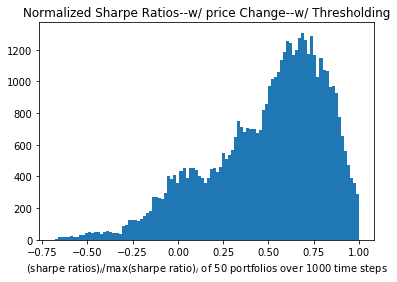

In [14]:
normSharpes=np.asarray([])
n = 0
for i, v in traderIDs.items():
    normSharpes = np.append(normSharpes,v.sharpeReal/max(v.sharpeReal))
    n += 1
plt.hist(normSharpes, bins =100)
plt.title("Normalized Sharpe Ratios--w/ price Change--w/ Thresholding")
plt.xlabel("(sharpe ratios)$_i$/max(sharpe ratio)$_i$ of 50 portfolios over 1000 time steps")
plt.savefig("./results/50_traders_change_price/priceChange_thresholding_50_normalized_sharperatios.png")

In [22]:
import pickle

with open('./results/50_traders_change_price/'+ 'traderIDs_50_pricechange_thresholded' + '.pkl', 'wb') as f:
    pickle.dump(traderIDs, f, pickle.HIGHEST_PROTOCOL)

In [23]:
TstockChars = utils.characterize(TstockPool,tmax=2000)

In [24]:
TstockChars.to_csv('./results/50_traders_change_price/TstockCharacteristics_pricechange_thresholded.csv')
TtotalOrders.to_csv('./results/50_traders_change_price/TtotalOrders_50p_100s_pricechange_thresholded.csv')
Ttransactions.to_csv('./results/50_traders_change_price/Ttransactions_50p_100s_pricechange_thresholded.csv')
np.savetxt('./results/50_traders_change_price/TstockPool_100s_pricechange_thresholded.txt', TstockPool)
np.savetxt('./results/50_traders_change_price/ThurstPool_100s_pricechange_thresholded.txt', ThurstPool)

In [27]:
# save totalORders totalTransaction stockPool hurstPool characterize
conf = open('./results/50_traders_change_price/'+ 'config_50_test_pricechange_thresholded' + '.txt',"w")
conf.write(str(config.config))
conf.close()

Text(0, 0.5, 'count')

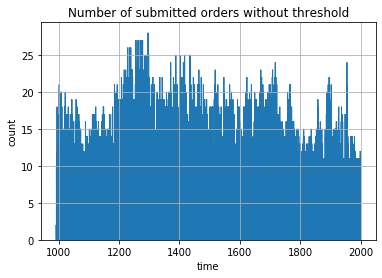

In [8]:
# totalOrders.sort_values(by=['time','portfolio'], inplace=True)
# totalOrders.reset_index(inplace=True,drop=True)
# totalOrders.hist(column='time',histtype='step',bins=7000)
# plt.title("Number of submitted orders without threshold")
# plt.xlabel("time")
# plt.ylabel("count")
# #plt.show()
# #plt.savefig("hurst001_unthresholded_totalorders")

Text(0, 0.5, 'count')

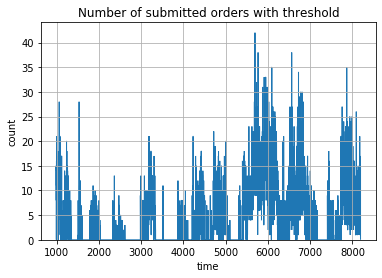

In [14]:
# TtotalOrders.sort_values(by=['time','portfolio'], inplace=True)
# TtotalOrders.reset_index(inplace=True,drop=True)
# TtotalOrders.hist(column='time',histtype='step',bins=7000)
# plt.title("Number of submitted orders with threshold")
# plt.xlabel("time")
# plt.ylabel("count")
# #plt.show()
# #plt.savefig("hurst001_thresholded_totalorders")

Text(0.5, 1.0, 'Hurst Index')

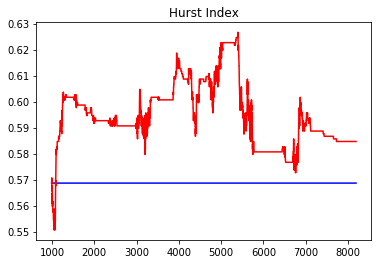

In [20]:
# a = 6 # random stock

# plt.plot(np.arange(992,8192), oghurstPool[a][992:8192], color = 'blue', label = "original H-index")
# plt.plot(np.arange(992,8192), ThurstPool[a][992:8192], color = 'red', label = "changing H-index")
# plt.title("Hurst Index")
# # plt.show()
# # plt.savefig('./hurst001_stock_'+str(a)+'_hurst.png')

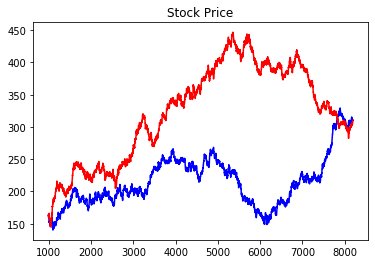

In [21]:
# plt.title("Stock Price")
# plt.plot(np.arange(992,8192), ogstockPool[a][992:8192], color = 'blue', label = "original H-index")
# plt.plot(np.arange(992,8192), TstockPool[a][992:8192], color = 'red', label = "changing H-index")
# #plt.show()
# # plt.savefig('./husrt001_stock_'+str(a)+'_stock.png')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


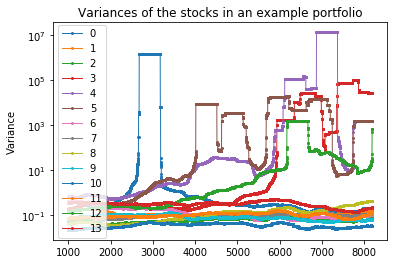

In [137]:
# qportOrders = TtotalOrders[(TtotalOrders['portfolio']=='bsfah')]
# qport = traderIDs['bsfah']
# print(qport.stocks)
# qportChars = TstockChars[TstockChars['stock'].isin(qport.stocks)]
# #qportChars[qportChars['time']==992]#['var'])

# # print(qportChars[qportChars['time']>7000])
# # plt.plot(np.arange(6000,8193),TstockPool[4][6000:])
# # plt.show()
# # print(qport.weightdata)
# for i in qport.stocks:
#     plt.plot(np.arange(992,8192),qportChars[qportChars['stock']==i]['var'], 'o-', label = str(i),markersize = 2, linewidth=1)
# plt.legend(loc='center left')
# plt.title("Variances of the stocks in an example portfolio")
# plt.ylabel("Variance")
# plt.yscale('log')
# plt.savefig("variances_of_an_exportf.png")
    

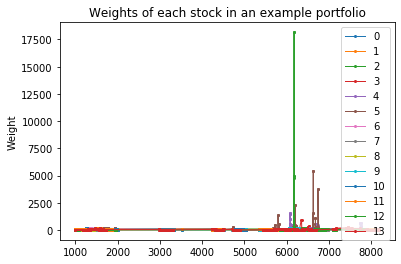

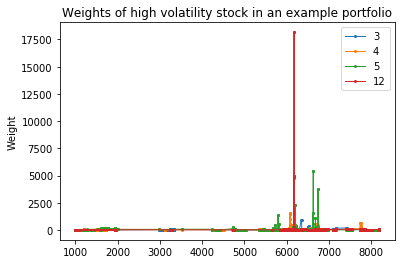

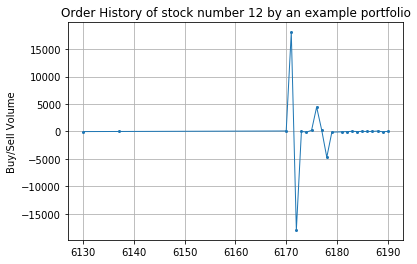

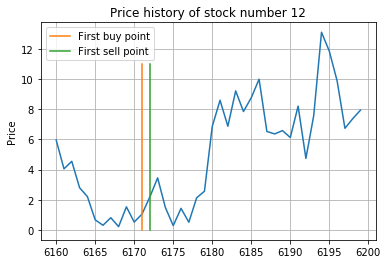

In [138]:
# # plot the weights of each stock
# #for stock in qport.stocks[:5]:
# for stock in qport.stocks:
#     plt.plot(qport.weightdata[qport.weightdata['stock']==stock]['time'],
#              qport.weightdata[qport.weightdata['stock']==stock]['weight'], 'o-',
#              label=str(stock), markersize = 2, linewidth=1)
# plt.title("Weights of each stock in an example portfolio")
# plt.legend()
# plt.ylabel("Weight")
# plt.savefig("Weights_of_ex_portf.png")
# plt.show()

# for stock in [3,4,5,12]:
#     plt.plot(qport.weightdata[qport.weightdata['stock']==stock]['time'],
#              qport.weightdata[qport.weightdata['stock']==stock]['weight'], 'o-',
#              label=str(stock), markersize = 2, linewidth=1)
# plt.title("Weights of high volatility stock in an example portfolio")
# plt.ylabel("Weight")
# plt.legend()
# plt.savefig("Weights_special_of_ex_portf.png")
# plt.show()

# plt.plot(np.asarray(qportOrders[qportOrders['stock']==12].time)[258:280],np.asarray(qportOrders[qportOrders['stock']==12].order)[258:280], 'o-', markersize=2, linewidth=1)
# plt.grid('on')
# plt.title("Order History of stock number 12 by an example portfolio")
# plt.ylabel("Buy/Sell Volume")
# plt.savefig("Orders_of_volatilestock_of_ex_portf.png")
# plt.show()

# plt.plot(np.arange(6160,6200),TstockPool[12][6160:6200])
# plt.plot(np.repeat([6171],12),np.arange(0,12), label = "First buy point")
# plt.plot(np.repeat([6172],12),np.arange(0,12), label = "First sell point")
# plt.legend()
# plt.title("Price history of stock number 12")
# plt.ylabel("Price")
# plt.grid('on')
# plt.savefig("Price_of_volatilestock_of_ex_portf.png")
# plt.show()

In [127]:
# qportOrders[qportOrders['stock']==12].order.idxmin()
# qportOrders[qportOrders['stock']==12].loc[17894]

time          6172
portfolio    bsfah
stock           12
order       -17954
Name: 17894, dtype: object

# Vargaps function on qportChars
### Integrate with weight data

In [60]:
vargaps = np.asarray([])
avgreturn = np.asarray([])
avgvar = np.asarray([])
stdgaps = np.asarray([])
avgstd = np.asarray([])
for t in range(992,8192):
    vargaps = np.append(vargaps,max(qportChars[qportChars['time']==t]['var'])-min(qportChars[qportChars['time']==t]['var']))
    avgreturn = np.append(avgreturn, np.mean((qportChars[qportChars['time']==t]['mean'])))
    avgvar = np.append(avgvar, np.mean((qportChars[qportChars['time']==t]['var'])))
    stdgaps = np.append(stdgaps,max(qportChars[qportChars['time']==t]['std'])-min(qportChars[qportChars['time']==t]['std']))
    avgstd = np.append(avgstd, np.mean((qportChars[qportChars['time']==t]['std'])))
                        

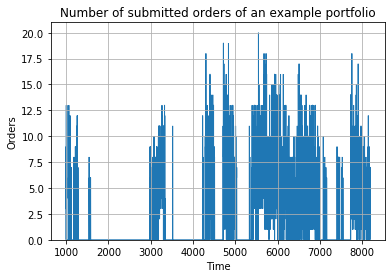

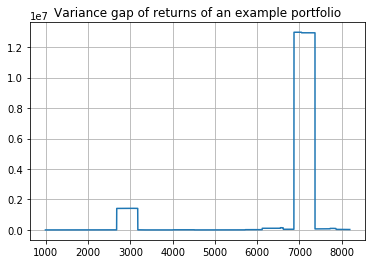

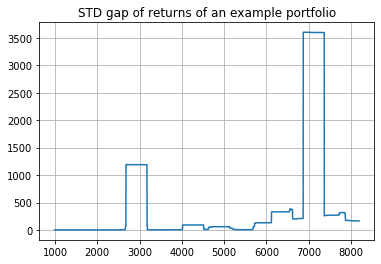

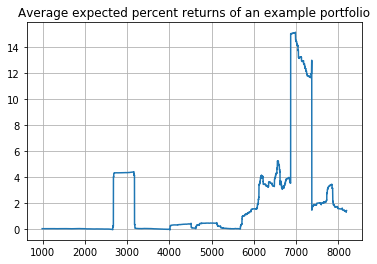

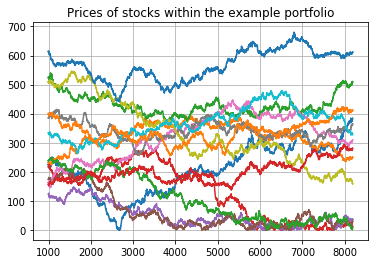

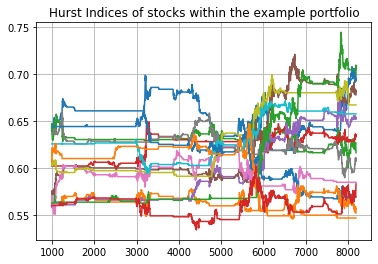

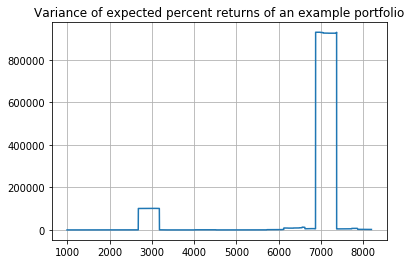

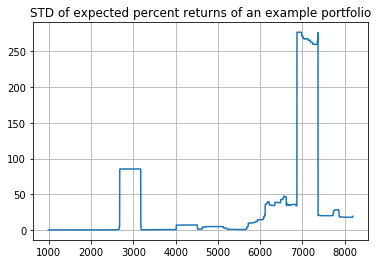

In [84]:
# qportOrders.hist(column='time',histtype='step',bins=6000)
# plt.title("Number of submitted orders of an example portfolio")
# plt.xlabel("Time")
# plt.ylabel("Orders")
# plt.savefig("hstep_001_7200_thresholded_submittedOrders.png")
# plt.show()


# plt.plot(np.arange(992,8192),vargaps)
# plt.grid(True)
# plt.title("Variance gap of returns of an example portfolio")
# plt.savefig("hstep_001_7200_thresholded_variancegap.png")
# plt.show()

# plt.plot(np.arange(992,8192),stdgaps)
# plt.grid(True)
# plt.title("STD gap of returns of an example portfolio")
# plt.savefig("hstep_001_7200_thresholded_stdgap.png")
# plt.show()

# plt.title("Average expected percent returns of an example portfolio")
# plt.grid(True)
# plt.plot(np.arange(992,8192),avgreturn)
# plt.savefig("hstep_001_7200_thresholded_averagereturns.png")
# plt.show()


# for i in qport.stocks:
#     plt.plot(np.arange(992,8192),TstockPool[i][992:8192])
# plt.grid(True)
# plt.title("Prices of stocks within the example portfolio")
# plt.savefig("hstep_001_7200_thresholded_pricesexportf.png")
# plt.show()


# for i in qport.stocks:
#     plt.plot(np.arange(992,8192),ThurstPool[i][992:8192])
# plt.grid(True)
# plt.title("Hurst Indices of stocks within the example portfolio")
# plt.savefig("hstep_001_7200_thresholded_hurstexportf.png")
# plt.show()


# plt.title("Variance of expected percent returns of an example portfolio")
# plt.grid(True)
# plt.plot(np.arange(992,8192),avgvar)
# plt.savefig("hstep_001_7200_thresholded_variancereturns.png")
# plt.show()

# plt.title("STD of expected percent returns of an example portfolio")
# plt.grid(True)
# plt.plot(np.arange(992,8192),avgstd)
# plt.savefig("hstep_001_7200_thresholded_stdreturns.png")

In [ ]:
# # for key,portf in traderIDs.items():
# #     print(portf.stocks)
# from library.utils import sigmoid
# k = 100
# plt.title("85th Ptile ("+str(qport.threshold)+") with k slope: "+ str(k))
# pts = np.linspace(0.1,0.17,2000)
# plt.grid(True)
# plt.plot(pts,sigmoid(pts,qport.threshold, k = k))
# # plt.savefig("85th percentile sigmoid function with slope "+str(k))

In [ ]:
# plt.hist(qport.sharpe, bins=30)
# plt.grid(True)
# plt.title("Distribution of all sharpe ratios in example portfolio before thresholding")
# # plt.savefig("h001_sharpedistthresholded")

In [ ]:
# for name,portf in traderIDs.items():
#     p90 = (np.percentile(portf.sharpe,50))
#     p100 = (max(portf.sharpe))
#     x0 = (p100+p90)/2
#     probs = []
#     print(x0)
#     for i in portf.sharpe:
#         p = (sigmoid(i,x0, k =1))
#         probs.append(p)
#     #print(probs)
#     plt.plot(portf.sharpe,probs, 'o')
#     plt.grid('on')
#     plt.show()
# # june 18, create a reset function in the portfolios to incorporate sharpe ratio threshold
# # reset the sharpe ratio counter for the portfolios and update the order function

# Overlap portfolio
might be better to just choose randomly so theres no disconnect in the selection..

In [ ]:
# import string 
# import random 
# def randString(length = 5):
#     letters = string.ascii_lowercase
#     return ''.join(random.sample(letters,length))

# tstocks = {}
# stocks = np.arange(50)
# window = 5
# indx = 0
# portfs=0
# print(stocks)
# while portfs <= 100:
#     startpos = indx % len(stocks)
#     window = np.random.randint(12,18)
#     name = randString()
#     print(name)
#     while name in traderIDs:
#         name = randString()
# #     print(startpos)
# #     print(stocks)
# #     print(startpos, ":", startpos+window)
#     if startpos+window >= len(stocks):
#         print('overflow ', startpos+window)
#         stocks2 = np.concatenate([stocks,stocks])
#         tstocks[name] = np.copy(stocks2[startpos:startpos+window])
#         np.random.shuffle(stocks)
#         print("shuffled")
#     else:
#         tstocks[name] = np.copy(stocks[startpos:startpos+window])
#     indx += window - np.random.randint(10,15)
#     portfs += 1
    
# #     if indx >= len(stocks):
# #         print(portfs)


In [ ]:
#tstocks

In [ ]:
#(cosineSim(tstocks['iugey'],tstocks['fweup']))

In [ ]:
# pesbocosines = np.asarray([])
# #pesbo = tstocks['iugey']
# #portf2s = np.asarray([])
# for j, pesbo in tstocks.items():
#     for i, portf in tstocks.items():
#         if i!=j:
#             cc = cosineSim(pesbo,portf)
#             portf2s = np.append(portf2s,i)
#             pesbocosines = np.append(pesbocosines,cc)

In [ ]:
# (pesbocosines)

In [ ]:
# win10_15 = np.mean(pesbocosines)

In [ ]:
# portf2s[44]

In [ ]:
# def cosineSim(portf1, portf2): #change from .stocks array to actual object for both stocks and weights
#     overlapWeights = 0
#     for i in portf1:
#         if i in portf2: # find the weights in portf1 and portf2
#             overlapWeights += 1 # actual weight calculation
    
#     portf1weights = np.ones(len(portf1))
#     portf2weights = np.ones(len(portf2))
#     portf1Norm = np.linalg.norm(portf1weights)
#     portf2Norm = np.linalg.norm(portf2weights)
    
#     return overlapWeights/(portf1Norm*portf2Norm)
    
    